## Chicago Crime Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Describe the dataset  
The Dataset  we are working on ***Crimes-2001-to-present***  which analyzes the crime trend in city of Chicago from 2001 to till date.
The dataset has been downloaded from the state government website (https://catalog.data.gov/dataset/crimes-2001-to-present)

The following are the attributes and it's description 

- ***ID:***  Unique identifier for a record.
- ***Case Number:*** Chicago Police Division Record Number.
- ***Date:*** Date of the incident with time
- ***Block:*** The abbreviated address for the criminal activity.
- ***IUCR:*** Internal Uniform Chicago Crime Reporting Code.
- ***Primary Type:*** Type of crime
- ***Description:*** Details about the criminal activity
- ***Location Description:*** Location where the crime occurred.
- ***Arrest:*** Boolean indicating whether arrest was made.
- ***Domestic:*** Indicates whether incident was domestic related.
- ***Beat:*** Indicates the Beat where incident occurred.
- ***District:*** Indicates Police District where incident occurred.
- ***Ward:*** The City Council District where the incident occurred.
- ***Community Area:*** The Community where incident occurred.
- ***FBI Code:*** Indicates the crime classification code.
- ***X Coordinate:*** The X coordinate of the location of the incident.
- ***Y Coordinate:*** The Y coordinate of the location of the incident
- ***Year:*** Year in which crime occurred.
- ***Updated On:*** The date of last update of the record.
- ***Latitude:*** Latitude of the location of the incident
- ***Longitude:*** Longitude of the location of the incident.
- ***Location:*** Latitude and longitude.


In [5]:
chicago_crime = pd.read_csv(r"C:\Users\ganta\Downloads\Crimes_-_2001_to_Present.csv")

## Data Wrangling

In [11]:
#checking data size 
print(chicago_crime.shape)

(1048575, 22)


In [12]:
chicago_crime.head(3)

ID Case Number              Date                 Block  IUCR  \
0  11037294    JA371270   3/18/2015 12:00     0000X W WACKER DR  1153   
1  11646293    JC213749  12/20/2018 15:00  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333     5/1/2016 0:25   055XX S ROCKWELL ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  42.0            32.0        11   
1            APARTMENT   False     False  ...  36.0            19.0        11   
2                  NaN   False     False  ...  15.0            63.0        11   

   X Coordinate Y Coordinate  Year      Updated On  Latitude Longitude  \
0           NaN          NaN  2015  8/1/2017 15:52       NaN       NaN   
1           NaN          NaN  2018  4/6/2019 16:04       NaN       NaN   
2           NaN          NaN  2016  4/6/2019 16:04       NaN       NaN   

   Location  
0       NaN  
1       NaN  
2       NaN  

[3 rows x 22 columns]

## Handling missing values

In [13]:
chicago_crime.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     4085
Arrest                      0
Domestic                    0
Beat                        0
District                    2
Ward                      280
Community Area            301
FBI Code                    0
X Coordinate            23131
Y Coordinate            23131
Year                        0
Updated On                  0
Latitude                23131
Longitude               23131
Location                23131
dtype: int64

In [14]:
chicago_crime=chicago_crime.dropna() #droping null values 
print(chicago_crime.shape) #checking the size after drop

(1023144, 22)


In [15]:
chicago_crime.duplicated().sum() #checking for duplicate values 

0

## Handling Data

Converted the inappropriate data types for certain attributes like Date, District, Ward and Community Area (from float to int).

In [16]:
chicago_crime.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [17]:
chicago_crime["Date"] = pd.to_datetime(chicago_crime["Date"])
chicago_crime["District"] = chicago_crime["District"].astype(np.int64)
chicago_crime["Ward"] = chicago_crime["Ward"].astype(np.int64)
chicago_crime["Community Area"] = chicago_crime["Community Area"].astype(np.int64)

In [18]:
chicago_crime.sort_values(by='Date',inplace=True) 
chicago_crime.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis

Text(0, 0.5, 'Number of Incidents')

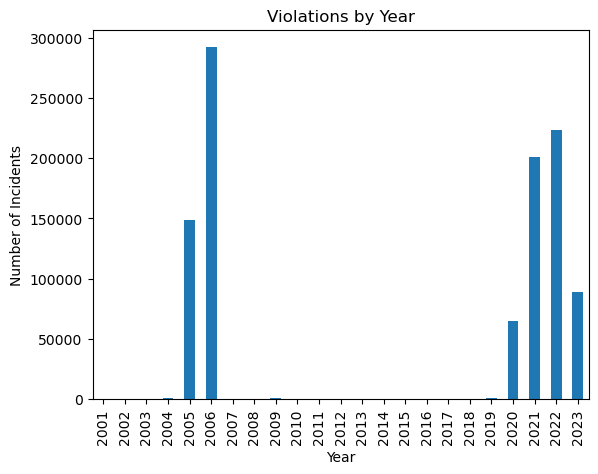

In [59]:
chicago_crime['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Crime by Year")
plt.xlabel("Year") 
plt.ylabel("Number of Incidents")

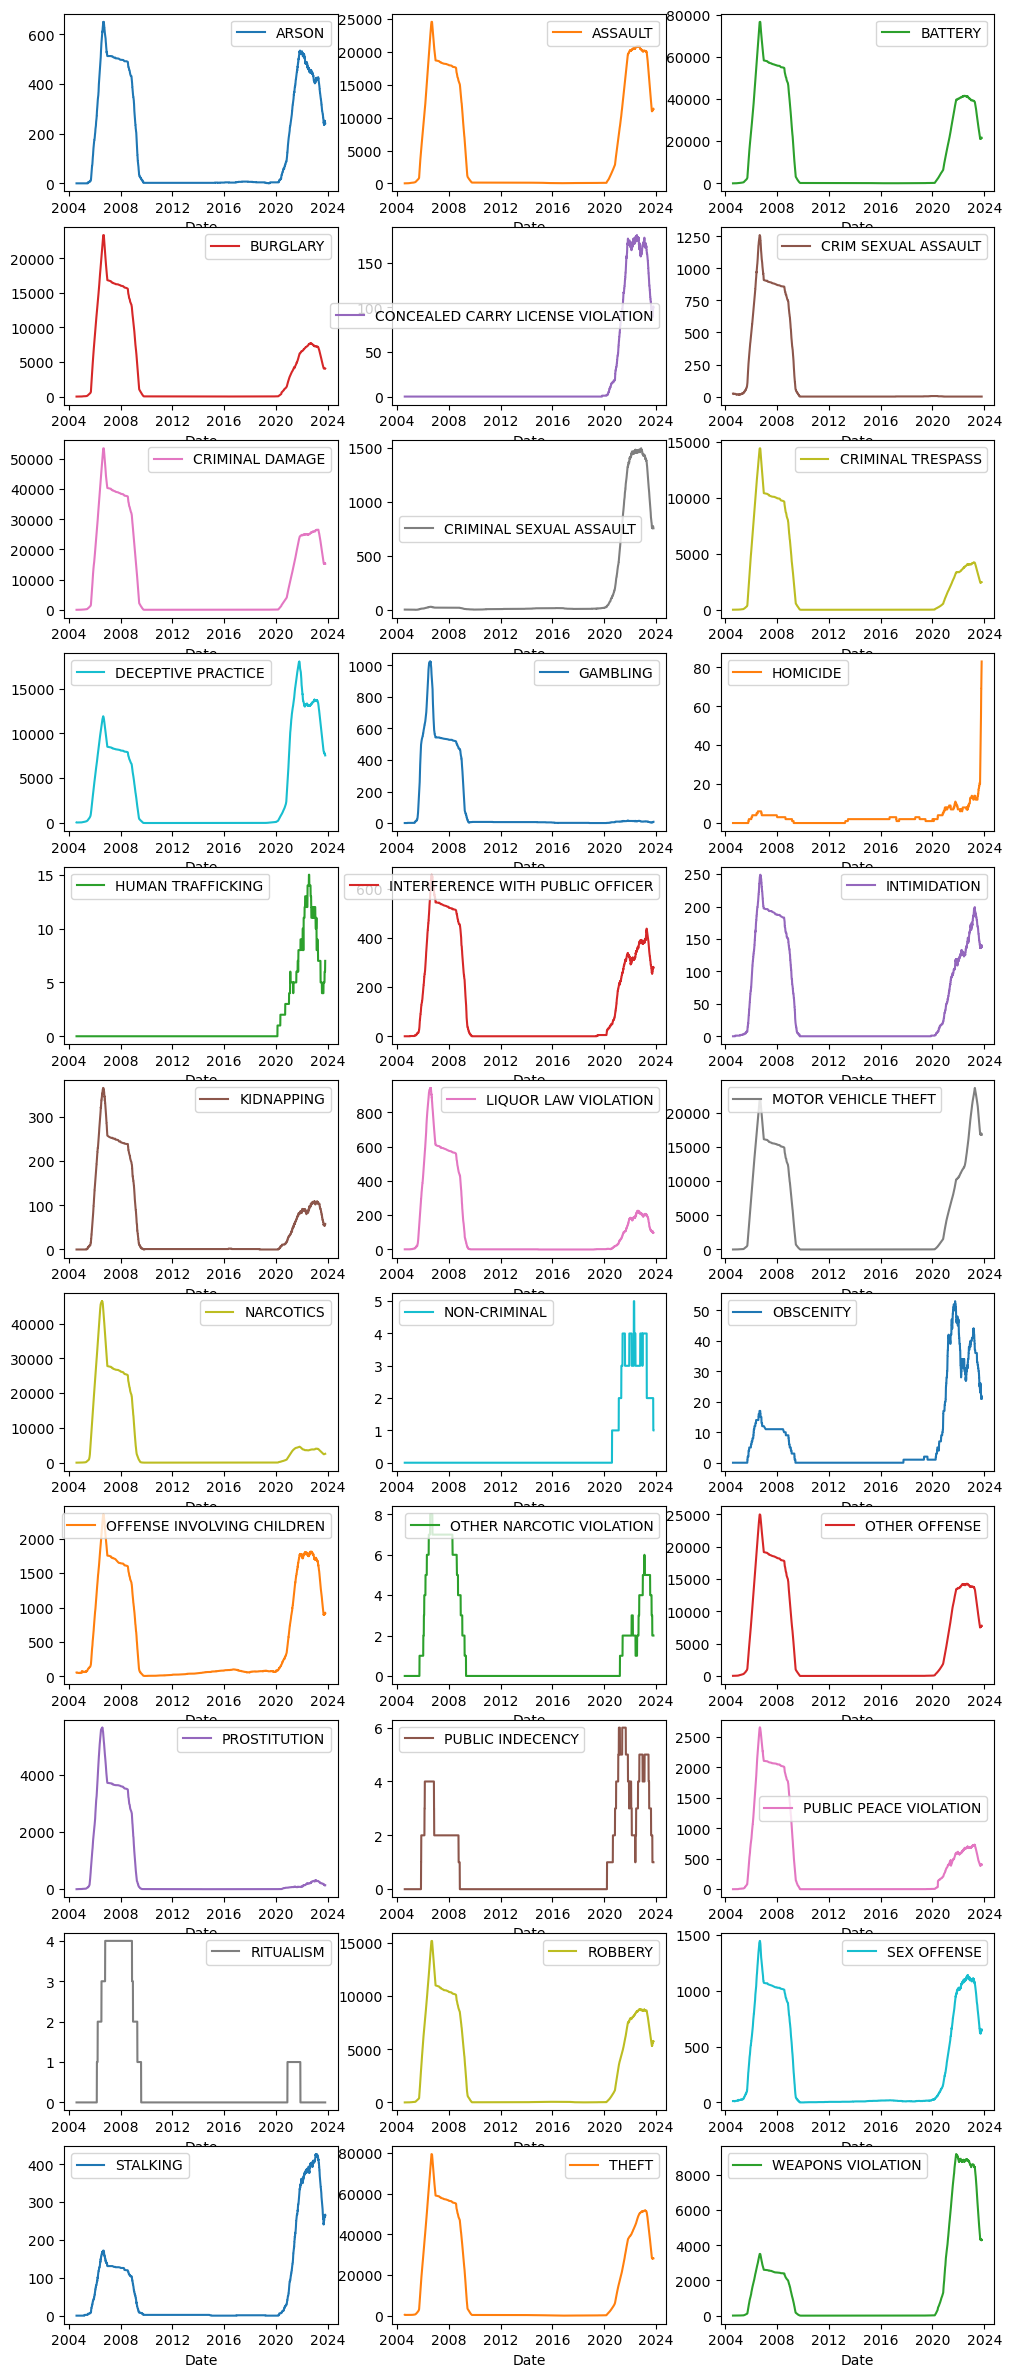

In [13]:
crimes_count_date = chicago_crime.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=pd.to_datetime(df['Date']).dt.date , fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

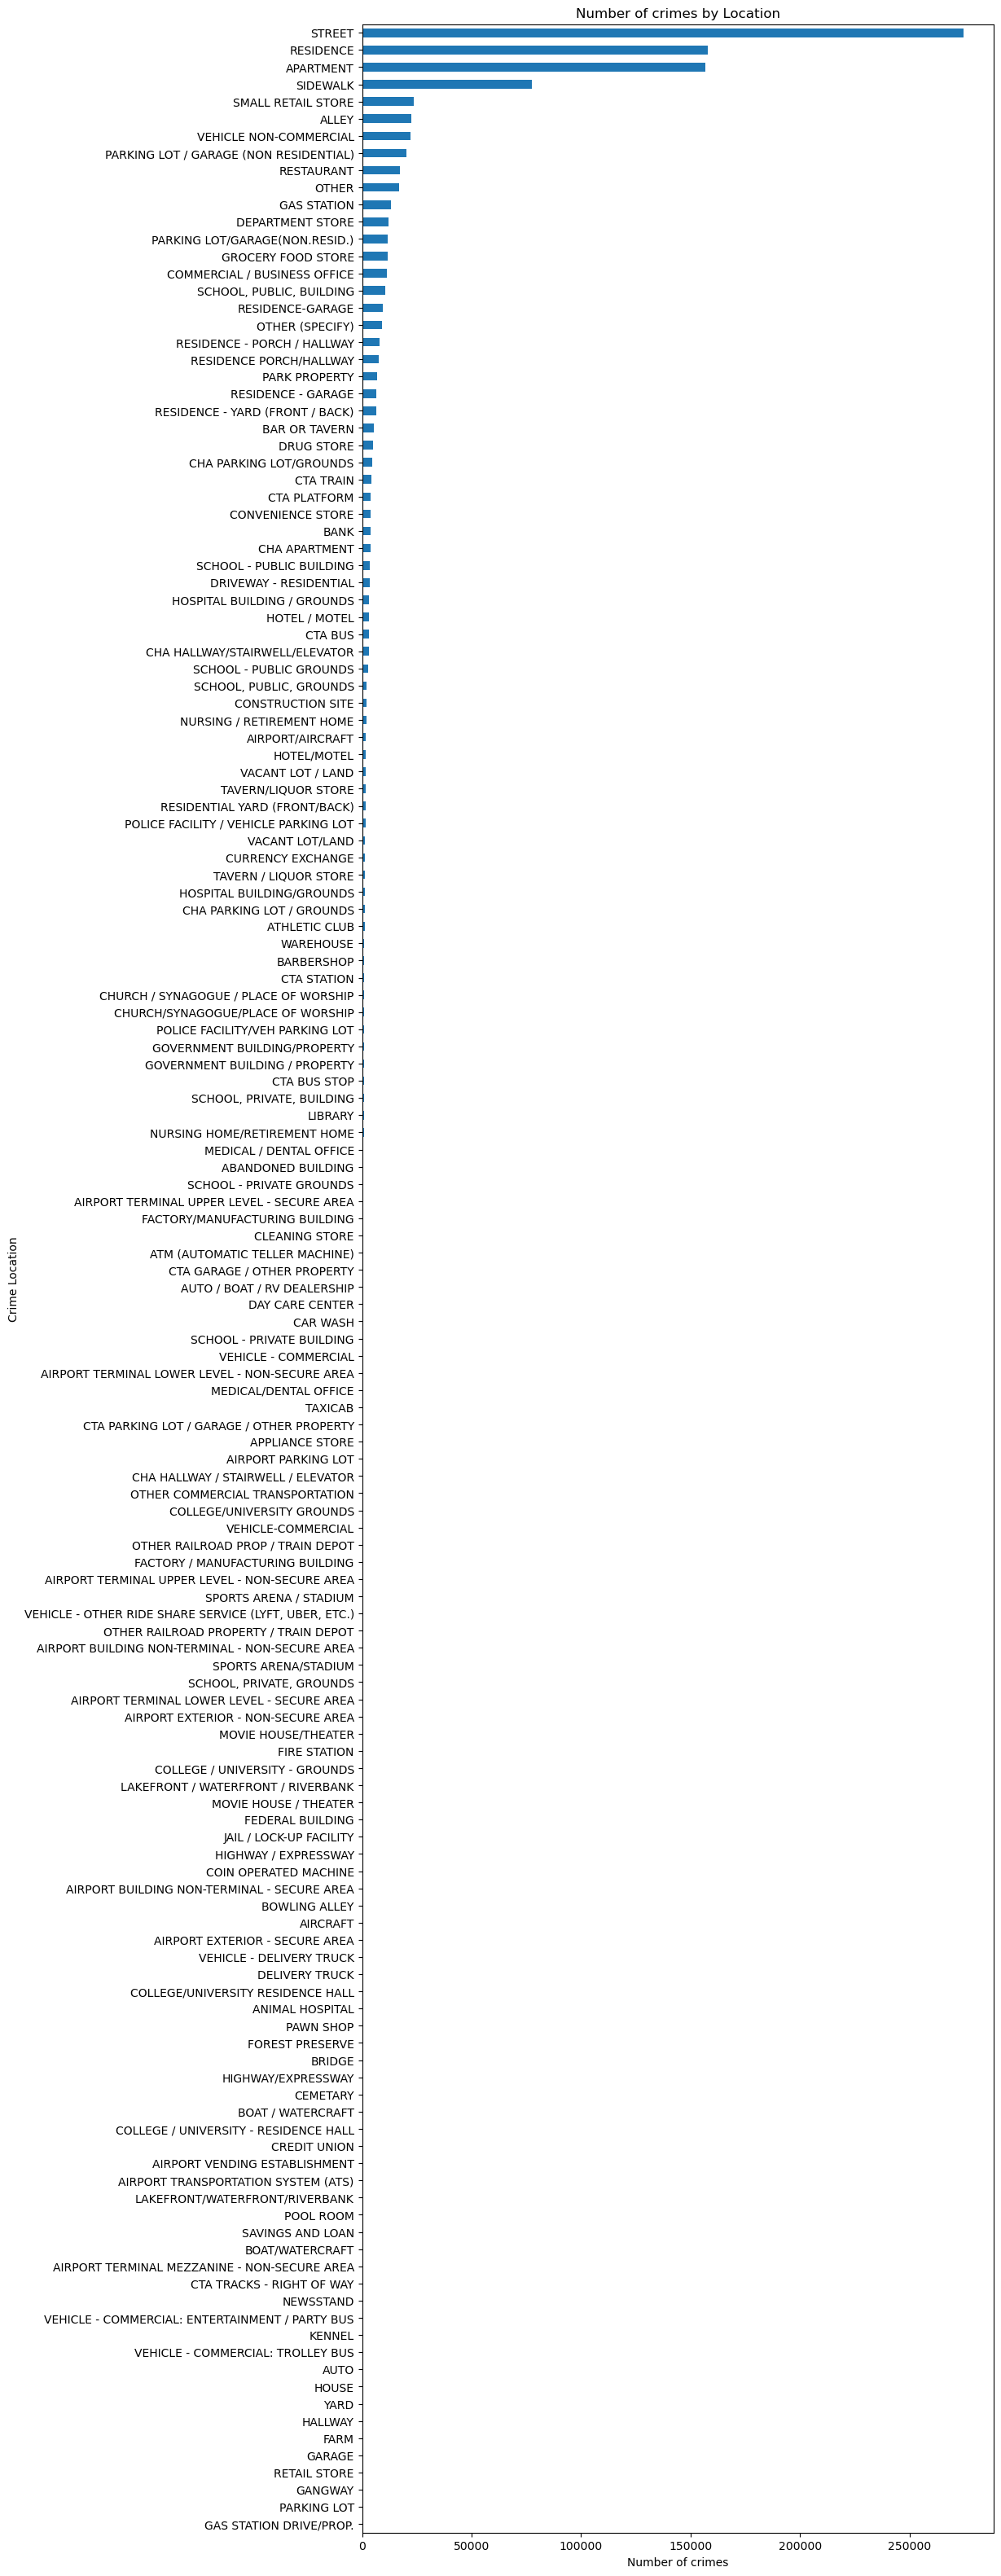

In [63]:
plt.figure(figsize=(10,40))
chicago_crime.groupby([chicago_crime['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

## Plot Analysis
Street and Residence are the most unsafe places while compared to other places.

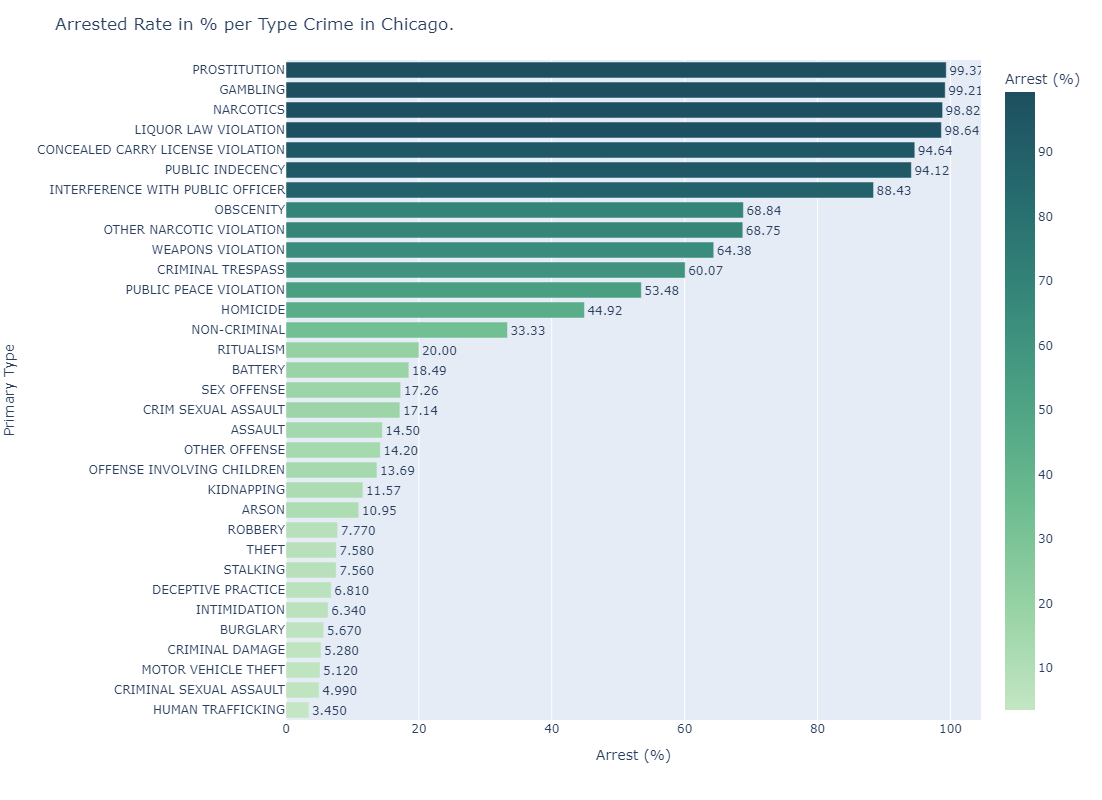

In [14]:
import plotly.express as px
aux = chicago_crime.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)
fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

## Plot Analysis
Narcotics and Prostitution crimes consistently result in around 100% arrest rate.
Arrest in other crimes depends on the extent of the crime. 

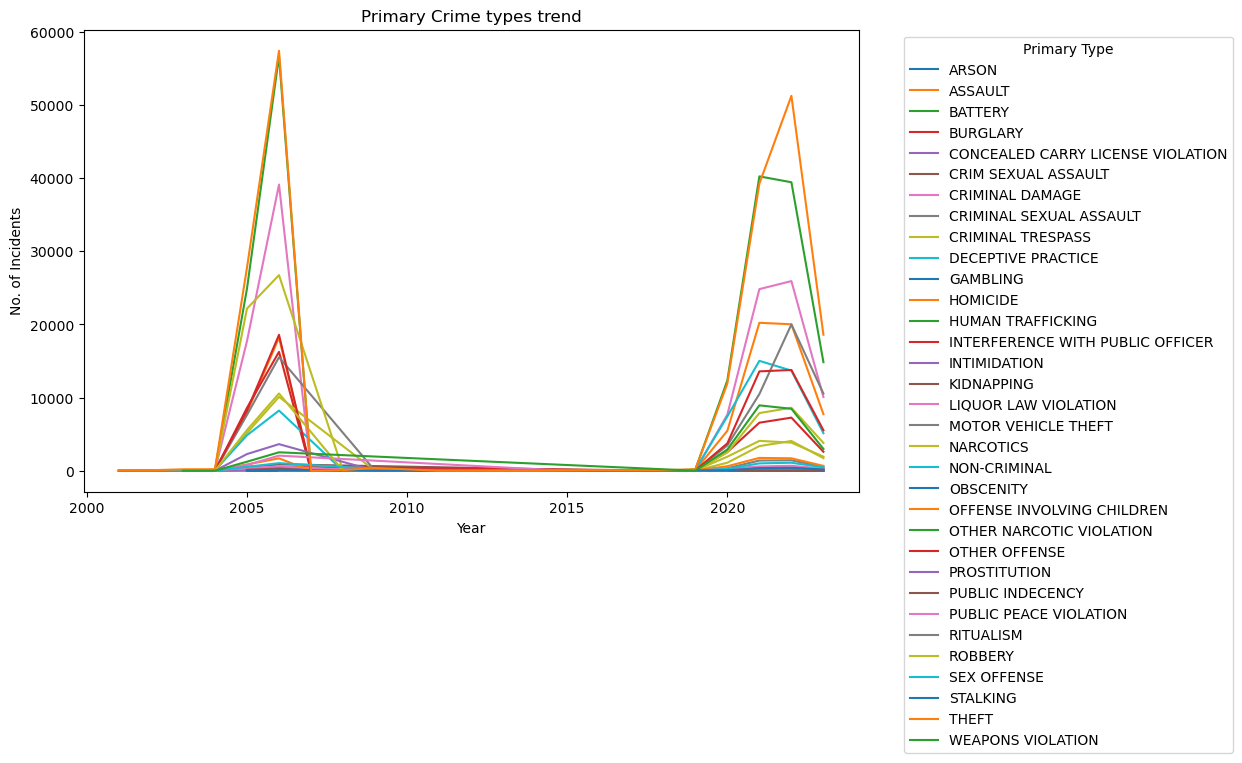

In [26]:
grouped_data = chicago_crime.groupby(['Primary Type', 'Year']).size().reset_index(name='num_incidents')

plt.figure(figsize=(10, 6))

for primary_type in grouped_data['Primary Type'].unique():
    subset = grouped_data[grouped_data['Primary Type'] == primary_type]
    plt.plot(subset['Year'], subset['num_incidents'], label=primary_type)

plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Primary Crime types trend')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')


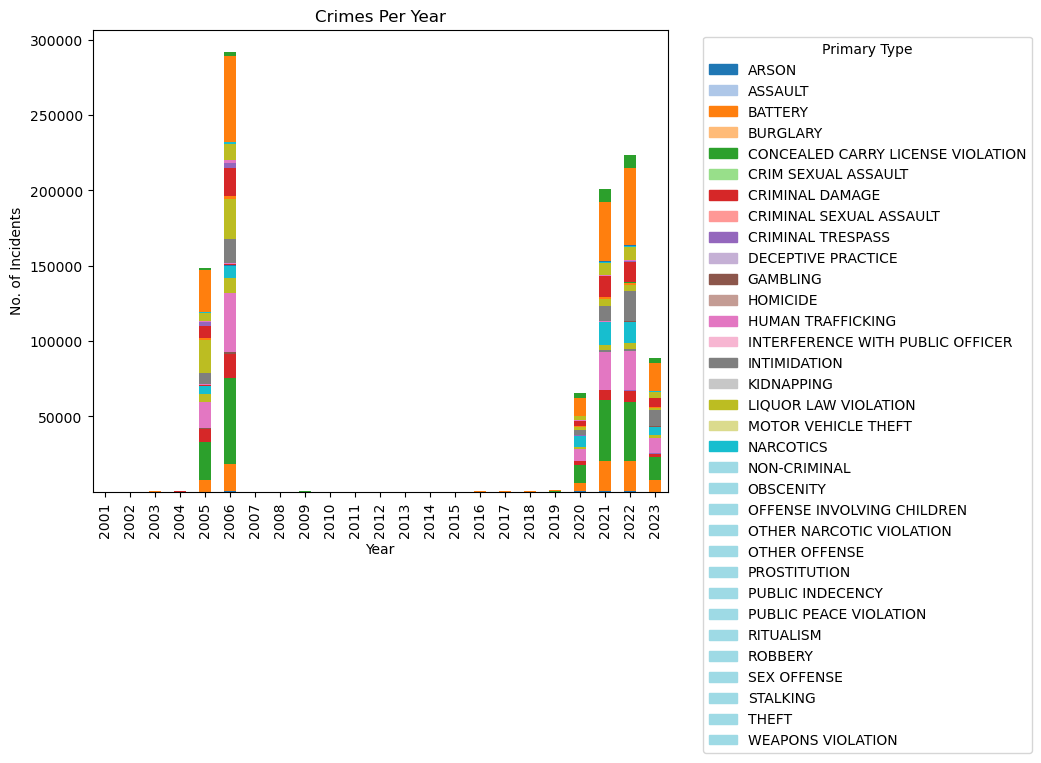

In [49]:
reshaped_data = grouped_data.pivot(index='Year', columns='Primary Type', values='num_incidents').fillna(0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
reshaped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('No. of Incidents')
ax.set_title('Crimes Per Year')

# Create a legend
labels = reshaped_data.columns
colors = [plt.cm.tab20(i) for i in range(len(labels))]
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(handles, labels, title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust spacing
plt.subplots_adjust(right=0.7)

## Plot Analysis
Public Peace violation and Prostitution are among the least serious offenses.
Theft, Battery and Criminal Damage crimes are those that have surpassed the 100,000 mark.

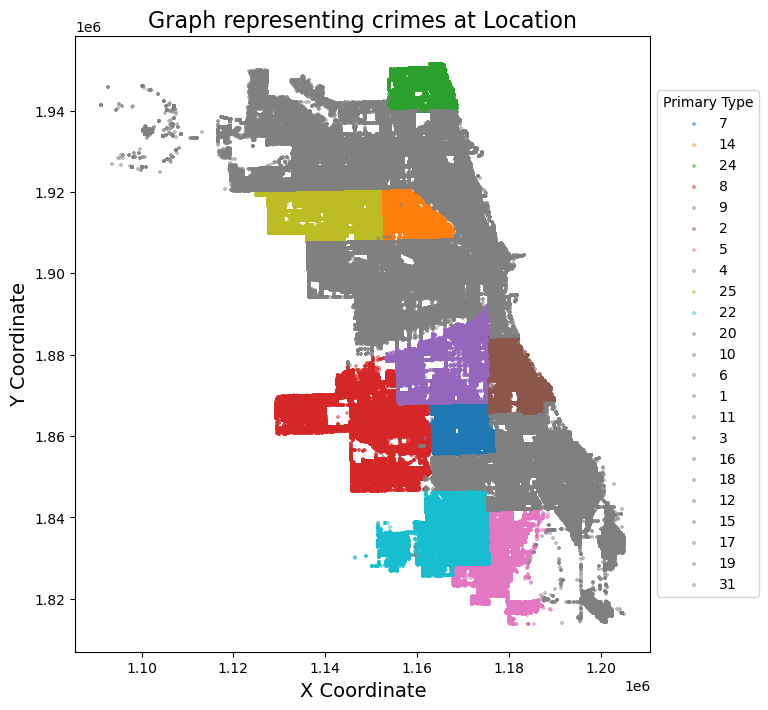

In [54]:
import matplotlib.colors as mcolors

crime_data = chicago_crime[chicago_crime['X Coordinate'] != 0]
districts = crime_data['District'].unique()
colors = dict(zip(districts, mcolors.TABLEAU_COLORS))
default_color = 'gray'

fig, ax = plt.subplots(figsize=(10, 8))

for district in crime_data['District'].unique():
    idx = crime_data['District'] == district
    color = colors.get(district, default_color)  # Use the default color if the district is not in the color map
    ax.scatter(crime_data.loc[idx, 'X Coordinate'], crime_data.loc[idx, 'Y Coordinate'],
               color=color, marker='+', s=10, label=district, alpha=0.5)

ax.set_title("Graph representing crimes at Location", fontsize=16)
ax.set_xlabel("X Coordinate", fontsize=14)
ax.set_ylabel("Y Coordinate", fontsize=14)


legend = ax.legend(title='Primary Type', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.subplots_adjust(right=0.7)

In [60]:
# Plot locations on map
import folium
from folium import plugins

incidents_map = folium.Map(location=[41.768110241, -87.640678266], zoom_start=11)
for idx, row in chicago_crime.iloc[1:200].iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Primary Type']).add_to(incidents_map)

incidents_map

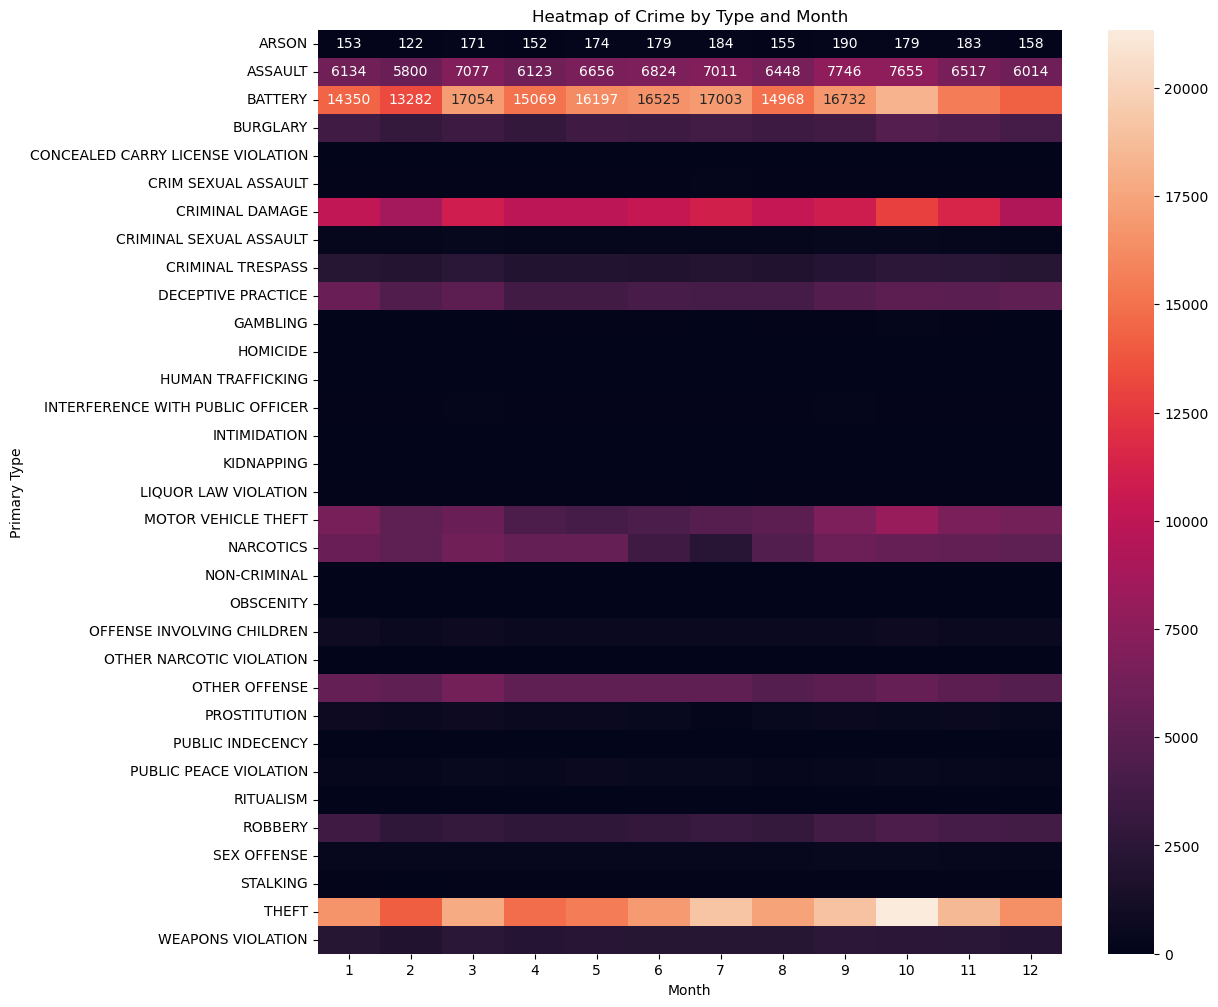

In [12]:
df =chicago_crime.copy()

# Create month column
df['Month'] = pd.to_datetime(df['Date']).dt.month 

# Pivot data 
monthly_count = df.pivot_table(index='Primary Type', columns='Month', values='Case Number', aggfunc='count', fill_value=0)
# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(monthly_count, annot=True, fmt="d") 
plt.ylabel('Primary Type')
plt.xlabel('Month')
plt.title('Heatmap of Crime by Type and Month')
plt.show()


## Prophet Algorithm 
We've employed the Prophet Algorithm to effectively manage Time Series data.
Our primary goal with this prediction algorithm is to forecast the occurrence of different types of crimes in particular areas. 
Due to the substantial volume of data, we've asked users to specify the Community Area they're concerned about. 
We've focused solely on the data from 2023, predicting occurrences for each crime type up to 15 days into the future from their last recorded instance.

In [21]:
from prophet import Prophet

In [22]:
df = chicago_crime.copy()
df['date'] = df['Date']
df = df.iloc[:len(df)-15]
test = df.iloc[len(df)-15:]

In [23]:
forecasts=[]

for area in df['Community Area'].unique():
    area_df = df[df['Community Area'] == area]
    
    for crime in area_df['Primary Type'].unique():
    
        crime_df = area_df[area_df['Primary Type'] == crime]
        
        # Aggregate counts over time 
        crime_df = crime_df.assign(count=1).pivot_table(
            values='count', index='date', aggfunc='sum').reset_index()

        # Format columns 
        crime_df = crime_df.rename(columns={'date': 'ds', 'count': 'y'}) 
        
        if crime_df.shape < (2, 2):
            break

        model = Prophet()  
        model.fit(crime_df)  

        future = model.make_future_dataframe(periods=15)
        forecast = model.predict(future)
        print(f'{area} - {crime}') 
        print(forecast[['ds', 'yhat','yhat_lower','yhat_upper']].head(5))
        forecast['Community Area'] = area
        forecast['Primary Type'] = crime
        forecasts.append(forecast)

forecast_df = pd.concat(forecasts)

21:08:58 - cmdstanpy - INFO - Chain [1] start processing
21:08:58 - cmdstanpy - INFO - Chain [1] done processing


68 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.044923    0.859293    1.224318
1 2001-06-23 20:00:00  1.003423    0.825062    1.175177
2 2001-10-01 00:01:00  1.027239    0.845783    1.201741
3 2002-04-12 12:00:00  1.032134    0.855104    1.212155
4 2002-11-16 09:00:00  1.028273    0.843740    1.205110


21:09:00 - cmdstanpy - INFO - Chain [1] start processing
21:09:00 - cmdstanpy - INFO - Chain [1] done processing


68 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-03-01 00:01:00  1.011571    0.868763    1.161250
1 2004-09-26 05:26:00  1.011153    0.871737    1.164511
2 2005-01-29 09:15:00  1.007525    0.861453    1.166552
3 2005-04-25 07:30:00  0.997571    0.844229    1.141310
4 2005-05-28 15:30:00  1.007459    0.872071    1.162490


21:09:01 - cmdstanpy - INFO - Chain [1] start processing
21:09:01 - cmdstanpy - INFO - Chain [1] done processing


68 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-04-09 00:01:00  0.975236    0.857030    1.094012
1 2003-06-01 00:01:00  0.993141    0.873358    1.105846
2 2003-10-01 00:00:00  1.055050    0.935719    1.176415
3 2005-01-01 00:01:00  1.003649    0.879830    1.117710
4 2005-01-20 00:00:00  0.996833    0.892806    1.118459
68 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-09-19 15:00:00   1.0         1.0         1.0
1 2005-08-01 00:00:00   1.0         1.0         1.0
2 2005-09-09 17:00:00   1.0         1.0         1.0
3 2005-09-12 00:15:00   1.0         1.0         1.0
4 2005-09-19 09:00:00   1.0         1.0         1.0


21:09:02 - cmdstanpy - INFO - Chain [1] start processing
21:09:03 - cmdstanpy - INFO - Chain [1] done processing


68 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-09 22:00:00  1.017307    0.876300    1.158287
1 2004-05-10 00:01:00  1.019437    0.875389    1.156584
2 2004-09-13 15:10:00  1.002499    0.859683    1.138308
3 2004-09-30 02:30:00  1.028305    0.899866    1.174084
4 2004-10-04 08:30:00  1.013305    0.871251    1.149421


21:09:05 - cmdstanpy - INFO - Chain [1] start processing
21:09:05 - cmdstanpy - INFO - Chain [1] done processing


68 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-16 11:29:00  1.013776    0.912446    1.119833
1 2005-01-18 07:50:00  0.996511    0.890363    1.102086
2 2005-06-03 21:40:00  1.009517    0.907582    1.117808
3 2005-06-07 20:15:00  1.005497    0.896419    1.113255
4 2005-06-09 17:00:00  1.003472    0.892615    1.107620
68 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2004-06-14 14:04:00   1.0         1.0         1.0
1 2005-01-06 16:28:00   1.0         1.0         1.0
2 2005-06-11 00:45:00   1.0         1.0         1.0
3 2005-06-22 18:15:00   1.0         1.0         1.0
4 2005-08-15 22:03:00   1.0         1.0         1.0


21:09:07 - cmdstanpy - INFO - Chain [1] start processing
21:09:07 - cmdstanpy - INFO - Chain [1] done processing


68 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-15 00:53:00  0.996203    0.958462    1.034015
1 2005-04-24 20:12:00  1.000622    0.961755    1.037907
2 2005-06-12 03:30:00  0.994962    0.958935    1.033524
3 2005-06-23 02:24:00  0.996194    0.960055    1.033488
4 2005-06-26 18:30:00  0.998630    0.958061    1.036180


21:09:08 - cmdstanpy - INFO - Chain [1] start processing
21:09:08 - cmdstanpy - INFO - Chain [1] done processing


68 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-22 19:42:00  1.004235    0.910327    1.096070
1 2005-02-01 00:47:00  1.004106    0.908699    1.093205
2 2005-04-10 19:30:00  1.011364    0.915039    1.104018
3 2005-05-31 16:30:00  1.004565    0.910873    1.096022
4 2005-06-07 22:42:00  1.020175    0.928321    1.113579


21:09:09 - cmdstanpy - INFO - Chain [1] start processing
21:09:09 - cmdstanpy - INFO - Chain [1] done processing


68 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 13:36:00  1.008066    0.938015    1.079143
1 2005-06-03 15:00:00  1.024744    0.952393    1.096002
2 2005-06-12 13:30:00  1.031466    0.960081    1.105493
3 2005-06-12 13:40:00  1.031598    0.960309    1.110242
4 2005-06-16 12:20:00  1.013293    0.939793    1.084217


21:09:10 - cmdstanpy - INFO - Chain [1] start processing
21:09:10 - cmdstanpy - INFO - Chain [1] done processing


68 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-11 15:23:00  1.002329    0.841643    1.176164
1 2005-02-15 12:00:00  1.074569    0.910493    1.249995
2 2005-04-01 12:45:00  0.978660    0.808920    1.144613
3 2005-06-02 09:00:00  1.056439    0.889093    1.217445
4 2005-06-15 12:00:00  0.995063    0.816127    1.158189


21:09:10 - cmdstanpy - INFO - Chain [1] start processing
21:09:10 - cmdstanpy - INFO - Chain [1] done processing


68 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-21 21:00:00  0.999864    0.862073    1.140219
1 2005-01-26 08:15:00  0.985063    0.833244    1.132139
2 2005-06-21 20:00:00  0.985854    0.846214    1.123755
3 2005-06-27 21:22:00  0.990611    0.854489    1.125353
4 2005-06-27 21:30:00  0.990263    0.843275    1.130543
68 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-12 00:01:00   1.0         1.0         1.0
1 2005-07-06 21:52:00   1.0         1.0         1.0
2 2005-08-12 22:00:00   1.0         1.0         1.0
3 2005-09-18 02:54:00   1.0         1.0         1.0
4 2005-09-19 17:19:00   1.0         1.0         1.0


21:09:11 - cmdstanpy - INFO - Chain [1] start processing
21:09:12 - cmdstanpy - INFO - Chain [1] done processing
21:09:12 - cmdstanpy - INFO - Chain [1] start processing


68 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-31 13:30:00  1.087542    0.634096    1.535090
1 2005-05-05 13:13:00  1.091026    0.672659    1.536008
2 2005-05-07 19:50:00  1.034661    0.581267    1.488794
3 2005-05-07 23:03:00  1.014947    0.578910    1.492649
4 2005-05-08 18:26:00  1.029912    0.621268    1.506996


21:09:12 - cmdstanpy - INFO - Chain [1] done processing


68 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-12 00:59:00  0.988248    0.690414    1.287671
1 2005-06-22 22:05:00  1.060288    0.754804    1.359953
2 2005-08-01 02:04:00  0.975470    0.672611    1.282327
3 2005-08-08 00:53:00  1.106388    0.801292    1.391323
4 2005-08-09 07:47:00  1.014080    0.736399    1.316237


21:09:13 - cmdstanpy - INFO - Chain [1] start processing
21:09:13 - cmdstanpy - INFO - Chain [1] done processing


68 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-16 12:00:00  0.990476    0.857749    1.124662
1 2005-06-04 07:34:00  1.010212    0.892588    1.138916
2 2005-06-06 16:30:00  1.027271    0.888733    1.153000
3 2005-06-13 19:14:00  1.025599    0.902187    1.151372
4 2005-06-13 23:50:00  1.014802    0.882198    1.141518
68 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-02 13:36:00   1.0         1.0         1.0
1 2005-08-01 19:45:00   1.0         1.0         1.0
2 2005-08-02 13:00:00   1.0         1.0         1.0
3 2005-08-24 18:20:00   1.0         1.0         1.0
4 2005-08-27 18:08:00   1.0         1.0         1.0


21:09:14 - cmdstanpy - INFO - Chain [1] start processing


68 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-02 17:41:00   1.0         1.0         1.0
1 2005-09-25 02:08:00   1.0         1.0         1.0
2 2005-09-28 04:20:00   1.0         1.0         1.0
3 2005-09-29 20:40:00   1.0         1.0         1.0
4 2005-11-09 19:30:00   1.0         1.0         1.0


21:09:14 - cmdstanpy - INFO - Chain [1] done processing


68 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-05 04:15:00  0.965564    0.860110    1.072256
1 2005-10-05 02:00:00  1.562509    1.462383    1.668889
2 2005-10-29 16:55:00  0.941514    0.837026    1.058747
3 2005-11-03 06:28:00  1.016903    0.908404    1.118649
4 2005-11-24 10:59:00  0.999479    0.890278    1.108638
68 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-03 19:15:00   1.0         1.0         1.0
1 2005-09-15 00:54:00   1.0         1.0         1.0
2 2005-09-17 13:40:00   1.0         1.0         1.0
3 2005-11-25 19:17:00   1.0         1.0         1.0
4 2005-12-06 18:16:00   1.0         1.0         1.0
68 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 09:36:00   1.0         1.0         1.0
1 2005-09-25 05:50:00   1.0         1.0         1.0
2 2005-09-26 15:34:00   1.0         1.0         1.0
3 2005-09-30 15:00:00   1.0         1.0         1.0
4 2005-10-02 05:29:00   1.0

21:09:15 - cmdstanpy - INFO - Chain [1] start processing
21:09:16 - cmdstanpy - INFO - Chain [1] done processing


68 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2006-03-05 02:00:00  0.984023    0.867331    1.094547
1 2006-05-17 04:00:00  0.941428    0.826889    1.050064
2 2020-01-01 00:00:00  1.167095    1.053704    1.280056
3 2020-05-22 00:00:00  1.052653    0.942927    1.161852
4 2020-10-05 14:30:00  0.970228    0.851368    1.086833
68 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2006-08-26 08:10:00   1.0         1.0         1.0
1 2020-03-29 00:58:00   1.0         1.0         1.0
2 2021-04-01 23:35:00   1.0         1.0         1.0
3 2021-04-14 00:00:00   1.0         1.0         1.0
4 2021-05-28 00:00:00   1.0         1.0         1.0
68 - CONCEALED CARRY LICENSE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2020-05-26 00:31:00   1.0         1.0         1.0
1 2021-01-29 11:50:00   1.0         1.0         1.0
2 2021-02-05 11:16:00   1.0         1.0         1.0
3 2021-03-15 12:10:00   1.0         1.0         1.0
4 2021-08-

21:09:18 - cmdstanpy - INFO - Chain [1] start processing
21:09:18 - cmdstanpy - INFO - Chain [1] done processing
21:09:19 - cmdstanpy - INFO - Chain [1] start processing


23 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  0.993799    0.769715    1.196924
1 2001-01-01 00:01:00  0.993714    0.787992    1.201742
2 2001-03-01 09:00:00  0.975539    0.780159    1.185415
3 2001-03-31 00:00:00  1.011362    0.813670    1.213954
4 2001-07-01 00:00:00  1.011428    0.818198    1.221086


21:09:19 - cmdstanpy - INFO - Chain [1] done processing


23 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.022513    0.938712    1.098989
1 2003-08-08 00:01:00  1.002397    0.925885    1.081387
2 2005-05-31 18:30:00  1.012710    0.930724    1.090907
3 2005-09-16 15:10:00  0.963094    0.884524    1.040093
4 2005-10-01 18:00:00  0.991776    0.913194    1.068024
23 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2001-03-06 09:00:00   1.0         1.0         1.0
1 2005-09-01 00:01:00   1.0         1.0         1.0
2 2005-10-13 18:30:00   1.0         1.0         1.0
3 2005-10-21 16:00:00   1.0         1.0         1.0
4 2005-11-27 04:54:00   1.0         1.0         1.0


21:09:20 - cmdstanpy - INFO - Chain [1] start processing
21:09:20 - cmdstanpy - INFO - Chain [1] done processing


23 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-08-08 13:42:00  0.993067    0.856112    1.136817
1 2004-12-13 05:30:00  1.013137    0.865914    1.158222
2 2005-02-28 09:30:00  0.988182    0.849685    1.141810
3 2005-03-06 01:42:00  0.998662    0.851612    1.153560
4 2005-03-06 09:30:00  0.979653    0.840692    1.143163


21:09:21 - cmdstanpy - INFO - Chain [1] start processing
21:09:22 - cmdstanpy - INFO - Chain [1] done processing


23 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-11-19 11:30:00  1.017591    0.923046    1.112925
1 2005-01-08 17:44:00  1.010567    0.918711    1.105035
2 2005-01-15 19:45:00  1.024528    0.926767    1.117606
3 2005-01-22 13:41:00  1.029260    0.932186    1.129115
4 2005-02-04 14:36:00  1.008623    0.915903    1.113171


21:09:23 - cmdstanpy - INFO - Chain [1] start processing
21:09:23 - cmdstanpy - INFO - Chain [1] done processing


23 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-23 09:00:00  0.999055    0.847490    1.143947
1 2004-10-30 13:33:00  1.008186    0.857232    1.159770
2 2005-01-13 17:00:00  1.015796    0.863578    1.172782
3 2005-03-02 13:20:00  1.046765    0.897269    1.200647
4 2005-03-05 21:00:00  1.023627    0.873418    1.177884


21:09:24 - cmdstanpy - INFO - Chain [1] start processing
21:09:24 - cmdstanpy - INFO - Chain [1] done processing


23 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-10 17:00:00  1.010768    0.841006    1.197996
1 2005-01-01 00:01:00  1.064718    0.886665    1.259766
2 2005-02-20 09:00:00  1.005947    0.818972    1.185157
3 2005-03-23 00:01:00  1.013989    0.830977    1.193436
4 2005-05-09 00:01:00  1.054477    0.874825    1.228832


21:09:26 - cmdstanpy - INFO - Chain [1] start processing
21:09:26 - cmdstanpy - INFO - Chain [1] done processing


23 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-20 23:00:00  1.010563    0.867290    1.156765
1 2004-10-25 00:00:00  1.017323    0.866628    1.142538
2 2004-11-22 06:29:00  1.002528    0.856197    1.142982
3 2004-11-22 13:46:00  1.012924    0.872117    1.156955
4 2004-12-09 20:58:00  1.025023    0.882125    1.167074


21:09:29 - cmdstanpy - INFO - Chain [1] start processing
21:09:29 - cmdstanpy - INFO - Chain [1] done processing


23 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-11 19:30:00  1.036452    0.805132    1.266692
1 2005-01-03 01:00:00  1.090470    0.878858    1.321606
2 2005-01-08 14:25:00  1.032810    0.810612    1.241168
3 2005-01-08 20:12:00  1.049157    0.823152    1.275179
4 2005-03-07 20:24:00  1.113612    0.875351    1.326663
23 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-02 22:00:00   1.0         1.0         1.0
1 2005-05-07 00:01:00   1.0         1.0         1.0
2 2005-06-24 13:30:00   1.0         1.0         1.0
3 2005-08-01 00:01:00   1.0         1.0         1.0
4 2005-08-16 05:00:00   1.0         1.0         1.0


21:09:30 - cmdstanpy - INFO - Chain [1] start processing
21:09:30 - cmdstanpy - INFO - Chain [1] done processing


23 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-11 06:30:00  1.007266    0.920286    1.097083
1 2005-04-19 05:41:00  1.036569    0.946693    1.133933
2 2005-06-08 20:48:00  1.004589    0.914498    1.099134
3 2005-07-20 01:25:00  1.000966    0.907101    1.093477
4 2005-07-29 19:32:00  1.011154    0.914954    1.107385


21:09:31 - cmdstanpy - INFO - Chain [1] start processing
21:09:31 - cmdstanpy - INFO - Chain [1] done processing


23 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-26 23:09:00  1.023799    0.854860    1.183374
1 2005-05-23 05:22:00  1.020230    0.841218    1.180670
2 2005-07-21 12:46:00  1.010619    0.833191    1.181171
3 2005-07-24 03:10:00  0.979192    0.814493    1.147342
4 2005-08-02 01:03:00  1.005918    0.845893    1.173052
23 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-29 18:25:00   1.0         1.0         1.0
1 2005-06-04 23:30:00   1.0         1.0         1.0
2 2005-07-06 11:45:00   1.0         1.0         1.0
3 2005-08-15 11:10:00   1.0         1.0         1.0
4 2005-08-28 14:10:00   1.0         1.0         1.0


21:09:33 - cmdstanpy - INFO - Chain [1] start processing
21:09:34 - cmdstanpy - INFO - Chain [1] done processing


23 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-22 21:40:00  1.039531    0.715555    1.335572
1 2005-03-30 12:55:00  1.134523    0.809909    1.440310
2 2005-03-31 12:50:00  1.138748    0.831446    1.473708
3 2005-04-05 13:45:00  1.099099    0.802635    1.429385
4 2005-04-11 12:00:00  1.053050    0.747399    1.372211


21:09:36 - cmdstanpy - INFO - Chain [1] start processing


23 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-31 13:55:00   1.0         1.0         1.0
1 2005-06-18 20:30:00   1.0         1.0         1.0
2 2005-09-26 16:00:00   1.0         1.0         1.0
3 2005-09-28 11:00:00   1.0         1.0         1.0
4 2005-10-03 14:29:00   1.0         1.0         1.0


21:09:36 - cmdstanpy - INFO - Chain [1] done processing


23 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-10 20:20:00  0.937301    0.719059    1.173555
1 2005-05-21 23:45:00  0.981154    0.755101    1.213294
2 2005-07-09 07:05:00  1.023630    0.783278    1.249325
3 2005-07-12 01:00:00  0.922789    0.698725    1.153778
4 2005-08-09 08:04:00  0.965722    0.740935    1.185130


21:09:36 - cmdstanpy - INFO - Chain [1] start processing
21:09:36 - cmdstanpy - INFO - Chain [1] done processing


23 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 17:47:00  0.993902    0.850317    1.141965
1 2005-07-14 15:30:00  1.038896    0.893137    1.182403
2 2005-08-07 10:00:00  1.019480    0.874968    1.172043
3 2005-08-15 04:00:00  1.004836    0.860239    1.151802
4 2005-08-29 21:00:00  0.999494    0.851757    1.144655
23 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-05 21:50:00   1.0         1.0         1.0
1 2005-08-06 19:00:00   1.0         1.0         1.0
2 2005-08-15 16:30:00   1.0         1.0         1.0
3 2005-08-17 19:55:00   1.0         1.0         1.0
4 2005-08-21 22:00:00   1.0         1.0         1.0


21:09:37 - cmdstanpy - INFO - Chain [1] start processing
21:09:37 - cmdstanpy - INFO - Chain [1] done processing


23 - GAMBLING
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-11 18:00:00  0.958509    0.835455    1.089201
1 2005-08-07 14:18:00  0.970508    0.848835    1.097575
2 2005-08-10 18:35:00  1.004230    0.882148    1.135060
3 2005-08-13 17:31:00  1.011726    0.887439    1.125617
4 2005-08-16 14:00:00  0.984913    0.869965    1.103199
23 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-01 23:22:00   1.0         1.0         1.0
1 2005-09-09 13:06:00   1.0         1.0         1.0
2 2005-10-02 15:20:00   1.0         1.0         1.0
3 2005-10-09 21:08:00   1.0         1.0         1.0
4 2005-11-19 18:40:00   1.0         1.0         1.0
23 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-14 17:00:00   1.0         1.0         1.0
1 2005-10-15 12:35:00   1.0         1.0         1.0
2 2006-01-25 08:45:00   1.0         1.0         1.0
3 2006-03-01 16:17:00   1.0         1.0         1.0
4 2006-03-03 08:00:00   1.

21:09:38 - cmdstanpy - INFO - Chain [1] start processing
21:09:38 - cmdstanpy - INFO - Chain [1] done processing


23 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-27 23:42:00  0.822688    0.551233    1.097848
1 2005-10-16 01:55:00  1.037074    0.763453    1.331484
2 2005-10-20 17:39:00  0.823990    0.552104    1.093198
3 2005-10-28 03:30:00  1.036191    0.764997    1.291278
4 2005-11-06 18:55:00  0.967129    0.702938    1.216244
23 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-11 21:00:00   1.0         1.0         1.0
1 2005-11-05 17:25:00   1.0         1.0         1.0
2 2005-11-21 15:30:00   1.0         1.0         1.0
3 2006-01-08 03:00:00   1.0         1.0         1.0
4 2006-01-19 14:20:00   1.0         1.0         1.0


21:09:39 - cmdstanpy - INFO - Chain [1] start processing
21:09:39 - cmdstanpy - INFO - Chain [1] done processing


23 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2006-01-14 23:15:00  1.059598    0.949434    1.169658
1 2008-08-08 17:31:00  1.016835    0.911768    1.129291
2 2019-06-15 00:01:00  1.016032    0.907866    1.135863
3 2020-03-13 09:00:00  0.991138    0.876913    1.101547
4 2020-07-01 00:00:00  1.274665    1.164603    1.380895
23 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2006-03-07 08:00:00   1.0         1.0         1.0
1 2006-05-20 22:30:00   1.0         1.0         1.0
2 2006-07-17 19:00:00   1.0         1.0         1.0
3 2006-07-23 19:30:00   1.0         1.0         1.0
4 2021-05-29 11:45:00   1.0         1.0         1.0
23 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2006-08-20 12:00:00   1.0         1.0         1.0
1 2020-12-07 21:50:00   1.0         1.0         1.0
2 2021-12-01 09:00:00   1.0         1.0         1.0
3 2021-12-02 09:00:00   1.0         1.0         1.0
4 2021-12-03 09:00:00   1.0   

21:09:41 - cmdstanpy - INFO - Chain [1] start processing
21:09:41 - cmdstanpy - INFO - Chain [1] done processing
21:09:43 - cmdstanpy - INFO - Chain [1] start processing


67 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.039219    0.868172    1.211381
1 2001-06-25 15:00:00  1.000299    0.831543    1.181454
2 2002-01-02 12:00:00  1.035523    0.861594    1.216536
3 2003-01-01 05:00:00  1.016217    0.843219    1.194217
4 2003-01-01 09:00:00  1.025726    0.846114    1.194080


21:09:43 - cmdstanpy - INFO - Chain [1] done processing


67 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-16 08:00:00  1.043190    0.934980    1.164316
1 2005-01-01 00:01:00  1.004519    0.892479    1.120857
2 2005-05-01 00:00:00  1.031218    0.911655    1.151663
3 2005-06-14 09:00:00  1.068369    0.952957    1.184523
4 2005-07-01 12:00:00  0.989895    0.873512    1.115641


21:09:43 - cmdstanpy - INFO - Chain [1] start processing
21:09:44 - cmdstanpy - INFO - Chain [1] done processing


67 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-08 19:45:00  1.009546    0.912023    1.106895
1 2005-01-12 10:02:00  1.017858    0.933334    1.108985
2 2005-01-18 10:38:00  1.019198    0.922751    1.107972
3 2005-01-26 12:45:00  1.023520    0.931702    1.112911
4 2005-01-27 12:03:00  1.025925    0.932188    1.112631


21:09:45 - cmdstanpy - INFO - Chain [1] start processing
21:09:45 - cmdstanpy - INFO - Chain [1] done processing


67 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-31 14:00:00  1.022789    0.876310    1.158756
1 2005-06-01 09:00:00  0.976915    0.828494    1.122170
2 2005-06-16 00:00:00  1.022564    0.878191    1.170185
3 2005-08-08 23:15:00  1.031994    0.873147    1.179032
4 2005-08-09 22:00:00  1.026357    0.895150    1.173535


21:09:47 - cmdstanpy - INFO - Chain [1] start processing
21:09:47 - cmdstanpy - INFO - Chain [1] done processing


67 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-19 20:14:00  1.019983    0.864223    1.172922
1 2004-07-31 11:06:00  1.014563    0.866757    1.163421
2 2004-08-22 04:00:00  1.013939    0.864028    1.175315
3 2004-09-27 16:00:00  1.030583    0.877057    1.161477
4 2004-10-05 01:03:00  1.040646    0.895402    1.183073


21:09:49 - cmdstanpy - INFO - Chain [1] start processing
21:09:50 - cmdstanpy - INFO - Chain [1] done processing


67 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-26 14:05:00  1.008800    0.938803    1.073246
1 2004-05-16 10:02:00  0.988664    0.916398    1.053884
2 2004-05-24 19:17:00  0.993370    0.920966    1.064361
3 2005-06-27 14:05:00  1.014878    0.945548    1.088400
4 2005-08-28 22:30:00  1.000776    0.930652    1.076993


21:09:50 - cmdstanpy - INFO - Chain [1] start processing
21:09:50 - cmdstanpy - INFO - Chain [1] done processing


67 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-05 07:35:00  0.983910    0.837306    1.136065
1 2004-08-23 13:50:00  1.017140    0.864254    1.165411
2 2004-09-13 13:23:00  0.997215    0.856758    1.148277
3 2005-01-26 18:41:00  1.025207    0.879879    1.170430
4 2005-06-05 08:00:00  0.992946    0.848778    1.154955


21:09:52 - cmdstanpy - INFO - Chain [1] start processing
21:09:52 - cmdstanpy - INFO - Chain [1] done processing


67 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-14 11:13:00  1.009942    0.847071    1.168467
1 2005-01-02 00:19:00  1.055296    0.906197    1.216916
2 2005-02-04 15:00:00  1.006925    0.844887    1.166122
3 2005-03-18 15:30:00  1.009750    0.848085    1.167105
4 2005-04-10 03:44:00  1.016498    0.848297    1.178189


21:09:53 - cmdstanpy - INFO - Chain [1] start processing
21:09:53 - cmdstanpy - INFO - Chain [1] done processing


67 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-26 11:20:00  0.993599    0.816176    1.170109
1 2005-05-11 23:45:00  1.148416    0.951321    1.326383
2 2005-06-22 22:00:00  0.998692    0.817028    1.173628
3 2005-07-27 03:45:00  1.015267    0.833906    1.196918
4 2005-08-09 05:57:00  0.993743    0.807283    1.194256


21:09:54 - cmdstanpy - INFO - Chain [1] start processing
21:09:54 - cmdstanpy - INFO - Chain [1] done processing


67 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-20 04:30:00  0.975500    0.834981    1.103098
1 2004-12-01 09:00:00  1.022782    0.890172    1.150393
2 2005-02-02 20:00:00  0.992458    0.868351    1.126187
3 2005-04-06 09:00:00  1.013806    0.885153    1.145698
4 2005-04-30 08:00:00  1.012228    0.869134    1.151154


21:09:55 - cmdstanpy - INFO - Chain [1] start processing
21:09:55 - cmdstanpy - INFO - Chain [1] done processing


67 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-10 10:00:00  1.049984    0.855419    1.231852
1 2005-03-10 09:00:00  1.012213    0.832545    1.195338
2 2005-03-15 12:00:00  1.032471    0.846935    1.201505
3 2005-06-01 00:00:00  0.999395    0.813376    1.176662
4 2005-06-06 09:00:00  0.962966    0.791883    1.149936


21:09:56 - cmdstanpy - INFO - Chain [1] start processing
21:09:56 - cmdstanpy - INFO - Chain [1] done processing


67 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-29 20:20:00  0.992748    0.564335    1.378472
1 2005-03-28 11:19:00  1.080290    0.668539    1.489746
2 2005-05-07 18:35:00  1.000178    0.592499    1.427982
3 2005-05-11 06:05:00  1.061436    0.624048    1.462203
4 2005-05-12 23:59:00  1.017620    0.594444    1.415972
67 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 00:00:00   1.0         1.0         1.0
1 2005-01-01 00:01:00   1.0         1.0         1.0
2 2005-01-01 12:00:00   1.0         1.0         1.0
3 2005-06-12 04:00:00   1.0         1.0         1.0
4 2005-06-28 15:45:00   1.0         1.0         1.0


21:09:57 - cmdstanpy - INFO - Chain [1] start processing
21:09:57 - cmdstanpy - INFO - Chain [1] done processing


67 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-16 13:24:00  0.996978    0.934326    1.056067
1 2005-05-19 17:58:00  1.009426    0.944658    1.072290
2 2005-07-08 12:52:00  0.991938    0.928402    1.054566
3 2005-08-04 19:43:00  0.996549    0.932145    1.055246
4 2005-08-16 22:22:00  0.996729    0.931121    1.060387
67 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-15 15:00:00   1.0         1.0         1.0
1 2005-09-05 14:50:00   1.0         1.0         1.0
2 2005-09-12 15:00:00   1.0         1.0         1.0
3 2005-09-24 19:30:00   1.0         1.0         1.0
4 2005-09-26 02:30:00   1.0         1.0         1.0


21:09:58 - cmdstanpy - INFO - Chain [1] start processing


67 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-22 00:51:00   1.0         1.0         1.0
1 2005-08-01 01:01:00   1.0         1.0         1.0
2 2005-08-07 09:00:00   1.0         1.0         1.0
3 2005-09-11 10:11:00   1.0         1.0         1.0
4 2005-09-16 17:06:00   1.0         1.0         1.0


21:09:59 - cmdstanpy - INFO - Chain [1] done processing


67 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-01 07:00:00  0.930303    0.792571    1.078266
1 2005-09-05 19:37:00  0.951175    0.800052    1.087032
2 2005-09-16 22:13:00  0.979448    0.834811    1.122256
3 2005-09-18 00:10:00  1.044809    0.893534    1.194378
4 2005-09-23 07:00:00  0.955193    0.796864    1.107978
67 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-05 19:15:00   1.0         1.0         1.0
1 2005-08-12 22:09:00   1.0         1.0         1.0
2 2005-08-15 17:10:00   1.0         1.0         1.0
3 2005-09-02 04:10:00   1.0         1.0         1.0
4 2005-09-07 18:49:00   1.0         1.0         1.0
67 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-10 22:15:00   1.0         1.0         1.0
1 2005-09-24 02:05:00   1.0         1.0         1.0
2 2005-11-29 20:30:00   1.0         1.0         1.0
3 2005-12-10 11:36:00   1.0         1.0         1.0
4 2006-01-01 02:21:00   

21:10:02 - cmdstanpy - INFO - Chain [1] start processing
21:10:02 - cmdstanpy - INFO - Chain [1] done processing
21:10:04 - cmdstanpy - INFO - Chain [1] start processing


1 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.050058    0.829808    1.229428
1 2001-01-11 00:00:00  1.048837    0.847082    1.249878
2 2004-02-17 12:30:00  1.000665    0.799454    1.196600
3 2004-05-26 12:00:00  1.010541    0.812329    1.208688
4 2005-01-02 10:00:00  1.037008    0.841700    1.255728


21:10:04 - cmdstanpy - INFO - Chain [1] done processing


1 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-14 00:01:00  0.961438    0.844786    1.079753
1 2005-04-05 16:00:00  0.999393    0.887404    1.107413
2 2005-08-15 16:00:00  0.962178    0.840905    1.076316
3 2005-09-07 00:00:00  1.009852    0.897341    1.127258
4 2005-09-15 12:30:00  0.957181    0.849882    1.072111


21:10:05 - cmdstanpy - INFO - Chain [1] start processing
21:10:05 - cmdstanpy - INFO - Chain [1] done processing


1 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-07 21:49:00  1.007594    0.904550    1.105480
1 2004-12-19 08:52:00  1.000111    0.891854    1.099627
2 2005-04-17 14:50:00  0.993350    0.891382    1.101348
3 2005-04-22 22:30:00  0.997126    0.896620    1.095692
4 2005-04-24 00:20:00  1.003330    0.897291    1.105323


21:10:06 - cmdstanpy - INFO - Chain [1] start processing
21:10:06 - cmdstanpy - INFO - Chain [1] done processing


1 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:00:00  1.000006    0.947509    1.054842
1 2005-01-09 09:30:00  1.002099    0.948226    1.056621
2 2005-04-05 12:00:00  1.001041    0.946066    1.049944
3 2005-06-03 00:00:00  0.997992    0.941584    1.054628
4 2005-06-15 11:00:00  0.999993    0.946761    1.055682


21:10:07 - cmdstanpy - INFO - Chain [1] start processing
21:10:07 - cmdstanpy - INFO - Chain [1] done processing


1 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 15:00:00  1.005992    0.874996    1.152465
1 2005-02-18 09:00:00  1.020296    0.888249    1.161191
2 2005-05-28 08:00:00  1.021909    0.889117    1.159978
3 2005-06-01 12:00:00  1.042202    0.900965    1.170127
4 2005-06-08 12:52:00  1.022648    0.879926    1.153956


21:10:08 - cmdstanpy - INFO - Chain [1] start processing
21:10:08 - cmdstanpy - INFO - Chain [1] done processing


1 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-24 11:40:00  1.008663    0.896981    1.133516
1 2005-04-27 13:52:00  0.986968    0.874767    1.103880
2 2005-05-04 21:45:00  1.007751    0.893350    1.132880
3 2005-05-25 06:30:00  1.011255    0.898232    1.122313
4 2005-05-29 19:32:00  1.023409    0.913226    1.139947
1 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 18:00:00   1.0         1.0         1.0
1 2005-07-01 15:00:00   1.0         1.0         1.0
2 2005-09-01 08:05:00   1.0         1.0         1.0
3 2005-09-28 13:00:00   1.0         1.0         1.0
4 2005-09-30 01:00:00   1.0         1.0         1.0


21:10:09 - cmdstanpy - INFO - Chain [1] start processing
21:10:09 - cmdstanpy - INFO - Chain [1] done processing


1 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-04 18:00:00  1.002253    0.809697    1.175223
1 2005-06-06 04:13:00  0.985209    0.803079    1.172725
2 2005-06-18 02:00:00  1.047910    0.867913    1.233318
3 2005-06-23 06:30:00  1.042521    0.855207    1.227204
4 2005-06-25 21:00:00  1.056176    0.855096    1.237726
1 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-06 02:10:00   1.0         1.0         1.0
1 2005-06-07 10:00:00   1.0         1.0         1.0
2 2005-06-22 16:10:00   1.0         1.0         1.0
3 2005-07-07 13:45:00   1.0         1.0         1.0
4 2005-08-06 01:15:00   1.0         1.0         1.0


21:10:11 - cmdstanpy - INFO - Chain [1] start processing
21:10:11 - cmdstanpy - INFO - Chain [1] done processing


1 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-13 10:15:00  1.003739    0.921328    1.083734
1 2005-06-16 19:30:00  1.001728    0.921994    1.084279
2 2005-06-23 01:05:00  1.002926    0.925533    1.080194
3 2005-06-25 18:51:00  1.002461    0.925929    1.084861
4 2005-06-27 13:55:00  1.005347    0.914830    1.094886
1 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-21 01:40:00   1.0         1.0         1.0
1 2005-10-01 05:50:00   1.0         1.0         1.0
2 2005-10-01 06:21:00   1.0         1.0         1.0
3 2005-10-22 13:00:00   1.0         1.0         1.0
4 2005-11-07 05:50:00   1.0         1.0         1.0


21:10:12 - cmdstanpy - INFO - Chain [1] start processing


1 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-23 07:00:00   1.0         1.0         1.0
1 2005-07-05 12:23:00   1.0         1.0         1.0
2 2005-08-02 22:11:00   1.0         1.0         1.0
3 2005-09-15 16:37:00   1.0         1.0         1.0
4 2005-09-16 12:35:00   1.0         1.0         1.0


21:10:12 - cmdstanpy - INFO - Chain [1] done processing


1 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-28 12:10:00  0.998382    0.536133    1.458925
1 2005-07-31 23:25:00  0.893922    0.457505    1.375084
2 2005-08-10 23:55:00  0.879365    0.424178    1.331493
3 2005-08-11 22:15:00  0.995295    0.526680    1.479785
4 2005-08-18 20:35:00  1.096671    0.610442    1.590737


21:10:12 - cmdstanpy - INFO - Chain [1] start processing
21:10:12 - cmdstanpy - INFO - Chain [1] done processing


1 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-15 01:30:00  0.988922    0.903025    1.085701
1 2005-07-20 13:45:00  0.983195    0.891226    1.068874
2 2005-08-01 21:00:00  0.986068    0.892046    1.080241
3 2005-08-10 12:00:00  1.009913    0.916642    1.100948
4 2005-08-22 20:00:00  0.978559    0.887700    1.067603
1 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-01 02:50:00   1.0         1.0         1.0
1 2005-09-11 03:00:00   1.0         1.0         1.0
2 2006-06-16 19:00:00   1.0         1.0         1.0
3 2011-01-05 02:00:00   1.0         1.0         1.0
4 2020-06-04 21:00:00   1.0         1.0         1.0
1 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-13 23:30:00   1.0         1.0         1.0
1 2005-08-16 22:01:00   1.0         1.0         1.0
2 2005-08-19 23:38:00   1.0         1.0         1.0
3 2005-08-27 18:50:00   1.0         1.0         1.0
4 2005-08-30 19:55:00   1.0

21:10:14 - cmdstanpy - INFO - Chain [1] start processing
21:10:14 - cmdstanpy - INFO - Chain [1] done processing


1 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-16 17:00:00  1.005443    0.954135    1.053508
1 2005-09-03 04:00:00  0.991841    0.933582    1.047044
2 2005-09-10 00:43:00  0.990338    0.940328    1.042210
3 2005-09-12 16:30:00  0.999470    0.952895    1.051335
4 2005-09-13 16:10:00  1.006741    0.954067    1.055324
1 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-07 23:56:00   1.0         1.0         1.0
1 2005-09-20 14:18:00   1.0         1.0         1.0
2 2005-09-21 22:48:00   1.0         1.0         1.0
3 2005-10-07 10:53:00   1.0         1.0         1.0
4 2005-10-07 21:47:00   1.0         1.0         1.0
1 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-15 11:30:00   1.0         1.0         1.0
1 2005-10-04 22:36:00   1.0         1.0         1.0
2 2005-10-13 00:50:00   1.0         1.0         1.0
3 2005-11-21 21:49:00   1.0         1.0         1.0
4 2005-12-15 19:43:0

21:10:16 - cmdstanpy - INFO - Chain [1] start processing
21:10:16 - cmdstanpy - INFO - Chain [1] done processing
21:10:17 - cmdstanpy - INFO - Chain [1] start processing


62 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-11-01 00:00:00  1.054351    0.940394    1.171110
1 2003-01-01 00:00:00  1.072326    0.945158    1.193046
2 2004-10-23 18:00:00  1.018729    0.890485    1.144179
3 2005-03-01 00:00:00  1.044151    0.927598    1.175521
4 2005-06-08 12:00:00  1.055628    0.939645    1.169549


21:10:17 - cmdstanpy - INFO - Chain [1] done processing


62 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-27 17:00:00  0.992363    0.864080    1.117747
1 2005-06-17 00:00:00  0.994505    0.867717    1.119226
2 2005-06-21 23:59:00  0.991994    0.871146    1.119997
3 2005-07-14 21:00:00  0.991139    0.874499    1.116093
4 2005-07-22 18:00:00  1.001452    0.872636    1.128882


21:10:17 - cmdstanpy - INFO - Chain [1] start processing


62 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-12-04 20:34:00   1.0         1.0         1.0
1 2005-06-26 05:57:00   1.0         1.0         1.0
2 2005-08-07 12:50:00   1.0         1.0         1.0
3 2005-09-02 23:50:00   1.0         1.0         1.0
4 2005-10-01 15:00:00   1.0         1.0         1.0


21:10:17 - cmdstanpy - INFO - Chain [1] done processing


62 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-12 11:00:00  0.998583    0.886462    1.109534
1 2005-08-28 19:37:00  0.986035    0.883373    1.091737
2 2005-09-17 01:00:00  1.018061    0.909544    1.124965
3 2005-09-17 12:00:00  0.993689    0.889119    1.096924
4 2005-09-19 18:30:00  0.998736    0.887097    1.106318


21:10:18 - cmdstanpy - INFO - Chain [1] start processing


62 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-12 16:32:00   1.0         1.0         1.0
1 2005-09-27 21:00:00   1.0         1.0         1.0
2 2005-10-01 21:00:00   1.0         1.0         1.0
3 2005-10-18 19:32:00   1.0         1.0         1.0
4 2005-10-19 12:17:00   1.0         1.0         1.0


21:10:18 - cmdstanpy - INFO - Chain [1] done processing
21:10:18 - cmdstanpy - INFO - Chain [1] start processing


62 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-22 21:00:00  1.022250    0.891470    1.166805
1 2005-07-15 18:00:00  1.042958    0.900924    1.176262
2 2005-09-16 22:00:00  0.997121    0.862949    1.139469
3 2005-09-19 18:30:00  1.043231    0.898135    1.173594
4 2005-09-26 17:20:00  1.031224    0.886728    1.159988


21:10:18 - cmdstanpy - INFO - Chain [1] done processing


62 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-10 11:00:00  0.987726    0.892593    1.098588
1 2005-09-08 22:00:00  0.997652    0.896498    1.099320
2 2005-09-16 03:00:00  0.991874    0.894316    1.089404
3 2005-09-16 18:00:00  0.995011    0.890968    1.096849
4 2005-09-19 09:18:00  0.996154    0.894286    1.095019


21:10:19 - cmdstanpy - INFO - Chain [1] start processing
21:10:19 - cmdstanpy - INFO - Chain [1] done processing
21:10:19 - cmdstanpy - INFO - Chain [1] start processing


62 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-18 07:56:00  1.008641    0.949274    1.063397
1 2005-06-07 15:30:00  0.987666    0.934346    1.044247
2 2005-06-15 09:20:00  1.002645    0.951089    1.061337
3 2005-06-23 23:10:00  1.033152    0.977732    1.086176
4 2005-06-26 23:20:00  1.041560    0.989761    1.090770


21:10:20 - cmdstanpy - INFO - Chain [1] done processing


62 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-23 18:30:00  0.952824    0.846919    1.056569
1 2005-05-28 19:00:00  1.067341    0.964817    1.170590
2 2005-06-26 21:13:00  0.968873    0.861075    1.074087
3 2005-08-11 11:59:00  0.993440    0.887706    1.101426
4 2005-08-19 22:23:00  1.028343    0.921118    1.122597


21:10:20 - cmdstanpy - INFO - Chain [1] start processing
21:10:20 - cmdstanpy - INFO - Chain [1] done processing


62 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 16:00:00  1.039099    0.855050    1.212405
1 2005-07-06 00:01:00  1.039982    0.867299    1.200840
2 2005-07-21 00:05:00  1.019367    0.851031    1.200762
3 2005-07-28 20:00:00  1.009051    0.836018    1.190780
4 2005-08-30 00:30:00  1.044241    0.877149    1.218060
62 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-11 19:20:00   1.0         1.0         1.0
1 2005-07-26 22:20:00   1.0         1.0         1.0
2 2005-09-16 01:00:00   1.0         1.0         1.0
3 2005-09-21 22:36:00   1.0         1.0         1.0
4 2005-09-27 15:40:00   1.0         1.0         1.0


21:10:21 - cmdstanpy - INFO - Chain [1] start processing


62 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-07 00:15:00   1.0         1.0         1.0
1 2005-10-14 16:00:00   1.0         1.0         1.0
2 2005-11-19 23:25:00   1.0         1.0         1.0
3 2005-12-03 15:15:00   1.0         1.0         1.0
4 2005-12-03 20:15:00   1.0         1.0         1.0


21:10:24 - cmdstanpy - INFO - Chain [1] done processing
21:10:24 - cmdstanpy - INFO - Chain [1] start processing


62 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-26 12:05:00  0.999998    0.999998    0.999998
1 2005-10-24 08:30:00  0.999994    0.999994    0.999994
2 2006-04-09 03:40:00  1.000002    1.000002    1.000002
3 2006-05-14 00:00:00  1.000001    1.000001    1.000001
4 2006-06-24 02:00:00  0.999997    0.999997    0.999997


21:10:24 - cmdstanpy - INFO - Chain [1] done processing


62 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-26 16:10:00  1.001253    0.915783    1.087723
1 2005-09-28 11:30:00  0.993402    0.911190    1.074904
2 2005-09-28 20:40:00  0.988258    0.909891    1.070830
3 2005-10-04 15:55:00  0.973493    0.886689    1.051518
4 2005-10-17 14:30:00  0.950577    0.871552    1.034119
62 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-07 07:15:00   1.0         1.0         1.0
1 2006-01-01 00:00:00   1.0         1.0         1.0
2 2006-01-02 00:00:00   1.0         1.0         1.0
3 2006-01-03 00:00:00   1.0         1.0         1.0
4 2006-01-04 00:00:00   1.0         1.0         1.0
62 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-15 13:32:00   1.0         1.0         1.0
1 2021-07-21 15:00:00   1.0         1.0         1.0
2 2021-07-22 15:00:00   1.0         1.0         1.0
3 2021-07-23 15:00:00   1.0         1.0         1.0
4 2021-07-24 15:00:00   1.0         1.0

21:10:25 - cmdstanpy - INFO - Chain [1] start processing
21:10:25 - cmdstanpy - INFO - Chain [1] done processing


59 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  0.980018    0.851448    1.108906
1 2003-11-01 08:00:00  1.002893    0.876266    1.132532
2 2004-06-01 12:00:00  1.010514    0.892281    1.139308
3 2004-12-01 09:00:00  1.003939    0.871595    1.127102
4 2005-04-16 14:00:00  1.029598    0.900136    1.146546
59 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 16:00:00   1.0         1.0         1.0
1 2003-04-01 12:00:00   1.0         1.0         1.0
2 2005-10-29 17:00:00   1.0         1.0         1.0
3 2005-11-24 09:15:00   1.0         1.0         1.0
4 2005-12-03 02:00:00   1.0         1.0         1.0


21:10:26 - cmdstanpy - INFO - Chain [1] start processing


59 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-03-01 18:08:00   1.0         1.0         1.0
1 2004-03-23 21:00:00   1.0         1.0         1.0
2 2004-11-30 14:50:00   1.0         1.0         1.0
3 2005-05-31 22:10:00   1.0         1.0         1.0
4 2005-06-28 16:00:00   1.0         1.0         1.0


21:10:26 - cmdstanpy - INFO - Chain [1] done processing


59 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-01 18:00:00  1.002458    0.921235    1.075379
1 2005-06-09 14:30:00  0.990784    0.912128    1.077083
2 2005-06-25 03:15:00  1.073166    0.992941    1.150097
3 2005-07-27 11:00:00  0.991934    0.914423    1.075820
4 2005-08-01 00:00:00  1.024051    0.946600    1.107945


21:10:27 - cmdstanpy - INFO - Chain [1] start processing
21:10:27 - cmdstanpy - INFO - Chain [1] done processing


59 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-31 08:30:00  1.050649    0.966672    1.137997
1 2005-08-13 17:12:00  1.005529    0.919096    1.086279
2 2005-08-29 22:30:00  1.006998    0.921232    1.089379
3 2005-09-04 13:30:00  0.991761    0.908052    1.081543
4 2005-09-05 23:05:00  0.997172    0.913049    1.077618
59 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-18 10:59:00   1.0         1.0         1.0
1 2005-09-21 18:50:00   1.0         1.0         1.0
2 2005-10-02 05:13:00   1.0         1.0         1.0
3 2005-10-06 16:00:00   1.0         1.0         1.0
4 2005-10-27 22:55:00   1.0         1.0         1.0


21:10:27 - cmdstanpy - INFO - Chain [1] start processing
21:10:28 - cmdstanpy - INFO - Chain [1] done processing


59 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-23 09:00:00  0.974237    0.850345    1.100203
1 2005-08-23 18:45:00  0.985420    0.865820    1.105471
2 2005-09-24 15:35:00  0.954022    0.827762    1.071265
3 2005-09-27 09:00:00  0.988720    0.858075    1.107099
4 2005-10-03 15:10:00  0.958075    0.852650    1.088800
59 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-02 16:09:00   1.0         1.0         1.0
1 2005-06-21 19:05:00   1.0         1.0         1.0
2 2005-08-06 17:10:00   1.0         1.0         1.0
3 2005-08-19 19:43:00   1.0         1.0         1.0
4 2005-08-20 16:06:00   1.0         1.0         1.0


21:10:28 - cmdstanpy - INFO - Chain [1] start processing
21:10:28 - cmdstanpy - INFO - Chain [1] done processing


59 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-04 00:30:00  1.010700    0.777675    1.261505
1 2005-06-05 22:30:00  0.990381    0.759565    1.235028
2 2005-07-10 19:30:00  1.057593    0.819720    1.305839
3 2005-08-17 21:00:00  1.043307    0.800226    1.263509
4 2005-09-05 00:00:00  1.034499    0.795152    1.269262
59 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-16 03:05:00   1.0         1.0         1.0
1 2005-07-16 05:30:00   1.0         1.0         1.0
2 2005-09-18 01:50:00   1.0         1.0         1.0
3 2005-09-19 19:00:00   1.0         1.0         1.0
4 2005-09-25 04:00:00   1.0         1.0         1.0
59 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-11 20:35:00   1.0         1.0         1.0
1 2006-03-22 01:30:00   1.0         1.0         1.0
2 2006-05-24 07:40:00   1.0         1.0         1.0
3 2006-05-25 07:40:00   1.0         1.0         1.0
4 2006-05-26 07:40:00   1.0         1.0 

21:10:29 - cmdstanpy - INFO - Chain [1] start processing
21:10:29 - cmdstanpy - INFO - Chain [1] done processing


59 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-04 16:00:00  0.947742    0.818923    1.070814
1 2005-09-15 20:30:00  0.994847    0.872970    1.109380
2 2005-09-23 06:00:00  1.019484    0.894270    1.148941
3 2005-09-25 15:00:00  1.010462    0.881839    1.133612
4 2005-09-26 06:00:00  1.035338    0.905578    1.159408


21:10:30 - cmdstanpy - INFO - Chain [1] start processing
21:10:30 - cmdstanpy - INFO - Chain [1] done processing


59 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-15 06:45:00  0.987144    0.855965    1.112206
1 2005-09-19 15:20:00  0.990591    0.857923    1.115551
2 2005-09-21 09:30:00  1.028647    0.902806    1.149078
3 2005-09-23 17:15:00  1.041199    0.911725    1.164595
4 2005-09-26 07:30:00  0.993989    0.867860    1.122095
59 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-26 12:40:00   1.0         1.0         1.0
1 2006-04-07 17:39:00   1.0         1.0         1.0
2 2006-04-24 11:50:00   1.0         1.0         1.0
3 2006-05-11 15:00:00   1.0         1.0         1.0
4 2006-07-06 16:48:00   1.0         1.0         1.0
39 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00   1.0         1.0         1.0
1 2002-01-01 00:00:00   1.0         1.0         1.0
2 2002-09-01 00:01:00   1.0         1.0         1.0
3 2005-05-31 20:49:00   1.0         1.0         1.0
4 2005-07-04 16:00:00   1.0  

21:10:31 - cmdstanpy - INFO - Chain [1] start processing
21:10:31 - cmdstanpy - INFO - Chain [1] done processing


39 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-02-01 00:00:00  1.001763    0.873020    1.122349
1 2001-02-01 09:00:00  0.978852    0.868576    1.093144
2 2002-01-02 08:30:00  0.985176    0.863919    1.109954
3 2002-12-01 09:00:00  0.993638    0.883374    1.114462
4 2003-10-01 09:00:00  0.991936    0.876572    1.114196


21:10:32 - cmdstanpy - INFO - Chain [1] start processing
21:10:32 - cmdstanpy - INFO - Chain [1] done processing


39 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-08-31 14:30:00  1.003241    0.953348    1.050382
1 2004-11-19 12:16:00  1.000142    0.946975    1.048327
2 2005-06-04 04:00:00  1.026605    0.977853    1.076128
3 2005-06-08 19:50:00  0.991211    0.942768    1.040027
4 2005-07-17 21:45:00  1.031813    0.982473    1.080558
39 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2004-08-20 11:25:00   1.0         1.0         1.0
1 2005-04-14 21:58:00   1.0         1.0         1.0
2 2005-07-20 15:55:00   1.0         1.0         1.0
3 2005-07-21 21:30:00   1.0         1.0         1.0
4 2005-07-29 19:23:00   1.0         1.0         1.0


21:10:33 - cmdstanpy - INFO - Chain [1] start processing
21:10:33 - cmdstanpy - INFO - Chain [1] done processing


39 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-22 17:35:00  1.004540    0.923747    1.081494
1 2004-12-21 00:10:00  1.005298    0.931691    1.092699
2 2005-03-11 16:44:00  1.001184    0.923656    1.075678
3 2005-04-01 18:25:00  1.007156    0.933795    1.081664
4 2005-05-03 17:50:00  1.004124    0.924042    1.082254


21:10:33 - cmdstanpy - INFO - Chain [1] start processing
21:10:33 - cmdstanpy - INFO - Chain [1] done processing


39 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-01 12:00:00  1.000358    0.925977    1.075698
1 2005-01-25 01:30:00  1.038305    0.958447    1.123776
2 2005-05-15 18:00:00  0.989501    0.912620    1.067308
3 2005-06-20 13:00:00  0.997808    0.925611    1.076053
4 2005-07-09 00:00:00  0.992302    0.917035    1.062847


21:10:34 - cmdstanpy - INFO - Chain [1] start processing
21:10:34 - cmdstanpy - INFO - Chain [1] done processing


39 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 07:00:00  0.972727    0.529045    1.395644
1 2005-02-07 12:30:00  1.002606    0.572744    1.424532
2 2005-05-24 15:30:00  1.015212    0.618062    1.444000
3 2005-06-08 01:30:00  1.108587    0.673690    1.531162
4 2005-08-12 09:00:00  1.003164    0.596826    1.452504


21:10:35 - cmdstanpy - INFO - Chain [1] start processing
21:10:35 - cmdstanpy - INFO - Chain [1] done processing
21:10:35 - cmdstanpy - INFO - Chain [1] start processing


39 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-01 12:00:00  0.989596    0.839654    1.140984
1 2005-05-06 00:00:00  1.001101    0.856596    1.153323
2 2005-06-21 13:30:00  0.970148    0.824720    1.124352
3 2005-07-06 12:00:00  0.978305    0.832362    1.122968
4 2005-08-03 00:00:00  1.049042    0.900423    1.199036


21:10:35 - cmdstanpy - INFO - Chain [1] done processing
21:10:35 - cmdstanpy - INFO - Chain [1] start processing


39 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-15 16:00:00  1.013176    0.888551    1.140633
1 2005-06-12 23:05:00  1.074738    0.947307    1.204460
2 2005-09-16 19:30:00  1.040294    0.903313    1.173105
3 2005-09-16 21:03:00  1.022818    0.895161    1.145077
4 2005-09-20 19:40:00  1.039988    0.908089    1.160074


21:10:36 - cmdstanpy - INFO - Chain [1] done processing


39 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-03 19:00:00  0.987498    0.885281    1.086107
1 2005-06-30 18:00:00  0.994468    0.892574    1.096394
2 2005-09-13 11:00:00  0.993828    0.899446    1.083047
3 2005-09-15 15:30:00  1.005633    0.896468    1.105557
4 2005-09-16 09:30:00  1.013909    0.915039    1.106189


21:10:36 - cmdstanpy - INFO - Chain [1] start processing
21:10:37 - cmdstanpy - INFO - Chain [1] done processing


53 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.001811    0.826885    1.172858
1 2001-12-01 09:00:00  1.029180    0.846487    1.209991
2 2001-12-14 11:00:00  0.999493    0.840115    1.184791
3 2002-01-02 12:00:00  1.008691    0.831646    1.174275
4 2003-08-01 12:00:00  1.009803    0.832941    1.185118
53 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-10-01 00:01:00   1.0         1.0         1.0
1 2005-08-06 20:30:00   1.0         1.0         1.0
2 2005-09-14 22:30:00   1.0         1.0         1.0
3 2005-09-17 08:00:00   1.0         1.0         1.0
4 2005-09-21 16:30:00   1.0         1.0         1.0


21:10:37 - cmdstanpy - INFO - Chain [1] start processing
21:10:37 - cmdstanpy - INFO - Chain [1] done processing


53 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-06-21 00:00:00  1.003534    0.903598    1.102057
1 2005-01-01 00:00:00  1.038929    0.938003    1.131931
2 2005-04-05 12:00:00  1.005670    0.905998    1.098707
3 2005-06-01 00:01:00  1.008788    0.902778    1.106059
4 2005-06-15 21:38:00  1.038887    0.938185    1.136526


21:10:38 - cmdstanpy - INFO - Chain [1] start processing
21:10:39 - cmdstanpy - INFO - Chain [1] done processing


53 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-31 23:35:00  1.023625    0.907275    1.146576
1 2004-12-13 15:00:00  1.022733    0.898855    1.134349
2 2004-12-20 19:55:00  1.010958    0.891960    1.128921
3 2005-02-05 03:30:00  1.009404    0.903693    1.129670
4 2005-02-18 23:55:00  1.011854    0.886030    1.123293


21:10:40 - cmdstanpy - INFO - Chain [1] start processing
21:10:40 - cmdstanpy - INFO - Chain [1] done processing


53 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-02 20:49:00  1.032014    0.615836    1.428114
1 2004-03-24 10:30:00  1.026517    0.632792    1.439792
2 2004-03-25 01:45:00  0.997682    0.568789    1.424822
3 2004-05-06 22:11:00  1.038074    0.632782    1.455814
4 2004-07-18 14:00:00  0.996718    0.559894    1.421973
53 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-04-22 19:32:00   1.0         1.0         1.0
1 2005-08-30 21:45:00   1.0         1.0         1.0
2 2005-10-27 22:50:00   1.0         1.0         1.0
3 2005-10-28 22:33:00   1.0         1.0         1.0
4 2005-10-29 21:00:00   1.0         1.0         1.0


21:10:41 - cmdstanpy - INFO - Chain [1] start processing
21:10:41 - cmdstanpy - INFO - Chain [1] done processing


53 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-22 12:45:00  0.994457    0.916733    1.071769
1 2005-01-01 00:00:00  1.018437    0.936200    1.105038
2 2005-01-03 00:00:00  1.011879    0.932023    1.092439
3 2005-02-01 09:00:00  0.999320    0.919181    1.086323
4 2005-02-11 12:00:00  0.999827    0.924932    1.087570


21:10:42 - cmdstanpy - INFO - Chain [1] start processing
21:10:42 - cmdstanpy - INFO - Chain [1] done processing


53 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-12 22:39:00  0.998505    0.792840    1.208711
1 2004-12-04 17:21:00  1.021268    0.805098    1.229350
2 2005-01-03 07:00:00  1.064185    0.840092    1.278014
3 2005-03-15 07:33:00  1.036453    0.827842    1.249646
4 2005-04-20 19:58:00  1.049097    0.848661    1.284623


21:10:44 - cmdstanpy - INFO - Chain [1] start processing
21:10:44 - cmdstanpy - INFO - Chain [1] done processing


53 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-15 13:00:00  1.010633    0.881866    1.144011
1 2004-12-07 17:13:00  1.035279    0.906007    1.159208
2 2005-01-02 09:25:00  1.010162    0.884269    1.131899
3 2005-05-20 00:01:00  1.045529    0.911667    1.168933
4 2005-05-20 09:32:00  1.060625    0.929130    1.188095


21:10:44 - cmdstanpy - INFO - Chain [1] start processing
21:10:45 - cmdstanpy - INFO - Chain [1] done processing


53 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-20 15:00:00  0.980735    0.835050    1.118626
1 2005-06-25 06:00:00  1.008085    0.863291    1.137002
2 2005-07-15 15:15:00  0.974107    0.838518    1.109827
3 2005-08-01 06:00:00  0.995553    0.865405    1.123038
4 2005-08-04 00:00:00  0.994462    0.863967    1.126622


21:10:45 - cmdstanpy - INFO - Chain [1] start processing
21:10:45 - cmdstanpy - INFO - Chain [1] done processing
21:10:46 - cmdstanpy - INFO - Chain [1] start processing


53 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 19:10:00  1.016647    0.891333    1.145960
1 2005-05-08 19:09:00  1.045146    0.927402    1.169811
2 2005-06-10 22:30:00  1.001528    0.884662    1.121155
3 2005-07-27 19:00:00  1.003798    0.886648    1.116496
4 2005-08-18 00:01:00  0.990999    0.870953    1.105501


21:10:46 - cmdstanpy - INFO - Chain [1] done processing


53 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-14 23:10:00  0.988375    0.918874    1.059153
1 2005-05-22 18:54:00  1.008784    0.942307    1.076483
2 2005-08-02 16:00:00  0.990991    0.922030    1.061173
3 2005-08-24 16:10:00  0.980324    0.914795    1.052774
4 2005-09-14 11:00:00  0.988534    0.919718    1.053300


21:10:47 - cmdstanpy - INFO - Chain [1] start processing
21:10:47 - cmdstanpy - INFO - Chain [1] done processing
21:10:47 - cmdstanpy - INFO - Chain [1] start processing


53 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-27 11:00:00  1.008318    0.960148    1.058000
1 2005-04-09 11:00:00  0.998284    0.951236    1.053370
2 2005-05-03 01:10:00  0.993862    0.944568    1.043684
3 2005-06-02 02:00:00  0.990451    0.939996    1.042919
4 2005-07-01 15:15:00  0.989929    0.939290    1.042250


21:10:47 - cmdstanpy - INFO - Chain [1] done processing


53 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-02 09:09:00  0.805791    0.440482    1.133861
1 2005-07-21 20:00:00  0.979106    0.632002    1.309658
2 2005-07-21 20:30:00  0.934214    0.577249    1.280410
3 2005-07-21 21:10:00  0.938880    0.611104    1.283676
4 2005-07-21 21:30:00  0.961499    0.606754    1.296629


21:10:48 - cmdstanpy - INFO - Chain [1] start processing
21:10:48 - cmdstanpy - INFO - Chain [1] done processing


53 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-14 20:55:00  1.001168    0.906782    1.096388
1 2005-04-30 17:39:00  1.016738    0.928313    1.107414
2 2005-06-03 17:50:00  1.009569    0.917247    1.092572
3 2005-06-23 21:05:00  1.028777    0.941371    1.122071
4 2005-08-02 03:45:00  1.004885    0.909593    1.088961
53 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-20 18:14:00   1.0         1.0         1.0
1 2005-08-05 17:55:00   1.0         1.0         1.0
2 2005-08-06 23:00:00   1.0         1.0         1.0
3 2005-08-25 11:27:00   1.0         1.0         1.0
4 2005-08-30 23:17:00   1.0         1.0         1.0


21:10:49 - cmdstanpy - INFO - Chain [1] start processing
21:10:49 - cmdstanpy - INFO - Chain [1] done processing
21:10:49 - cmdstanpy - INFO - Chain [1] start processing


53 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-09 23:40:00  1.007548    0.940335    1.065527
1 2005-08-14 05:06:00  1.018910    0.959041    1.082566
2 2005-08-14 23:29:00  1.026234    0.972171    1.085276
3 2005-09-02 12:38:00  1.016038    0.958513    1.081923
4 2005-09-15 08:30:00  0.993613    0.931750    1.055138


21:10:50 - cmdstanpy - INFO - Chain [1] done processing


53 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-26 00:00:00  1.051319    0.950511    1.145630
1 2005-09-24 16:00:00  1.044815    0.949020    1.143672
2 2005-11-23 16:20:00  1.030400    0.939894    1.124941
3 2005-11-27 17:30:00  0.865728    0.764868    0.962836
4 2006-01-01 01:40:00  1.022896    0.927523    1.117644
53 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-20 01:40:00   1.0         1.0         1.0
1 2005-10-21 22:59:00   1.0         1.0         1.0
2 2005-11-29 11:15:00   1.0         1.0         1.0
3 2005-12-03 00:04:00   1.0         1.0         1.0
4 2005-12-30 23:15:00   1.0         1.0         1.0
53 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-20 12:15:00   1.0         1.0         1.0
1 2005-11-05 15:00:00   1.0         1.0         1.0
2 2006-01-09 20:16:00   1.0         1.0         1.0
3 2006-05-28 12:36:00   1.0         1.0         1.0
4 2021-01-04 00:00:00   1.0      

21:10:51 - cmdstanpy - INFO - Chain [1] start processing
21:10:51 - cmdstanpy - INFO - Chain [1] done processing


53 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-11-08 23:00:00  0.909460    0.785235    1.039277
1 2005-12-07 02:35:00  1.048222    0.926328    1.172130
2 2006-01-02 23:05:00  0.933411    0.813141    1.061232
3 2006-01-10 22:15:00  1.106394    0.973532    1.236667
4 2006-01-12 14:00:00  0.994643    0.862885    1.119059
53 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-13 19:00:00   1.0         1.0         1.0
1 2005-12-02 12:40:00   1.0         1.0         1.0
2 2006-01-19 15:00:00   1.0         1.0         1.0
3 2006-02-13 12:00:00   1.0         1.0         1.0
4 2006-03-13 19:15:00   1.0         1.0         1.0
53 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2006-03-13 20:00:00   1.0         1.0         1.0
1 2020-03-27 05:03:00   1.0         1.0         1.0
2 2020-06-27 04:30:00   1.0         1.0         1.0
3 2020-11-02 08:17:00   1.0         1.0         1.0
4 2020-12-08 17:34:00   1.0       

21:10:52 - cmdstanpy - INFO - Chain [1] start processing
21:10:52 - cmdstanpy - INFO - Chain [1] done processing


43 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.027829    0.863555    1.191065
1 2002-01-02 09:00:00  1.028575    0.875889    1.181935
2 2004-12-03 21:02:00  0.971411    0.814495    1.125113
3 2004-12-31 17:11:00  0.995370    0.835375    1.147102
4 2005-01-19 12:00:00  1.024243    0.866660    1.183343


21:10:53 - cmdstanpy - INFO - Chain [1] start processing
21:10:53 - cmdstanpy - INFO - Chain [1] done processing


43 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 18:00:00  1.028674    0.881670    1.176289
1 2004-11-01 08:00:00  1.013555    0.865529    1.155942
2 2004-11-01 12:00:00  1.019268    0.894924    1.178828
3 2004-12-14 14:09:00  1.034385    0.879305    1.180314
4 2004-12-25 15:00:00  1.015193    0.866138    1.158424


21:10:55 - cmdstanpy - INFO - Chain [1] start processing
21:10:56 - cmdstanpy - INFO - Chain [1] done processing


43 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-22 10:15:00  1.048541    0.837408    1.277206
1 2001-04-30 15:00:00  1.054375    0.820734    1.273726
2 2001-11-01 10:00:00  1.030294    0.819701    1.257754
3 2002-01-01 00:00:00  1.037064    0.800544    1.256489
4 2002-01-01 09:00:00  1.040086    0.845007    1.269447


21:10:58 - cmdstanpy - INFO - Chain [1] start processing
21:10:58 - cmdstanpy - INFO - Chain [1] done processing


43 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-09-20 13:00:00  0.964808    0.742179    1.167749
1 2005-01-01 00:01:00  1.030366    0.804143    1.229855
2 2005-04-22 15:48:00  1.032513    0.822431    1.258028
3 2005-05-16 22:44:00  1.036575    0.810392    1.243386
4 2005-06-07 07:15:00  1.007158    0.789375    1.216048


21:10:59 - cmdstanpy - INFO - Chain [1] start processing
21:10:59 - cmdstanpy - INFO - Chain [1] done processing


43 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2003-11-03 09:50:00  0.991301    0.916316    1.064950
1 2005-03-08 17:36:00  1.004180    0.932218    1.079373
2 2005-03-27 23:37:00  0.997603    0.919148    1.076220
3 2005-06-12 14:37:00  1.025586    0.949876    1.102005
4 2005-06-16 20:14:00  1.027790    0.951900    1.097634


21:11:02 - cmdstanpy - INFO - Chain [1] start processing
21:11:02 - cmdstanpy - INFO - Chain [1] done processing
21:11:04 - cmdstanpy - INFO - Chain [1] start processing


43 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-21 18:20:00  1.008633    0.841951    1.173501
1 2004-06-28 15:20:00  1.029202    0.850371    1.182701
2 2004-10-18 19:28:00  1.001253    0.848136    1.159687
3 2004-11-01 20:29:00  1.006723    0.852716    1.183653
4 2004-11-27 00:39:00  1.014207    0.850272    1.175902


21:11:05 - cmdstanpy - INFO - Chain [1] done processing


43 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-01 13:00:00  0.990272    0.922657    1.058153
1 2004-10-01 12:00:00  1.007440    0.940683    1.073305
2 2005-07-02 21:30:00  0.995523    0.925072    1.063186
3 2005-09-01 00:00:00  1.004066    0.936650    1.069103
4 2005-09-15 16:28:00  0.983221    0.919370    1.051650


21:11:06 - cmdstanpy - INFO - Chain [1] start processing
21:11:06 - cmdstanpy - INFO - Chain [1] done processing


43 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-09 19:25:00  1.020900    0.819721    1.205985
1 2005-02-01 13:00:00  0.994236    0.812954    1.188243
2 2005-02-21 05:10:00  1.009425    0.814391    1.189160
3 2005-02-26 22:34:00  1.040546    0.852104    1.222715
4 2005-03-18 18:00:00  1.018473    0.828873    1.197896
43 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-09-10 17:57:00   1.0         1.0         1.0
1 2005-08-12 08:00:00   1.0         1.0         1.0
2 2005-09-14 10:00:00   1.0         1.0         1.0
3 2005-09-17 02:00:00   1.0         1.0         1.0
4 2005-09-27 11:00:00   1.0         1.0         1.0


21:11:08 - cmdstanpy - INFO - Chain [1] start processing
21:11:08 - cmdstanpy - INFO - Chain [1] done processing


43 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-10 11:59:00  1.008067    0.641284    1.371384
1 2004-12-10 08:00:00  1.298823    0.968973    1.661320
2 2005-01-01 20:24:00  1.008121    0.622566    1.362249
3 2005-01-10 13:36:00  1.016964    0.652246    1.390241
4 2005-03-07 13:39:00  0.987903    0.644860    1.352503


21:11:10 - cmdstanpy - INFO - Chain [1] start processing
21:11:10 - cmdstanpy - INFO - Chain [1] done processing


43 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-15 17:00:00  1.007250    0.891900    1.118661
1 2005-01-01 16:51:00  1.001914    0.881995    1.111205
2 2005-02-17 21:00:00  1.009816    0.899641    1.124848
3 2005-04-15 09:00:00  1.030964    0.915211    1.142279
4 2005-05-11 23:15:00  1.006910    0.891944    1.123290


21:11:11 - cmdstanpy - INFO - Chain [1] start processing
21:11:11 - cmdstanpy - INFO - Chain [1] done processing


43 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-23 09:30:00  0.989945    0.933059    1.053502
1 2005-04-16 12:03:00  1.000600    0.942862    1.065479
2 2005-06-08 15:32:00  1.011964    0.949717    1.077232
3 2005-06-11 11:45:00  0.991191    0.923905    1.056312
4 2005-06-22 10:42:00  0.999750    0.931383    1.063446


21:11:12 - cmdstanpy - INFO - Chain [1] start processing
21:11:12 - cmdstanpy - INFO - Chain [1] done processing
21:11:13 - cmdstanpy - INFO - Chain [1] start processing


43 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-10 17:00:00  1.022212    0.866675    1.169443
1 2005-01-10 22:13:00  1.027997    0.864904    1.183054
2 2005-06-03 08:40:00  1.037967    0.879579    1.197492
3 2005-06-03 16:56:00  1.009460    0.853103    1.161609
4 2005-06-05 09:00:00  1.043843    0.888306    1.193000


21:11:13 - cmdstanpy - INFO - Chain [1] done processing


43 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-29 22:20:00  0.987530    0.729357    1.251061
1 2005-06-07 22:10:00  0.897354    0.644165    1.166980
2 2005-07-31 20:16:00  0.988298    0.735882    1.243185
3 2005-08-10 22:39:00  1.064544    0.790894    1.334919
4 2005-08-24 13:25:00  0.989697    0.722726    1.237499
43 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 12:00:00   1.0         1.0         1.0
1 2005-08-21 21:00:00   1.0         1.0         1.0
2 2005-09-14 22:00:00   1.0         1.0         1.0
3 2005-09-18 12:45:00   1.0         1.0         1.0
4 2005-09-22 08:48:00   1.0         1.0         1.0


21:11:14 - cmdstanpy - INFO - Chain [1] start processing
21:11:14 - cmdstanpy - INFO - Chain [1] done processing


43 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 23:00:00  0.998314    0.941780    1.051909
1 2005-07-02 22:15:00  1.001458    0.942653    1.056831
2 2005-08-10 13:14:00  0.996628    0.941546    1.050966
3 2005-09-07 16:37:00  0.996803    0.941444    1.047829
4 2005-09-19 11:28:00  1.003386    0.947011    1.060560
43 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-13 15:30:00   1.0         1.0         1.0
1 2005-10-07 18:45:00   1.0         1.0         1.0
2 2005-10-11 15:40:00   1.0         1.0         1.0
3 2005-10-31 00:10:00   1.0         1.0         1.0
4 2005-11-10 07:45:00   1.0         1.0         1.0
43 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-13 12:04:00   1.0         1.0         1.0
1 2005-09-14 19:30:00   1.0         1.0         1.0
2 2005-10-03 15:26:00   1.0         1.0         1.0
3 2005-10-05 09:10:00   1.0         1.0         1.0
4 2005-10-15 22:55:00   1

21:11:16 - cmdstanpy - INFO - Chain [1] start processing
21:11:16 - cmdstanpy - INFO - Chain [1] done processing


43 - STALKING
                   ds      yhat  yhat_lower  yhat_upper
0 2005-10-26 11:30:00  1.104314    1.025782    1.181999
1 2005-12-03 18:09:00  0.993534    0.915902    1.066163
2 2006-01-08 06:08:00  1.815002    1.740050    1.888206
3 2006-01-18 07:46:00  1.077422    0.998902    1.160309
4 2006-02-28 08:00:00  0.952259    0.875087    1.027463
43 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-28 20:18:00   1.0         1.0         1.0
1 2005-12-06 09:49:00   1.0         1.0         1.0
2 2006-01-04 19:39:00   1.0         1.0         1.0
3 2006-01-19 09:45:00   1.0         1.0         1.0
4 2006-01-28 00:00:00   1.0         1.0         1.0


21:11:17 - cmdstanpy - INFO - Chain [1] start processing
21:11:17 - cmdstanpy - INFO - Chain [1] done processing


43 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-11-20 04:15:00  1.009429    0.867297    1.133246
1 2006-04-29 14:00:00  0.998713    0.859300    1.132646
2 2016-03-04 00:01:00  0.993989    0.866123    1.131861
3 2020-06-07 19:17:00  0.981284    0.841074    1.115629
4 2020-09-04 01:50:00  1.089501    0.952012    1.221893
43 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-12-27 21:00:00   1.0         1.0         1.0
1 2006-01-08 15:30:00   1.0         1.0         1.0
2 2006-02-13 19:54:00   1.0         1.0         1.0
3 2006-03-02 21:53:00   1.0         1.0         1.0
4 2006-03-23 03:26:00   1.0         1.0         1.0
43 - HOMICIDE
                   ds  yhat  yhat_lower  yhat_upper
0 2013-06-23 22:06:00   1.0         1.0         1.0
1 2023-09-21 18:22:00   1.0         1.0         1.0
2 2023-09-26 15:10:00   1.0         1.0         1.0
3 2023-10-07 11:02:00   1.0         1.0         1.0
4 2023-10-1

21:11:18 - cmdstanpy - INFO - Chain [1] start processing
21:11:18 - cmdstanpy - INFO - Chain [1] done processing


70 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:00:00  1.008490    0.833882    1.180551
1 2001-02-13 09:00:00  1.027265    0.837076    1.191686
2 2002-06-01 08:00:00  1.025799    0.857546    1.191417
3 2002-08-07 23:59:00  0.984216    0.801409    1.146100
4 2003-01-01 00:00:00  1.000911    0.829837    1.177766


21:11:19 - cmdstanpy - INFO - Chain [1] start processing
21:11:19 - cmdstanpy - INFO - Chain [1] done processing


70 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-03-22 13:00:00  0.990008    0.890667    1.092362
1 2004-10-25 19:15:00  1.019648    0.922436    1.113846
2 2005-05-05 12:05:00  1.016075    0.915732    1.116814
3 2005-07-11 10:05:00  1.028815    0.929347    1.125031
4 2005-08-08 08:45:00  0.999296    0.891534    1.104425


21:11:20 - cmdstanpy - INFO - Chain [1] start processing
21:11:20 - cmdstanpy - INFO - Chain [1] done processing


70 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-27 17:44:00  1.000305    0.903279    1.102219
1 2004-11-07 00:00:00  1.002180    0.908266    1.101142
2 2005-01-02 16:37:00  0.993627    0.897869    1.089290
3 2005-01-16 04:23:00  1.001029    0.903029    1.096491
4 2005-04-29 17:15:00  1.031383    0.936162    1.120156


21:11:21 - cmdstanpy - INFO - Chain [1] start processing
21:11:21 - cmdstanpy - INFO - Chain [1] done processing


70 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-19 21:30:00  1.049132    0.737154    1.405838
1 2004-10-31 17:26:00  0.986805    0.671239    1.309939
2 2005-03-24 19:00:00  1.029062    0.707073    1.354447
3 2005-05-30 05:40:00  1.032736    0.732885    1.372895
4 2005-06-03 20:50:00  1.162602    0.833931    1.493089


21:11:22 - cmdstanpy - INFO - Chain [1] start processing
21:11:22 - cmdstanpy - INFO - Chain [1] done processing


70 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-10 10:34:00  1.007639    0.785509    1.215853
1 2004-11-22 12:00:00  1.017392    0.814238    1.245494
2 2005-01-08 12:00:00  1.004188    0.779746    1.205049
3 2005-05-14 18:15:00  0.990875    0.780790    1.219011
4 2005-06-08 15:00:00  0.980553    0.759695    1.198119


21:11:22 - cmdstanpy - INFO - Chain [1] start processing
21:11:22 - cmdstanpy - INFO - Chain [1] done processing


70 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-21 16:41:00  0.988925    0.877383    1.103991
1 2005-02-26 16:30:00  1.012270    0.894962    1.133988
2 2005-06-07 14:10:00  1.035706    0.918895    1.155115
3 2005-06-09 12:30:00  1.042962    0.924707    1.156689
4 2005-06-10 16:07:00  1.058034    0.931946    1.171130


21:11:23 - cmdstanpy - INFO - Chain [1] start processing
21:11:23 - cmdstanpy - INFO - Chain [1] done processing


70 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-25 21:00:00  0.979951    0.889872    1.070766
1 2005-04-29 14:48:00  1.039970    0.950551    1.131233
2 2005-05-25 20:50:00  0.989461    0.898699    1.078207
3 2005-05-28 08:00:00  1.027240    0.934621    1.112791
4 2005-06-02 12:00:00  0.986409    0.892137    1.073973


21:11:24 - cmdstanpy - INFO - Chain [1] start processing
21:11:24 - cmdstanpy - INFO - Chain [1] done processing


70 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-13 18:30:00  1.002146    0.881658    1.125661
1 2005-06-28 22:00:00  0.975190    0.854455    1.106536
2 2005-06-29 22:00:00  0.997895    0.876678    1.130004
3 2005-07-31 02:00:00  0.978872    0.863352    1.100664
4 2005-08-06 23:00:00  1.001043    0.874372    1.118129
70 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-13 19:31:00   1.0         1.0         1.0
1 2005-09-15 16:25:00   1.0         1.0         1.0
2 2005-10-04 14:07:00   1.0         1.0         1.0
3 2005-10-05 11:59:00   1.0         1.0         1.0
4 2005-10-15 20:25:00   1.0         1.0         1.0
70 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-16 03:50:00   1.0         1.0         1.0
1 2005-09-12 04:15:00   1.0         1.0         1.0
2 2006-01-30 17:59:00   1.0         1.0         1.0
3 2006-06-11 18:41:00   1.0         1.0         1.0
4 2006-09-13 

21:11:26 - cmdstanpy - INFO - Chain [1] start processing
21:11:26 - cmdstanpy - INFO - Chain [1] done processing


70 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-15 09:15:00  1.064849    0.965751    1.164057
1 2005-09-26 22:05:00  1.016367    0.918876    1.109890
2 2005-09-29 08:20:00  0.958605    0.855591    1.055293
3 2005-10-06 03:45:00  0.958911    0.858671    1.056688
4 2005-10-21 23:45:00  1.050439    0.954131    1.156114
70 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 08:17:00   1.0         1.0         1.0
1 2005-10-11 20:00:00   1.0         1.0         1.0
2 2005-11-22 09:20:00   1.0         1.0         1.0
3 2006-03-08 14:00:00   1.0         1.0         1.0
4 2016-04-29 07:20:00   1.0         1.0         1.0
70 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-01 23:30:00   1.0         1.0         1.0
1 2005-11-28 01:15:00   1.0         1.0         1.0
2 2005-12-31 22:00:00   1.0         1.0         1.0
3 2006-01-16 14:55:00   1.0         1.0         1.0
4 2006-01-31 23:59:00   1.0 

21:11:28 - cmdstanpy - INFO - Chain [1] start processing
21:11:28 - cmdstanpy - INFO - Chain [1] done processing


19 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.055114    0.879608    1.237724
1 2001-01-01 09:00:00  1.042609    0.876098    1.203130
2 2001-01-03 00:00:00  1.052985    0.876862    1.223885
3 2001-04-01 09:00:00  1.028309    0.848733    1.206730
4 2002-10-01 09:00:00  1.059822    0.894763    1.238434
19 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00   1.0         1.0         1.0
1 2004-09-01 00:01:00   1.0         1.0         1.0
2 2005-08-13 00:30:00   1.0         1.0         1.0
3 2005-09-28 18:00:00   1.0         1.0         1.0
4 2005-10-02 04:30:00   1.0         1.0         1.0


21:11:30 - cmdstanpy - INFO - Chain [1] start processing
21:11:30 - cmdstanpy - INFO - Chain [1] done processing


19 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-03-01 09:00:00  0.978756    0.884630    1.066915
1 2002-01-01 00:00:00  0.983252    0.891149    1.068359
2 2003-01-01 00:00:00  0.994536    0.902379    1.082677
3 2003-09-01 00:01:00  1.023857    0.935860    1.112465
4 2004-07-16 09:00:00  0.990013    0.904502    1.079733


21:11:30 - cmdstanpy - INFO - Chain [1] start processing
21:11:30 - cmdstanpy - INFO - Chain [1] done processing


19 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-21 19:00:00  1.006414    0.901098    1.119961
1 2005-04-01 12:00:00  1.020957    0.920808    1.138558
2 2005-04-24 01:43:00  1.026960    0.923962    1.141572
3 2005-05-01 11:15:00  1.015560    0.907599    1.123899
4 2005-06-08 17:00:00  1.005879    0.893480    1.117270


21:11:32 - cmdstanpy - INFO - Chain [1] start processing
21:11:32 - cmdstanpy - INFO - Chain [1] done processing


19 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-22 19:00:00  1.001414    0.893447    1.106669
1 2004-12-05 19:20:00  1.005488    0.901569    1.110718
2 2005-01-01 00:00:00  1.020327    0.914801    1.119467
3 2005-05-03 00:01:00  1.007701    0.901640    1.111965
4 2005-06-03 19:40:00  1.013385    0.902238    1.122085


21:11:34 - cmdstanpy - INFO - Chain [1] start processing
21:11:34 - cmdstanpy - INFO - Chain [1] done processing


19 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-14 15:00:00  1.066327    0.864789    1.261806
1 2005-02-16 09:00:00  1.023201    0.828072    1.232046
2 2005-03-14 10:00:00  1.077440    0.895674    1.277357
3 2005-05-02 00:01:00  1.017203    0.824782    1.205793
4 2005-05-07 12:00:00  0.969839    0.770980    1.148190


21:11:34 - cmdstanpy - INFO - Chain [1] start processing
21:11:35 - cmdstanpy - INFO - Chain [1] done processing


19 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-23 07:30:00  0.996087    0.843591    1.163823
1 2005-06-01 19:00:00  1.007505    0.859333    1.164222
2 2005-06-02 08:00:00  1.001228    0.843010    1.158885
3 2005-06-02 09:00:00  1.000801    0.835527    1.168107
4 2005-06-09 03:00:00  1.006453    0.849212    1.152658


21:11:35 - cmdstanpy - INFO - Chain [1] start processing
21:11:35 - cmdstanpy - INFO - Chain [1] done processing


19 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:01:00  0.979674    0.865639    1.084622
1 2005-07-17 00:01:00  1.039983    0.932640    1.145835
2 2005-09-06 09:30:00  1.031350    0.923414    1.137889
3 2005-09-11 07:30:00  0.975311    0.863328    1.087062
4 2005-09-14 15:30:00  0.992575    0.888573    1.097739


21:11:36 - cmdstanpy - INFO - Chain [1] start processing
21:11:36 - cmdstanpy - INFO - Chain [1] done processing


19 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-11 13:00:00  0.998247    0.902591    1.091969
1 2005-04-20 11:55:00  1.010703    0.917891    1.105970
2 2005-05-13 18:44:00  0.993144    0.897056    1.093201
3 2005-05-19 23:39:00  0.981257    0.886437    1.080105
4 2005-05-27 21:13:00  0.997471    0.900328    1.091211


21:11:37 - cmdstanpy - INFO - Chain [1] start processing
21:11:37 - cmdstanpy - INFO - Chain [1] done processing


19 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-22 00:17:00  1.008389    0.957401    1.062346
1 2005-06-27 20:40:00  0.982393    0.928268    1.033021
2 2005-06-28 10:45:00  0.983333    0.932892    1.036592
3 2005-07-07 00:01:00  1.011501    0.962155    1.068473
4 2005-07-13 19:46:00  1.029530    0.979862    1.083065


21:11:38 - cmdstanpy - INFO - Chain [1] start processing
21:11:38 - cmdstanpy - INFO - Chain [1] done processing


19 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-29 02:00:00  1.005051    0.924226    1.093287
1 2005-04-15 10:30:00  0.986538    0.902233    1.063891
2 2005-04-22 21:09:00  1.015666    0.935726    1.094288
3 2005-06-10 01:50:00  0.997244    0.915631    1.072020
4 2005-06-15 18:00:00  0.995332    0.916715    1.083185


21:11:39 - cmdstanpy - INFO - Chain [1] start processing
21:11:39 - cmdstanpy - INFO - Chain [1] done processing


19 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-02 10:00:00  0.993848    0.824848    1.159982
1 2005-02-04 23:45:00  1.035424    0.865169    1.196932
2 2005-04-27 10:30:00  0.969306    0.798456    1.130872
3 2005-06-03 23:00:00  1.014394    0.843365    1.189648
4 2005-06-04 02:00:00  0.986674    0.817090    1.162765


21:11:40 - cmdstanpy - INFO - Chain [1] start processing
21:11:40 - cmdstanpy - INFO - Chain [1] done processing


19 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-10 13:00:00  1.061824    0.644260    1.497180
1 2005-06-06 13:55:00  1.007427    0.569086    1.430805
2 2005-06-12 23:20:00  1.066458    0.658258    1.500699
3 2005-06-13 04:00:00  1.052549    0.602028    1.480213
4 2005-06-16 03:05:00  1.054292    0.610961    1.500217
19 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-17 02:20:00   1.0         1.0         1.0
1 2005-09-08 01:25:00   1.0         1.0         1.0
2 2005-09-28 12:00:00   1.0         1.0         1.0
3 2005-10-04 19:26:00   1.0         1.0         1.0
4 2005-10-13 01:55:00   1.0         1.0         1.0
19 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-18 23:30:00   1.0         1.0         1.0
1 2005-06-28 18:36:00   1.0         1.0         1.0
2 2005-07-17 18:47:00   1.0         1.0         1.0
3 2005-07-23 16:38:00   1.0         1.0         1.0
4 2005-07-23 17

21:11:42 - cmdstanpy - INFO - Chain [1] start processing
21:11:42 - cmdstanpy - INFO - Chain [1] done processing


19 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-29 15:30:00  1.036503    0.984748    1.091579
1 2005-09-08 22:48:00  0.993180    0.941458    1.046533
2 2005-09-11 17:55:00  1.004009    0.947209    1.057090
3 2005-09-14 21:15:00  0.996180    0.943687    1.049370
4 2005-09-16 20:35:00  0.996488    0.943204    1.048825
19 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-09 18:55:00   1.0         1.0         1.0
1 2005-07-18 16:30:00   1.0         1.0         1.0
2 2005-09-16 23:05:00   1.0         1.0         1.0
3 2005-09-22 02:01:00   1.0         1.0         1.0
4 2005-09-23 16:45:00   1.0         1.0         1.0
19 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-21 19:15:00   1.0         1.0         1.0
1 2005-07-21 20:00:00   1.0         1.0         1.0
2 2005-08-09 19:00:00   1.0         1.0         1.0
3 2005-08-18 03:10:00   1.0         1.0         1.0
4 2005-10-04 14

21:11:43 - cmdstanpy - INFO - Chain [1] start processing
21:11:43 - cmdstanpy - INFO - Chain [1] done processing


19 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-26 11:25:00  0.986899    0.916098    1.058261
1 2005-09-10 10:08:00  0.993615    0.920419    1.060861
2 2005-09-13 11:28:00  1.001268    0.934601    1.074757
3 2005-09-17 07:30:00  0.987889    0.918736    1.061018
4 2005-09-17 23:44:00  0.998765    0.928188    1.063170
19 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-21 16:50:00   1.0         1.0         1.0
1 2005-11-22 22:00:00   1.0         1.0         1.0
2 2006-01-17 23:30:00   1.0         1.0         1.0
3 2006-02-07 17:50:00   1.0         1.0         1.0
4 2006-04-28 14:32:00   1.0         1.0         1.0
19 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-23 22:45:00   1.0         1.0         1.0
1 2005-10-28 04:02:00   1.0         1.0         1.0
2 2005-11-01 03:45:00   1.0         1.0         1.0
3 2005-11-18 00:55:00   1.0         1.0         1.0
4 2006-03-03 03:05:00   1.0         1.0     

21:11:45 - cmdstanpy - INFO - Chain [1] start processing
21:11:45 - cmdstanpy - INFO - Chain [1] done processing


49 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-01 00:00:00  1.014037    0.832671    1.204510
1 2001-10-20 12:30:00  1.047411    0.853619    1.237339
2 2001-11-11 08:00:00  1.016238    0.819176    1.204084
3 2002-05-03 08:00:00  1.028958    0.851550    1.212249
4 2002-07-10 10:00:00  1.043014    0.852232    1.239324


21:11:47 - cmdstanpy - INFO - Chain [1] start processing
21:11:47 - cmdstanpy - INFO - Chain [1] done processing


49 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-01 09:00:00  1.082640    0.916548    1.264383
1 2003-02-24 00:01:00  1.026005    0.857193    1.202964
2 2003-03-01 12:00:00  1.004708    0.839328    1.166876
3 2003-09-01 00:00:00  1.009455    0.841257    1.176177
4 2005-01-01 00:00:00  1.128902    0.963023    1.302562


21:11:47 - cmdstanpy - INFO - Chain [1] start processing
21:11:47 - cmdstanpy - INFO - Chain [1] done processing


49 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-06 12:00:00  1.054160    0.757754    1.333002
1 2005-04-15 00:00:00  1.075273    0.795742    1.346529
2 2005-05-05 00:00:00  1.052348    0.796112    1.329579
3 2005-05-22 17:00:00  1.001313    0.744171    1.260193
4 2005-06-09 15:00:00  0.954825    0.684884    1.222993
49 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-01-01 00:00:00   1.0         1.0         1.0
1 2005-06-06 11:00:00   1.0         1.0         1.0
2 2005-06-27 09:30:00   1.0         1.0         1.0
3 2005-07-15 15:00:00   1.0         1.0         1.0
4 2005-10-01 00:00:00   1.0         1.0         1.0


21:11:48 - cmdstanpy - INFO - Chain [1] start processing
21:11:48 - cmdstanpy - INFO - Chain [1] done processing


49 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-10 21:06:00  1.019073    0.823654    1.222721
1 2004-03-26 21:00:00  1.006677    0.791929    1.206101
2 2004-06-15 10:51:00  1.009578    0.814595    1.207201
3 2004-08-28 00:54:00  0.977787    0.769448    1.167983
4 2004-08-31 21:53:00  0.988203    0.788035    1.184709


21:11:49 - cmdstanpy - INFO - Chain [1] start processing
21:11:49 - cmdstanpy - INFO - Chain [1] done processing


49 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-23 23:43:00  0.985474    0.911827    1.060268
1 2005-03-18 21:25:00  1.002821    0.929020    1.078174
2 2005-05-05 10:15:00  1.003322    0.924927    1.074531
3 2005-07-10 03:04:00  0.982558    0.908920    1.055157
4 2005-07-19 21:10:00  1.021982    0.948270    1.100101


21:11:51 - cmdstanpy - INFO - Chain [1] start processing
21:11:51 - cmdstanpy - INFO - Chain [1] done processing


49 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-27 14:09:00  1.023120    0.861121    1.184092
1 2004-10-30 03:31:00  1.007176    0.848537    1.173976
2 2004-11-24 08:00:00  1.011838    0.850507    1.158226
3 2005-01-03 23:30:00  1.003233    0.844544    1.147970
4 2005-01-15 19:55:00  1.007986    0.847023    1.174789


21:11:54 - cmdstanpy - INFO - Chain [1] start processing
21:11:54 - cmdstanpy - INFO - Chain [1] done processing


49 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-10 21:02:00  0.994002    0.838167    1.153051
1 2005-01-10 15:05:00  1.024777    0.878620    1.180871
2 2005-01-29 04:30:00  0.983700    0.823034    1.124877
3 2005-02-11 21:30:00  1.002080    0.844350    1.146259
4 2005-02-13 09:00:00  1.026051    0.874010    1.175187


21:11:55 - cmdstanpy - INFO - Chain [1] start processing
21:11:55 - cmdstanpy - INFO - Chain [1] done processing


49 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-14 09:30:00  1.004800    0.926242    1.087556
1 2005-04-01 18:45:00  1.008659    0.924013    1.096185
2 2005-06-01 05:13:00  1.008009    0.920305    1.094284
3 2005-06-12 12:20:00  1.006028    0.928052    1.090699
4 2005-06-26 16:56:00  1.013290    0.926537    1.101541


21:11:57 - cmdstanpy - INFO - Chain [1] start processing
21:11:57 - cmdstanpy - INFO - Chain [1] done processing


49 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-18 17:53:00  1.041246    0.850630    1.234714
1 2004-12-22 19:42:00  1.032014    0.844182    1.219784
2 2004-12-30 00:57:00  1.022666    0.825143    1.217235
3 2005-03-30 16:46:00  1.045059    0.861054    1.232335
4 2005-04-04 14:42:00  1.024230    0.831293    1.210842


21:11:58 - cmdstanpy - INFO - Chain [1] start processing
21:11:58 - cmdstanpy - INFO - Chain [1] done processing


49 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-09 03:02:00  1.012887    0.873993    1.151662
1 2005-01-07 22:25:00  1.047433    0.911571    1.184085
2 2005-01-11 14:37:00  1.066036    0.923800    1.204532
3 2005-01-24 05:00:00  0.992626    0.852081    1.129419
4 2005-04-14 20:23:00  1.011610    0.866892    1.150253


21:11:59 - cmdstanpy - INFO - Chain [1] start processing
21:11:59 - cmdstanpy - INFO - Chain [1] done processing


49 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-31 14:45:00  1.016903    0.827833    1.178208
1 2005-05-07 23:00:00  1.044800    0.868800    1.220900
2 2005-06-30 02:00:00  0.977690    0.802609    1.151200
3 2005-07-12 06:50:00  1.036666    0.843661    1.218001
4 2005-07-18 16:00:00  1.034317    0.853863    1.204965


21:12:01 - cmdstanpy - INFO - Chain [1] start processing
21:12:01 - cmdstanpy - INFO - Chain [1] done processing
21:12:02 - cmdstanpy - INFO - Chain [1] start processing


49 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-22 21:30:00  1.010933    0.908472    1.106059
1 2005-05-03 11:00:00  1.021006    0.923766    1.111942
2 2005-05-11 01:15:00  1.007177    0.910987    1.109978
3 2005-05-27 09:11:00  1.007129    0.908240    1.100439
4 2005-06-03 20:00:00  0.999706    0.892349    1.098552


21:12:02 - cmdstanpy - INFO - Chain [1] done processing
21:12:02 - cmdstanpy - INFO - Chain [1] start processing


49 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 23:00:00  0.983279    0.941524    1.024323
1 2005-07-21 22:15:00  1.001020    0.957078    1.046339
2 2005-08-21 04:14:00  0.977024    0.935731    1.022559
3 2005-08-29 11:30:00  1.027768    0.984538    1.067677
4 2005-09-06 23:30:00  0.962605    0.921941    1.005248


21:12:03 - cmdstanpy - INFO - Chain [1] done processing


49 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 00:00:00  1.038145    0.924206    1.137428
1 2005-07-23 18:16:00  0.990980    0.885096    1.094344
2 2005-08-16 12:55:00  1.270712    1.168859    1.371662
3 2005-09-23 22:15:00  1.018360    0.911520    1.129614
4 2005-09-29 12:10:00  0.978498    0.874928    1.086435


21:12:03 - cmdstanpy - INFO - Chain [1] start processing
21:12:03 - cmdstanpy - INFO - Chain [1] done processing


49 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-25 01:21:00  0.994260    0.943457    1.046825
1 2005-08-09 21:48:00  1.004318    0.951721    1.056083
2 2005-09-15 15:43:00  0.996919    0.944702    1.047425
3 2005-09-15 20:01:00  0.999558    0.949998    1.049700
4 2005-09-23 21:45:00  0.998266    0.951001    1.050461
49 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-29 17:00:00   1.0         1.0         1.0
1 2005-09-27 08:55:00   1.0         1.0         1.0
2 2005-10-31 07:30:00   1.0         1.0         1.0
3 2005-12-22 08:50:00   1.0         1.0         1.0
4 2006-01-26 13:37:00   1.0         1.0         1.0
49 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-04 17:10:00   1.0         1.0         1.0
1 2005-08-20 19:40:00   1.0         1.0         1.0
2 2005-09-15 10:31:00   1.0         1.0         1.0
3 2005-10-02 23:28:00   1.0         1.0         1.0
4 2005-10-03 23:55:00   1.0         1.0

21:12:05 - cmdstanpy - INFO - Chain [1] start processing
21:12:05 - cmdstanpy - INFO - Chain [1] done processing


49 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-21 20:43:00  1.037357    0.957856    1.103095
1 2005-12-17 01:26:00  1.001872    0.929195    1.069807
2 2006-01-29 02:00:00  0.970703    0.899377    1.045147
3 2006-03-02 04:40:00  1.080891    1.005902    1.152271
4 2006-03-04 05:26:00  0.896694    0.823917    0.969902
49 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-29 16:20:00   1.0         1.0         1.0
1 2005-11-12 20:00:00   1.0         1.0         1.0
2 2019-12-17 00:00:00   1.0         1.0         1.0
3 2020-03-12 18:36:00   1.0         1.0         1.0
4 2020-04-28 16:15:00   1.0         1.0         1.0
49 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-26 11:06:00   1.0         1.0         1.0
1 2005-10-29 20:45:00   1.0         1.0         1.0
2 2005-11-03 21:00:00   1.0         1.0         1.0
3 2005-12-11 11:45:00   1.0         1.0         1.0
4 2006-01-06 23:45:00   1.

21:12:08 - cmdstanpy - INFO - Chain [1] start processing
21:12:08 - cmdstanpy - INFO - Chain [1] done processing


3 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.064299    0.843904    1.275591
1 2001-08-01 10:00:00  1.046839    0.817709    1.266103
2 2002-01-10 12:00:00  1.047011    0.840326    1.265430
3 2003-06-01 09:00:00  1.058732    0.828332    1.288346
4 2003-07-07 00:00:00  1.070771    0.848783    1.299478


21:12:10 - cmdstanpy - INFO - Chain [1] start processing
21:12:10 - cmdstanpy - INFO - Chain [1] done processing


3 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-02-26 13:14:00  0.999501    0.946607    1.049805
1 2002-08-23 23:40:00  1.004195    0.953046    1.060128
2 2004-10-15 14:35:00  1.000515    0.953017    1.054028
3 2005-04-03 13:00:00  1.002619    0.949805    1.054595
4 2005-05-30 13:10:00  0.996526    0.944534    1.048825


21:12:11 - cmdstanpy - INFO - Chain [1] start processing
21:12:11 - cmdstanpy - INFO - Chain [1] done processing


3 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-02-15 00:01:00  0.982978    0.755003    1.228620
1 2004-07-20 12:00:00  1.062542    0.845557    1.301254
2 2004-12-25 10:00:00  1.031673    0.807539    1.253802
3 2005-01-01 00:01:00  1.030278    0.797589    1.254311
4 2005-01-30 13:00:00  1.029866    0.799370    1.260942
3 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-19 21:20:00   1.0         1.0         1.0
1 2005-09-13 00:17:00   1.0         1.0         1.0
2 2005-09-19 23:05:00   1.0         1.0         1.0
3 2005-09-25 07:23:00   1.0         1.0         1.0
4 2005-09-29 18:10:00   1.0         1.0         1.0


21:12:12 - cmdstanpy - INFO - Chain [1] start processing
21:12:12 - cmdstanpy - INFO - Chain [1] done processing


3 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-22 10:00:00  0.994032    0.911322    1.074295
1 2005-01-02 02:00:00  1.005957    0.924703    1.088158
2 2005-03-15 01:00:00  1.006029    0.929519    1.084642
3 2005-05-21 19:16:00  1.006096    0.928615    1.084225
4 2005-05-23 20:00:00  0.994285    0.908689    1.072862


21:12:13 - cmdstanpy - INFO - Chain [1] start processing
21:12:13 - cmdstanpy - INFO - Chain [1] done processing


3 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 17:30:00  1.013692    0.901808    1.140304
1 2005-01-02 13:00:00  1.020361    0.892708    1.160906
2 2005-03-20 11:30:00  1.015833    0.892776    1.143716
3 2005-03-29 16:43:00  1.003314    0.876001    1.118854
4 2005-06-13 21:31:00  1.008477    0.888143    1.130642


21:12:14 - cmdstanpy - INFO - Chain [1] start processing
21:12:15 - cmdstanpy - INFO - Chain [1] done processing


3 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 08:00:00  1.054205    0.670405    1.454229
1 2005-05-10 14:00:00  0.926299    0.526958    1.313902
2 2005-05-19 00:01:00  0.992696    0.636542    1.393390
3 2005-06-03 21:00:00  1.045769    0.676666    1.424715
4 2005-06-11 02:59:00  1.073002    0.663000    1.459063


21:12:15 - cmdstanpy - INFO - Chain [1] start processing
21:12:15 - cmdstanpy - INFO - Chain [1] done processing


3 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-17 21:35:00  0.997255    0.947123    1.057553
1 2005-04-12 17:04:00  0.998527    0.941850    1.050307
2 2005-06-12 04:00:00  0.993263    0.940338    1.047093
3 2005-06-21 15:00:00  1.003477    0.947634    1.056040
4 2005-07-06 10:43:00  1.010077    0.953796    1.065589


21:12:16 - cmdstanpy - INFO - Chain [1] start processing
21:12:16 - cmdstanpy - INFO - Chain [1] done processing


3 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-06 04:50:00  1.060503    0.860192    1.291792
1 2005-02-25 22:19:00  1.031214    0.822059    1.244446
2 2005-06-03 07:00:00  1.031616    0.797432    1.241952
3 2005-06-07 14:45:00  1.015373    0.811463    1.244899
4 2005-06-11 17:00:00  1.047429    0.846478    1.261763


21:12:17 - cmdstanpy - INFO - Chain [1] start processing
21:12:17 - cmdstanpy - INFO - Chain [1] done processing


3 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-30 12:35:00  1.112943    0.815718    1.391478
1 2005-05-02 20:10:00  1.055380    0.765774    1.357914
2 2005-05-08 11:05:00  1.044375    0.734159    1.322075
3 2005-05-10 12:03:00  0.997016    0.704144    1.292359
4 2005-05-15 23:00:00  0.975137    0.687739    1.263070
3 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 00:00:00   1.0         1.0         1.0
1 2005-06-23 18:00:00   1.0         1.0         1.0
2 2005-08-12 20:40:00   1.0         1.0         1.0
3 2005-09-19 17:00:00   1.0         1.0         1.0
4 2005-09-20 12:00:00   1.0         1.0         1.0
3 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 00:01:00   1.0         1.0         1.0
1 2005-09-17 20:00:00   1.0         1.0         1.0
2 2005-10-16 12:00:00   1.0         1.0         1.0
3 2005-10-23 23:00:00   1.0         1.0         1.0
4 2005-10-25 22:50:00  

21:12:18 - cmdstanpy - INFO - Chain [1] start processing
21:12:18 - cmdstanpy - INFO - Chain [1] done processing


3 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-16 23:30:00  0.990103    0.854174    1.129181
1 2005-07-13 13:00:00  1.065580    0.930866    1.196532
2 2005-07-30 23:05:00  1.021373    0.875431    1.161392
3 2005-08-13 13:19:00  0.970786    0.828434    1.118844
4 2005-08-25 18:30:00  0.992613    0.853351    1.113951


21:12:19 - cmdstanpy - INFO - Chain [1] start processing
21:12:19 - cmdstanpy - INFO - Chain [1] done processing


3 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-01 10:00:00  1.029315    0.837298    1.204948
1 2005-07-10 02:00:00  1.044309    0.852585    1.227700
2 2005-08-01 21:00:00  1.011471    0.838817    1.196457
3 2005-08-07 16:00:00  1.054630    0.867168    1.245441
4 2005-08-31 16:00:00  1.018863    0.835900    1.193075
3 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-11 22:01:00   1.0         1.0         1.0
1 2005-09-14 22:55:00   1.0         1.0         1.0
2 2005-09-15 19:13:00   1.0         1.0         1.0
3 2005-09-16 17:25:00   1.0         1.0         1.0
4 2005-09-16 21:45:00   1.0         1.0         1.0
3 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-20 23:50:00   1.0         1.0         1.0
1 2005-07-22 00:12:00   1.0         1.0         1.0
2 2005-08-14 00:12:00   1.0         1.0         1.0
3 2005-08-15 20:35:00   1.0         1.0         1.0
4 2005-08-15 23:20:00   1.0        

21:12:22 - cmdstanpy - INFO - Chain [1] start processing
21:12:22 - cmdstanpy - INFO - Chain [1] done processing


30 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.033512    0.808349    1.270478
1 2002-01-01 00:01:00  1.028205    0.806084    1.253715
2 2002-01-01 07:00:00  1.021737    0.793264    1.253152
3 2003-01-01 09:00:00  1.020792    0.786173    1.247130
4 2003-04-05 00:01:00  1.030873    0.805109    1.254422


21:12:23 - cmdstanpy - INFO - Chain [1] start processing
21:12:23 - cmdstanpy - INFO - Chain [1] done processing
21:12:23 - cmdstanpy - INFO - Chain [1] start processing


30 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-04-01 09:00:00  0.986126    0.862970    1.117352
1 2004-12-24 00:00:00  0.980798    0.851693    1.099991
2 2005-01-14 12:16:00  1.011417    0.893815    1.129651
3 2005-05-13 00:01:00  0.982291    0.855339    1.100683
4 2005-07-07 08:00:00  1.026114    0.908376    1.145420


21:12:23 - cmdstanpy - INFO - Chain [1] done processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing


30 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-06-01 00:00:00  1.060216    0.789974    1.350453
1 2004-10-01 00:00:00  1.065323    0.786893    1.320996
2 2004-10-20 09:00:00  1.037361    0.747333    1.326483
3 2004-11-13 14:00:00  1.069473    0.789362    1.352511
4 2005-01-01 00:01:00  1.418068    1.132140    1.685042


21:12:24 - cmdstanpy - INFO - Chain [1] done processing


30 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-01 00:01:00  1.012355    0.782629    1.242397
1 2005-04-01 00:00:00  1.076313    0.853313    1.295694
2 2005-04-29 00:00:00  1.040452    0.819340    1.254387
3 2005-07-11 15:00:00  0.913698    0.685661    1.135327
4 2005-09-18 07:00:00  0.929199    0.693976    1.154203


21:12:25 - cmdstanpy - INFO - Chain [1] start processing
21:12:25 - cmdstanpy - INFO - Chain [1] done processing


30 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-17 04:34:00  1.009766    0.912508    1.107756
1 2005-01-26 15:59:00  1.007212    0.907492    1.107073
2 2005-02-15 18:30:00  0.999256    0.907026    1.088131
3 2005-04-21 22:00:00  1.008177    0.912732    1.098101
4 2005-05-03 12:30:00  1.001921    0.915505    1.097602


21:12:27 - cmdstanpy - INFO - Chain [1] start processing
21:12:27 - cmdstanpy - INFO - Chain [1] done processing


30 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-28 19:30:00  1.039399    0.940137    1.142708
1 2005-01-10 14:20:00  0.998465    0.890285    1.105674
2 2005-02-12 00:01:00  1.028731    0.918867    1.127593
3 2005-02-23 22:50:00  1.002100    0.893665    1.121220
4 2005-06-07 15:10:00  1.012890    0.900496    1.117268


21:12:28 - cmdstanpy - INFO - Chain [1] start processing
21:12:28 - cmdstanpy - INFO - Chain [1] done processing


30 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 19:30:00  1.014680    0.882490    1.157941
1 2005-05-23 21:36:00  1.023288    0.890769    1.161726
2 2005-06-04 21:00:00  1.020024    0.872612    1.154533
3 2005-06-06 16:00:00  1.008815    0.868239    1.149240
4 2005-06-16 01:00:00  1.021034    0.883258    1.153132


21:12:28 - cmdstanpy - INFO - Chain [1] start processing
21:12:28 - cmdstanpy - INFO - Chain [1] done processing


30 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-21 20:51:00  1.009478    0.897046    1.118561
1 2005-02-05 20:25:00  0.998955    0.885583    1.102692
2 2005-04-08 15:30:00  1.033777    0.918705    1.144313
3 2005-05-11 19:30:00  1.015375    0.908430    1.127835
4 2005-05-23 01:09:00  1.006645    0.901171    1.120310


21:12:29 - cmdstanpy - INFO - Chain [1] start processing
21:12:29 - cmdstanpy - INFO - Chain [1] done processing


30 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-23 18:30:00  0.994866    0.906090    1.083470
1 2005-04-21 17:43:00  1.024891    0.936033    1.108306
2 2005-04-27 15:30:00  1.030928    0.940591    1.119602
3 2005-05-27 13:19:00  1.001661    0.913896    1.098527
4 2005-06-03 13:55:00  1.001520    0.914578    1.091853


21:12:30 - cmdstanpy - INFO - Chain [1] start processing
21:12:30 - cmdstanpy - INFO - Chain [1] done processing


30 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-27 11:52:00  0.995680    0.949888    1.038609
1 2005-04-28 10:43:00  1.011843    0.968584    1.058140
2 2005-06-16 12:54:00  1.004306    0.958006    1.047727
3 2005-08-03 20:55:00  1.009650    0.967077    1.053604
4 2005-08-07 01:54:00  1.002778    0.958008    1.049114


21:12:31 - cmdstanpy - INFO - Chain [1] start processing
21:12:31 - cmdstanpy - INFO - Chain [1] done processing


30 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-26 18:48:00  1.030054    0.868361    1.198875
1 2005-05-01 21:00:00  1.003288    0.836958    1.164025
2 2005-06-10 10:20:00  1.038830    0.867705    1.204713
3 2005-06-13 04:30:00  1.032853    0.860862    1.191783
4 2005-06-30 20:42:00  1.039551    0.882668    1.196541
30 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-06 20:00:00   1.0         1.0         1.0
1 2005-09-06 10:00:00   1.0         1.0         1.0
2 2005-09-28 12:00:00   1.0         1.0         1.0
3 2005-10-09 03:00:00   1.0         1.0         1.0
4 2005-10-13 08:00:00   1.0         1.0         1.0


21:12:32 - cmdstanpy - INFO - Chain [1] start processing
21:12:33 - cmdstanpy - INFO - Chain [1] done processing


30 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-02 15:55:00  1.018838    0.942555    1.100303
1 2005-07-17 00:30:00  1.012737    0.933253    1.093369
2 2005-09-11 21:00:00  1.017640    0.935247    1.102650
3 2005-09-14 01:45:00  1.016979    0.937674    1.097013
4 2005-09-14 23:48:00  0.999083    0.911912    1.078315


21:12:33 - cmdstanpy - INFO - Chain [1] start processing
21:12:33 - cmdstanpy - INFO - Chain [1] done processing
21:12:34 - cmdstanpy - INFO - Chain [1] start processing


30 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-04 00:01:00  0.989846    0.849686    1.134537
1 2005-06-04 02:32:00  0.997545    0.857764    1.149630
2 2005-07-21 05:30:00  1.021098    0.875751    1.160862
3 2005-08-05 00:00:00  1.030685    0.898509    1.177434
4 2005-08-18 17:32:00  1.004628    0.866644    1.157768


21:12:34 - cmdstanpy - INFO - Chain [1] done processing


30 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-24 23:20:00  1.128198    0.941473    1.297402
1 2005-07-01 21:35:00  1.067191    0.901555    1.237220
2 2005-07-28 20:30:00  1.010342    0.836625    1.203562
3 2005-07-28 20:45:00  1.020742    0.839687    1.203683
4 2005-08-08 19:10:00  0.994798    0.816820    1.178242
30 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-29 17:59:00   1.0         1.0         1.0
1 2005-08-02 18:50:00   1.0         1.0         1.0
2 2005-08-07 22:43:00   1.0         1.0         1.0
3 2005-08-22 20:10:00   1.0         1.0         1.0
4 2005-08-27 22:00:00   1.0         1.0         1.0


21:12:35 - cmdstanpy - INFO - Chain [1] start processing


30 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-30 03:27:00   1.0         1.0         1.0
1 2005-07-15 03:55:00   1.0         1.0         1.0
2 2005-07-20 15:07:00   1.0         1.0         1.0
3 2005-08-03 03:03:00   1.0         1.0         1.0
4 2005-08-27 18:50:00   1.0         1.0         1.0


21:12:35 - cmdstanpy - INFO - Chain [1] done processing


30 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 23:00:00  0.988488    0.915929    1.062580
1 2005-06-22 17:00:00  0.968810    0.891720    1.045675
2 2005-07-06 16:37:00  0.983915    0.902351    1.061069
3 2005-07-10 16:00:00  0.997296    0.921987    1.074951
4 2005-07-20 21:38:00  0.979355    0.899598    1.056025
30 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-22 16:01:00   1.0         1.0         1.0
1 2005-11-19 12:23:00   1.0         1.0         1.0
2 2006-03-04 15:51:00   1.0         1.0         1.0
3 2006-04-06 13:05:00   1.0         1.0         1.0
4 2006-05-02 22:40:00   1.0         1.0         1.0


21:12:35 - cmdstanpy - INFO - Chain [1] start processing
21:12:36 - cmdstanpy - INFO - Chain [1] done processing


30 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-28 03:36:00  1.079965    0.971453    1.191685
1 2005-10-22 00:16:00  1.080042    0.962824    1.191709
2 2005-11-11 09:55:00  0.946092    0.830023    1.071357
3 2005-12-05 04:23:00  0.964717    0.845652    1.075217
4 2005-12-11 23:40:00  0.988784    0.868570    1.105122
30 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-12 07:30:00   1.0         1.0         1.0
1 2005-11-12 00:10:00   1.0         1.0         1.0
2 2005-11-25 12:40:00   1.0         1.0         1.0
3 2005-12-16 14:50:00   1.0         1.0         1.0
4 2006-01-04 21:52:00   1.0         1.0         1.0
30 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-26 11:12:00   1.0         1.0         1.0
1 2005-11-27 10:10:00   1.0         1.0         1.0
2 2006-02-14 09:45:00   1.0         1.0         1.0
3 2006-02-20 10:00:00   1.0         1.0         1.0
4 2006-02-28 20:00:00   1.0

21:12:39 - cmdstanpy - INFO - Chain [1] start processing
21:12:39 - cmdstanpy - INFO - Chain [1] done processing


71 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.035090    0.825660    1.231387
1 2002-08-01 09:00:00  1.066135    0.857664    1.268887
2 2002-09-12 00:00:00  1.064147    0.870902    1.273650
3 2003-07-01 09:00:00  1.054485    0.857107    1.250753
4 2003-12-09 12:00:00  1.038320    0.839487    1.251026


21:12:41 - cmdstanpy - INFO - Chain [1] start processing
21:12:41 - cmdstanpy - INFO - Chain [1] done processing


71 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-06-02 12:00:00  0.997741    0.761968    1.222735
1 2003-08-09 12:00:00  0.988474    0.753900    1.247959
2 2003-12-28 08:00:00  1.023193    0.800625    1.280747
3 2004-10-01 11:00:00  1.076284    0.851266    1.311139
4 2004-11-12 15:00:00  0.981505    0.744485    1.218035


21:12:42 - cmdstanpy - INFO - Chain [1] start processing
21:12:42 - cmdstanpy - INFO - Chain [1] done processing


71 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-11-01 09:00:00  0.991685    0.870941    1.109554
1 2004-10-01 00:01:00  1.012049    0.895018    1.121777
2 2004-12-20 15:30:00  1.021987    0.900897    1.138008
3 2005-01-04 21:00:00  1.038143    0.923390    1.142980
4 2005-03-01 07:00:00  1.008364    0.892259    1.128606


21:12:44 - cmdstanpy - INFO - Chain [1] start processing
21:12:44 - cmdstanpy - INFO - Chain [1] done processing


71 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2003-08-27 06:47:00  0.991915    0.865982    1.116080
1 2004-12-12 19:55:00  1.015366    0.889983    1.137997
2 2005-02-04 03:44:00  1.019912    0.894801    1.142755
3 2005-02-04 06:20:00  1.014967    0.882185    1.146243
4 2005-02-08 10:24:00  1.031086    0.909501    1.160955


21:12:47 - cmdstanpy - INFO - Chain [1] start processing
21:12:47 - cmdstanpy - INFO - Chain [1] done processing
21:12:48 - cmdstanpy - INFO - Chain [1] start processing


71 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-08 19:18:00  0.992612    0.891172    1.092579
1 2004-12-24 22:31:00  1.011145    0.909113    1.105591
2 2005-03-12 21:17:00  0.988576    0.892781    1.083709
3 2005-04-12 07:45:00  0.997266    0.895369    1.090448
4 2005-05-19 20:28:00  1.014696    0.921473    1.113410


21:12:48 - cmdstanpy - INFO - Chain [1] done processing


71 - GAMBLING
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-14 15:09:00  0.936344    0.780635    1.102608
1 2005-07-28 22:54:00  1.195732    1.031898    1.370413
2 2005-08-01 19:00:00  0.962492    0.804065    1.135007
3 2005-08-07 12:50:00  0.980234    0.811518    1.146853
4 2005-08-14 19:45:00  0.993612    0.816162    1.149877


21:12:49 - cmdstanpy - INFO - Chain [1] start processing
21:12:49 - cmdstanpy - INFO - Chain [1] done processing


71 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-02 03:40:00  1.047157    0.857929    1.240831
1 2004-11-21 23:01:00  1.014561    0.805431    1.214298
2 2004-11-29 10:23:00  0.993909    0.798315    1.179342
3 2005-03-25 21:57:00  1.017963    0.809561    1.196180
4 2005-05-05 00:00:00  1.021711    0.827982    1.214548


21:12:50 - cmdstanpy - INFO - Chain [1] start processing
21:12:50 - cmdstanpy - INFO - Chain [1] done processing


71 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-10 22:57:00  1.012344    0.822875    1.206159
1 2005-01-28 22:00:00  1.006429    0.806374    1.204815
2 2005-02-12 23:51:00  1.033836    0.835814    1.232131
3 2005-02-17 02:03:00  0.993019    0.803340    1.197981
4 2005-03-11 19:32:00  1.009099    0.818983    1.193018


21:12:51 - cmdstanpy - INFO - Chain [1] start processing
21:12:51 - cmdstanpy - INFO - Chain [1] done processing


71 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-17 11:59:00  1.045866    0.920734    1.181771
1 2004-12-23 20:00:00  1.048025    0.911787    1.178471
2 2005-04-19 23:09:00  0.995563    0.859418    1.125817
3 2005-05-10 17:38:00  1.007816    0.878435    1.141274
4 2005-05-16 09:25:00  1.003387    0.877926    1.140315


21:12:52 - cmdstanpy - INFO - Chain [1] start processing
21:12:53 - cmdstanpy - INFO - Chain [1] done processing
21:12:53 - cmdstanpy - INFO - Chain [1] start processing


71 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 03:30:00  1.005302    0.857825    1.158289
1 2005-05-25 06:02:00  1.008458    0.857905    1.156369
2 2005-06-06 01:21:00  0.994577    0.841514    1.140422
3 2005-06-07 15:00:00  1.001726    0.860914    1.158224
4 2005-06-18 15:13:00  1.014069    0.869814    1.172014


21:12:53 - cmdstanpy - INFO - Chain [1] done processing
21:12:54 - cmdstanpy - INFO - Chain [1] start processing


71 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-13 00:00:00  0.994610    0.905643    1.097816
1 2005-07-10 22:00:00  1.037318    0.935867    1.132854
2 2005-07-20 21:55:00  0.967205    0.867268    1.066957
3 2005-07-24 00:59:00  0.990062    0.894014    1.089769
4 2005-08-01 02:00:00  1.001671    0.906902    1.092122


21:12:54 - cmdstanpy - INFO - Chain [1] done processing


71 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-13 23:05:00  0.999237    0.987856    1.009619
1 2005-01-15 15:11:00  0.997700    0.987095    1.009308
2 2005-04-04 13:36:00  1.002970    0.992033    1.013598
3 2005-08-12 10:34:00  1.000868    0.990336    1.012084
4 2005-08-12 13:25:00  0.999103    0.988724    1.009445


21:12:55 - cmdstanpy - INFO - Chain [1] start processing
21:12:55 - cmdstanpy - INFO - Chain [1] done processing


71 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-21 14:26:00  1.010620    0.921495    1.104069
1 2005-02-08 14:42:00  0.995540    0.903589    1.086918
2 2005-05-27 23:35:00  0.996681    0.906310    1.093358
3 2005-06-03 15:00:00  0.996650    0.902064    1.085316
4 2005-06-03 15:40:00  0.996782    0.907501    1.093730


21:12:56 - cmdstanpy - INFO - Chain [1] start processing
21:12:56 - cmdstanpy - INFO - Chain [1] done processing


71 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-09 00:02:00  1.005835    0.936822    1.084571
1 2005-03-14 02:36:00  0.993652    0.919675    1.065785
2 2005-06-27 20:15:00  1.016686    0.943239    1.092734
3 2005-07-18 18:50:00  1.015682    0.939796    1.088665
4 2005-08-04 17:08:00  0.997728    0.923192    1.070270


21:12:57 - cmdstanpy - INFO - Chain [1] start processing


71 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 03:00:00   1.0         1.0         1.0
1 2005-06-04 00:25:00   1.0         1.0         1.0
2 2005-09-27 16:40:00   1.0         1.0         1.0
3 2005-09-30 15:45:00   1.0         1.0         1.0
4 2005-10-04 22:51:00   1.0         1.0         1.0


21:12:57 - cmdstanpy - INFO - Chain [1] done processing


71 - CRIM SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-09 07:30:00  0.975122    0.795821    1.154697
1 2005-09-15 12:00:00  1.305104    1.123562    1.476453
2 2005-09-15 22:40:00  1.055552    0.892358    1.228177
3 2005-09-25 01:15:00  1.006107    0.839806    1.172973
4 2005-09-29 10:41:00  1.211121    1.041824    1.395945


21:12:57 - cmdstanpy - INFO - Chain [1] start processing


71 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-31 01:32:00   1.0         1.0         1.0
1 2005-10-25 23:45:00   1.0         1.0         1.0
2 2005-12-25 03:04:00   1.0         1.0         1.0
3 2006-01-14 07:36:00   1.0         1.0         1.0
4 2006-02-18 00:11:00   1.0         1.0         1.0


21:12:58 - cmdstanpy - INFO - Chain [1] done processing


71 - INTERFERENCE WITH PUBLIC OFFICER
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-15 06:18:00  1.010524    0.916389    1.104591
1 2005-09-16 04:15:00  1.001717    0.908259    1.098522
2 2005-09-21 21:48:00  1.032106    0.926417    1.129974
3 2005-09-21 22:54:00  1.024499    0.922358    1.120922
4 2005-10-09 03:15:00  0.993187    0.900087    1.090048
71 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-25 21:00:00   1.0         1.0         1.0
1 2006-01-22 00:00:00   1.0         1.0         1.0
2 2006-04-27 21:41:00   1.0         1.0         1.0
3 2009-04-20 20:45:00   1.0         1.0         1.0
4 2019-01-01 00:00:00   1.0         1.0         1.0


21:12:58 - cmdstanpy - INFO - Chain [1] start processing
21:12:58 - cmdstanpy - INFO - Chain [1] done processing


71 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-05 16:15:00  1.006768    0.970020    1.049394
1 2005-09-22 21:00:00  1.011657    0.972353    1.051811
2 2005-09-26 19:50:00  1.008777    0.973088    1.048003
3 2005-09-27 20:45:00  1.005724    0.968838    1.042650
4 2005-09-29 21:00:00  1.011890    0.972894    1.047437
71 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-12 03:25:00   1.0         1.0         1.0
1 2005-12-29 16:10:00   1.0         1.0         1.0
2 2006-01-15 01:30:00   1.0         1.0         1.0
3 2006-02-07 11:22:00   1.0         1.0         1.0
4 2006-02-23 02:55:00   1.0         1.0         1.0
71 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 09:00:00   1.0         1.0         1.0
1 2005-09-22 08:27:00   1.0         1.0         1.0
2 2005-09-25 02:30:00   1.0         1.0         1.0
3 2005-09-25 05:00:00   1.0         1.0         1.0
4 2005-10-03 21:30:00   1.0   

21:13:01 - cmdstanpy - INFO - Chain [1] start processing
21:13:01 - cmdstanpy - INFO - Chain [1] done processing


69 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.041498    0.828367    1.237101
1 2001-03-31 00:00:00  1.045230    0.836029    1.249170
2 2001-06-20 12:00:00  1.024744    0.830475    1.217698
3 2001-12-17 00:00:00  1.033221    0.813364    1.227704
4 2001-12-28 00:00:00  1.050933    0.852147    1.247289


21:13:02 - cmdstanpy - INFO - Chain [1] start processing
21:13:02 - cmdstanpy - INFO - Chain [1] done processing


69 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-11-01 00:01:00  1.006748    0.810334    1.215380
1 2005-04-11 00:01:00  1.086573    0.884190    1.283364
2 2005-05-01 00:01:00  1.052811    0.853878    1.263728
3 2005-05-02 00:00:00  1.079570    0.901338    1.281347
4 2005-05-11 13:00:00  1.028744    0.831385    1.212033


21:13:03 - cmdstanpy - INFO - Chain [1] start processing
21:13:03 - cmdstanpy - INFO - Chain [1] done processing


69 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2003-05-24 23:59:00  0.995144    0.912439    1.075152
1 2005-06-27 17:10:00  0.985199    0.904778    1.069874
2 2005-08-25 21:43:00  1.003414    0.920352    1.088829
3 2005-09-18 19:47:00  1.009172    0.929883    1.095236
4 2005-09-22 12:27:00  0.998864    0.908077    1.081106


21:13:04 - cmdstanpy - INFO - Chain [1] start processing
21:13:04 - cmdstanpy - INFO - Chain [1] done processing
21:13:04 - cmdstanpy - INFO - Chain [1] start processing


69 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-03 22:00:00  0.998560    0.877006    1.106952
1 2005-01-13 21:30:00  1.008153    0.895124    1.127467
2 2005-04-01 13:02:00  1.013317    0.892300    1.116639
3 2005-04-13 22:19:00  1.011003    0.912753    1.132072
4 2005-04-16 13:30:00  1.016645    0.905568    1.129508


21:13:04 - cmdstanpy - INFO - Chain [1] done processing


69 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-11-01 00:01:00  1.005050    0.901603    1.109254
1 2004-11-30 00:00:00  0.981512    0.879711    1.082109
2 2005-09-17 01:31:00  1.048928    0.937237    1.144491
3 2005-09-18 03:56:00  1.025164    0.924117    1.127527
4 2005-09-23 00:01:00  0.997766    0.901872    1.106138


21:13:05 - cmdstanpy - INFO - Chain [1] start processing
21:13:05 - cmdstanpy - INFO - Chain [1] done processing


69 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-01 08:00:00  1.048727    0.679806    1.445623
1 2004-10-31 18:50:00  0.998367    0.614859    1.402651
2 2004-11-01 12:00:00  1.005533    0.626265    1.410254
3 2004-11-05 08:15:00  1.087510    0.703071    1.491951
4 2004-11-06 11:00:00  1.026828    0.663732    1.427054


21:13:06 - cmdstanpy - INFO - Chain [1] start processing
21:13:06 - cmdstanpy - INFO - Chain [1] done processing


69 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-10 03:00:00  1.038464    0.852091    1.226267
1 2004-12-01 20:42:00  1.016609    0.829610    1.196865
2 2005-04-11 05:36:00  1.030440    0.847596    1.218648
3 2005-04-22 23:41:00  1.031732    0.839888    1.218565
4 2005-06-01 19:00:00  1.031082    0.852131    1.202169


21:13:08 - cmdstanpy - INFO - Chain [1] start processing
21:13:08 - cmdstanpy - INFO - Chain [1] done processing


69 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-18 19:54:00  1.032359    0.871457    1.186796
1 2004-10-21 14:39:00  1.012945    0.853356    1.179263
2 2004-12-16 14:30:00  1.018429    0.857756    1.173912
3 2005-04-23 00:36:00  1.032339    0.875123    1.181176
4 2005-05-12 08:45:00  1.007344    0.849667    1.170554


21:13:10 - cmdstanpy - INFO - Chain [1] start processing
21:13:11 - cmdstanpy - INFO - Chain [1] done processing


69 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-21 02:10:00  1.017381    0.872540    1.164188
1 2004-12-01 05:14:00  1.013739    0.876543    1.150351
2 2005-01-04 20:30:00  1.009454    0.861466    1.147135
3 2005-02-22 21:05:00  1.008559    0.859285    1.152800
4 2005-03-16 12:30:00  1.023563    0.872610    1.163430
69 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-23 16:47:00   1.0         1.0         1.0
1 2005-08-01 00:01:00   1.0         1.0         1.0
2 2005-09-08 12:30:00   1.0         1.0         1.0
3 2005-09-28 08:10:00   1.0         1.0         1.0
4 2005-09-28 10:45:00   1.0         1.0         1.0


21:13:13 - cmdstanpy - INFO - Chain [1] start processing
21:13:13 - cmdstanpy - INFO - Chain [1] done processing


69 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-02 02:30:00  1.009386    0.922136    1.106667
1 2004-12-03 17:30:00  1.015911    0.923209    1.111355
2 2005-05-03 18:45:00  1.003258    0.908714    1.097621
3 2005-06-17 10:00:00  1.003716    0.913333    1.096191
4 2005-06-19 06:15:00  0.999049    0.905909    1.092289


21:13:14 - cmdstanpy - INFO - Chain [1] start processing
21:13:15 - cmdstanpy - INFO - Chain [1] done processing


69 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 13:17:00  0.998973    0.917606    1.088663
1 2005-05-14 14:24:00  0.995379    0.911814    1.075781
2 2005-06-10 00:01:00  1.005337    0.921362    1.084658
3 2005-06-11 16:00:00  0.992541    0.908513    1.077405
4 2005-07-20 17:25:00  1.000586    0.913640    1.079259


21:13:15 - cmdstanpy - INFO - Chain [1] start processing
21:13:15 - cmdstanpy - INFO - Chain [1] done processing


69 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-02 15:35:00  0.994421    0.930156    1.059209
1 2005-06-01 14:39:00  1.001921    0.935006    1.067697
2 2005-06-03 14:48:00  1.011820    0.946795    1.077582
3 2005-06-08 00:46:00  0.992943    0.926513    1.065646
4 2005-08-03 21:20:00  0.999171    0.930554    1.064478


21:13:16 - cmdstanpy - INFO - Chain [1] start processing
21:13:16 - cmdstanpy - INFO - Chain [1] done processing


69 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-08 12:40:00  0.995939    0.942109    1.047281
1 2005-06-05 23:30:00  1.002146    0.949399    1.054372
2 2005-06-13 22:30:00  1.000770    0.949648    1.050850
3 2005-06-14 22:30:00  0.994114    0.943261    1.046969
4 2005-07-10 22:08:00  1.029431    0.976930    1.074556
69 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 00:00:00   1.0         1.0         1.0
1 2005-07-26 09:30:00   1.0         1.0         1.0
2 2005-08-07 22:00:00   1.0         1.0         1.0
3 2005-09-14 16:40:00   1.0         1.0         1.0
4 2005-09-18 02:34:00   1.0         1.0         1.0


21:13:17 - cmdstanpy - INFO - Chain [1] start processing
21:13:17 - cmdstanpy - INFO - Chain [1] done processing


69 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-12 18:30:00  1.628127    0.832748    2.422387
1 2005-06-29 19:30:00  1.105208    0.336567    1.871726
2 2005-07-15 22:21:00  0.656437   -0.111228    1.385654
3 2005-07-15 23:50:00  0.850687    0.100909    1.606188
4 2005-08-17 00:39:00  0.577967   -0.211611    1.347005
69 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-22 22:00:00   1.0         1.0         1.0
1 2005-09-06 02:09:00   1.0         1.0         1.0
2 2005-09-14 19:50:00   1.0         1.0         1.0
3 2005-09-25 02:32:00   1.0         1.0         1.0
4 2005-11-22 14:30:00   1.0         1.0         1.0
69 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-19 02:32:00   1.0         1.0         1.0
1 2005-09-19 17:00:00   1.0         1.0         1.0
2 2005-12-04 02:35:00   1.0         1.0         1.0
3 2005-12-27 21:08:00   1.0         1.0         1.0
4 2005-12-

21:13:19 - cmdstanpy - INFO - Chain [1] start processing
21:13:19 - cmdstanpy - INFO - Chain [1] done processing


44 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 00:01:00  1.041570    0.874197    1.213402
1 2004-07-01 12:00:00  1.053419    0.899396    1.219196
2 2004-11-22 19:00:00  0.995409    0.831131    1.138229
3 2005-03-10 10:00:00  1.024210    0.855580    1.184727
4 2005-03-17 15:45:00  1.023025    0.862265    1.180574


21:13:21 - cmdstanpy - INFO - Chain [1] start processing
21:13:21 - cmdstanpy - INFO - Chain [1] done processing


44 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 09:00:00  1.027393    0.830609    1.234730
1 2001-10-01 08:00:00  1.017596    0.814283    1.211997
2 2002-02-01 14:00:00  1.031211    0.845515    1.233261
3 2002-04-02 15:00:00  1.027929    0.839826    1.213096
4 2002-12-16 17:00:00  1.034614    0.844184    1.231770
44 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:01:00   1.0         1.0         1.0
1 2005-03-01 00:00:00   1.0         1.0         1.0
2 2005-06-01 00:01:00   1.0         1.0         1.0
3 2005-09-10 10:00:00   1.0         1.0         1.0
4 2005-09-17 18:22:00   1.0         1.0         1.0


21:13:23 - cmdstanpy - INFO - Chain [1] start processing
21:13:23 - cmdstanpy - INFO - Chain [1] done processing


44 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-11 00:10:00  1.022948    0.927878    1.108630
1 2005-03-10 01:45:00  1.009989    0.920730    1.093806
2 2005-04-02 05:00:00  1.033378    0.949651    1.116290
3 2005-06-05 22:00:00  0.990930    0.908506    1.076377
4 2005-06-15 22:04:00  1.006155    0.924958    1.087455


21:13:24 - cmdstanpy - INFO - Chain [1] start processing
21:13:24 - cmdstanpy - INFO - Chain [1] done processing


44 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-05 22:30:00  1.032909    0.853969    1.212123
1 2004-12-08 23:21:00  1.029454    0.851749    1.190903
2 2005-03-03 18:30:00  1.010983    0.846124    1.189155
3 2005-03-29 09:07:00  0.997831    0.829225    1.165233
4 2005-06-11 12:00:00  0.998272    0.815621    1.174726


21:13:26 - cmdstanpy - INFO - Chain [1] start processing
21:13:26 - cmdstanpy - INFO - Chain [1] done processing


44 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-16 19:44:00  1.015744    0.904013    1.124527
1 2004-12-12 00:38:00  1.012972    0.905064    1.125938
2 2005-04-10 08:46:00  1.012495    0.901292    1.111737
3 2005-04-19 20:06:00  1.009418    0.899443    1.123981
4 2005-05-02 11:40:00  1.003650    0.898615    1.115466


21:13:28 - cmdstanpy - INFO - Chain [1] start processing
21:13:28 - cmdstanpy - INFO - Chain [1] done processing


44 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-23 03:01:00  1.003748    0.918986    1.087458
1 2004-12-26 08:55:00  1.005822    0.915471    1.094733
2 2005-01-19 11:45:00  0.998977    0.908721    1.089169
3 2005-01-30 21:00:00  1.006015    0.911939    1.093976
4 2005-02-13 01:03:00  1.005586    0.919646    1.091509


21:13:29 - cmdstanpy - INFO - Chain [1] start processing
21:13:29 - cmdstanpy - INFO - Chain [1] done processing


44 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 01:00:00  1.019864    0.785334    1.263993
1 2005-01-23 06:14:00  0.967206    0.742053    1.205832
2 2005-02-04 10:13:00  1.008727    0.779213    1.257052
3 2005-03-28 11:25:00  1.013539    0.791120    1.258977
4 2005-04-25 20:49:00  1.002200    0.771591    1.249593


21:13:30 - cmdstanpy - INFO - Chain [1] start processing
21:13:30 - cmdstanpy - INFO - Chain [1] done processing


44 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 12:00:00  1.023009    0.901448    1.159608
1 2005-01-03 20:30:00  1.013073    0.880268    1.129981
2 2005-02-28 00:00:00  1.046669    0.916937    1.185031
3 2005-04-16 23:03:00  1.016321    0.901393    1.156396
4 2005-05-09 01:39:00  1.005890    0.877626    1.137029
44 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-22 02:00:00   1.0         1.0         1.0
1 2005-09-27 16:54:00   1.0         1.0         1.0
2 2005-09-28 19:00:00   1.0         1.0         1.0
3 2005-10-15 22:30:00   1.0         1.0         1.0
4 2005-10-18 01:30:00   1.0         1.0         1.0


21:13:31 - cmdstanpy - INFO - Chain [1] start processing
21:13:31 - cmdstanpy - INFO - Chain [1] done processing


44 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-29 19:00:00  0.983904    0.837550    1.125603
1 2005-04-11 11:27:00  0.991826    0.852527    1.133104
2 2005-05-18 19:56:00  1.023125    0.886304    1.169953
3 2005-05-19 10:48:00  1.011268    0.870236    1.155591
4 2005-05-27 10:30:00  1.004036    0.861196    1.142564
44 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-02 09:00:00   1.0         1.0         1.0
1 2005-07-01 08:30:00   1.0         1.0         1.0
2 2005-08-30 02:30:00   1.0         1.0         1.0
3 2005-09-09 17:36:00   1.0         1.0         1.0
4 2005-10-01 03:00:00   1.0         1.0         1.0


21:13:32 - cmdstanpy - INFO - Chain [1] start processing
21:13:32 - cmdstanpy - INFO - Chain [1] done processing


44 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-09 15:15:00  1.068693    0.953342    1.165676
1 2005-04-08 02:11:00  1.035793    0.912460    1.138622
2 2005-04-23 21:38:00  1.009702    0.898611    1.126861
3 2005-06-22 14:52:00  0.986165    0.872767    1.088883
4 2005-06-29 00:00:00  1.027536    0.914840    1.128884


21:13:33 - cmdstanpy - INFO - Chain [1] start processing
21:13:33 - cmdstanpy - INFO - Chain [1] done processing


44 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-13 03:02:00  1.046060    0.824259    1.252537
1 2005-04-05 12:20:00  1.027017    0.807455    1.218560
2 2005-04-16 22:00:00  1.013356    0.799295    1.221822
3 2005-05-11 06:10:00  1.019269    0.826470    1.229825
4 2005-05-27 04:45:00  1.035277    0.841146    1.239085
44 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-03 13:04:00   1.0         1.0         1.0
1 2005-12-11 12:19:00   1.0         1.0         1.0
2 2006-02-13 12:00:00   1.0         1.0         1.0
3 2006-04-13 18:30:00   1.0         1.0         1.0
4 2006-04-26 00:00:00   1.0         1.0         1.0
44 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-08 23:55:00   1.0         1.0         1.0
1 2005-08-12 23:15:00   1.0         1.0         1.0
2 2005-10-06 13:28:00   1.0         1.0         1.0
3 2005-10-21 22:19:00   1.0         1.0         1.0
4 2005-11-02 23:11:

21:13:35 - cmdstanpy - INFO - Chain [1] start processing
21:13:35 - cmdstanpy - INFO - Chain [1] done processing


44 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-10-06 12:00:00  1.001603    0.905527    1.085940
1 2005-10-10 19:30:00  0.984595    0.898180    1.076414
2 2005-10-17 01:17:00  0.988126    0.895326    1.081571
3 2005-10-18 19:30:00  0.990204    0.898442    1.083114
4 2005-10-20 13:50:00  0.972598    0.886250    1.061305
44 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-23 00:05:00   1.0         1.0         1.0
1 2006-02-14 13:12:00   1.0         1.0         1.0
2 2006-12-09 10:30:00   1.0         1.0         1.0
3 2020-12-19 11:30:00   1.0         1.0         1.0
4 2023-02-15 11:00:00   1.0         1.0         1.0
44 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-28 16:15:00   1.0         1.0         1.0
1 2006-02-19 21:00:00   1.0         1.0         1.0
2 2006-04-26 22:30:00   1.0         1.0         1.0
3 2006-05-05 21:00:00   1.0         1.0         1.0
4 2006-06-20 03:22:00   1.0        

21:13:38 - cmdstanpy - INFO - Chain [1] start processing
21:13:39 - cmdstanpy - INFO - Chain [1] done processing


24 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 07:00:00  1.103220    0.742146    1.447146
1 2001-06-15 00:01:00  1.143547    0.800267    1.521373
2 2001-09-13 00:01:00  1.137040    0.786872    1.474644
3 2001-10-01 00:01:00  1.149427    0.792790    1.490538
4 2001-12-01 08:00:00  1.146738    0.786112    1.471109


21:13:42 - cmdstanpy - INFO - Chain [1] start processing
21:13:42 - cmdstanpy - INFO - Chain [1] done processing


24 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-11-09 09:00:00  1.063339    0.857670    1.276167
1 2002-10-15 09:00:00  1.005982    0.795946    1.217709
2 2004-02-01 12:00:00  1.073246    0.875149    1.287829
3 2004-04-01 08:00:00  1.026979    0.819349    1.224270
4 2004-06-14 13:17:00  1.062189    0.853400    1.271375
24 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2002-01-01 00:00:00   1.0         1.0         1.0
1 2005-01-01 00:01:00   1.0         1.0         1.0
2 2005-06-02 12:36:00   1.0         1.0         1.0
3 2005-06-03 16:00:00   1.0         1.0         1.0
4 2005-08-01 22:00:00   1.0         1.0         1.0


21:13:43 - cmdstanpy - INFO - Chain [1] start processing
21:13:43 - cmdstanpy - INFO - Chain [1] done processing


24 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-20 00:01:00  1.012735    0.902433    1.137193
1 2005-01-15 00:01:00  1.015738    0.895440    1.134994
2 2005-01-31 00:00:00  1.009849    0.886231    1.132745
3 2005-02-04 14:32:00  1.002861    0.882230    1.131165
4 2005-02-19 07:39:00  1.009749    0.888670    1.122757


21:13:44 - cmdstanpy - INFO - Chain [1] start processing
21:13:45 - cmdstanpy - INFO - Chain [1] done processing


24 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-09 02:00:00  1.013143    0.878144    1.143022
1 2005-04-10 23:33:00  1.018393    0.890437    1.150975
2 2005-04-16 08:00:00  1.005684    0.878542    1.147348
3 2005-06-04 00:15:00  1.011600    0.877828    1.136147
4 2005-06-05 02:55:00  0.995866    0.862468    1.125743


21:13:46 - cmdstanpy - INFO - Chain [1] start processing
21:13:46 - cmdstanpy - INFO - Chain [1] done processing


24 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-10 11:10:00  1.001884    0.951816    1.053898
1 2005-01-12 19:57:00  1.000959    0.947931    1.056748
2 2005-07-11 17:35:00  1.000988    0.947226    1.054804
3 2005-08-13 16:45:00  1.006987    0.954617    1.057713
4 2005-08-22 13:00:00  1.015463    0.962714    1.063201


21:13:47 - cmdstanpy - INFO - Chain [1] start processing
21:13:48 - cmdstanpy - INFO - Chain [1] done processing
21:13:49 - cmdstanpy - INFO - Chain [1] start processing


24 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 07:30:00  1.034859    0.760831    1.282016
1 2005-01-07 21:00:00  1.093518    0.830942    1.330433
2 2005-04-25 16:20:00  1.057831    0.817988    1.312474
3 2005-04-28 13:05:00  1.062711    0.808689    1.305793
4 2005-05-14 16:02:00  1.083836    0.825133    1.342556


21:13:49 - cmdstanpy - INFO - Chain [1] done processing


24 - LIQUOR LAW VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-10 18:15:00  1.011441    0.764529    1.249210
1 2005-07-29 00:11:00  0.923697    0.694140    1.149569
2 2005-09-16 14:15:00  0.936989    0.690515    1.167590
3 2005-10-16 04:46:00  0.953779    0.730571    1.201714
4 2005-10-21 17:20:00  0.980891    0.754264    1.215705


21:13:50 - cmdstanpy - INFO - Chain [1] start processing
21:13:50 - cmdstanpy - INFO - Chain [1] done processing


24 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-30 10:34:00  1.011547    0.905108    1.106864
1 2005-03-01 00:00:00  1.019530    0.919766    1.118713
2 2005-05-04 02:04:00  1.001908    0.903234    1.101978
3 2005-05-17 14:00:00  1.016418    0.917963    1.106650
4 2005-05-25 17:27:00  1.011395    0.916244    1.111303


21:13:51 - cmdstanpy - INFO - Chain [1] start processing
21:13:51 - cmdstanpy - INFO - Chain [1] done processing


24 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-12 00:07:00  0.990996    0.869121    1.121624
1 2005-04-25 18:42:00  1.038470    0.922458    1.160701
2 2005-04-29 14:30:00  1.089275    0.974255    1.210361
3 2005-05-02 20:35:00  1.044269    0.933072    1.180777
4 2005-05-04 19:57:00  1.044408    0.929749    1.166503


21:13:51 - cmdstanpy - INFO - Chain [1] start processing
21:13:52 - cmdstanpy - INFO - Chain [1] done processing


24 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-30 01:25:00  1.041974    0.877297    1.221320
1 2005-07-10 01:12:00  0.953400    0.777569    1.122233
2 2005-07-13 23:05:00  0.990467    0.814468    1.168071
3 2005-07-23 18:30:00  0.991365    0.835831    1.163168
4 2005-08-21 03:30:00  1.001370    0.842988    1.166325
24 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 00:00:00   1.0         1.0         1.0
1 2005-09-17 20:20:00   1.0         1.0         1.0
2 2005-09-18 03:30:00   1.0         1.0         1.0
3 2005-09-19 01:00:00   1.0         1.0         1.0
4 2005-11-16 02:10:00   1.0         1.0         1.0


21:13:52 - cmdstanpy - INFO - Chain [1] start processing
21:13:53 - cmdstanpy - INFO - Chain [1] done processing


24 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-30 12:35:00  1.010141    0.913854    1.120968
1 2005-05-31 15:00:00  0.975085    0.881649    1.075854
2 2005-06-27 08:00:00  1.090431    0.992043    1.184763
3 2005-09-12 08:30:00  0.995143    0.897715    1.093150
4 2005-09-13 22:30:00  1.006159    0.913079    1.110601


21:13:53 - cmdstanpy - INFO - Chain [1] start processing
21:13:53 - cmdstanpy - INFO - Chain [1] done processing


24 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 16:00:00  0.991745    0.771970    1.193383
1 2005-06-14 17:00:00  1.018111    0.791148    1.226447
2 2005-07-05 12:00:00  1.020694    0.776499    1.236858
3 2005-07-10 00:10:00  1.024679    0.793430    1.251236
4 2005-07-13 14:00:00  1.007955    0.771196    1.240045


21:13:55 - cmdstanpy - INFO - Chain [1] start processing
21:13:55 - cmdstanpy - INFO - Chain [1] done processing


24 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-08 06:00:00  1.013158    0.823931    1.200913
1 2005-06-18 20:00:00  1.009646    0.801019    1.202696
2 2005-06-21 08:15:00  1.035057    0.844270    1.215449
3 2005-06-23 09:15:00  1.013805    0.829365    1.200282
4 2005-06-28 13:30:00  1.015455    0.819274    1.200072


21:13:56 - cmdstanpy - INFO - Chain [1] start processing


24 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-18 00:01:00   1.0         1.0         1.0
1 2005-09-01 02:40:00   1.0         1.0         1.0
2 2005-09-13 22:27:00   1.0         1.0         1.0
3 2005-10-08 21:00:00   1.0         1.0         1.0
4 2005-11-24 02:40:00   1.0         1.0         1.0


21:13:56 - cmdstanpy - INFO - Chain [1] done processing


24 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-22 10:36:00  0.999695    0.900565    1.094571
1 2005-09-22 18:54:00  0.979352    0.885515    1.073720
2 2005-09-24 06:38:00  0.984344    0.883445    1.073043
3 2005-09-25 20:28:00  1.002670    0.902271    1.098224
4 2005-09-29 05:00:00  0.990115    0.897248    1.080112
24 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-22 13:57:00   1.0         1.0         1.0
1 2005-07-31 19:42:00   1.0         1.0         1.0
2 2005-08-08 19:45:00   1.0         1.0         1.0
3 2005-08-11 07:49:00   1.0         1.0         1.0
4 2005-08-31 07:45:00   1.0         1.0         1.0
24 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-15 08:00:00   1.0         1.0         1.0
1 2006-06-16 01:54:00   1.0         1.0         1.0
2 2006-06-26 08:00:00   1.0         1.0         1.0
3 2006-11-28 15:00:00   1.0         1.0         1.0
4 2006-11-29 15:00:00   1.0        

21:13:59 - cmdstanpy - INFO - Chain [1] start processing
21:14:00 - cmdstanpy - INFO - Chain [1] done processing
21:14:01 - cmdstanpy - INFO - Chain [1] start processing


22 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 08:30:00  1.028200    0.782635    1.285074
1 2001-01-05 14:20:00  1.055188    0.805087    1.309251
2 2001-02-01 08:00:00  1.065407    0.811773    1.318933
3 2001-07-25 10:00:00  1.081805    0.832899    1.337079
4 2003-01-01 00:01:00  1.060151    0.810043    1.291717


21:14:01 - cmdstanpy - INFO - Chain [1] done processing


22 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-10-08 12:00:00  1.027269    0.932400    1.120147
1 2002-02-01 00:00:00  0.986406    0.895052    1.082310
2 2003-07-01 17:00:00  1.033127    0.938288    1.132227
3 2004-09-10 12:00:00  1.099670    0.999241    1.192037
4 2004-11-23 00:00:00  1.011293    0.919294    1.109696


21:14:02 - cmdstanpy - INFO - Chain [1] start processing
21:14:02 - cmdstanpy - INFO - Chain [1] done processing


22 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-15 16:30:00  1.027707    0.932171    1.129704
1 2004-11-16 08:00:00  1.015974    0.918714    1.101741
2 2005-01-03 14:56:00  1.010251    0.917757    1.102090
3 2005-01-10 00:18:00  1.006579    0.923140    1.102516
4 2005-01-13 12:08:00  0.993615    0.896109    1.089925


21:14:03 - cmdstanpy - INFO - Chain [1] start processing
21:14:03 - cmdstanpy - INFO - Chain [1] done processing


22 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-17 18:00:00  1.004302    0.942194    1.066608
1 2005-06-07 13:00:00  1.000450    0.939159    1.060527
2 2005-06-12 21:00:00  1.000426    0.936907    1.061969
3 2005-06-13 22:30:00  0.999481    0.930678    1.057118
4 2005-06-14 19:00:00  1.003561    0.937982    1.066477


21:14:04 - cmdstanpy - INFO - Chain [1] start processing
21:14:04 - cmdstanpy - INFO - Chain [1] done processing


22 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-25 19:20:00  1.005310    0.906459    1.110425
1 2004-12-12 00:17:00  1.003963    0.900514    1.104138
2 2005-01-24 11:59:00  1.017267    0.914621    1.117662
3 2005-02-28 22:56:00  1.008675    0.906226    1.109942
4 2005-04-06 15:40:00  1.016087    0.916720    1.119205


21:14:05 - cmdstanpy - INFO - Chain [1] start processing
21:14:06 - cmdstanpy - INFO - Chain [1] done processing


22 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-29 16:25:00  0.995199    0.800500    1.178705
1 2005-01-01 00:01:00  1.071326    0.883779    1.264995
2 2005-01-21 09:00:00  1.022157    0.837229    1.206335
3 2005-03-31 15:00:00  1.011272    0.808321    1.201122
4 2005-04-05 14:00:00  0.979371    0.798635    1.177667


21:14:06 - cmdstanpy - INFO - Chain [1] start processing
21:14:06 - cmdstanpy - INFO - Chain [1] done processing


22 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-03 02:00:00  0.998818    0.914195    1.083393
1 2005-01-03 04:30:00  0.976378    0.887047    1.061190
2 2005-06-20 11:40:00  1.013780    0.931366    1.099991
3 2005-06-21 23:50:00  0.994586    0.905060    1.081434
4 2005-06-30 19:50:00  0.980599    0.894256    1.066242


21:14:07 - cmdstanpy - INFO - Chain [1] start processing
21:14:07 - cmdstanpy - INFO - Chain [1] done processing


22 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 05:30:00  1.027545    0.860480    1.194376
1 2005-02-14 09:26:00  1.019253    0.858557    1.195703
2 2005-03-15 06:40:00  0.999837    0.835708    1.167938
3 2005-03-31 16:57:00  1.022821    0.850834    1.186252
4 2005-06-16 17:00:00  1.047025    0.888847    1.227789


21:14:08 - cmdstanpy - INFO - Chain [1] start processing
21:14:08 - cmdstanpy - INFO - Chain [1] done processing


22 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-08 02:48:00  1.068323    0.731556    1.438743
1 2005-04-16 13:49:00  1.007030    0.607789    1.362986
2 2005-04-25 17:47:00  1.025011    0.663399    1.377958
3 2005-05-09 15:47:00  1.044347    0.684931    1.390862
4 2005-06-01 15:20:00  1.002245    0.616647    1.368483


21:14:09 - cmdstanpy - INFO - Chain [1] start processing
21:14:09 - cmdstanpy - INFO - Chain [1] done processing


22 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-13 10:30:00  1.002405    0.930312    1.068272
1 2005-01-21 12:00:00  1.003550    0.938063    1.070302
2 2005-05-10 22:45:00  0.991212    0.927510    1.061001
3 2005-06-06 20:03:00  1.010166    0.943843    1.082762
4 2005-07-02 00:10:00  0.992932    0.921583    1.062884


21:14:10 - cmdstanpy - INFO - Chain [1] start processing
21:14:10 - cmdstanpy - INFO - Chain [1] done processing


22 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-16 12:00:00  1.010283    0.833111    1.183458
1 2005-06-02 22:30:00  1.013498    0.827990    1.188487
2 2005-06-10 15:00:00  1.016584    0.836693    1.172929
3 2005-06-18 03:00:00  0.998559    0.820651    1.163559
4 2005-06-28 21:00:00  1.017759    0.838349    1.184264


21:14:11 - cmdstanpy - INFO - Chain [1] start processing
21:14:11 - cmdstanpy - INFO - Chain [1] done processing


22 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-14 23:49:00  1.013635    0.951462    1.079415
1 2005-08-04 16:45:00  1.001715    0.942681    1.063720
2 2005-09-14 20:26:00  1.005768    0.940565    1.068199
3 2005-09-18 01:04:00  0.996261    0.933815    1.059511
4 2005-09-18 17:22:00  0.991571    0.927240    1.053711


21:14:11 - cmdstanpy - INFO - Chain [1] start processing


22 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-25 09:00:00   1.0         1.0         1.0
1 2005-08-09 19:43:00   1.0         1.0         1.0
2 2005-08-25 09:00:00   1.0         1.0         1.0
3 2005-09-19 09:40:00   1.0         1.0         1.0
4 2005-09-20 20:40:00   1.0         1.0         1.0


21:14:11 - cmdstanpy - INFO - Chain [1] done processing
21:14:12 - cmdstanpy - INFO - Chain [1] start processing


22 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-29 20:29:00  0.981391    0.787944    1.171065
1 2005-07-22 07:00:00  1.039025    0.843677    1.227092
2 2005-07-29 08:14:00  1.023347    0.837661    1.221445
3 2005-08-26 07:00:00  1.041843    0.854692    1.234580
4 2005-08-26 07:45:00  1.029615    0.839114    1.217507


21:14:12 - cmdstanpy - INFO - Chain [1] done processing


22 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-22 22:14:00  1.008175    0.932155    1.083843
1 2005-08-30 23:05:00  1.015755    0.935073    1.093973
2 2005-09-01 23:02:00  1.002174    0.931250    1.084844
3 2005-09-09 17:50:00  0.994923    0.918521    1.079509
4 2005-09-16 21:20:00  1.005262    0.926202    1.085250
22 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-31 00:25:00   1.0         1.0         1.0
1 2005-09-16 07:30:00   1.0         1.0         1.0
2 2005-09-20 02:30:00   1.0         1.0         1.0
3 2005-10-22 09:10:00   1.0         1.0         1.0
4 2005-11-04 00:30:00   1.0         1.0         1.0
22 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-31 18:28:00   1.0         1.0         1.0
1 2005-09-18 06:45:00   1.0         1.0         1.0
2 2005-09-27 14:50:00   1.0         1.0         1.0
3 2005-10-01 19:50:00   1.0         1.0         1.0
4 2005-10-06 00:45:00   1.0     

21:14:16 - cmdstanpy - INFO - Chain [1] start processing
21:14:18 - cmdstanpy - INFO - Chain [1] done processing


32 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 09:00:00  1.149759    0.622892    1.641533
1 2003-01-01 00:01:00  1.108053    0.585542    1.586248
2 2004-01-29 09:00:00  1.091067    0.602780    1.599885
3 2004-06-27 17:20:00  1.113076    0.612757    1.655583
4 2004-11-24 08:42:00  1.060908    0.535626    1.609506


21:14:22 - cmdstanpy - INFO - Chain [1] start processing
21:14:22 - cmdstanpy - INFO - Chain [1] done processing


32 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-08-31 00:00:00  1.020696    0.928051    1.118916
1 2005-02-18 16:00:00  0.985411    0.887527    1.080769
2 2005-06-06 17:00:00  0.985256    0.887128    1.079378
3 2005-06-28 17:30:00  1.017107    0.929490    1.112530
4 2005-06-30 00:00:00  1.037284    0.940442    1.131321


21:14:23 - cmdstanpy - INFO - Chain [1] start processing
21:14:23 - cmdstanpy - INFO - Chain [1] done processing


32 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-10-19 00:00:00  1.052254    0.863837    1.239842
1 2003-06-22 00:00:00  1.052117    0.866361    1.243607
2 2004-06-18 20:00:00  1.012163    0.812271    1.202125
3 2004-07-09 09:00:00  1.037224    0.842228    1.216850
4 2004-11-19 00:00:00  1.006886    0.812854    1.203004


21:14:24 - cmdstanpy - INFO - Chain [1] start processing
21:14:24 - cmdstanpy - INFO - Chain [1] done processing


32 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-21 18:00:00  0.988725    0.903248    1.070615
1 2005-07-20 20:45:00  1.009180    0.925200    1.086258
2 2005-08-03 07:40:00  1.010300    0.933692    1.092965
3 2005-08-05 22:23:00  1.012407    0.928919    1.093305
4 2005-08-09 13:30:00  1.006290    0.919424    1.087054


21:14:26 - cmdstanpy - INFO - Chain [1] start processing
21:14:26 - cmdstanpy - INFO - Chain [1] done processing


32 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:54:00  1.015879    0.930610    1.109844
1 2005-04-22 23:00:00  1.008347    0.920054    1.097016
2 2005-05-27 16:10:00  1.015542    0.926734    1.101154
3 2005-06-03 21:15:00  1.009162    0.922104    1.102584
4 2005-06-06 10:30:00  1.015612    0.927094    1.107618


21:14:27 - cmdstanpy - INFO - Chain [1] start processing
21:14:27 - cmdstanpy - INFO - Chain [1] done processing
21:14:28 - cmdstanpy - INFO - Chain [1] start processing


32 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 13:32:00  0.997801    0.898155    1.102588
1 2005-01-20 15:52:00  0.992407    0.880358    1.095128
2 2005-06-29 14:00:00  0.993098    0.890625    1.107771
3 2005-08-01 04:24:00  1.016508    0.907387    1.119666
4 2005-08-15 16:17:00  0.995542    0.887373    1.099828


21:14:28 - cmdstanpy - INFO - Chain [1] done processing


32 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 05:53:00  1.015096    0.875664    1.158393
1 2005-06-21 20:56:00  0.944428    0.805430    1.083521
2 2005-07-27 21:07:00  1.023096    0.880713    1.159928
3 2005-09-15 14:30:00  0.982849    0.847402    1.123471
4 2005-09-16 01:33:00  1.014872    0.861009    1.154272


21:14:29 - cmdstanpy - INFO - Chain [1] start processing
21:14:29 - cmdstanpy - INFO - Chain [1] done processing


32 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-09 21:13:00  0.995306    0.943500    1.050687
1 2005-06-09 07:47:00  1.010347    0.956228    1.060715
2 2005-06-15 21:28:00  0.996375    0.943173    1.051356
3 2005-06-27 10:03:00  0.995009    0.943996    1.052171
4 2005-06-29 16:34:00  0.994671    0.939536    1.050064


21:14:30 - cmdstanpy - INFO - Chain [1] start processing
21:14:30 - cmdstanpy - INFO - Chain [1] done processing


32 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-24 20:17:00  1.016396    0.860694    1.174530
1 2005-05-25 04:26:00  1.036344    0.886585    1.199190
2 2005-06-06 10:44:00  1.017055    0.870793    1.174744
3 2005-06-14 06:35:00  1.022888    0.861602    1.181180
4 2005-06-27 09:54:00  1.039922    0.882127    1.189388


21:14:31 - cmdstanpy - INFO - Chain [1] start processing
21:14:31 - cmdstanpy - INFO - Chain [1] done processing


32 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-28 06:58:00  0.931520    0.662537    1.172146
1 2005-06-03 17:00:00  1.121472    0.881922    1.363434
2 2005-06-04 13:00:00  1.099945    0.853698    1.329073
3 2005-08-21 05:12:00  1.063162    0.824517    1.309103
4 2005-09-13 18:30:00  1.115410    0.860737    1.362258


21:14:31 - cmdstanpy - INFO - Chain [1] start processing
21:14:31 - cmdstanpy - INFO - Chain [1] done processing


32 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-25 07:00:00  1.017684    0.894841    1.134131
1 2005-07-03 19:45:00  1.019764    0.898167    1.138213
2 2005-08-04 17:00:00  0.993602    0.876406    1.115017
3 2005-08-31 06:00:00  1.039511    0.918069    1.160915
4 2005-09-17 00:00:00  1.025717    0.904638    1.156167
32 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-28 21:22:00   1.0         1.0         1.0
1 2005-07-03 18:53:00   1.0         1.0         1.0
2 2005-07-08 20:44:00   1.0         1.0         1.0
3 2005-07-29 14:43:00   1.0         1.0         1.0
4 2005-07-31 19:10:00   1.0         1.0         1.0
32 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-29 14:10:00   1.0         1.0         1.0
1 2005-07-29 17:00:00   1.0         1.0         1.0
2 2005-08-08 20:10:00   1.0         1.0         1.0
3 2005-08-09 20:05:00   1.0         1.0         1.0
4 2005-08-15 19:10:00   1.0       

21:14:33 - cmdstanpy - INFO - Chain [1] start processing
21:14:34 - cmdstanpy - INFO - Chain [1] done processing


32 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-22 14:30:00  1.005368    0.933769    1.079141
1 2005-10-06 22:23:00  0.991371    0.919501    1.061663
2 2005-10-27 23:45:00  1.071588    0.995554    1.141687
3 2005-11-07 23:38:00  1.038143    0.969940    1.108860
4 2005-12-02 11:50:00  0.983806    0.910262    1.056665
32 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-27 23:13:00   1.0         1.0         1.0
1 2005-10-14 14:30:00   1.0         1.0         1.0
2 2006-08-14 00:06:00   1.0         1.0         1.0
3 2020-11-12 04:05:00   1.0         1.0         1.0
4 2021-01-10 11:15:00   1.0         1.0         1.0
32 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-18 07:30:00   1.0         1.0         1.0
1 2005-10-19 07:00:00   1.0         1.0         1.0
2 2005-10-21 02:48:00   1.0         1.0         1.0
3 2005-11-06 13:34:00   1.0         1.0         1.0
4 2005-11-17 13:00:00   1.0      

21:14:35 - cmdstanpy - INFO - Chain [1] start processing


32 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2006-02-20 10:00:00   1.0         1.0         1.0
1 2006-02-22 11:00:00   1.0         1.0         1.0
2 2006-03-23 18:00:00   1.0         1.0         1.0
3 2006-04-14 10:00:00   1.0         1.0         1.0
4 2006-04-16 10:00:00   1.0         1.0         1.0


21:14:35 - cmdstanpy - INFO - Chain [1] done processing


32 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2014-12-06 04:25:00  0.995844    0.900348    1.097561
1 2020-06-16 03:00:00  1.036674    0.943571    1.130975
2 2020-10-05 00:00:00  0.946475    0.847371    1.050621
3 2020-10-10 23:30:00  0.980635    0.882478    1.078381
4 2020-11-05 11:00:00  0.995578    0.889524    1.097171
32 - PUBLIC INDECENCY
                   ds  yhat  yhat_lower  yhat_upper
0 2020-11-29 16:30:00   1.0         1.0         1.0
1 2022-08-09 12:18:00   1.0         1.0         1.0
2 2022-08-10 12:18:00   1.0         1.0         1.0
3 2022-08-11 12:18:00   1.0         1.0         1.0
4 2022-08-12 12:18:00   1.0         1.0         1.0
32 - HOMICIDE
                   ds  yhat  yhat_lower  yhat_upper
0 2020-12-02 23:44:00   1.0         1.0         1.0
1 2023-09-14 20:11:00   1.0         1.0         1.0
2 2023-10-04 00:05:00   1.0         1.0         1.0
3 2023-10-05 00:05:00   1.0         1.0         1.0
4 2023-10-06 00:05:00   1.0

21:14:37 - cmdstanpy - INFO - Chain [1] start processing
21:14:37 - cmdstanpy - INFO - Chain [1] done processing


50 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-22 21:56:00  1.021353    0.649835    1.350397
1 2005-01-02 15:06:00  1.035292    0.684242    1.395865
2 2005-03-28 20:35:00  0.871811    0.516535    1.207140
3 2005-06-15 22:13:00  0.961742    0.596124    1.307315
4 2005-06-29 01:45:00  1.043402    0.697054    1.397028


21:14:38 - cmdstanpy - INFO - Chain [1] start processing
21:14:38 - cmdstanpy - INFO - Chain [1] done processing
21:14:38 - cmdstanpy - INFO - Chain [1] start processing
21:14:38 - cmdstanpy - INFO - Chain [1] done processing


50 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-19 21:12:00  0.988673    0.864501    1.127390
1 2005-07-01 09:00:00  1.012010    0.884901    1.136278
2 2005-07-07 08:00:00  0.995114    0.863370    1.130092
3 2005-07-12 21:00:00  0.989801    0.865078    1.115058
4 2005-07-20 09:00:00  1.003427    0.877900    1.136577
50 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-21 15:32:00  1.018644    0.929225    1.097902
1 2005-03-09 13:42:00  1.035380    0.953785    1.118259
2 2005-05-01 20:05:00  0.997033    0.912642    1.086694
3 2005-05-12 17:00:00  1.046347    0.961046    1.132470
4 2005-06-10 16:00:00  1.007720    0.926712    1.089763


21:14:38 - cmdstanpy - INFO - Chain [1] start processing
21:14:39 - cmdstanpy - INFO - Chain [1] done processing


50 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-16 21:03:00  1.011884    0.940918    1.081165
1 2005-07-25 21:10:00  1.046708    0.976050    1.115032
2 2005-09-01 22:00:00  1.019407    0.952796    1.087743
3 2005-09-11 21:00:00  1.016378    0.946809    1.088997
4 2005-09-15 09:30:00  1.007224    0.941883    1.073296


21:14:39 - cmdstanpy - INFO - Chain [1] start processing
21:14:39 - cmdstanpy - INFO - Chain [1] done processing


50 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-20 23:52:00  1.019598    0.931978    1.104414
1 2005-05-06 16:39:00  1.019863    0.931624    1.107333
2 2005-05-09 23:37:00  1.002738    0.910674    1.099239
3 2005-06-13 04:00:00  0.990477    0.905018    1.081078
4 2005-07-04 13:20:00  0.998819    0.908391    1.087864
50 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 14:46:00   1.0         1.0         1.0
1 2005-07-20 01:53:00   1.0         1.0         1.0
2 2005-08-09 12:50:00   1.0         1.0         1.0
3 2005-08-10 22:00:00   1.0         1.0         1.0
4 2005-09-01 22:30:00   1.0         1.0         1.0


21:14:40 - cmdstanpy - INFO - Chain [1] start processing
21:14:40 - cmdstanpy - INFO - Chain [1] done processing
21:14:40 - cmdstanpy - INFO - Chain [1] start processing


50 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-03 09:30:00  0.978332    0.897302    1.066596
1 2005-07-14 11:00:00  0.992101    0.905463    1.076393
2 2005-07-22 20:30:00  0.986510    0.903837    1.069467
3 2005-09-11 19:15:00  0.976995    0.890619    1.062736
4 2005-09-15 09:30:00  0.988556    0.908708    1.075367


21:14:40 - cmdstanpy - INFO - Chain [1] done processing


50 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-12 02:00:00  1.173831    1.076473    1.278051
1 2005-09-18 05:00:00  0.969529    0.876261    1.064930
2 2005-09-20 20:20:00  1.006171    0.913162    1.100476
3 2005-09-27 18:00:00  0.989111    0.899083    1.082837
4 2005-10-04 19:45:00  0.999267    0.902375    1.095993
50 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-04 16:00:00   1.0         1.0         1.0
1 2005-09-04 15:00:00   1.0         1.0         1.0
2 2005-09-17 07:30:00   1.0         1.0         1.0
3 2005-09-19 07:18:00   1.0         1.0         1.0
4 2005-10-26 18:00:00   1.0         1.0         1.0


21:14:41 - cmdstanpy - INFO - Chain [1] start processing
21:14:41 - cmdstanpy - INFO - Chain [1] done processing


50 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-27 04:30:00  0.946128    0.780393    1.107691
1 2005-09-15 18:00:00  1.049215    0.905198    1.197350
2 2005-09-23 04:30:00  1.016555    0.867373    1.166922
3 2005-09-23 09:30:00  1.044343    0.893308    1.194682
4 2005-09-23 23:45:00  1.009517    0.864357    1.166630
50 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 19:30:00   1.0         1.0         1.0
1 2005-10-04 20:00:00   1.0         1.0         1.0
2 2005-10-16 15:00:00   1.0         1.0         1.0
3 2005-11-18 17:30:00   1.0         1.0         1.0
4 2005-12-07 19:42:00   1.0         1.0         1.0
50 - BURGLARY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-19 00:01:00   1.0         1.0         1.0
1 2005-09-25 01:33:00   1.0         1.0         1.0
2 2005-09-26 19:30:00   1.0         1.0         1.0
3 2005-10-03 08:30:00   1.0         1.0         1.0
4 2005-10-15 00:01:00

21:14:42 - cmdstanpy - INFO - Chain [1] start processing
21:14:43 - cmdstanpy - INFO - Chain [1] done processing
21:14:44 - cmdstanpy - INFO - Chain [1] start processing


66 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 12:00:00  1.030108    0.841850    1.225363
1 2001-12-01 00:01:00  1.051506    0.864002    1.242255
2 2002-01-13 17:00:00  1.011382    0.809337    1.186359
3 2002-05-01 09:00:00  1.031071    0.832120    1.219970
4 2002-07-31 09:00:00  1.047754    0.846774    1.243992


21:14:44 - cmdstanpy - INFO - Chain [1] done processing


66 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-09-01 00:01:00  1.030295    0.915350    1.131011
1 2002-01-01 00:00:00  1.067399    0.953922    1.175636
2 2002-09-25 00:00:00  1.053170    0.946592    1.168196
3 2005-01-01 00:01:00  1.013805    0.910737    1.121606
4 2005-06-05 15:00:00  0.993106    0.882920    1.109625
66 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-06-15 21:00:00   1.0         1.0         1.0
1 2005-06-01 00:01:00   1.0         1.0         1.0
2 2005-06-24 08:00:00   1.0         1.0         1.0
3 2005-07-05 21:30:00   1.0         1.0         1.0
4 2005-09-03 17:00:00   1.0         1.0         1.0


21:14:45 - cmdstanpy - INFO - Chain [1] start processing
21:14:45 - cmdstanpy - INFO - Chain [1] done processing


66 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-12 00:01:00  1.032226    0.900302    1.176094
1 2005-02-03 07:30:00  1.015695    0.876227    1.138047
2 2005-02-05 15:31:00  1.016283    0.881165    1.132621
3 2005-05-05 00:00:00  1.034749    0.911973    1.156564
4 2005-06-10 06:09:00  1.032289    0.904726    1.162435


21:14:46 - cmdstanpy - INFO - Chain [1] start processing
21:14:46 - cmdstanpy - INFO - Chain [1] done processing


66 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-16 21:09:00  1.062476    0.812226    1.307901
1 2004-10-25 20:50:00  1.045309    0.801168    1.283488
2 2004-11-12 05:16:00  1.031821    0.773766    1.287374
3 2004-11-18 15:27:00  1.028109    0.798383    1.286376
4 2004-11-29 05:44:00  1.035172    0.798960    1.277186


21:14:47 - cmdstanpy - INFO - Chain [1] start processing
21:14:48 - cmdstanpy - INFO - Chain [1] done processing


66 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-19 14:06:00  1.019873    0.933498    1.104543
1 2004-11-09 15:28:00  1.000497    0.912075    1.085865
2 2004-12-05 10:22:00  1.007791    0.924208    1.096998
3 2004-12-08 12:30:00  1.023644    0.933586    1.104972
4 2005-01-07 23:25:00  0.982881    0.892315    1.066309


21:14:49 - cmdstanpy - INFO - Chain [1] start processing
21:14:49 - cmdstanpy - INFO - Chain [1] done processing


66 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-21 21:15:00  1.028047    0.731421    1.326252
1 2004-12-13 00:00:00  0.996323    0.698180    1.314869
2 2004-12-31 00:00:00  1.045277    0.757765    1.360507
3 2005-01-06 09:45:00  1.098520    0.798217    1.402847
4 2005-02-05 19:55:00  1.103191    0.825209    1.407016


21:14:50 - cmdstanpy - INFO - Chain [1] start processing
21:14:51 - cmdstanpy - INFO - Chain [1] done processing


66 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-23 20:54:00  1.018699    0.863489    1.168157
1 2004-12-20 23:25:00  1.024248    0.873095    1.173721
2 2004-12-24 17:35:00  1.017040    0.877485    1.164752
3 2005-01-09 09:15:00  1.020033    0.872212    1.161322
4 2005-01-26 18:03:00  1.010222    0.864963    1.163743


21:14:52 - cmdstanpy - INFO - Chain [1] start processing
21:14:53 - cmdstanpy - INFO - Chain [1] done processing


66 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-20 07:00:00  1.012675    0.822531    1.204609
1 2005-01-11 09:00:00  1.054846    0.849167    1.255060
2 2005-01-30 14:00:00  0.995250    0.806978    1.188032
3 2005-02-09 15:00:00  0.988171    0.797737    1.167392
4 2005-03-10 13:00:00  0.993594    0.805744    1.193885


21:14:53 - cmdstanpy - INFO - Chain [1] start processing
21:14:53 - cmdstanpy - INFO - Chain [1] done processing


66 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-23 18:47:00  0.996769    0.864557    1.135722
1 2005-03-20 00:01:00  1.011609    0.865348    1.150959
2 2005-06-12 03:20:00  1.004597    0.862233    1.145652
3 2005-06-18 23:00:00  1.019611    0.882913    1.158432
4 2005-06-26 10:20:00  1.014875    0.877779    1.160179
66 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-24 16:45:00   1.0         1.0         1.0
1 2006-01-07 20:00:00   1.0         1.0         1.0
2 2006-04-02 18:30:00   1.0         1.0         1.0
3 2016-12-13 09:00:00   1.0         1.0         1.0
4 2020-08-28 10:00:00   1.0         1.0         1.0


21:14:54 - cmdstanpy - INFO - Chain [1] start processing
21:14:55 - cmdstanpy - INFO - Chain [1] done processing
21:14:55 - cmdstanpy - INFO - Chain [1] start processing


66 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-12 20:52:00  1.029449    0.844427    1.192380
1 2005-04-16 13:48:00  1.028354    0.858039    1.213348
2 2005-05-16 13:45:00  1.041147    0.861364    1.207003
3 2005-05-22 15:34:00  1.062396    0.902339    1.241919
4 2005-05-27 22:12:00  1.074615    0.900212    1.245026


21:14:55 - cmdstanpy - INFO - Chain [1] done processing


66 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-27 23:30:00  0.976842    0.851477    1.098356
1 2005-07-07 18:30:00  0.992641    0.863804    1.124987
2 2005-09-15 21:00:00  0.976509    0.851088    1.094471
3 2005-09-28 14:55:00  0.969359    0.835440    1.105059
4 2005-10-02 20:10:00  1.053580    0.927953    1.183214


21:14:56 - cmdstanpy - INFO - Chain [1] start processing
21:14:56 - cmdstanpy - INFO - Chain [1] done processing


66 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-07 17:13:00  1.011046    0.926371    1.093013
1 2005-05-24 06:44:00  1.033425    0.946072    1.120727
2 2005-06-27 06:10:00  1.023231    0.942181    1.105943
3 2005-07-30 06:15:00  1.020907    0.935370    1.108535
4 2005-09-11 15:35:00  1.016445    0.929780    1.099896
66 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-03 16:20:00   1.0         1.0         1.0
1 2005-07-15 18:55:00   1.0         1.0         1.0
2 2005-08-21 23:30:00   1.0         1.0         1.0
3 2005-08-23 23:58:00   1.0         1.0         1.0
4 2005-08-27 18:08:00   1.0         1.0         1.0


21:14:57 - cmdstanpy - INFO - Chain [1] start processing
21:14:57 - cmdstanpy - INFO - Chain [1] done processing


66 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-08 22:00:00  1.004157    0.950337    1.059839
1 2005-06-16 19:50:00  0.996898    0.945550    1.053028
2 2005-06-17 20:10:00  1.000817    0.944719    1.054707
3 2005-06-19 19:40:00  0.995918    0.943203    1.050704
4 2005-06-30 17:00:00  0.998063    0.937610    1.051848
66 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-01 20:00:00   1.0         1.0         1.0
1 2005-09-22 14:15:00   1.0         1.0         1.0
2 2005-10-03 00:01:00   1.0         1.0         1.0
3 2005-10-11 23:20:00   1.0         1.0         1.0
4 2005-10-18 14:30:00   1.0         1.0         1.0


21:14:57 - cmdstanpy - INFO - Chain [1] start processing
21:14:58 - cmdstanpy - INFO - Chain [1] done processing


66 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-02 15:40:00  0.993815    0.930935    1.057250
1 2005-08-25 22:02:00  0.986721    0.920519    1.046280
2 2005-09-12 14:00:00  0.997850    0.934629    1.059012
3 2005-09-20 03:25:00  1.001026    0.936094    1.063487
4 2005-09-20 13:40:00  1.002966    0.943782    1.066598


21:14:58 - cmdstanpy - INFO - Chain [1] start processing


66 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-02 20:57:00   1.0         1.0         1.0
1 2005-09-04 02:55:00   1.0         1.0         1.0
2 2005-09-24 17:00:00   1.0         1.0         1.0
3 2005-11-04 13:00:00   1.0         1.0         1.0
4 2005-11-12 22:48:00   1.0         1.0         1.0


21:14:59 - cmdstanpy - INFO - Chain [1] done processing


66 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-07 21:00:00  0.997083    0.877361    1.121149
1 2005-08-18 20:50:00  0.996741    0.871866    1.128197
2 2005-08-18 21:10:00  0.996141    0.871711    1.116582
3 2005-08-18 21:15:00  0.994966    0.872316    1.128292
4 2005-08-19 21:00:00  0.980709    0.860605    1.091691
66 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-10 19:30:00   1.0         1.0         1.0
1 2005-08-23 20:45:00   1.0         1.0         1.0
2 2005-08-24 22:15:00   1.0         1.0         1.0
3 2005-08-26 18:45:00   1.0         1.0         1.0
4 2005-08-26 19:01:00   1.0         1.0         1.0
66 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-18 18:45:00   1.0         1.0         1.0
1 2005-09-30 11:50:00   1.0         1.0         1.0
2 2005-11-15 23:19:00   1.0         1.0         1.0
3 2006-02-07 17:50:00   1.0         1.0         1.0
4 2006-02-10 12:15:00   1.0   

21:14:59 - cmdstanpy - INFO - Chain [1] start processing
21:15:00 - cmdstanpy - INFO - Chain [1] done processing


66 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-27 23:00:00  1.013679    0.913809    1.108099
1 2005-10-02 23:04:00  0.996949    0.902664    1.101839
2 2005-10-09 23:58:00  0.924210    0.826365    1.023519
3 2005-10-10 22:30:00  1.075953    0.979738    1.173692
4 2005-10-22 03:28:00  0.953385    0.856125    1.057070
66 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-28 12:02:00   1.0         1.0         1.0
1 2005-09-30 16:00:00   1.0         1.0         1.0
2 2005-11-13 21:00:00   1.0         1.0         1.0
3 2006-02-14 21:15:00   1.0         1.0         1.0
4 2006-04-06 16:00:00   1.0         1.0         1.0


21:15:00 - cmdstanpy - INFO - Chain [1] start processing
21:15:00 - cmdstanpy - INFO - Chain [1] done processing


66 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2010-11-11 00:00:00  1.083491    0.966544    1.195849
1 2020-04-27 02:00:00  0.979644    0.866162    1.088333
2 2020-07-21 16:00:00  1.009686    0.892956    1.128850
3 2020-09-20 07:30:00  1.014326    0.893325    1.131836
4 2020-11-01 03:23:00  0.945357    0.830605    1.056194
66 - HOMICIDE
                   ds  yhat  yhat_lower  yhat_upper
0 2013-04-12 08:30:00   1.0         1.0         1.0
1 2023-09-26 21:30:00   1.0         1.0         1.0
2 2023-10-12 02:38:00   1.0         1.0         1.0
3 2023-10-13 02:38:00   1.0         1.0         1.0
4 2023-10-14 02:38:00   1.0         1.0         1.0
66 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2020-10-31 00:00:00   1.0         1.0         1.0
1 2020-11-02 10:20:00   1.0         1.0         1.0
2 2022-06-03 04:15:00   1.0         1.0         1.0
3 2022-06-04 04:15:00   1.0         1.0         1.0
4 2022-06-05 04:15:00   1.0       

21:15:02 - cmdstanpy - INFO - Chain [1] start processing
21:15:02 - cmdstanpy - INFO - Chain [1] done processing
21:15:03 - cmdstanpy - INFO - Chain [1] start processing


29 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 12:00:00  0.993385    0.797828    1.179607
1 2001-01-10 12:00:00  1.006805    0.817622    1.211396
2 2001-08-01 12:00:00  1.003322    0.804458    1.211608
3 2001-12-01 00:00:00  1.006736    0.815909    1.197995
4 2003-01-01 00:00:00  1.004327    0.801074    1.200101


21:15:03 - cmdstanpy - INFO - Chain [1] done processing


29 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00  0.981090    0.847860    1.109423
1 2003-06-01 21:00:00  0.957236    0.822929    1.098479
2 2004-09-01 08:00:00  1.125890    0.998007    1.266285
3 2005-01-01 00:00:00  0.982590    0.846084    1.113607
4 2005-06-13 08:45:00  1.087272    0.952646    1.215943


21:15:04 - cmdstanpy - INFO - Chain [1] start processing
21:15:04 - cmdstanpy - INFO - Chain [1] done processing


29 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-09-26 00:01:00  1.040528    0.862842    1.210672
1 2004-07-01 00:01:00  1.018300    0.839770    1.188325
2 2005-05-05 00:01:00  1.038428    0.857283    1.210159
3 2005-05-19 00:00:00  1.023991    0.844848    1.192747
4 2005-06-02 00:01:00  1.061417    0.886380    1.234237


21:15:04 - cmdstanpy - INFO - Chain [1] start processing
21:15:04 - cmdstanpy - INFO - Chain [1] done processing


29 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-12-29 12:00:00  0.999320    0.902409    1.092393
1 2005-03-01 12:00:00  1.008934    0.920155    1.102621
2 2005-03-11 20:52:00  1.001083    0.903131    1.094133
3 2005-03-23 12:00:00  1.018444    0.930687    1.110515
4 2005-05-08 17:31:00  1.015060    0.918005    1.109310
29 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-04-01 19:00:00   1.0         1.0         1.0
1 2005-05-01 00:01:00   1.0         1.0         1.0
2 2005-10-01 00:00:00   1.0         1.0         1.0
3 2005-10-21 09:00:00   1.0         1.0         1.0
4 2005-10-31 00:01:00   1.0         1.0         1.0


21:15:05 - cmdstanpy - INFO - Chain [1] start processing
21:15:05 - cmdstanpy - INFO - Chain [1] done processing


29 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-16 20:20:00  0.973387    0.800220    1.136366
1 2005-04-24 21:15:00  1.008540    0.850053    1.169631
2 2005-05-02 19:55:00  0.968070    0.804229    1.125749
3 2005-05-10 00:14:00  1.020947    0.860883    1.196363
4 2005-08-08 18:00:00  0.976415    0.816255    1.129345


21:15:06 - cmdstanpy - INFO - Chain [1] start processing
21:15:06 - cmdstanpy - INFO - Chain [1] done processing


29 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-20 12:00:00  1.012469    0.884051    1.138378
1 2005-01-07 17:00:00  0.986686    0.862016    1.119701
2 2005-06-10 15:00:00  1.028366    0.905123    1.156979
3 2005-06-12 19:50:00  1.032388    0.899983    1.155172
4 2005-06-14 23:30:00  1.031159    0.899212    1.154797


21:15:08 - cmdstanpy - INFO - Chain [1] start processing
21:15:08 - cmdstanpy - INFO - Chain [1] done processing


29 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-04 21:40:00  0.977308    0.653737    1.330299
1 2005-01-11 12:00:00  1.116825    0.781745    1.449433
2 2005-01-15 12:43:00  1.086054    0.714002    1.418518
3 2005-01-19 21:30:00  1.031175    0.688657    1.396738
4 2005-03-26 22:00:00  0.999033    0.651385    1.348322
29 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-10 16:00:00   1.0         1.0         1.0
1 2005-07-15 20:57:00   1.0         1.0         1.0
2 2005-09-01 00:00:00   1.0         1.0         1.0
3 2005-09-15 18:00:00   1.0         1.0         1.0
4 2005-10-10 03:00:00   1.0         1.0         1.0


21:15:10 - cmdstanpy - INFO - Chain [1] start processing
21:15:10 - cmdstanpy - INFO - Chain [1] done processing


29 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-13 18:30:00  0.994561    0.906453    1.085941
1 2004-11-09 09:10:00  1.019739    0.927423    1.108297
2 2005-01-06 13:20:00  1.000906    0.910940    1.092348
3 2005-02-03 16:28:00  1.014308    0.925520    1.102098
4 2005-02-09 17:03:00  1.015442    0.926650    1.103437


21:15:11 - cmdstanpy - INFO - Chain [1] start processing
21:15:11 - cmdstanpy - INFO - Chain [1] done processing


29 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-04 15:00:00  0.999419    0.854752    1.134228
1 2005-03-15 12:30:00  1.014360    0.876885    1.143612
2 2005-03-28 19:33:00  1.002806    0.880829    1.144025
3 2005-05-30 12:30:00  1.015930    0.891248    1.157076
4 2005-06-07 13:00:00  1.013463    0.889970    1.147289


21:15:13 - cmdstanpy - INFO - Chain [1] start processing
21:15:13 - cmdstanpy - INFO - Chain [1] done processing


29 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-05 22:45:00  1.003178    0.931622    1.069599
1 2005-06-09 02:15:00  0.995830    0.924533    1.068620
2 2005-06-10 23:00:00  1.008087    0.938243    1.080353
3 2005-06-12 17:35:00  1.004685    0.932008    1.076802
4 2005-06-15 15:15:00  0.998278    0.929843    1.069075


21:15:15 - cmdstanpy - INFO - Chain [1] start processing
21:15:15 - cmdstanpy - INFO - Chain [1] done processing


29 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-03 03:40:00  1.003368    0.870404    1.142702
1 2004-12-24 20:50:00  1.001789    0.870166    1.142825
2 2005-01-12 17:57:00  1.019687    0.885689    1.151502
3 2005-02-04 22:57:00  1.012081    0.871750    1.150859
4 2005-02-08 15:30:00  1.015345    0.874399    1.144007


21:15:18 - cmdstanpy - INFO - Chain [1] start processing
21:15:18 - cmdstanpy - INFO - Chain [1] done processing


29 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-21 21:26:00  0.992400    0.944349    1.040795
1 2005-06-09 15:00:00  0.987252    0.936769    1.037956
2 2005-06-30 22:10:00  1.000104    0.952114    1.051713
3 2005-07-11 23:40:00  1.005214    0.957415    1.056357
4 2005-07-15 23:58:00  1.001852    0.952946    1.048644
29 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-03 18:54:00   1.0         1.0         1.0
1 2005-07-29 22:55:00   1.0         1.0         1.0
2 2005-08-22 23:57:00   1.0         1.0         1.0
3 2005-08-24 00:39:00   1.0         1.0         1.0
4 2005-08-24 14:45:00   1.0         1.0         1.0


21:15:19 - cmdstanpy - INFO - Chain [1] start processing
21:15:19 - cmdstanpy - INFO - Chain [1] done processing


29 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-30 17:45:00  0.991184    0.924877    1.053728
1 2005-05-31 18:00:00  0.989003    0.929202    1.056122
2 2005-06-01 21:10:00  1.018111    0.956611    1.082101
3 2005-06-28 05:10:00  1.010751    0.949133    1.073503
4 2005-07-30 14:00:00  1.009375    0.946178    1.072090


21:15:19 - cmdstanpy - INFO - Chain [1] start processing
21:15:19 - cmdstanpy - INFO - Chain [1] done processing
21:15:20 - cmdstanpy - INFO - Chain [1] start processing


29 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-22 22:00:00  1.008880    0.838638    1.181414
1 2005-07-02 14:00:00  1.065881    0.899488    1.233835
2 2005-08-11 10:58:00  1.036090    0.867550    1.197385
3 2005-08-24 22:30:00  1.030875    0.868006    1.194132
4 2005-09-06 00:10:00  0.952753    0.795810    1.117301


21:15:20 - cmdstanpy - INFO - Chain [1] done processing


29 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-30 15:50:00  0.973660    0.860930    1.084371
1 2005-09-24 12:15:00  0.991979    0.882265    1.101814
2 2005-09-28 13:10:00  1.039841    0.930425    1.143426
3 2005-10-11 23:10:00  0.950659    0.841287    1.059005
4 2005-11-14 21:40:00  0.948958    0.836859    1.058181
29 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-23 00:36:00   1.0         1.0         1.0
1 2005-08-21 17:57:00   1.0         1.0         1.0
2 2005-08-31 22:13:00   1.0         1.0         1.0
3 2005-09-23 00:25:00   1.0         1.0         1.0
4 2005-10-06 00:37:00   1.0         1.0         1.0
29 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-20 06:32:00   1.0         1.0         1.0
1 2005-10-29 15:21:00   1.0         1.0         1.0
2 2005-11-30 08:08:00   1.0         1.0         1.0
3 2005-12-10 07:00:00   1.0         1.0         1.0
4 2006-01-06 16:00:00   1.0

21:15:23 - cmdstanpy - INFO - Chain [1] start processing
21:15:23 - cmdstanpy - INFO - Chain [1] done processing


42 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-01 23:59:00  1.019041    0.858233    1.173688
1 2002-08-09 15:00:00  1.037302    0.885964    1.205047
2 2002-09-01 00:01:00  0.985718    0.828347    1.148734
3 2003-01-01 00:00:00  1.022439    0.862261    1.174690
4 2003-04-01 12:00:00  0.996628    0.837293    1.163734


21:15:24 - cmdstanpy - INFO - Chain [1] start processing
21:15:24 - cmdstanpy - INFO - Chain [1] done processing


42 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-07-12 14:04:00  0.989739    0.923766    1.058865
1 2005-04-12 12:00:00  0.995561    0.924845    1.066530
2 2005-04-17 18:40:00  0.996351    0.924957    1.066026
3 2005-06-05 11:00:00  1.007013    0.936113    1.071634
4 2005-06-21 19:58:00  0.994580    0.928845    1.062301
42 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2003-06-01 00:01:00   1.0         1.0         1.0
1 2005-09-16 15:00:00   1.0         1.0         1.0
2 2005-09-23 09:45:00   1.0         1.0         1.0
3 2005-10-05 02:00:00   1.0         1.0         1.0
4 2005-10-19 11:15:00   1.0         1.0         1.0


21:15:25 - cmdstanpy - INFO - Chain [1] start processing
21:15:25 - cmdstanpy - INFO - Chain [1] done processing


42 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-11-01 12:35:00  1.026103    0.917405    1.125995
1 2005-01-01 08:00:00  1.017813    0.914508    1.131281
2 2005-02-10 17:00:00  1.003396    0.898523    1.112425
3 2005-06-01 08:40:00  0.992073    0.892829    1.109271
4 2005-06-10 04:00:00  0.996589    0.886758    1.105978


21:15:26 - cmdstanpy - INFO - Chain [1] start processing
21:15:26 - cmdstanpy - INFO - Chain [1] done processing


42 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-18 18:16:00  1.015738    0.910017    1.125302
1 2004-11-09 00:46:00  1.007054    0.900968    1.116124
2 2005-02-02 18:45:00  1.018150    0.907056    1.131478
3 2005-04-19 00:30:00  1.016729    0.908494    1.129185
4 2005-04-19 14:59:00  1.012711    0.901532    1.125674


21:15:28 - cmdstanpy - INFO - Chain [1] start processing
21:15:28 - cmdstanpy - INFO - Chain [1] done processing


42 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 10:35:00  1.031433    0.242000    1.813354
1 2005-03-19 20:00:00  0.949666    0.262193    1.705504
2 2005-03-27 14:18:00  0.987341    0.230013    1.707671
3 2005-04-28 21:45:00  1.189614    0.498529    1.977311
4 2005-05-04 18:03:00  0.990883    0.266141    1.740932


21:15:29 - cmdstanpy - INFO - Chain [1] start processing
21:15:29 - cmdstanpy - INFO - Chain [1] done processing


42 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 18:30:00  1.011600    0.843759    1.174125
1 2005-04-14 15:14:00  1.007301    0.845129    1.172946
2 2005-05-05 11:49:00  1.000980    0.835640    1.175230
3 2005-05-08 17:47:00  1.011978    0.844262    1.180346
4 2005-05-25 07:00:00  1.045481    0.881631    1.203210


21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:30 - cmdstanpy - INFO - Chain [1] done processing


42 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-07 22:00:00  0.997972    0.897094    1.100912
1 2005-06-04 01:40:00  1.032151    0.935126    1.133474
2 2005-06-12 14:10:00  1.027503    0.933227    1.132161
3 2005-06-16 18:15:00  1.035477    0.939169    1.133561
4 2005-06-22 17:30:00  1.003190    0.906066    1.101591
42 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-01 00:00:00   1.0         1.0         1.0
1 2005-04-03 15:30:00   1.0         1.0         1.0
2 2005-06-10 00:00:00   1.0         1.0         1.0
3 2005-06-18 09:00:00   1.0         1.0         1.0
4 2005-09-13 20:00:00   1.0         1.0         1.0


21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:31 - cmdstanpy - INFO - Chain [1] done processing


42 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-04 00:00:00  1.053834    0.861646    1.238888
1 2005-06-13 00:00:00  1.037113    0.845489    1.235150
2 2005-06-17 16:30:00  0.953398    0.751830    1.153511
3 2005-06-26 00:10:00  1.022466    0.828558    1.222369
4 2005-08-19 06:11:00  0.975887    0.773503    1.158387
42 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-05 15:38:00   1.0         1.0         1.0
1 2005-07-01 00:05:00   1.0         1.0         1.0
2 2005-08-15 16:00:00   1.0         1.0         1.0
3 2005-08-20 11:00:00   1.0         1.0         1.0
4 2005-09-12 22:30:00   1.0         1.0         1.0
42 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 00:01:00   1.0         1.0         1.0
1 2005-08-01 00:01:00   1.0         1.0         1.0
2 2005-09-20 14:45:00   1.0         1.0         1.0
3 2005-10-07 19:00:00   1.0         1.0         1.0
4 2005-10-13 18:30:00   1.

21:15:31 - cmdstanpy - INFO - Chain [1] start processing
21:15:32 - cmdstanpy - INFO - Chain [1] done processing


42 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-14 15:10:00  1.001384    0.949649    1.052078
1 2005-06-27 14:33:00  0.997900    0.949372    1.048259
2 2005-06-27 19:20:00  0.998799    0.948264    1.050456
3 2005-07-08 22:20:00  1.001749    0.949851    1.047746
4 2005-07-19 05:41:00  0.999349    0.953146    1.051764


21:15:32 - cmdstanpy - INFO - Chain [1] start processing
21:15:32 - cmdstanpy - INFO - Chain [1] done processing


42 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-16 12:23:00  0.964275    0.844077    1.084994
1 2005-06-25 14:00:00  1.010751    0.895211    1.143522
2 2005-07-06 05:04:00  1.031383    0.915364    1.156003
3 2005-07-13 06:30:00  1.041557    0.908492    1.168540
4 2005-07-23 16:30:00  0.996828    0.869518    1.126892


21:15:33 - cmdstanpy - INFO - Chain [1] start processing
21:15:33 - cmdstanpy - INFO - Chain [1] done processing


42 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-24 01:39:00  0.989506    0.857441    1.111286
1 2005-07-12 17:55:00  1.041224    0.909590    1.161906
2 2005-07-17 04:30:00  1.038565    0.906192    1.167480
3 2005-07-25 20:30:00  1.038580    0.921713    1.164068
4 2005-07-27 15:15:00  1.051186    0.922153    1.176400
42 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-09 12:00:00   1.0         1.0         1.0
1 2005-08-22 16:31:00   1.0         1.0         1.0
2 2005-08-23 22:19:00   1.0         1.0         1.0
3 2005-09-03 14:32:00   1.0         1.0         1.0
4 2005-09-06 16:00:00   1.0         1.0         1.0


21:15:34 - cmdstanpy - INFO - Chain [1] start processing
21:15:34 - cmdstanpy - INFO - Chain [1] done processing
21:15:34 - cmdstanpy - INFO - Chain [1] start processing


42 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-20 03:15:00  0.952095    0.425136    1.526759
1 2005-08-23 20:50:00  0.856935    0.289859    1.443195
2 2005-08-24 01:10:00  0.955155    0.400618    1.480893
3 2005-09-09 00:30:00  0.828843    0.254103    1.378490
4 2005-09-12 06:45:00  0.895089    0.312030    1.454519


21:15:37 - cmdstanpy - INFO - Chain [1] done processing
21:15:37 - cmdstanpy - INFO - Chain [1] start processing


42 - INTERFERENCE WITH PUBLIC OFFICER
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-12 23:00:00  0.999800    0.999800    0.999800
1 2005-10-20 01:00:00  1.000031    1.000031    1.000031
2 2005-12-23 23:51:00  0.999835    0.999835    0.999835
3 2006-01-02 01:10:00  1.000033    1.000033    1.000033
4 2006-03-28 22:15:00  0.999966    0.999966    0.999966


21:15:38 - cmdstanpy - INFO - Chain [1] done processing


42 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-16 15:00:00  1.495682    1.402216    1.596442
1 2005-09-27 10:38:00  1.078734    0.979298    1.182628
2 2005-09-28 15:15:00  1.093051    0.983509    1.200841
3 2005-10-01 12:35:00  1.004844    0.895925    1.105389
4 2005-10-01 12:50:00  1.012218    0.921085    1.120781
42 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-03 13:30:00   1.0         1.0         1.0
1 2005-10-31 13:20:00   1.0         1.0         1.0
2 2006-05-11 09:00:00   1.0         1.0         1.0
3 2006-07-19 01:25:00   1.0         1.0         1.0
4 2006-09-26 14:35:00   1.0         1.0         1.0
42 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-12 22:00:00   1.0         1.0         1.0
1 2005-11-08 15:00:00   1.0         1.0         1.0
2 2005-11-26 21:00:00   1.0         1.0         1.0
3 2006-12-06 14:20:00   1.0         1.0         1.0
4 2020-03-31 04:00:00   1.0     

21:15:39 - cmdstanpy - INFO - Chain [1] start processing


42 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-28 16:00:00   1.0         1.0         1.0
1 2005-11-28 18:00:00   1.0         1.0         1.0
2 2006-02-10 03:10:00   1.0         1.0         1.0
3 2020-10-25 13:00:00   1.0         1.0         1.0
4 2021-02-26 23:15:00   1.0         1.0         1.0


21:15:44 - cmdstanpy - INFO - Chain [1] done processing


42 - ARSON
                   ds      yhat  yhat_lower  yhat_upper
0 2006-01-03 03:07:00  0.999998    0.999998    0.999998
1 2006-03-21 21:25:00  0.999997    0.999997    0.999997
2 2006-05-21 00:43:00  1.000004    1.000004    1.000004
3 2006-05-23 06:45:00  1.000004    1.000004    1.000004
4 2006-06-18 02:40:00  0.999999    0.999999    0.999999
42 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2006-04-26 21:52:00   1.0         1.0         1.0
1 2021-06-16 00:00:00   1.0         1.0         1.0
2 2021-11-13 01:17:00   1.0         1.0         1.0
3 2021-11-14 01:17:00   1.0         1.0         1.0
4 2021-11-15 01:17:00   1.0         1.0         1.0
42 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2020-05-05 12:00:00   1.0         1.0         1.0
1 2020-11-27 16:30:00   1.0         1.0         1.0
2 2020-11-28 05:00:00   1.0         1.0         1.0
3 2021-02-01 03:30:00   1.0         1.0         1.0
4 2021-03-11 08:00:00   1.0         1

21:15:45 - cmdstanpy - INFO - Chain [1] start processing
21:15:45 - cmdstanpy - INFO - Chain [1] done processing


33 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-05 09:00:00  0.958693    0.814515    1.101593
1 2005-01-31 12:00:00  0.994033    0.847452    1.136819
2 2005-02-21 12:00:00  0.987285    0.843829    1.141953
3 2005-05-27 10:15:00  0.994005    0.853446    1.148896
4 2005-06-01 12:00:00  1.031700    0.875185    1.175883
33 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2002-11-01 20:00:00   1.0         1.0         1.0
1 2005-09-24 12:20:00   1.0         1.0         1.0
2 2005-12-17 14:15:00   1.0         1.0         1.0
3 2005-12-22 16:30:00   1.0         1.0         1.0
4 2006-01-01 08:00:00   1.0         1.0         1.0


21:15:46 - cmdstanpy - INFO - Chain [1] start processing
21:15:46 - cmdstanpy - INFO - Chain [1] done processing


33 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-12-30 09:00:00  1.004545    0.843343    1.160874
1 2004-09-30 16:55:00  1.034289    0.885633    1.182586
2 2005-01-01 03:00:00  1.000379    0.857439    1.155819
3 2005-02-01 00:09:00  1.016150    0.863495    1.157338
4 2005-02-01 09:00:00  1.016663    0.872292    1.163482


21:15:47 - cmdstanpy - INFO - Chain [1] start processing
21:15:48 - cmdstanpy - INFO - Chain [1] done processing


33 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 16:45:00  0.993787    0.928785    1.058510
1 2005-01-10 19:20:00  0.993391    0.931756    1.058172
2 2005-04-01 15:25:00  1.003755    0.939980    1.066311
3 2005-04-30 10:50:00  0.992891    0.920953    1.055628
4 2005-06-06 12:55:00  0.993153    0.923027    1.061205


21:15:48 - cmdstanpy - INFO - Chain [1] start processing
21:15:48 - cmdstanpy - INFO - Chain [1] done processing


33 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 19:00:00  0.987001    0.868754    1.105413
1 2005-06-09 19:00:00  0.995567    0.879699    1.103907
2 2005-06-11 11:00:00  0.999147    0.895880    1.105748
3 2005-07-06 14:30:00  0.998553    0.882552    1.101788
4 2005-07-07 20:48:00  1.010028    0.899980    1.131640


21:15:49 - cmdstanpy - INFO - Chain [1] start processing
21:15:49 - cmdstanpy - INFO - Chain [1] done processing


33 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 20:00:00  0.981674    0.859331    1.112388
1 2005-07-14 12:00:00  0.982100    0.849734    1.114288
2 2005-07-21 09:00:00  0.976044    0.832190    1.114062
3 2005-08-28 19:00:00  0.994442    0.860967    1.131460
4 2005-09-16 17:00:00  1.003377    0.868878    1.136566


21:15:49 - cmdstanpy - INFO - Chain [1] start processing
21:15:50 - cmdstanpy - INFO - Chain [1] done processing


33 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-21 12:13:00  1.002829    0.907571    1.087499
1 2005-03-23 14:00:00  1.024983    0.937260    1.114878
2 2005-03-26 18:49:00  1.025077    0.934678    1.108682
3 2005-06-02 00:30:00  0.989151    0.902472    1.081119
4 2005-06-09 08:37:00  0.995598    0.909526    1.087183


21:15:50 - cmdstanpy - INFO - Chain [1] start processing
21:15:50 - cmdstanpy - INFO - Chain [1] done processing


33 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-01 01:00:00  0.999791    0.916226    1.077510
1 2005-04-25 21:00:00  1.036392    0.955273    1.114077
2 2005-07-28 09:30:00  1.001925    0.922714    1.076999
3 2005-08-08 10:30:00  0.994612    0.918167    1.077998
4 2005-08-23 12:15:00  1.016285    0.941241    1.092215


21:15:51 - cmdstanpy - INFO - Chain [1] start processing
21:15:51 - cmdstanpy - INFO - Chain [1] done processing


33 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-26 09:08:00  1.025682    0.794769    1.291156
1 2005-06-06 16:44:00  1.028465    0.760424    1.286044
2 2005-06-16 06:00:00  0.970963    0.707103    1.213598
3 2005-06-18 18:57:00  1.018349    0.777125    1.254394
4 2005-06-22 07:00:00  0.994576    0.753051    1.236745


21:15:51 - cmdstanpy - INFO - Chain [1] start processing
21:15:51 - cmdstanpy - INFO - Chain [1] done processing


33 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-07 08:44:00  1.026195    0.760865    1.273018
1 2005-05-09 00:04:00  1.021645    0.765820    1.268768
2 2005-05-10 15:45:00  0.996781    0.747500    1.256389
3 2005-05-16 13:20:00  0.985915    0.751895    1.219810
4 2005-05-21 16:30:00  0.979476    0.753945    1.219524
33 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-26 23:06:00   1.0         1.0         1.0
1 2005-09-05 22:15:00   1.0         1.0         1.0
2 2005-09-24 23:47:00   1.0         1.0         1.0
3 2005-09-27 22:15:00   1.0         1.0         1.0
4 2006-03-12 07:05:00   1.0         1.0         1.0
33 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-31 19:00:00   1.0         1.0         1.0
1 2005-10-03 13:00:00   1.0         1.0         1.0
2 2006-06-07 18:50:00   1.0         1.0         1.0
3 2006-06-14 15:45:00   1.0         1.0         1.0
4 2015-02-06 00:00:00   1.0         1.0       

21:15:52 - cmdstanpy - INFO - Chain [1] start processing
21:15:52 - cmdstanpy - INFO - Chain [1] done processing


33 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-03 13:00:00  1.144912    0.946276    1.332778
1 2005-08-02 11:00:00  1.027708    0.836144    1.202369
2 2005-08-15 07:00:00  0.984366    0.802751    1.156971
3 2005-09-14 06:00:00  0.971258    0.782740    1.151710
4 2005-09-21 09:30:00  0.889668    0.709021    1.082728
33 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-03 11:00:00   1.0         1.0         1.0
1 2005-10-07 00:16:00   1.0         1.0         1.0
2 2005-10-13 01:11:00   1.0         1.0         1.0
3 2005-11-04 22:10:00   1.0         1.0         1.0
4 2005-11-23 08:30:00   1.0         1.0         1.0
33 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-23 09:34:00   1.0         1.0         1.0
1 2005-09-19 16:20:00   1.0         1.0         1.0
2 2005-10-01 08:00:00   1.0         1.0         1.0
3 2005-10-07 12:45:00   1.0         1.0         1.0
4 2005-10-15 00:50:00   1.0

21:15:55 - cmdstanpy - INFO - Chain [1] start processing
21:15:55 - cmdstanpy - INFO - Chain [1] done processing


15 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-01-31 00:00:00  1.034849    0.843598    1.210396
1 2003-09-01 00:01:00  1.015428    0.832587    1.202567
2 2004-08-01 00:00:00  1.080375    0.904970    1.261121
3 2004-11-18 12:00:00  1.021395    0.827653    1.195530
4 2004-12-14 09:00:00  1.000599    0.796646    1.179420


21:15:56 - cmdstanpy - INFO - Chain [1] start processing
21:15:56 - cmdstanpy - INFO - Chain [1] done processing


15 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-07-20 12:00:00  0.991924    0.775600    1.213980
1 2004-09-07 12:00:00  1.016501    0.772687    1.240689
2 2004-11-29 15:20:00  0.996659    0.782186    1.212736
3 2004-12-21 12:00:00  1.049901    0.829183    1.274877
4 2005-01-01 09:00:00  1.013784    0.772750    1.247569
15 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-24 00:00:00   1.0         1.0         1.0
1 2005-05-24 09:00:00   1.0         1.0         1.0
2 2005-10-14 14:45:00   1.0         1.0         1.0
3 2005-11-02 12:04:00   1.0         1.0         1.0
4 2005-11-03 09:00:00   1.0         1.0         1.0


21:15:57 - cmdstanpy - INFO - Chain [1] start processing
21:15:58 - cmdstanpy - INFO - Chain [1] done processing
21:15:58 - cmdstanpy - INFO - Chain [1] start processing


15 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-05-16 00:01:00  0.995052    0.908939    1.081415
1 2004-09-29 10:00:00  1.006367    0.923333    1.086732
2 2004-10-07 09:28:00  1.017971    0.938728    1.101036
3 2005-01-01 22:00:00  1.000858    0.916700    1.086635
4 2005-02-28 09:00:00  1.014360    0.929987    1.093819


21:15:58 - cmdstanpy - INFO - Chain [1] done processing


15 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-03 12:10:00  1.012051    0.942652    1.088562
1 2005-06-06 10:30:00  1.021926    0.945620    1.090495
2 2005-06-12 03:30:00  1.001287    0.933916    1.073325
3 2005-07-06 07:30:00  1.010436    0.937067    1.087203
4 2005-08-01 01:04:00  1.001363    0.925493    1.075698


21:15:59 - cmdstanpy - INFO - Chain [1] start processing
21:15:59 - cmdstanpy - INFO - Chain [1] done processing


15 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-28 07:30:00  0.987994    0.881890    1.092009
1 2005-01-01 02:15:00  1.009005    0.908859    1.110078
2 2005-01-02 02:00:00  1.003721    0.896186    1.104859
3 2005-06-09 13:00:00  1.028659    0.925901    1.131671
4 2005-06-12 01:25:00  1.026997    0.926111    1.129068


21:16:00 - cmdstanpy - INFO - Chain [1] start processing
21:16:00 - cmdstanpy - INFO - Chain [1] done processing


15 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 05:45:00  0.990911    0.906785    1.076016
1 2005-01-13 21:20:00  1.004966    0.923577    1.089621
2 2005-01-31 07:40:00  0.988668    0.906997    1.064369
3 2005-06-30 13:30:00  0.999695    0.918747    1.079173
4 2005-07-18 04:00:00  0.992670    0.915351    1.077588


21:16:01 - cmdstanpy - INFO - Chain [1] start processing
21:16:01 - cmdstanpy - INFO - Chain [1] done processing


15 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-27 13:10:00  0.995772    0.813025    1.171969
1 2005-06-06 09:00:00  0.987175    0.811794    1.161135
2 2005-06-24 00:45:00  1.052885    0.874849    1.232433
3 2005-07-03 17:00:00  1.073256    0.894909    1.248971
4 2005-07-11 15:00:00  1.058834    0.885650    1.224882


21:16:02 - cmdstanpy - INFO - Chain [1] start processing
21:16:02 - cmdstanpy - INFO - Chain [1] done processing


15 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-03 15:59:00  1.028811    0.801564    1.257783
1 2005-06-07 12:00:00  1.083683    0.857183    1.301505
2 2005-06-16 22:00:00  0.976724    0.754163    1.192931
3 2005-07-14 14:45:00  1.068668    0.842453    1.280754
4 2005-07-30 21:00:00  0.977789    0.762397    1.204154
15 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-01 12:00:00   1.0         1.0         1.0
1 2005-09-04 02:55:00   1.0         1.0         1.0
2 2005-09-11 18:00:00   1.0         1.0         1.0
3 2005-09-21 14:00:00   1.0         1.0         1.0
4 2005-09-22 10:30:00   1.0         1.0         1.0


21:16:03 - cmdstanpy - INFO - Chain [1] start processing


15 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-25 20:15:00   1.0         1.0         1.0
1 2005-05-16 20:22:00   1.0         1.0         1.0
2 2005-05-27 11:30:00   1.0         1.0         1.0
3 2005-05-28 19:00:00   1.0         1.0         1.0
4 2005-06-01 23:28:00   1.0         1.0         1.0


21:16:03 - cmdstanpy - INFO - Chain [1] done processing


15 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 19:10:00  0.990633    0.917635    1.062157
1 2005-06-06 22:10:00  1.002768    0.935788    1.077030
2 2005-09-24 03:18:00  1.000312    0.922351    1.070238
3 2005-09-25 18:15:00  0.991068    0.918681    1.062619
4 2005-09-26 15:30:00  1.018482    0.947420    1.093927
15 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-11 10:00:00   1.0         1.0         1.0
1 2005-11-03 20:10:00   1.0         1.0         1.0
2 2006-01-18 14:10:00   1.0         1.0         1.0
3 2006-06-12 18:15:00   1.0         1.0         1.0
4 2006-08-19 10:00:00   1.0         1.0         1.0


21:16:03 - cmdstanpy - INFO - Chain [1] start processing
21:16:03 - cmdstanpy - INFO - Chain [1] done processing


15 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-17 18:00:00  0.996862    0.784287    1.199067
1 2005-07-19 09:38:00  0.983293    0.765776    1.204842
2 2005-07-26 18:30:00  0.978783    0.766360    1.193842
3 2005-07-30 02:00:00  0.968012    0.747263    1.165990
4 2005-08-31 13:00:00  1.017335    0.809830    1.236477


21:16:04 - cmdstanpy - INFO - Chain [1] start processing


15 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-30 13:35:00   1.0         1.0         1.0
1 2005-10-08 13:48:00   1.0         1.0         1.0
2 2005-10-14 20:38:00   1.0         1.0         1.0
3 2005-10-16 02:02:00   1.0         1.0         1.0
4 2005-10-16 21:35:00   1.0         1.0         1.0


21:16:04 - cmdstanpy - INFO - Chain [1] done processing


15 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-10 20:53:00  3.483315    2.591274    4.383334
1 2005-09-15 19:30:00  1.615361    0.739959    2.522902
2 2005-10-05 20:20:00  2.256098    1.295991    3.114898
3 2005-10-12 12:40:00  1.294169    0.404944    2.113098
4 2005-10-13 12:20:00  1.434871    0.530757    2.386913
15 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-12 18:30:00   1.0         1.0         1.0
1 2005-10-14 19:20:00   1.0         1.0         1.0
2 2005-11-15 17:20:00   1.0         1.0         1.0
3 2006-01-04 19:20:00   1.0         1.0         1.0
4 2006-02-03 20:00:00   1.0         1.0         1.0
15 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-24 02:35:00   1.0         1.0         1.0
1 2005-09-01 20:37:00   1.0         1.0         1.0
2 2005-09-11 02:05:00   1.0         1.0         1.0
3 2005-09-18 00:19:00   1.0         1.0         1.0
4 2005-09-22 22:50:00   1.0       

21:16:07 - cmdstanpy - INFO - Chain [1] start processing
21:16:07 - cmdstanpy - INFO - Chain [1] done processing


45 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-02-20 00:01:00  1.005644    0.901448    1.125246
1 2005-02-02 12:00:00  1.008742    0.894543    1.118553
2 2005-03-12 19:00:00  1.007012    0.901720    1.116831
3 2005-06-06 19:00:00  1.023416    0.917382    1.138254
4 2005-06-19 21:00:00  1.042359    0.935041    1.151400
45 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-07-15 15:38:00   1.0         1.0         1.0
1 2005-01-09 21:35:00   1.0         1.0         1.0
2 2005-01-28 01:04:00   1.0         1.0         1.0
3 2005-06-07 21:11:00   1.0         1.0         1.0
4 2005-07-27 07:00:00   1.0         1.0         1.0
45 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-01-18 00:30:00   1.0         1.0         1.0
1 2005-08-19 22:38:00   1.0         1.0         1.0
2 2005-09-26 17:00:00   1.0         1.0         1.0
3 2005-09-28 13:00:00   1.0         1.0         1.0
4 2005-09-29 10:50:00   1.0         1.0         1

21:16:08 - cmdstanpy - INFO - Chain [1] start processing
21:16:08 - cmdstanpy - INFO - Chain [1] done processing


45 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-01 23:40:00  0.989874    0.896477    1.093735
1 2005-03-24 16:45:00  1.038766    0.945520    1.141447
2 2005-05-23 19:24:00  0.998910    0.907341    1.087333
3 2005-06-01 21:15:00  1.020824    0.924904    1.113525
4 2005-06-04 02:00:00  1.015105    0.916011    1.118292
45 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-01 18:09:00   1.0         1.0         1.0
1 2005-04-24 19:52:00   1.0         1.0         1.0
2 2005-08-14 04:37:00   1.0         1.0         1.0
3 2005-09-21 09:00:00   1.0         1.0         1.0
4 2005-09-24 15:33:00   1.0         1.0         1.0
45 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-18 04:30:00   1.0         1.0         1.0
1 2005-06-06 01:15:00   1.0         1.0         1.0
2 2005-06-09 00:01:00   1.0         1.0         1.0
3 2005-08-15 10:47:00   1.0         1.0         1.0
4 2005-09-15 08:35:00   1.0         1.0    

21:16:09 - cmdstanpy - INFO - Chain [1] start processing
21:16:09 - cmdstanpy - INFO - Chain [1] done processing
21:16:10 - cmdstanpy - INFO - Chain [1] start processing


45 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-19 15:28:00  0.993741    0.892664    1.101813
1 2005-06-02 07:25:00  1.027728    0.926124    1.122000
2 2005-06-10 13:30:00  1.013197    0.914080    1.109845
3 2005-06-11 10:30:00  0.994893    0.896229    1.093463
4 2005-06-25 08:15:00  0.980281    0.886007    1.090783


21:16:10 - cmdstanpy - INFO - Chain [1] done processing
21:16:10 - cmdstanpy - INFO - Chain [1] start processing


45 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-01 00:00:00  1.005235    0.932367    1.076799
1 2005-08-23 09:00:00  1.001177    0.926225    1.080425
2 2005-09-01 12:00:00  0.986134    0.910198    1.056449
3 2005-09-10 00:00:00  1.010497    0.935095    1.085112
4 2005-09-17 17:00:00  1.022687    0.944335    1.092430


21:16:10 - cmdstanpy - INFO - Chain [1] done processing


45 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 15:03:00  1.052129    0.975066    1.136082
1 2005-10-18 02:08:00  1.007917    0.929799    1.087023
2 2005-10-31 13:12:00  0.981499    0.901684    1.065197
3 2005-11-01 14:00:00  1.015035    0.931604    1.097103
4 2005-11-02 22:23:00  0.993465    0.915836    1.075906


21:16:10 - cmdstanpy - INFO - Chain [1] start processing
21:16:11 - cmdstanpy - INFO - Chain [1] done processing


45 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-25 17:00:00  0.976934    0.850113    1.105495
1 2005-07-02 06:27:00  0.996961    0.879552    1.124680
2 2005-09-21 01:00:00  1.018031    0.897091    1.140395
3 2005-09-29 00:30:00  1.010090    0.879919    1.142132
4 2005-10-04 17:52:00  1.059372    0.926581    1.185906


21:16:11 - cmdstanpy - INFO - Chain [1] start processing


45 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-07 22:30:00   1.0         1.0         1.0
1 2005-07-15 21:49:00   1.0         1.0         1.0
2 2005-08-14 18:01:00   1.0         1.0         1.0
3 2005-08-16 22:14:00   1.0         1.0         1.0
4 2005-08-18 22:15:00   1.0         1.0         1.0


21:16:11 - cmdstanpy - INFO - Chain [1] done processing


45 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-15 18:19:00  1.077690    0.995048    1.158282
1 2005-09-05 15:00:00  1.034820    0.953397    1.118432
2 2005-09-15 19:30:00  0.976692    0.896716    1.064478
3 2005-09-17 06:30:00  0.973205    0.886238    1.059430
4 2005-09-18 18:10:00  0.994546    0.908867    1.084018
45 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-10 22:03:00   1.0         1.0         1.0
1 2005-09-10 22:35:00   1.0         1.0         1.0
2 2023-09-29 16:00:00   1.0         1.0         1.0
3 2023-09-30 16:00:00   1.0         1.0         1.0
4 2023-10-01 16:00:00   1.0         1.0         1.0
45 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-27 15:30:00   1.0         1.0         1.0
1 2005-10-29 21:16:00   1.0         1.0         1.0
2 2005-10-30 08:09:00   1.0         1.0         1.0
3 2005-11-04 19:26:00   1.0         1.0         1.0
4 2006-02-01 11:36:00   1.0         1.0        

21:16:12 - cmdstanpy - INFO - Chain [1] start processing


45 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-22 10:33:00   1.0         1.0         1.0
1 2005-09-30 23:30:00   1.0         1.0         1.0
2 2005-10-18 14:10:00   1.0         1.0         1.0
3 2005-10-31 12:34:00   1.0         1.0         1.0
4 2005-12-14 11:12:00   1.0         1.0         1.0


21:16:13 - cmdstanpy - INFO - Chain [1] done processing


45 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-10-06 20:30:00  1.015803    0.916845    1.116031
1 2005-10-28 22:27:00  1.215781    1.115128    1.313182
2 2005-12-13 00:00:00  1.000009    0.893929    1.090909
3 2006-02-07 09:30:00  0.995488    0.894620    1.092820
4 2006-03-17 14:26:00  0.970956    0.868283    1.073885
45 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-09 02:00:00   1.0         1.0         1.0
1 2005-10-18 01:00:00   1.0         1.0         1.0
2 2006-03-11 16:00:00   1.0         1.0         1.0
3 2006-04-22 03:05:00   1.0         1.0         1.0
4 2006-05-13 20:30:00   1.0         1.0         1.0
45 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-21 08:21:00   1.0         1.0         1.0
1 2006-11-25 12:00:00   1.0         1.0         1.0
2 2021-08-02 14:17:00   1.0         1.0         1.0
3 2021-08-22 10:48:00   1.0         1.0         1.0
4 2021-10-01 03:30:00   

21:16:14 - cmdstanpy - INFO - Chain [1] start processing
21:16:14 - cmdstanpy - INFO - Chain [1] done processing


60 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-03-01 00:00:00  1.037673    0.899859    1.180181
1 2003-01-01 00:00:00  1.003130    0.855896    1.151821
2 2003-02-11 08:00:00  0.993668    0.850345    1.147030
3 2003-03-01 00:00:00  1.034733    0.890972    1.184503
4 2005-01-01 00:01:00  1.004476    0.853364    1.143644


21:16:15 - cmdstanpy - INFO - Chain [1] start processing
21:16:15 - cmdstanpy - INFO - Chain [1] done processing


60 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-15 14:40:00  1.026961    0.930832    1.121912
1 2005-04-04 23:15:00  1.001005    0.914945    1.095186
2 2005-06-21 22:30:00  1.007712    0.915990    1.109569
3 2005-06-24 14:00:00  1.017774    0.918069    1.113063
4 2005-07-19 03:28:00  0.987601    0.898569    1.089669


21:16:15 - cmdstanpy - INFO - Chain [1] start processing
21:16:16 - cmdstanpy - INFO - Chain [1] done processing
21:16:16 - cmdstanpy - INFO - Chain [1] start processing


60 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-22 09:00:00  1.014558    0.805649    1.242829
1 2005-04-28 14:00:00  1.025562    0.805679    1.232096
2 2005-06-20 14:00:00  0.997665    0.790424    1.208083
3 2005-06-22 09:00:00  1.001854    0.785495    1.206159
4 2005-08-02 11:59:00  1.003269    0.785165    1.211313


21:16:16 - cmdstanpy - INFO - Chain [1] done processing


60 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-31 00:00:00  0.983841    0.896006    1.070565
1 2005-06-10 12:05:00  1.043007    0.962287    1.131981
2 2005-06-17 09:55:00  0.988667    0.905774    1.067076
3 2005-06-26 00:45:00  0.991883    0.903986    1.081446
4 2005-08-02 21:00:00  0.995042    0.907648    1.073097
60 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 00:00:00   1.0         1.0         1.0
1 2005-05-01 12:00:00   1.0         1.0         1.0
2 2005-07-01 00:01:00   1.0         1.0         1.0
3 2005-09-07 06:45:00   1.0         1.0         1.0
4 2005-09-15 00:00:00   1.0         1.0         1.0


21:16:17 - cmdstanpy - INFO - Chain [1] start processing
21:16:17 - cmdstanpy - INFO - Chain [1] done processing


60 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-07 17:14:00  1.038723    0.854114    1.214667
1 2005-06-26 02:30:00  1.016012    0.840812    1.182743
2 2005-07-18 22:40:00  1.034193    0.863440    1.196977
3 2005-07-20 17:47:00  1.043399    0.863436    1.221746
4 2005-08-02 21:30:00  0.994073    0.813363    1.159826


21:16:17 - cmdstanpy - INFO - Chain [1] start processing
21:16:18 - cmdstanpy - INFO - Chain [1] done processing


60 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 10:00:00  1.003470    0.927060    1.084698
1 2005-06-27 19:00:00  1.023810    0.944733    1.105334
2 2005-07-07 15:00:00  1.029108    0.951457    1.116828
3 2005-07-20 10:30:00  1.040750    0.957407    1.122299
4 2005-07-26 15:00:00  1.025942    0.942398    1.104442
60 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-14 15:00:00   1.0         1.0         1.0
1 2005-07-12 22:00:00   1.0         1.0         1.0
2 2005-07-18 16:29:00   1.0         1.0         1.0
3 2005-07-27 15:38:00   1.0         1.0         1.0
4 2005-08-04 22:03:00   1.0         1.0         1.0
60 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-30 18:00:00   1.0         1.0         1.0
1 2005-07-05 01:45:00   1.0         1.0         1.0
2 2005-09-08 11:45:00   1.0         1.0         1.0
3 2005-09-15 18:27:00   1.0         1.0         1.0
4 2005-09-24 01:25:00   1.0         1.0   

21:16:19 - cmdstanpy - INFO - Chain [1] start processing
21:16:19 - cmdstanpy - INFO - Chain [1] done processing


60 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-14 22:21:00  0.998578    0.910824    1.095956
1 2005-11-17 15:15:00  1.007012    0.912080    1.103205
2 2005-12-07 14:17:00  0.993884    0.901328    1.087046
3 2006-01-05 19:43:00  1.013076    0.915931    1.099287
4 2006-01-12 23:50:00  0.986542    0.896196    1.079812


21:16:19 - cmdstanpy - INFO - Chain [1] start processing
21:16:20 - cmdstanpy - INFO - Chain [1] done processing


60 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-15 22:30:00  1.013322    0.906691    1.114987
1 2005-09-09 15:30:00  0.971723    0.875003    1.077434
2 2005-09-11 21:05:00  0.992820    0.879253    1.095417
3 2005-09-16 08:30:00  1.000329    0.898902    1.100430
4 2005-09-17 08:00:00  1.029568    0.918131    1.137805
60 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-17 13:27:00   1.0         1.0         1.0
1 2005-09-26 19:10:00   1.0         1.0         1.0
2 2005-11-30 09:11:00   1.0         1.0         1.0
3 2006-02-02 21:07:00   1.0         1.0         1.0
4 2006-02-11 07:20:00   1.0         1.0         1.0
60 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-26 21:30:00   1.0         1.0         1.0
1 2006-01-14 10:30:00   1.0         1.0         1.0
2 2006-01-15 10:30:00   1.0         1.0         1.0
3 2006-01-16 10:30:00   1.0         1.0         1.0
4 2006-01-17 10:30:00   1.0        

21:16:23 - cmdstanpy - INFO - Chain [1] start processing
21:16:24 - cmdstanpy - INFO - Chain [1] done processing


7 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-03-01 08:00:00  1.026946    0.766832    1.291479
1 2003-01-02 00:00:00  1.046005    0.765395    1.295812
2 2003-04-29 00:00:00  1.070347    0.818331    1.341197
3 2003-09-01 08:00:00  1.034577    0.784461    1.300239
4 2003-11-25 12:00:00  1.043326    0.802986    1.294826


21:16:27 - cmdstanpy - INFO - Chain [1] start processing
21:16:27 - cmdstanpy - INFO - Chain [1] done processing


7 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-09-30 09:00:00  0.999465    0.800493    1.180859
1 2004-06-03 09:00:00  1.016751    0.826373    1.206343
2 2005-05-24 12:00:00  1.003378    0.819232    1.188636
3 2005-05-29 10:00:00  1.015260    0.821133    1.201324
4 2005-06-15 13:16:00  1.018702    0.822619    1.208677
7 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-27 22:54:00   1.0         1.0         1.0
1 2005-05-24 18:45:00   1.0         1.0         1.0
2 2005-07-12 21:34:00   1.0         1.0         1.0
3 2005-07-20 19:14:00   1.0         1.0         1.0
4 2005-07-21 18:43:00   1.0         1.0         1.0


21:16:28 - cmdstanpy - INFO - Chain [1] start processing
21:16:28 - cmdstanpy - INFO - Chain [1] done processing


7 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-03 00:00:00  1.022190    0.945208    1.094284
1 2005-03-11 09:00:00  1.004965    0.932803    1.085072
2 2005-04-05 18:44:00  0.993747    0.916013    1.067682
3 2005-07-12 15:00:00  0.998246    0.922197    1.075622
4 2005-08-01 14:50:00  1.013665    0.932349    1.093441
7 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 00:01:00   1.0         1.0         1.0
1 2005-09-08 16:09:00   1.0         1.0         1.0
2 2005-10-02 13:00:00   1.0         1.0         1.0
3 2005-11-06 13:00:00   1.0         1.0         1.0
4 2005-11-19 18:00:00   1.0         1.0         1.0


21:16:28 - cmdstanpy - INFO - Chain [1] start processing
21:16:29 - cmdstanpy - INFO - Chain [1] done processing


7 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 01:49:00  1.024785    0.922017    1.128843
1 2005-01-10 19:00:00  1.021944    0.922820    1.115852
2 2005-05-08 03:45:00  1.020052    0.922096    1.123082
3 2005-05-09 11:34:00  1.026103    0.926006    1.127498
4 2005-05-18 19:06:00  1.011968    0.904982    1.115960
7 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-03 00:14:00   1.0         1.0         1.0
1 2005-10-29 02:00:00   1.0         1.0         1.0
2 2006-07-30 02:30:00   1.0         1.0         1.0
3 2006-08-05 04:53:00   1.0         1.0         1.0
4 2006-08-06 04:53:00   1.0         1.0         1.0


21:16:29 - cmdstanpy - INFO - Chain [1] start processing
21:16:30 - cmdstanpy - INFO - Chain [1] done processing


7 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 20:00:00  1.006897    0.955229    1.059466
1 2005-06-18 11:40:00  1.011618    0.958364    1.061016
2 2005-07-23 16:00:00  1.026330    0.973124    1.074491
3 2005-07-28 20:00:00  1.029170    0.977023    1.076166
4 2005-09-08 11:30:00  1.000317    0.948761    1.049349


21:16:31 - cmdstanpy - INFO - Chain [1] start processing
21:16:31 - cmdstanpy - INFO - Chain [1] done processing


7 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-27 05:00:00  1.049681    0.832745    1.280835
1 2005-04-15 07:43:00  1.024183    0.824275    1.250075
2 2005-04-29 10:00:00  0.993669    0.778569    1.202401
3 2005-05-09 18:38:00  1.018064    0.812469    1.244478
4 2005-05-21 16:01:00  0.998847    0.772733    1.219991
7 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-04 19:23:00   1.0         1.0         1.0
1 2005-08-19 02:20:00   1.0         1.0         1.0
2 2005-08-24 20:16:00   1.0         1.0         1.0
3 2005-09-16 02:12:00   1.0         1.0         1.0
4 2005-10-08 00:06:00   1.0         1.0         1.0


21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing


7 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-07 13:28:00  0.995859    0.860376    1.125944
1 2005-05-23 17:28:00  1.010479    0.882988    1.154283
2 2005-06-10 21:30:00  1.030600    0.896030    1.174557
3 2005-06-11 04:40:00  1.044024    0.918186    1.179097
4 2005-07-09 22:30:00  1.029783    0.885613    1.173620


21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing


7 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-27 16:35:00  0.986288    0.926480    1.046141
1 2005-06-15 22:23:00  1.026518    0.966268    1.089367
2 2005-06-22 14:30:00  1.004510    0.945281    1.064727
3 2005-06-23 12:59:00  1.000037    0.942875    1.057344
4 2005-06-30 16:35:00  0.988842    0.932775    1.051016


21:16:33 - cmdstanpy - INFO - Chain [1] start processing
21:16:33 - cmdstanpy - INFO - Chain [1] done processing


7 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 21:54:00  0.970131    0.866929    1.073084
1 2005-08-13 19:09:00  0.970823    0.875399    1.059102
2 2005-09-07 09:48:00  1.036512    0.945502    1.130090
3 2005-09-15 15:30:00  1.008874    0.918853    1.099057
4 2005-09-17 01:30:00  1.027013    0.939575    1.115692


21:16:33 - cmdstanpy - INFO - Chain [1] start processing
21:16:34 - cmdstanpy - INFO - Chain [1] done processing


7 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-07 08:30:00  1.049664    0.919345    1.185232
1 2005-06-16 18:00:00  1.025738    0.900412    1.164394
2 2005-06-29 07:20:00  1.006719    0.877749    1.140512
3 2005-07-10 12:00:00  0.996546    0.855775    1.124839
4 2005-08-21 00:00:00  0.979292    0.850385    1.114936


21:16:34 - cmdstanpy - INFO - Chain [1] start processing


7 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-11 01:00:00   1.0         1.0         1.0
1 2005-06-12 10:38:00   1.0         1.0         1.0
2 2005-06-26 20:12:00   1.0         1.0         1.0
3 2005-09-16 00:16:00   1.0         1.0         1.0
4 2005-09-21 12:45:00   1.0         1.0         1.0


21:16:35 - cmdstanpy - INFO - Chain [1] done processing


7 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-30 05:09:00  0.987657    0.775186    1.172055
1 2005-08-24 23:00:00  1.359927    1.160384    1.552659
2 2005-08-24 23:15:00  0.897654    0.716939    1.100811
3 2005-08-24 23:45:00  0.768355    0.573886    0.954811
4 2005-08-24 23:55:00  0.843175    0.654981    1.035388
7 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-12 22:10:00   1.0         1.0         1.0
1 2005-10-09 05:03:00   1.0         1.0         1.0
2 2005-10-26 13:00:00   1.0         1.0         1.0
3 2006-01-29 21:46:00   1.0         1.0         1.0
4 2006-02-04 05:17:00   1.0         1.0         1.0
7 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 04:00:00   1.0         1.0         1.0
1 2005-09-19 22:00:00   1.0         1.0         1.0
2 2005-09-30 11:30:00   1.0         1.0         1.0
3 2005-10-25 10:30:00   1.0         1.0         1.0
4 2005-11-12 02:00:00   1.0  

21:16:36 - cmdstanpy - INFO - Chain [1] start processing
21:16:36 - cmdstanpy - INFO - Chain [1] done processing


48 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-03-15 12:00:00  0.997713    0.909725    1.105544
1 2001-10-05 12:00:00  0.999036    0.907774    1.102039
2 2002-07-18 12:00:00  0.998150    0.898146    1.099100
3 2003-12-01 10:00:00  0.979544    0.883225    1.080438
4 2004-01-01 00:00:00  1.026958    0.930903    1.133586


21:16:37 - cmdstanpy - INFO - Chain [1] start processing
21:16:37 - cmdstanpy - INFO - Chain [1] done processing


48 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-30 20:03:00  0.993165    0.914239    1.072314
1 2005-01-05 19:00:00  1.001762    0.919955    1.079898
2 2005-03-20 14:20:00  1.003957    0.924335    1.083765
3 2005-06-03 16:36:00  0.999188    0.914130    1.079273
4 2005-06-04 15:50:00  1.008755    0.924656    1.089712


21:16:38 - cmdstanpy - INFO - Chain [1] start processing
21:16:38 - cmdstanpy - INFO - Chain [1] done processing
21:16:38 - cmdstanpy - INFO - Chain [1] start processing


48 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-09 08:00:00  1.010217    0.951595    1.068717
1 2005-04-03 01:00:00  0.992287    0.936563    1.054314
2 2005-07-05 03:00:00  1.042822    0.981192    1.099021
3 2005-07-29 20:30:00  0.999965    0.939850    1.061752
4 2005-08-15 12:00:00  1.000457    0.938198    1.061667


21:16:38 - cmdstanpy - INFO - Chain [1] done processing


48 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-28 14:51:00  0.992845    0.928580    1.058890
1 2005-06-06 01:52:00  0.989445    0.927941    1.052935
2 2005-06-13 14:25:00  0.983330    0.919252    1.045132
3 2005-07-14 02:58:00  0.982543    0.920758    1.042843
4 2005-07-15 01:30:00  0.997542    0.933442    1.062231
48 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 00:01:00   1.0         1.0         1.0
1 2005-10-16 22:00:00   1.0         1.0         1.0
2 2005-11-05 14:00:00   1.0         1.0         1.0
3 2005-11-12 14:35:00   1.0         1.0         1.0
4 2005-11-24 19:40:00   1.0         1.0         1.0


21:16:39 - cmdstanpy - INFO - Chain [1] start processing


48 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-12 17:25:00   1.0         1.0         1.0
1 2005-06-14 20:30:00   1.0         1.0         1.0
2 2005-07-27 18:17:00   1.0         1.0         1.0
3 2005-07-29 18:20:00   1.0         1.0         1.0
4 2005-08-19 01:24:00   1.0         1.0         1.0


21:16:39 - cmdstanpy - INFO - Chain [1] done processing


48 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-15 00:01:00  1.012017    0.863844    1.161509
1 2005-05-24 14:00:00  0.978375    0.833348    1.136905
2 2005-06-19 22:00:00  1.010446    0.854368    1.163401
3 2005-07-18 09:00:00  1.128951    0.977095    1.282167
4 2005-07-19 11:30:00  1.049158    0.900198    1.189187
48 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-20 01:49:00   1.0         1.0         1.0
1 2006-03-07 11:23:00   1.0         1.0         1.0
2 2006-04-29 11:00:00   1.0         1.0         1.0
3 2006-07-09 21:53:00   1.0         1.0         1.0
4 2021-05-12 17:15:00   1.0         1.0         1.0


21:16:40 - cmdstanpy - INFO - Chain [1] start processing
21:16:40 - cmdstanpy - INFO - Chain [1] done processing


48 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-22 13:32:00  1.014263    0.828574    1.203747
1 2005-07-05 18:30:00  1.101246    0.922369    1.296206
2 2005-07-30 13:05:00  1.006082    0.818103    1.194633
3 2005-08-17 20:06:00  1.067716    0.886047    1.250899
4 2005-08-29 19:15:00  1.071494    0.885792    1.251438


21:16:40 - cmdstanpy - INFO - Chain [1] start processing
21:16:40 - cmdstanpy - INFO - Chain [1] done processing
21:16:41 - cmdstanpy - INFO - Chain [1] start processing


48 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 14:55:00  1.009986    0.944028    1.084355
1 2005-07-12 11:41:00  1.004556    0.922856    1.072348
2 2005-07-21 19:15:00  1.006661    0.937844    1.073502
3 2005-08-21 12:00:00  0.999557    0.930904    1.066695
4 2005-08-26 22:00:00  1.008350    0.935451    1.082635


21:16:41 - cmdstanpy - INFO - Chain [1] done processing


48 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-14 21:30:00  1.011568    0.911801    1.114253
1 2005-06-25 19:15:00  1.018541    0.912052    1.131154
2 2005-07-05 04:32:00  0.972168    0.874592    1.076350
3 2005-07-20 17:17:00  1.039126    0.938646    1.139282
4 2005-08-14 16:14:00  1.025025    0.925957    1.132889
48 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-22 23:35:00   1.0         1.0         1.0
1 2005-09-07 21:48:00   1.0         1.0         1.0
2 2005-09-20 10:45:00   1.0         1.0         1.0
3 2005-10-01 16:00:00   1.0         1.0         1.0
4 2005-10-02 15:00:00   1.0         1.0         1.0
48 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-29 23:49:00   1.0         1.0         1.0
1 2005-07-23 01:06:00   1.0         1.0         1.0
2 2005-08-11 23:33:00   1.0         1.0         1.0
3 2005-09-25 16:00:00   1.0         1.0         1.0
4 2005-09-29 23:50:00   1.0     

21:16:42 - cmdstanpy - INFO - Chain [1] start processing
21:16:42 - cmdstanpy - INFO - Chain [1] done processing


48 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-10 14:04:00  1.023923    0.968291    1.077923
1 2005-08-09 23:32:00  1.002149    0.945069    1.063079
2 2005-08-22 17:17:00  0.999023    0.946046    1.056234
3 2005-09-04 18:19:00  0.993509    0.940176    1.052019
4 2005-09-05 12:00:00  1.001755    0.943772    1.054085
48 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-10 00:00:00   1.0         1.0         1.0
1 2005-11-21 23:00:00   1.0         1.0         1.0
2 2006-07-08 10:30:00   1.0         1.0         1.0
3 2021-01-16 17:30:00   1.0         1.0         1.0
4 2021-10-14 08:00:00   1.0         1.0         1.0
48 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-20 03:00:00   1.0         1.0         1.0
1 2005-09-07 19:00:00   1.0         1.0         1.0
2 2005-12-29 07:54:00   1.0         1.0         1.0
3 2006-01-15 19:00:00   1.0         1.0         1.0
4 2006-03-02 15:30:00   1.0         1.0         

21:16:44 - cmdstanpy - INFO - Chain [1] start processing
21:16:44 - cmdstanpy - INFO - Chain [1] done processing


55 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-08-10 12:00:00  1.019057    0.909159    1.133315
1 2005-01-02 19:59:00  1.008707    0.894774    1.121119
2 2005-03-26 13:46:00  0.994930    0.877429    1.105636
3 2005-06-09 22:37:00  1.008552    0.892055    1.128880
4 2005-07-08 12:00:00  0.989557    0.877203    1.103294
55 - BATTERY
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-28 20:06:00   1.0         1.0         1.0
1 2005-03-14 17:00:00   1.0         1.0         1.0
2 2005-04-16 22:30:00   1.0         1.0         1.0
3 2005-06-06 23:45:00   1.0         1.0         1.0
4 2005-06-14 16:00:00   1.0         1.0         1.0


21:16:45 - cmdstanpy - INFO - Chain [1] start processing
21:16:45 - cmdstanpy - INFO - Chain [1] done processing


55 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-25 19:59:00  1.029970    0.760173    1.314977
1 2005-06-05 19:30:00  1.050959    0.763851    1.316089
2 2005-07-13 23:25:00  1.131698    0.841834    1.431732
3 2005-08-07 17:06:00  1.070310    0.785264    1.362995
4 2005-08-29 03:45:00  1.046360    0.756776    1.317197


21:16:45 - cmdstanpy - INFO - Chain [1] start processing
21:16:46 - cmdstanpy - INFO - Chain [1] done processing


55 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-06 22:38:00  1.000254    0.922073    1.072939
1 2005-08-26 22:30:00  0.984568    0.907323    1.062219
2 2005-08-27 21:00:00  0.991140    0.917817    1.070664
3 2005-09-01 00:00:00  1.017864    0.947016    1.094813
4 2005-09-09 12:00:00  1.001948    0.932325    1.077908
55 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-26 22:31:00   1.0         1.0         1.0
1 2005-06-10 20:16:00   1.0         1.0         1.0
2 2005-08-06 20:35:00   1.0         1.0         1.0
3 2005-08-06 23:35:00   1.0         1.0         1.0
4 2005-08-10 22:12:00   1.0         1.0         1.0
55 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-06 23:30:00   1.0         1.0         1.0
1 2005-09-27 11:15:00   1.0         1.0         1.0
2 2005-11-09 13:21:00   1.0         1.0         1.0
3 2005-11-17 21:32:00   1.0         1.0         1.0
4 2005-11-18 14:20:00   1.0         1.0      

21:16:47 - cmdstanpy - INFO - Chain [1] start processing
21:16:47 - cmdstanpy - INFO - Chain [1] done processing
21:16:47 - cmdstanpy - INFO - Chain [1] start processing


55 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-03 02:03:00  0.993561    0.914983    1.075045
1 2005-07-23 22:00:00  1.001835    0.917228    1.084429
2 2005-08-12 15:30:00  1.003084    0.918968    1.084485
3 2005-09-19 23:45:00  1.038998    0.954167    1.126058
4 2005-09-20 15:00:00  1.066853    0.986372    1.149542


21:16:47 - cmdstanpy - INFO - Chain [1] done processing


55 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-20 21:00:00  0.845386    0.664811    1.039651
1 2005-08-19 15:00:00  1.360730    1.154535    1.544310
2 2005-09-01 12:00:00  1.021532    0.836232    1.225951
3 2005-09-22 14:00:00  1.009744    0.816734    1.211941
4 2005-09-26 22:00:00  1.003357    0.802439    1.187526
55 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-11 18:30:00   1.0         1.0         1.0
1 2005-10-23 17:30:00   1.0         1.0         1.0
2 2006-01-01 18:01:00   1.0         1.0         1.0
3 2006-01-14 17:24:00   1.0         1.0         1.0
4 2006-01-17 13:17:00   1.0         1.0         1.0
55 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-15 18:38:00   1.0         1.0         1.0
1 2006-01-23 18:15:00   1.0         1.0         1.0
2 2006-02-12 18:00:00   1.0         1.0         1.0
3 2006-06-15 20:30:00   1.0         1.0         1.0
4 2006-08-07 17:

21:16:50 - cmdstanpy - INFO - Chain [1] start processing
21:16:50 - cmdstanpy - INFO - Chain [1] done processing


55 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-25 23:36:00   1.0         1.0         1.0
1 2006-02-04 22:25:00   1.0         1.0         1.0
2 2006-03-30 22:27:00   1.0         1.0         1.0
3 2006-07-04 23:37:00   1.0         1.0         1.0
4 2020-11-05 00:39:00   1.0         1.0         1.0
55 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-11-02 13:32:00  1.054993    0.964249    1.146285
1 2005-11-07 13:30:00  1.004978    0.916436    1.096636
2 2005-11-10 17:42:00  0.969217    0.874963    1.064972
3 2005-11-14 15:00:00  0.954647    0.861547    1.050480
4 2005-11-23 13:00:00  1.029053    0.938516    1.128212
55 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-08 03:55:00   1.0         1.0         1.0
1 2006-07-09 22:00:00   1.0         1.0         1.0
2 2023-04-07 13:56:00   1.0         1.0         1.0
3 2023-04-08 13:56:00   1.0         1.0         1.0
4 2023-

21:16:52 - cmdstanpy - INFO - Chain [1] start processing
21:16:52 - cmdstanpy - INFO - Chain [1] done processing


57 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-05-01 12:00:00  1.027260    0.927366    1.128814
1 2002-08-09 00:00:00  0.992340    0.887814    1.089672
2 2002-12-30 12:00:00  1.023743    0.924709    1.132293
3 2003-09-10 00:00:00  0.998196    0.896956    1.098556
4 2003-12-01 00:00:00  1.001086    0.902389    1.106577
57 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2001-05-20 23:00:00   1.0         1.0         1.0
1 2005-09-12 14:38:00   1.0         1.0         1.0
2 2005-10-20 11:10:00   1.0         1.0         1.0
3 2006-03-11 00:00:00   1.0         1.0         1.0
4 2006-04-14 17:00:00   1.0         1.0         1.0
57 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-23 13:39:00   1.0         1.0         1.0
1 2005-04-11 14:30:00   1.0         1.0         1.0
2 2005-06-01 00:00:00   1.0         1.0         1.0
3 2005-09-03 14:35:00   1.0         1.0         1.0
4 2005-09-16 17:00:00   1.0         1.0         1.0

21:16:53 - cmdstanpy - INFO - Chain [1] start processing
21:16:53 - cmdstanpy - INFO - Chain [1] done processing


57 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-13 17:00:00  0.969014    0.734939    1.166084
1 2005-01-19 14:43:00  1.070998    0.840344    1.287337
2 2005-05-12 11:19:00  1.000699    0.778434    1.218136
3 2005-06-07 12:50:00  0.969183    0.739739    1.195356
4 2005-07-27 19:25:00  1.004395    0.790628    1.216127


21:16:54 - cmdstanpy - INFO - Chain [1] start processing
21:16:54 - cmdstanpy - INFO - Chain [1] done processing


57 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 19:00:00  1.080895    0.942201    1.213608
1 2005-06-07 23:15:00  1.019522    0.878860    1.156458
2 2005-07-05 22:30:00  1.038684    0.904294    1.173348
3 2005-09-16 17:41:00  0.995320    0.847695    1.140604
4 2005-09-18 02:00:00  1.023878    0.890472    1.171940


21:16:55 - cmdstanpy - INFO - Chain [1] start processing


57 - BATTERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-03 16:02:00   1.0         1.0         1.0
1 2005-06-14 12:00:00   1.0         1.0         1.0
2 2005-07-04 00:30:00   1.0         1.0         1.0
3 2005-07-05 02:00:00   1.0         1.0         1.0
4 2005-08-27 15:00:00   1.0         1.0         1.0


21:16:55 - cmdstanpy - INFO - Chain [1] done processing
21:16:55 - cmdstanpy - INFO - Chain [1] start processing


57 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-06 12:00:00  1.011796    0.887902    1.128131
1 2005-09-07 12:00:00  1.151240    1.032340    1.272964
2 2005-09-17 19:30:00  1.015119    0.888876    1.145398
3 2005-09-19 09:00:00  1.026668    0.910373    1.156131
4 2005-09-22 00:01:00  1.012394    0.895846    1.136892


21:16:56 - cmdstanpy - INFO - Chain [1] done processing


57 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 06:31:00  0.959709    0.834377    1.076036
1 2005-06-28 22:57:00  0.978959    0.852050    1.088293
2 2005-07-21 22:40:00  0.989402    0.869476    1.104882
3 2005-08-11 00:55:00  1.018942    0.903450    1.134478
4 2005-08-22 19:00:00  1.032270    0.921033    1.150858


21:16:56 - cmdstanpy - INFO - Chain [1] start processing
21:16:56 - cmdstanpy - INFO - Chain [1] done processing


57 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 06:20:00  1.066391    0.901671    1.216562
1 2005-07-04 11:00:00  0.998544    0.847580    1.142193
2 2005-09-09 12:00:00  1.215487    1.056473    1.370721
3 2005-09-09 22:00:00  1.097710    0.938498    1.259159
4 2005-09-22 06:00:00  1.108965    0.958478    1.269237
57 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-24 12:26:00   1.0         1.0         1.0
1 2005-09-04 12:30:00   1.0         1.0         1.0
2 2005-09-12 01:50:00   1.0         1.0         1.0
3 2005-09-20 01:17:00   1.0         1.0         1.0
4 2005-10-04 19:30:00   1.0         1.0         1.0
57 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-10 14:58:00   1.0         1.0         1.0
1 2005-10-06 01:34:00   1.0         1.0         1.0
2 2005-11-30 12:05:00   1.0         1.0         1.0
3 2005-12-08 10:45:00   1.0         1.0         1.0
4 2006-01-12 13:15:00

21:16:57 - cmdstanpy - INFO - Chain [1] start processing


57 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-02 18:20:00   1.0         1.0         1.0
1 2005-09-07 14:40:00   1.0         1.0         1.0
2 2005-09-15 05:05:00   1.0         1.0         1.0
3 2005-09-27 15:40:00   1.0         1.0         1.0
4 2005-11-18 16:05:00   1.0         1.0         1.0


21:16:57 - cmdstanpy - INFO - Chain [1] done processing


57 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-04 23:00:00  1.008799    0.930948    1.094669
1 2005-09-10 23:00:00  0.971363    0.890611    1.052317
2 2005-09-14 08:45:00  1.015697    0.937608    1.095321
3 2005-09-20 16:30:00  0.979436    0.900726    1.058137
4 2005-09-22 15:30:00  0.992228    0.904800    1.068374
57 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-21 08:15:00   1.0         1.0         1.0
1 2005-09-21 12:20:00   1.0         1.0         1.0
2 2005-09-23 20:10:00   1.0         1.0         1.0
3 2005-09-26 13:00:00   1.0         1.0         1.0
4 2005-09-29 16:00:00   1.0         1.0         1.0
57 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-30 15:00:00   1.0         1.0         1.0
1 2006-01-12 14:00:00   1.0         1.0         1.0
2 2006-01-24 05:00:00   1.0         1.0         1.0
3 2006-03-06 13:05:00   1.0         1.0         1.0
4 2006-03-08 21:07:00   1.0         1

21:17:00 - cmdstanpy - INFO - Chain [1] start processing
21:17:01 - cmdstanpy - INFO - Chain [1] done processing


64 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-05-15 12:00:00  1.037565    0.900067    1.179624
1 2004-01-01 00:01:00  1.023624    0.879656    1.159027
2 2004-12-31 17:27:00  1.034295    0.890997    1.176939
3 2005-05-01 00:01:00  1.039180    0.888121    1.186564
4 2005-06-06 00:01:00  0.988914    0.846723    1.135243


21:17:01 - cmdstanpy - INFO - Chain [1] start processing
21:17:01 - cmdstanpy - INFO - Chain [1] done processing
21:17:01 - cmdstanpy - INFO - Chain [1] start processing


64 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-10-31 09:00:00  1.000904    0.833839    1.154519
1 2003-02-15 10:00:00  0.960517    0.796537    1.125255
2 2005-04-06 09:00:00  0.996390    0.835890    1.152295
3 2005-06-14 09:00:00  0.985719    0.823175    1.152779
4 2005-07-05 08:00:00  0.951714    0.787027    1.120973


21:17:02 - cmdstanpy - INFO - Chain [1] done processing


64 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-04 16:33:00  1.020624    0.829609    1.236875
1 2005-06-09 12:00:00  1.007750    0.819992    1.197404
2 2005-07-06 14:30:00  1.047146    0.847156    1.241558
3 2005-08-22 15:30:00  1.011269    0.816095    1.204278
4 2005-09-17 22:00:00  0.988710    0.796596    1.196576
64 - BATTERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-07 16:26:00   1.0         1.0         1.0
1 2005-01-09 19:00:00   1.0         1.0         1.0
2 2005-08-15 15:30:00   1.0         1.0         1.0
3 2005-08-18 23:05:00   1.0         1.0         1.0
4 2005-08-20 20:30:00   1.0         1.0         1.0


21:17:02 - cmdstanpy - INFO - Chain [1] start processing
21:17:02 - cmdstanpy - INFO - Chain [1] done processing


64 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-24 00:01:00  1.175399    0.892191    1.492495
1 2005-06-24 17:30:00  0.961997    0.661415    1.297230
2 2005-06-28 16:00:00  0.972322    0.681674    1.303607
3 2005-07-02 01:00:00  1.015083    0.691683    1.344247
4 2005-07-09 00:00:00  1.056147    0.722770    1.386466
64 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-05 17:00:00   1.0         1.0         1.0
1 2005-06-10 20:30:00   1.0         1.0         1.0
2 2005-06-12 03:00:00   1.0         1.0         1.0
3 2005-06-17 10:00:00   1.0         1.0         1.0
4 2005-07-01 09:00:00   1.0         1.0         1.0
64 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-29 23:48:00   1.0         1.0         1.0
1 2005-08-17 10:09:00   1.0         1.0         1.0
2 2005-08-23 21:30:00   1.0         1.0         1.0
3 2005-08-24 02:12:00   1.0         1.0         1.0
4 2005-09-04 22:03:00   1.0         1

21:17:04 - cmdstanpy - INFO - Chain [1] start processing


64 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-08 22:00:00   1.0         1.0         1.0
1 2005-11-09 09:15:00   1.0         1.0         1.0
2 2005-11-09 20:05:00   1.0         1.0         1.0
3 2006-01-06 23:00:00   1.0         1.0         1.0
4 2006-04-04 22:38:00   1.0         1.0         1.0


21:17:04 - cmdstanpy - INFO - Chain [1] done processing


64 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-20 20:00:00  1.006503    0.507622    1.563137
1 2005-07-27 00:00:00  0.996059    0.494566    1.481545
2 2005-08-14 22:30:00  0.953347    0.414987    1.435254
3 2005-09-16 16:00:00  0.892829    0.411058    1.376694
4 2005-09-21 00:01:00  0.798279    0.317595    1.306972


21:17:04 - cmdstanpy - INFO - Chain [1] start processing
21:17:04 - cmdstanpy - INFO - Chain [1] done processing


64 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-23 16:00:00  0.986140    0.890195    1.083295
1 2005-08-02 12:51:00  0.985572    0.889361    1.078438
2 2005-08-21 18:00:00  0.999903    0.906302    1.097582
3 2005-09-21 18:00:00  0.984107    0.888814    1.077497
4 2005-09-21 22:15:00  0.978364    0.888620    1.069073
64 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-08 15:55:00   1.0         1.0         1.0
1 2005-09-11 10:20:00   1.0         1.0         1.0
2 2005-09-21 00:00:00   1.0         1.0         1.0
3 2005-11-15 19:20:00   1.0         1.0         1.0
4 2006-01-28 19:11:00   1.0         1.0         1.0


21:17:05 - cmdstanpy - INFO - Chain [1] start processing


64 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-25 22:50:00   1.0         1.0         1.0
1 2005-10-31 13:35:00   1.0         1.0         1.0
2 2005-12-11 03:20:00   1.0         1.0         1.0
3 2005-12-13 20:01:00   1.0         1.0         1.0
4 2005-12-27 15:00:00   1.0         1.0         1.0


21:17:05 - cmdstanpy - INFO - Chain [1] done processing


64 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-10-10 08:00:00  0.982900    0.875193    1.077040
1 2005-10-14 13:00:00  1.042268    0.942986    1.140582
2 2005-10-23 13:00:00  0.929954    0.824036    1.034566
3 2005-12-11 13:00:00  0.962772    0.862130    1.060849
4 2005-12-24 20:00:00  1.012918    0.915190    1.115533
64 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-12 00:00:00   1.0         1.0         1.0
1 2005-11-21 23:00:00   1.0         1.0         1.0
2 2006-03-23 14:15:00   1.0         1.0         1.0
3 2018-03-20 00:01:00   1.0         1.0         1.0
4 2020-01-01 00:01:00   1.0         1.0         1.0
64 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-24 16:00:00   1.0         1.0         1.0
1 2023-03-03 17:05:00   1.0         1.0         1.0
2 2023-03-04 17:05:00   1.0         1.0         1.0
3 2023-03-05 17:05:00   1.0         1.0         1.0
4 2023-03-06 17:05:00   1.0

21:17:07 - cmdstanpy - INFO - Chain [1] start processing
21:17:07 - cmdstanpy - INFO - Chain [1] done processing


46 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-05-19 12:00:00  1.016568    0.901468    1.138275
1 2005-01-17 22:20:00  1.002884    0.894819    1.115185
2 2005-03-24 10:30:00  1.003632    0.888765    1.110440
3 2005-04-15 06:45:00  1.010465    0.906239    1.118707
4 2005-04-15 18:00:00  1.012087    0.892829    1.129423


21:17:08 - cmdstanpy - INFO - Chain [1] start processing
21:17:08 - cmdstanpy - INFO - Chain [1] done processing


46 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-04 00:01:00  1.033974    0.882661    1.191179
1 2005-06-26 05:55:00  1.034827    0.886770    1.191484
2 2005-06-30 13:11:00  1.012350    0.854612    1.162029
3 2005-07-15 03:00:00  1.045486    0.907193    1.190445
4 2005-07-18 10:22:00  1.070249    0.918293    1.217131


21:17:09 - cmdstanpy - INFO - Chain [1] start processing
21:17:10 - cmdstanpy - INFO - Chain [1] done processing


46 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-03-14 00:00:00  1.002026    0.852173    1.141636
1 2002-06-01 00:00:00  1.023893    0.867197    1.191471
2 2002-11-01 12:00:00  1.016443    0.870352    1.172160
3 2003-05-23 12:00:00  1.024740    0.872815    1.180380
4 2003-05-31 00:00:00  1.025098    0.871917    1.174770


21:17:11 - cmdstanpy - INFO - Chain [1] start processing
21:17:12 - cmdstanpy - INFO - Chain [1] done processing


46 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2002-09-01 16:02:00  1.022273    0.895192    1.135961
1 2004-10-18 13:29:00  1.028218    0.915323    1.140783
2 2004-10-24 05:30:00  1.006774    0.887887    1.126573
3 2004-10-29 18:56:00  1.008700    0.885885    1.123722
4 2004-11-09 22:38:00  1.015723    0.901816    1.131026


21:17:13 - cmdstanpy - INFO - Chain [1] start processing
21:17:13 - cmdstanpy - INFO - Chain [1] done processing


46 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00  1.120345    0.953663    1.274541
1 2003-01-01 00:01:00  1.120242    0.954684    1.279705
2 2005-06-03 07:00:00  1.063089    0.906097    1.226095
3 2005-06-28 18:00:00  0.972756    0.820289    1.130335
4 2005-07-19 01:15:00  1.007811    0.842447    1.171987


21:17:14 - cmdstanpy - INFO - Chain [1] start processing
21:17:14 - cmdstanpy - INFO - Chain [1] done processing
21:17:14 - cmdstanpy - INFO - Chain [1] start processing


46 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-12 22:00:00  0.995237    0.923228    1.063837
1 2005-02-18 16:49:00  1.013303    0.945168    1.082831
2 2005-03-08 18:21:00  1.005258    0.938534    1.072571
3 2005-06-23 20:20:00  0.999049    0.927630    1.067858
4 2005-07-17 20:44:00  0.994419    0.927601    1.063768


21:17:15 - cmdstanpy - INFO - Chain [1] done processing


46 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-01 00:00:00  1.070998    0.957513    1.189621
1 2005-08-05 10:52:00  0.957398    0.850455    1.069515
2 2005-09-12 00:01:00  1.018251    0.903463    1.132907
3 2005-09-26 14:26:00  1.016526    0.894957    1.131023
4 2005-09-26 20:00:00  1.009467    0.890983    1.122310


21:17:15 - cmdstanpy - INFO - Chain [1] start processing
21:17:15 - cmdstanpy - INFO - Chain [1] done processing


46 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-03 13:05:00  1.011530    0.894372    1.135776
1 2005-01-11 11:55:00  1.032200    0.919115    1.162013
2 2005-02-28 21:20:00  1.012917    0.897685    1.131166
3 2005-03-28 16:35:00  1.000832    0.875771    1.121700
4 2005-04-10 20:05:00  1.015857    0.901748    1.131880


21:17:17 - cmdstanpy - INFO - Chain [1] start processing
21:17:17 - cmdstanpy - INFO - Chain [1] done processing


46 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-08 17:16:00  0.991236    0.836272    1.173211
1 2004-11-27 21:22:00  1.016456    0.855421    1.174157
2 2004-12-11 01:32:00  1.042700    0.880903    1.204626
3 2005-03-28 14:00:00  1.022770    0.849210    1.196126
4 2005-04-17 14:18:00  1.042849    0.868656    1.213320


21:17:18 - cmdstanpy - INFO - Chain [1] start processing
21:17:18 - cmdstanpy - INFO - Chain [1] done processing


46 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-09 21:00:00  0.979225    0.601213    1.346495
1 2005-01-03 12:30:00  1.024944    0.630063    1.381010
2 2005-01-08 20:05:00  1.016510    0.659062    1.400216
3 2005-02-06 09:30:00  1.052438    0.646922    1.425668
4 2005-05-04 15:15:00  1.092808    0.729726    1.464590


21:17:19 - cmdstanpy - INFO - Chain [1] start processing
21:17:19 - cmdstanpy - INFO - Chain [1] done processing


46 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 06:00:00  1.040356    0.844713    1.244690
1 2005-03-01 12:00:00  1.054966    0.846007    1.263298
2 2005-06-06 12:00:00  1.027152    0.833718    1.243528
3 2005-06-20 00:00:00  0.996314    0.789575    1.195176
4 2005-07-05 17:00:00  1.004900    0.788419    1.204005


21:17:20 - cmdstanpy - INFO - Chain [1] start processing
21:17:20 - cmdstanpy - INFO - Chain [1] done processing


46 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-11 19:38:00  1.030170    0.907909    1.164480
1 2005-03-19 13:23:00  0.986300    0.848708    1.119260
2 2005-05-16 16:45:00  1.003579    0.866870    1.142393
3 2005-06-27 18:24:00  1.044444    0.914582    1.175392
4 2005-07-06 06:30:00  0.988391    0.851923    1.106437
46 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-13 17:50:00   1.0         1.0         1.0
1 2005-10-11 14:25:00   1.0         1.0         1.0
2 2005-12-13 22:50:00   1.0         1.0         1.0
3 2006-03-13 16:44:00   1.0         1.0         1.0
4 2006-04-17 02:36:00   1.0         1.0         1.0


21:17:21 - cmdstanpy - INFO - Chain [1] start processing
21:17:21 - cmdstanpy - INFO - Chain [1] done processing


46 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-30 09:00:00  1.014561    0.835071    1.184967
1 2005-07-05 20:00:00  0.996274    0.829541    1.157050
2 2005-07-31 12:15:00  0.992546    0.810227    1.146982
3 2005-08-18 22:28:00  0.998709    0.843421    1.169460
4 2005-08-20 12:00:00  0.965656    0.799548    1.119011
46 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-04 18:22:00   1.0         1.0         1.0
1 2005-09-26 15:40:00   1.0         1.0         1.0
2 2005-09-27 17:50:00   1.0         1.0         1.0
3 2005-09-27 19:17:00   1.0         1.0         1.0
4 2005-09-27 19:45:00   1.0         1.0         1.0
46 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-12 14:57:00   1.0         1.0         1.0
1 2005-09-01 12:12:00   1.0         1.0         1.0
2 2005-10-01 12:05:00   1.0         1.0         1.0
3 2005-10-02 00:08:00   1.0         1.0         1.0
4 2005-10-19 23:44:00   1.0   

21:17:22 - cmdstanpy - INFO - Chain [1] start processing
21:17:22 - cmdstanpy - INFO - Chain [1] done processing


46 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-13 21:10:00  0.975436    0.758127    1.185899
1 2005-08-26 12:30:00  0.996739    0.778283    1.216676
2 2005-09-21 09:00:00  1.016774    0.803907    1.227027
3 2005-09-22 22:45:00  1.017040    0.801940    1.221962
4 2005-09-22 23:50:00  0.982164    0.771725    1.200255
46 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-18 23:00:00   1.0         1.0         1.0
1 2005-09-17 02:30:00   1.0         1.0         1.0
2 2005-09-21 00:44:00   1.0         1.0         1.0
3 2005-10-27 07:15:00   1.0         1.0         1.0
4 2005-11-08 04:00:00   1.0         1.0         1.0
46 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-23 22:15:00   1.0         1.0         1.0
1 2005-09-03 23:50:00   1.0         1.0         1.0
2 2005-10-29 19:20:00   1.0         1.0         1.0
3 2005-11-04 21:00:00   1.0         1.0         1.0
4 2005-11-18 21:48:00  

21:17:25 - cmdstanpy - INFO - Chain [1] start processing
21:17:27 - cmdstanpy - INFO - Chain [1] done processing


25 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-05-30 12:00:00  1.045178    0.785651    1.294607
1 2001-06-01 12:00:00  1.048940    0.813006    1.284660
2 2001-10-01 00:01:00  1.074947    0.840921    1.317600
3 2001-12-01 12:00:00  1.007861    0.768084    1.257414
4 2002-02-03 00:00:00  1.025307    0.763567    1.273036


21:17:31 - cmdstanpy - INFO - Chain [1] start processing


25 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2001-06-01 08:00:00   1.0         1.0         1.0
1 2004-12-01 00:01:00   1.0         1.0         1.0
2 2005-02-27 00:14:00   1.0         1.0         1.0
3 2005-06-15 11:25:00   1.0         1.0         1.0
4 2005-07-11 06:00:00   1.0         1.0         1.0


21:17:31 - cmdstanpy - INFO - Chain [1] done processing


25 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-17 18:00:00  0.998032    0.913230    1.082853
1 2003-05-01 20:00:00  0.992388    0.904933    1.077982
2 2003-07-01 23:00:00  1.031850    0.952430    1.115798
3 2003-12-25 16:00:00  1.036768    0.953220    1.125930
4 2005-01-01 00:00:00  1.111254    1.026965    1.191826
25 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-08-01 00:00:00   1.0         1.0         1.0
1 2003-01-01 00:01:00   1.0         1.0         1.0
2 2004-06-01 00:00:00   1.0         1.0         1.0
3 2004-11-13 04:57:00   1.0         1.0         1.0
4 2005-06-17 21:00:00   1.0         1.0         1.0


21:17:32 - cmdstanpy - INFO - Chain [1] start processing
21:17:32 - cmdstanpy - INFO - Chain [1] done processing


25 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-01-01 00:00:00  1.073630    0.773139    1.366764
1 2003-02-01 09:00:00  1.047201    0.757211    1.352858
2 2005-05-24 09:00:00  1.005133    0.723723    1.315409
3 2005-06-01 00:01:00  0.992314    0.709013    1.277826
4 2005-06-05 16:13:00  0.975665    0.688264    1.281428


21:17:35 - cmdstanpy - INFO - Chain [1] start processing
21:17:38 - cmdstanpy - INFO - Chain [1] done processing


25 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2003-02-19 21:45:00  0.996094    0.846989    1.142713
1 2003-06-24 09:30:00  0.997905    0.855946    1.141962
2 2004-06-02 04:50:00  1.010361    0.867915    1.158184
3 2004-10-31 07:49:00  1.006459    0.864221    1.150116
4 2004-11-13 10:22:00  1.006039    0.867444    1.157852


21:17:43 - cmdstanpy - INFO - Chain [1] start processing
21:17:43 - cmdstanpy - INFO - Chain [1] done processing
21:17:45 - cmdstanpy - INFO - Chain [1] start processing


25 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-03-22 10:35:00  1.000800    0.879244    1.115291
1 2004-05-11 01:52:00  1.010597    0.896453    1.126334
2 2004-10-17 00:57:00  0.997347    0.886443    1.117572
3 2004-11-05 18:57:00  1.003746    0.885546    1.113731
4 2004-11-07 13:20:00  1.011325    0.905685    1.121770


21:17:45 - cmdstanpy - INFO - Chain [1] done processing


25 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-29 12:30:00  1.003707    0.922095    1.080283
1 2010-11-25 00:00:00  0.995800    0.920080    1.076881
2 2018-11-09 00:00:00  1.018668    0.939232    1.097724
3 2019-09-25 10:50:00  0.984989    0.906165    1.067201
4 2020-03-03 20:30:00  1.017549    0.940219    1.094829


21:17:46 - cmdstanpy - INFO - Chain [1] start processing
21:17:46 - cmdstanpy - INFO - Chain [1] done processing


25 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-01 12:00:00  1.023871    0.868354    1.197675
1 2004-10-05 01:00:00  1.037380    0.886214    1.207478
2 2004-11-09 20:00:00  1.019803    0.852547    1.183300
3 2005-02-01 00:00:00  1.026999    0.869756    1.179485
4 2005-04-25 21:05:00  1.017638    0.847651    1.183587


21:17:49 - cmdstanpy - INFO - Chain [1] start processing
21:17:49 - cmdstanpy - INFO - Chain [1] done processing


25 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-09 21:59:00  1.011771    0.808553    1.207501
1 2005-01-16 10:01:00  1.018311    0.822626    1.219876
2 2005-01-17 14:28:00  1.007887    0.798064    1.226627
3 2005-02-09 22:38:00  1.022559    0.813885    1.232328
4 2005-02-21 02:30:00  1.008050    0.791533    1.199993


21:17:52 - cmdstanpy - INFO - Chain [1] start processing
21:17:53 - cmdstanpy - INFO - Chain [1] done processing


25 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 17:30:00  1.128016    0.850415    1.414881
1 2005-01-22 00:30:00  1.082881    0.802105    1.380586
2 2005-06-19 00:19:00  1.087018    0.822740    1.391153
3 2005-06-19 17:00:00  1.078935    0.777196    1.344619
4 2005-07-04 23:29:00  1.046810    0.744535    1.328577


21:17:54 - cmdstanpy - INFO - Chain [1] start processing
21:17:54 - cmdstanpy - INFO - Chain [1] done processing


25 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-07 05:55:00  1.008892    0.862489    1.157578
1 2005-05-26 13:34:00  1.041587    0.890752    1.181647
2 2005-06-01 18:48:00  1.020997    0.873470    1.161782
3 2005-06-11 03:30:00  1.016834    0.872341    1.158490
4 2005-06-13 08:33:00  1.000015    0.868936    1.147178


21:17:55 - cmdstanpy - INFO - Chain [1] start processing
21:17:56 - cmdstanpy - INFO - Chain [1] done processing


25 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-12 20:27:00  1.021388    0.761052    1.303269
1 2005-01-17 20:00:00  1.045721    0.784226    1.328152
2 2005-02-01 20:20:00  1.081005    0.798398    1.368673
3 2005-05-04 22:25:00  1.051882    0.759692    1.338029
4 2005-06-01 22:15:00  1.003315    0.715764    1.288305


21:17:57 - cmdstanpy - INFO - Chain [1] start processing
21:17:57 - cmdstanpy - INFO - Chain [1] done processing


25 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-25 19:00:00  1.008540    0.927281    1.086629
1 2005-06-07 19:00:00  1.007531    0.922737    1.088546
2 2005-06-08 17:00:00  1.003558    0.922496    1.084006
3 2005-06-12 04:43:00  1.004822    0.929804    1.085399
4 2005-06-20 22:30:00  0.996727    0.917947    1.077070


21:17:59 - cmdstanpy - INFO - Chain [1] start processing
21:18:00 - cmdstanpy - INFO - Chain [1] done processing


25 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-29 14:20:00  1.030663    0.692250    1.393791
1 2005-04-08 15:40:00  1.078594    0.701551    1.434193
2 2005-04-29 02:45:00  0.998518    0.656936    1.343381
3 2005-04-29 14:30:00  1.058501    0.705021    1.452708
4 2005-05-01 07:56:00  1.076141    0.712321    1.442195
25 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-22 22:00:00   1.0         1.0         1.0
1 2005-10-10 22:00:00   1.0         1.0         1.0
2 2005-10-17 20:30:00   1.0         1.0         1.0
3 2005-10-20 21:45:00   1.0         1.0         1.0
4 2005-11-02 10:30:00   1.0         1.0         1.0


21:18:03 - cmdstanpy - INFO - Chain [1] start processing
21:18:03 - cmdstanpy - INFO - Chain [1] done processing


25 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-01 21:00:00  1.026679    0.929164    1.123328
1 2005-06-08 21:37:00  1.014972    0.919201    1.110812
2 2005-07-26 12:00:00  1.011336    0.920466    1.104948
3 2005-07-27 00:05:00  1.019124    0.914253    1.110378
4 2005-08-06 13:30:00  1.013403    0.913557    1.100383
25 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-10 20:00:00   1.0         1.0         1.0
1 2005-09-20 23:00:00   1.0         1.0         1.0
2 2006-01-24 11:30:00   1.0         1.0         1.0
3 2006-05-12 20:10:00   1.0         1.0         1.0
4 2006-06-21 11:15:00   1.0         1.0         1.0
25 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-13 19:33:00   1.0         1.0         1.0
1 2005-05-19 18:30:00   1.0         1.0         1.0
2 2005-06-16 20:50:00   1.0         1.0         1.0
3 2005-07-16 12:39:00   1.0         1.0         1.0
4 2005-07-28 19:07:00   1.0     

21:18:05 - cmdstanpy - INFO - Chain [1] start processing
21:18:05 - cmdstanpy - INFO - Chain [1] done processing


25 - INTERFERENCE WITH PUBLIC OFFICER
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-24 14:59:00  0.963559    0.635424    1.274374
1 2005-07-06 03:21:00  1.069953    0.778466    1.378892
2 2005-07-07 13:40:00  1.144038    0.834349    1.465367
3 2005-09-04 22:40:00  0.981813    0.665848    1.306902
4 2005-09-07 11:15:00  1.047274    0.745772    1.361235


21:18:06 - cmdstanpy - INFO - Chain [1] start processing


25 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-11 14:33:00   1.0         1.0         1.0
1 2005-09-01 14:30:00   1.0         1.0         1.0
2 2005-09-01 21:49:00   1.0         1.0         1.0
3 2005-09-14 21:32:00   1.0         1.0         1.0
4 2005-09-21 10:00:00   1.0         1.0         1.0


21:18:06 - cmdstanpy - INFO - Chain [1] done processing


25 - LIQUOR LAW VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-30 00:30:00  1.017484    0.902926    1.122281
1 2005-08-13 00:14:00  0.979703    0.864430    1.099750
2 2005-09-07 19:11:00  1.109403    0.985293    1.228973
3 2005-09-07 19:52:00  1.069474    0.947853    1.190269
4 2005-09-07 20:15:00  1.048307    0.932256    1.154652
25 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-18 04:06:00   1.0         1.0         1.0
1 2005-10-01 02:51:00   1.0         1.0         1.0
2 2005-10-03 08:54:00   1.0         1.0         1.0
3 2005-10-06 19:57:00   1.0         1.0         1.0
4 2005-10-31 22:52:00   1.0         1.0         1.0
25 - HOMICIDE
                   ds  yhat  yhat_lower  yhat_upper
0 2006-01-28 18:00:00   1.0         1.0         1.0
1 2021-04-11 03:16:00   1.0         1.0         1.0
2 2021-09-08 16:45:00   1.0         1.0         1.0
3 2023-06-24 01:23:00   1.0         1.0         1.0
4 2023-07-08 22:25:00   1.0         1.0  

21:18:07 - cmdstanpy - INFO - Chain [1] start processing
21:18:07 - cmdstanpy - INFO - Chain [1] done processing
21:18:08 - cmdstanpy - INFO - Chain [1] start processing


74 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-05-30 15:00:00  1.024449    0.911115    1.135983
1 2001-10-01 00:01:00  1.020406    0.913006    1.135251
2 2005-01-29 17:00:00  0.987563    0.873065    1.091972
3 2005-05-01 07:30:00  0.983936    0.878321    1.103433
4 2005-05-26 09:00:00  0.999999    0.884630    1.115484


21:18:08 - cmdstanpy - INFO - Chain [1] done processing


74 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2002-10-18 13:20:00  1.019397    0.895669    1.129614
1 2005-06-19 12:20:00  1.033745    0.915554    1.146223
2 2005-06-25 18:00:00  1.056859    0.943132    1.175413
3 2005-07-22 22:45:00  1.003536    0.881373    1.122645
4 2005-07-30 14:30:00  1.025857    0.910110    1.145641


21:18:08 - cmdstanpy - INFO - Chain [1] start processing
21:18:08 - cmdstanpy - INFO - Chain [1] done processing
21:18:09 - cmdstanpy - INFO - Chain [1] start processing


74 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-04 16:03:00  0.955766    0.761995    1.151475
1 2005-06-23 14:00:00  1.012969    0.826210    1.200864
2 2005-07-07 22:00:00  0.968995    0.786643    1.170204
3 2005-08-10 23:30:00  0.997903    0.807068    1.203544
4 2005-08-25 10:00:00  0.993721    0.798572    1.183907


21:18:09 - cmdstanpy - INFO - Chain [1] done processing
21:18:09 - cmdstanpy - INFO - Chain [1] start processing


74 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-05 10:28:00  0.963122    0.668122    1.251508
1 2005-10-26 20:20:00  1.042585    0.753974    1.305876
2 2005-11-13 19:30:00  1.139065    0.864791    1.403347
3 2005-11-14 02:20:00  0.942395    0.672072    1.236548
4 2005-12-04 07:00:00  1.213938    0.945653    1.518627


21:18:09 - cmdstanpy - INFO - Chain [1] done processing
21:18:10 - cmdstanpy - INFO - Chain [1] start processing


74 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 12:41:00  1.029480    0.936690    1.120704
1 2005-06-27 00:30:00  1.005605    0.920225    1.091790
2 2005-07-14 19:00:00  0.976283    0.890825    1.064645
3 2005-09-19 20:30:00  1.060384    0.975884    1.148002
4 2005-09-23 09:00:00  1.053387    0.966661    1.143885


21:18:10 - cmdstanpy - INFO - Chain [1] done processing


74 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-28 09:00:00  0.943343    0.747255    1.128839
1 2005-09-05 12:00:00  0.992765    0.815204    1.181801
2 2005-09-09 21:00:00  0.989106    0.795831    1.165769
3 2005-09-17 00:00:00  0.986444    0.799037    1.176769
4 2005-10-11 12:04:00  0.998448    0.814425    1.169774
74 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-19 20:00:00   1.0         1.0         1.0
1 2005-08-17 11:46:00   1.0         1.0         1.0
2 2005-08-17 20:00:00   1.0         1.0         1.0
3 2005-09-07 14:25:00   1.0         1.0         1.0
4 2005-10-26 07:30:00   1.0         1.0         1.0
74 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-31 00:00:00   1.0         1.0         1.0
1 2005-08-22 10:00:00   1.0         1.0         1.0
2 2005-09-09 10:30:00   1.0         1.0         1.0
3 2005-09-17 01:45:00   1.0         1.0         1.0
4 2005-09-20 16:30:00   1.0       

21:18:11 - cmdstanpy - INFO - Chain [1] start processing
21:18:11 - cmdstanpy - INFO - Chain [1] done processing


4 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-01 08:00:00  1.016858    0.853565    1.182599
1 2004-04-15 12:00:00  1.024733    0.868325    1.176799
2 2004-12-15 12:00:00  1.015504    0.859245    1.183823
3 2005-01-01 00:01:00  1.021666    0.851055    1.189132
4 2005-02-24 21:00:00  1.005572    0.838005    1.159460


21:18:12 - cmdstanpy - INFO - Chain [1] start processing
21:18:12 - cmdstanpy - INFO - Chain [1] done processing


4 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 19:45:00  1.025490    0.870850    1.171633
1 2005-07-06 22:00:00  1.000094    0.849026    1.145689
2 2005-07-22 13:45:00  1.018740    0.868253    1.161786
3 2005-08-15 14:00:00  1.143760    0.995095    1.296723
4 2005-08-26 17:00:00  1.106212    0.960168    1.246629


21:18:13 - cmdstanpy - INFO - Chain [1] start processing
21:18:13 - cmdstanpy - INFO - Chain [1] done processing


4 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-14 15:25:00  0.995483    0.841517    1.136094
1 2005-06-04 12:00:00  0.998696    0.850794    1.142800
2 2005-06-04 22:30:00  1.034326    0.896447    1.181085
3 2005-06-05 12:15:00  1.031255    0.893722    1.170198
4 2005-06-29 22:00:00  1.010060    0.864920    1.150982


21:18:13 - cmdstanpy - INFO - Chain [1] start processing
21:18:13 - cmdstanpy - INFO - Chain [1] done processing


4 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-20 00:05:00  1.007039    0.954011    1.058756
1 2005-06-24 20:33:00  1.004074    0.952148    1.058452
2 2005-07-20 18:04:00  1.031344    0.982288    1.079679
3 2005-08-01 20:00:00  1.006206    0.950861    1.057391
4 2005-09-01 08:00:00  1.006848    0.956831    1.061279


21:18:14 - cmdstanpy - INFO - Chain [1] start processing
21:18:14 - cmdstanpy - INFO - Chain [1] done processing


4 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-25 12:00:00  0.998037    0.918064    1.079537
1 2005-04-13 11:42:00  1.033632    0.953050    1.120174
2 2005-05-02 10:00:00  1.010835    0.932077    1.093906
3 2005-05-11 15:39:00  0.993191    0.912807    1.071230
4 2005-06-03 13:30:00  1.009348    0.933457    1.096452
4 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 17:40:00   1.0         1.0         1.0
1 2005-07-29 23:00:00   1.0         1.0         1.0
2 2005-09-28 09:00:00   1.0         1.0         1.0
3 2005-10-18 00:00:00   1.0         1.0         1.0
4 2006-03-11 17:00:00   1.0         1.0         1.0


21:18:15 - cmdstanpy - INFO - Chain [1] start processing
21:18:15 - cmdstanpy - INFO - Chain [1] done processing


4 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-02 16:35:00  0.989377    0.848434    1.134161
1 2005-04-04 16:07:00  0.979825    0.827586    1.129412
2 2005-06-25 06:00:00  0.997646    0.856330    1.144581
3 2005-07-13 17:50:00  1.033758    0.897526    1.168672
4 2005-08-09 19:00:00  0.989469    0.833402    1.129216


21:18:16 - cmdstanpy - INFO - Chain [1] start processing


4 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-29 22:07:00   1.0         1.0         1.0
1 2005-07-05 23:11:00   1.0         1.0         1.0
2 2005-08-03 05:13:00   1.0         1.0         1.0
3 2005-08-10 20:55:00   1.0         1.0         1.0
4 2005-08-14 15:07:00   1.0         1.0         1.0


21:18:16 - cmdstanpy - INFO - Chain [1] done processing


4 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 00:00:00  1.040890    0.953727    1.121098
1 2005-07-28 20:30:00  1.069220    0.985563    1.153464
2 2005-09-30 08:30:00  0.967582    0.883029    1.056088
3 2005-11-01 07:00:00  0.960520    0.879970    1.046691
4 2005-11-08 08:50:00  1.160741    1.077451    1.247122


21:18:17 - cmdstanpy - INFO - Chain [1] start processing
21:18:17 - cmdstanpy - INFO - Chain [1] done processing


4 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-21 01:01:00  0.977577    0.805556    1.155222
1 2005-07-02 00:00:00  0.972784    0.791271    1.147662
2 2005-07-09 12:00:00  0.973361    0.794574    1.144596
3 2005-07-10 18:00:00  1.022327    0.843289    1.213946
4 2005-08-05 14:00:00  0.987340    0.830419    1.168627
4 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-27 16:00:00   1.0         1.0         1.0
1 2005-08-04 15:40:00   1.0         1.0         1.0
2 2005-08-13 16:48:00   1.0         1.0         1.0
3 2005-09-18 01:25:00   1.0         1.0         1.0
4 2005-09-20 18:41:00   1.0         1.0         1.0


21:18:17 - cmdstanpy - INFO - Chain [1] start processing
21:18:17 - cmdstanpy - INFO - Chain [1] done processing


4 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-27 20:30:00  1.039951    0.960633    1.118193
1 2005-07-06 11:05:00  1.011858    0.931589    1.092197
2 2005-08-03 20:05:00  1.018272    0.937252    1.100899
3 2005-08-05 19:00:00  1.012275    0.932299    1.091597
4 2005-09-16 16:53:00  0.996262    0.914416    1.069803
4 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-08 22:48:00   1.0         1.0         1.0
1 2005-08-10 22:53:00   1.0         1.0         1.0
2 2005-12-23 22:57:00   1.0         1.0         1.0
3 2006-02-10 21:05:00   1.0         1.0         1.0
4 2006-02-27 21:59:00   1.0         1.0         1.0


21:18:18 - cmdstanpy - INFO - Chain [1] start processing


4 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-09 21:15:00   1.0         1.0         1.0
1 2005-08-16 12:30:00   1.0         1.0         1.0
2 2005-08-25 18:40:00   1.0         1.0         1.0
3 2005-12-17 11:15:00   1.0         1.0         1.0
4 2005-12-21 11:05:00   1.0         1.0         1.0


21:18:18 - cmdstanpy - INFO - Chain [1] done processing


4 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-20 21:45:00  1.120945    0.990386    1.244772
1 2005-08-22 23:15:00  1.108976    0.976933    1.229422
2 2005-09-08 22:50:00  0.882635    0.752981    1.010147
3 2005-09-27 18:56:00  3.967730    3.829603    4.098013
4 2005-11-04 14:55:00  1.088678    0.962735    1.215984
4 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-14 12:15:00   1.0         1.0         1.0
1 2005-09-30 10:00:00   1.0         1.0         1.0
2 2005-10-17 15:45:00   1.0         1.0         1.0
3 2005-11-08 18:00:00   1.0         1.0         1.0
4 2005-11-10 21:40:00   1.0         1.0         1.0
4 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-17 23:30:00   1.0         1.0         1.0
1 2005-09-18 23:30:00   1.0         1.0         1.0
2 2005-09-21 04:00:00   1.0         1.0         1.0
3 2005-09-26 09:37:00   1.0         1.0         1.0
4 2005-09-30 22:25:00   1.0         

21:18:21 - cmdstanpy - INFO - Chain [1] start processing
21:18:21 - cmdstanpy - INFO - Chain [1] done processing


41 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-04 09:00:00  1.029828    0.864705    1.183317
1 2002-12-01 12:00:00  1.025743    0.863175    1.178053
2 2004-03-31 00:00:00  1.037478    0.886420    1.192283
3 2004-05-03 10:00:00  1.014165    0.854605    1.177733
4 2004-10-13 11:10:00  1.043317    0.881716    1.193354


21:18:22 - cmdstanpy - INFO - Chain [1] start processing
21:18:22 - cmdstanpy - INFO - Chain [1] done processing


41 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-07-07 00:00:00  0.964866    0.832164    1.085822
1 2004-01-01 00:00:00  1.015089    0.880552    1.139226
2 2004-07-04 12:00:00  0.970467    0.840594    1.089212
3 2005-02-23 12:00:00  0.955499    0.831358    1.097439
4 2005-03-06 00:00:00  0.986035    0.855642    1.109237


21:18:23 - cmdstanpy - INFO - Chain [1] start processing
21:18:23 - cmdstanpy - INFO - Chain [1] done processing


41 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-01 12:00:00  1.024873    0.903947    1.141918
1 2005-01-01 00:00:00  0.976328    0.856277    1.092141
2 2005-06-20 12:30:00  0.998264    0.879935    1.113272
3 2005-08-05 23:00:00  1.035945    0.918057    1.158822
4 2005-09-10 13:00:00  1.024918    0.898706    1.136951


21:18:24 - cmdstanpy - INFO - Chain [1] start processing
21:18:24 - cmdstanpy - INFO - Chain [1] done processing


41 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 09:50:00  0.999595    0.958796    1.038463
1 2005-01-26 12:55:00  1.001651    0.961875    1.043496
2 2005-04-16 23:15:00  0.997916    0.955733    1.036824
3 2005-04-25 21:31:00  1.005165    0.965182    1.048294
4 2005-06-03 20:30:00  0.998051    0.956668    1.040665


21:18:24 - cmdstanpy - INFO - Chain [1] start processing
21:18:24 - cmdstanpy - INFO - Chain [1] done processing


41 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-27 19:43:00  1.035253    0.865247    1.180063
1 2005-05-09 15:49:00  0.947649    0.804044    1.119650
2 2005-06-21 07:05:00  1.023009    0.858666    1.188661
3 2005-06-26 15:00:00  0.997063    0.834312    1.158034
4 2005-08-18 22:55:00  1.027345    0.856009    1.181976


21:18:25 - cmdstanpy - INFO - Chain [1] start processing
21:18:25 - cmdstanpy - INFO - Chain [1] done processing


41 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-02 15:50:00  0.986644    0.870195    1.092661
1 2005-06-22 23:30:00  0.976396    0.865411    1.081144
2 2005-07-09 05:25:00  0.995586    0.883135    1.108018
3 2005-07-13 13:00:00  1.001116    0.899258    1.112167
4 2005-07-29 13:50:00  0.976610    0.864466    1.080423


21:18:26 - cmdstanpy - INFO - Chain [1] start processing
21:18:26 - cmdstanpy - INFO - Chain [1] done processing


41 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-08 17:50:00  1.001428    0.949182    1.055132
1 2005-09-19 17:50:00  1.001350    0.947942    1.058536
2 2005-09-24 04:30:00  1.009688    0.955289    1.064847
3 2005-09-26 13:30:00  1.009863    0.955073    1.063683
4 2005-09-26 13:48:00  1.011757    0.959750    1.066190


21:18:26 - cmdstanpy - INFO - Chain [1] start processing
21:18:26 - cmdstanpy - INFO - Chain [1] done processing


41 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-09 17:00:00  0.997802    0.928047    1.070788
1 2005-06-17 04:00:00  0.985040    0.916637    1.056572
2 2005-07-02 05:35:00  0.999650    0.932949    1.067601
3 2005-07-04 21:30:00  0.996257    0.919299    1.069763
4 2005-08-03 06:00:00  0.995991    0.925944    1.066640
41 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-16 10:30:00   1.0         1.0         1.0
1 2005-09-06 18:20:00   1.0         1.0         1.0
2 2005-09-09 18:00:00   1.0         1.0         1.0
3 2005-09-12 15:00:00   1.0         1.0         1.0
4 2005-09-14 20:30:00   1.0         1.0         1.0


21:18:27 - cmdstanpy - INFO - Chain [1] start processing
21:18:27 - cmdstanpy - INFO - Chain [1] done processing


41 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-27 14:55:00  1.032442    0.890772    1.168010
1 2005-07-14 11:30:00  0.993818    0.856221    1.132329
2 2005-07-19 13:10:00  1.016964    0.866157    1.160504
3 2005-08-04 00:30:00  1.048118    0.903084    1.193348
4 2005-08-14 11:30:00  0.989183    0.844037    1.130183
41 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-06 20:30:00   1.0         1.0         1.0
1 2005-08-25 17:30:00   1.0         1.0         1.0
2 2005-08-26 15:44:00   1.0         1.0         1.0
3 2005-08-29 17:30:00   1.0         1.0         1.0
4 2005-09-01 01:05:00   1.0         1.0         1.0
41 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-11 13:00:00   1.0         1.0         1.0
1 2005-09-19 00:47:00   1.0         1.0         1.0
2 2005-09-28 01:50:00   1.0         1.0         1.0
3 2005-10-10 22:50:00   1.0         1.0         1.0
4 2005-10-29 20:20:00   1.0      

21:18:30 - cmdstanpy - INFO - Chain [1] start processing
21:18:30 - cmdstanpy - INFO - Chain [1] done processing


77 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-05 00:00:00  1.024826    0.846161    1.203274
1 2002-01-01 12:00:00  1.019842    0.832704    1.191596
2 2004-01-17 00:45:00  1.059857    0.884670    1.238119
3 2004-06-29 00:00:00  1.049667    0.876609    1.215915
4 2005-01-01 07:00:00  1.024380    0.846623    1.196890


21:18:31 - cmdstanpy - INFO - Chain [1] start processing
21:18:31 - cmdstanpy - INFO - Chain [1] done processing


77 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-01 00:01:00  1.064171    0.834797    1.279187
1 2005-04-01 09:30:00  1.089691    0.864517    1.288162
2 2005-05-09 09:00:00  1.055346    0.838265    1.265275
3 2005-05-16 12:00:00  1.071983    0.852211    1.301738
4 2005-05-21 09:00:00  1.106946    0.906045    1.326591


21:18:32 - cmdstanpy - INFO - Chain [1] start processing
21:18:32 - cmdstanpy - INFO - Chain [1] done processing


77 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-01 00:00:00  1.111738    0.975821    1.253821
1 2004-12-13 23:30:00  1.052101    0.922919    1.186185
2 2005-04-28 12:00:00  1.028978    0.886871    1.154807
3 2005-05-01 00:01:00  1.050748    0.910236    1.181699
4 2005-06-22 10:00:00  0.990189    0.843622    1.126966


21:18:33 - cmdstanpy - INFO - Chain [1] start processing
21:18:33 - cmdstanpy - INFO - Chain [1] done processing


77 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-18 10:50:00  0.991214    0.918338    1.070326
1 2005-01-15 00:00:00  0.995827    0.921642    1.070579
2 2005-04-11 16:59:00  0.995171    0.918950    1.063179
3 2005-06-14 11:00:00  0.992177    0.921515    1.065917
4 2005-06-27 16:37:00  0.990348    0.912224    1.062260
77 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-25 00:00:00   1.0         1.0         1.0
1 2004-12-24 16:00:00   1.0         1.0         1.0
2 2005-01-21 19:10:00   1.0         1.0         1.0
3 2005-08-26 07:00:00   1.0         1.0         1.0
4 2005-10-01 00:00:00   1.0         1.0         1.0


21:18:33 - cmdstanpy - INFO - Chain [1] start processing
21:18:34 - cmdstanpy - INFO - Chain [1] done processing


77 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-03 22:00:00  1.015525    0.889893    1.135639
1 2005-06-05 09:15:00  0.986640    0.873545    1.114539
2 2005-06-14 15:15:00  1.073268    0.960133    1.195240
3 2005-06-30 08:45:00  1.037793    0.924030    1.154295
4 2005-07-16 23:00:00  0.982387    0.870138    1.100387


21:18:34 - cmdstanpy - INFO - Chain [1] start processing


77 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-01 19:30:00   1.0         1.0         1.0
1 2005-05-12 14:37:00   1.0         1.0         1.0
2 2005-05-17 19:38:00   1.0         1.0         1.0
3 2005-09-07 09:00:00   1.0         1.0         1.0
4 2005-09-18 13:51:00   1.0         1.0         1.0


21:18:34 - cmdstanpy - INFO - Chain [1] done processing


77 - LIQUOR LAW VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-03 20:25:00  0.865016    0.706602    1.033215
1 2005-06-15 00:43:00  1.032748    0.866433    1.196368
2 2005-09-11 23:20:00  0.985779    0.815279    1.133590
3 2005-09-15 21:42:00  0.985841    0.822593    1.144504
4 2005-09-25 01:51:00  1.004143    0.835711    1.162396


21:18:35 - cmdstanpy - INFO - Chain [1] start processing
21:18:35 - cmdstanpy - INFO - Chain [1] done processing


77 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-14 22:10:00  0.990631    0.845791    1.130207
1 2005-09-03 22:00:00  1.037266    0.890529    1.177321
2 2005-09-15 00:00:00  0.984166    0.839848    1.113555
3 2005-09-17 22:00:00  1.002278    0.862563    1.130377
4 2005-09-18 05:30:00  1.051348    0.911574    1.198415


21:18:35 - cmdstanpy - INFO - Chain [1] start processing
21:18:35 - cmdstanpy - INFO - Chain [1] done processing


77 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-23 17:20:00  1.003351    0.935393    1.075128
1 2005-04-29 00:15:00  1.007130    0.934764    1.074976
2 2005-05-16 14:45:00  0.988324    0.918035    1.057638
3 2005-05-21 20:26:00  1.005532    0.936187    1.076110
4 2005-05-30 23:00:00  0.991717    0.921459    1.064447


21:18:36 - cmdstanpy - INFO - Chain [1] start processing
21:18:36 - cmdstanpy - INFO - Chain [1] done processing


77 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-28 11:01:00  0.996217    0.924481    1.071072
1 2005-05-01 21:31:00  1.008903    0.931148    1.084614
2 2005-06-07 18:59:00  1.027428    0.948082    1.104222
3 2005-06-16 17:46:00  1.019315    0.943110    1.089639
4 2005-06-18 05:10:00  1.018074    0.940761    1.096412
77 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-06 11:45:00   1.0         1.0         1.0
1 2005-06-05 22:15:00   1.0         1.0         1.0
2 2005-08-19 20:10:00   1.0         1.0         1.0
3 2005-08-29 22:29:00   1.0         1.0         1.0
4 2005-10-11 00:07:00   1.0         1.0         1.0


21:18:37 - cmdstanpy - INFO - Chain [1] start processing
21:18:37 - cmdstanpy - INFO - Chain [1] done processing
21:18:38 - cmdstanpy - INFO - Chain [1] start processing


77 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-04 01:25:00  1.024351    0.861532    1.192116
1 2005-06-04 14:15:00  1.024449    0.844649    1.196060
2 2005-06-17 00:00:00  1.043762    0.867581    1.220150
3 2005-06-17 23:30:00  1.057405    0.879899    1.227497
4 2005-07-13 20:00:00  0.998016    0.828876    1.169128


21:18:38 - cmdstanpy - INFO - Chain [1] done processing
21:18:38 - cmdstanpy - INFO - Chain [1] start processing


77 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-07 20:35:00  1.004731    0.913024    1.092423
1 2005-07-13 22:19:00  0.947277    0.853169    1.028810
2 2005-09-17 21:21:00  1.078289    0.983668    1.162241
3 2005-10-01 12:15:00  1.000834    0.916021    1.091447
4 2005-10-07 01:17:00  1.021805    0.929994    1.120612


21:18:38 - cmdstanpy - INFO - Chain [1] done processing


77 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 20:02:00  0.964000    0.854718    1.075352
1 2005-06-21 16:30:00  0.994906    0.882976    1.105327
2 2005-07-03 05:25:00  0.984668    0.881224    1.092559
3 2005-07-10 02:15:00  0.998756    0.891700    1.109050
4 2005-07-19 12:43:00  0.971113    0.867326    1.076262
77 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-22 14:45:00   1.0         1.0         1.0
1 2005-09-13 21:16:00   1.0         1.0         1.0
2 2005-09-16 10:00:00   1.0         1.0         1.0
3 2005-09-16 13:15:00   1.0         1.0         1.0
4 2005-09-17 16:38:00   1.0         1.0         1.0
77 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-25 22:13:00   1.0         1.0         1.0
1 2005-09-17 22:31:00   1.0         1.0         1.0
2 2005-11-04 19:55:00   1.0         1.0         1.0
3 2005-12-01 13:34:00   1.0         1.0         1.0
4 2005-12-09 00:25:00   1.0      

21:18:44 - cmdstanpy - INFO - Chain [1] start processing
21:18:45 - cmdstanpy - INFO - Chain [1] done processing


8 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-09 09:00:00  1.098630    0.760183    1.430754
1 2003-02-03 09:00:00  1.038336    0.704423    1.385969
2 2003-06-16 08:00:00  1.059765    0.753354    1.431911
3 2003-11-11 12:00:00  1.063364    0.720588    1.377964
4 2003-11-15 10:30:00  1.088730    0.732894    1.411011


21:18:50 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing


8 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-07-02 00:01:00  1.079851    0.822339    1.328790
1 2003-11-07 14:00:00  0.961771    0.709113    1.239068
2 2004-01-21 09:00:00  1.041956    0.756698    1.299513
3 2004-01-26 00:00:00  1.057229    0.756173    1.331877
4 2004-03-09 12:00:00  1.040553    0.782329    1.309516
8 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:01:00   1.0         1.0         1.0
1 2005-08-07 12:00:00   1.0         1.0         1.0
2 2005-09-19 00:00:00   1.0         1.0         1.0
3 2005-09-29 12:30:00   1.0         1.0         1.0
4 2005-09-30 15:30:00   1.0         1.0         1.0


21:18:52 - cmdstanpy - INFO - Chain [1] start processing
21:18:52 - cmdstanpy - INFO - Chain [1] done processing


8 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-06 09:30:00  1.034216    0.925877    1.151608
1 2005-01-01 10:00:00  1.015354    0.899565    1.140192
2 2005-02-08 21:45:00  1.002659    0.888610    1.115612
3 2005-03-06 00:01:00  0.998254    0.871832    1.110974
4 2005-03-06 23:55:00  1.007756    0.892810    1.114797


21:18:53 - cmdstanpy - INFO - Chain [1] start processing
21:18:54 - cmdstanpy - INFO - Chain [1] done processing


8 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-09 14:38:00  1.005715    0.832147    1.169795
1 2004-10-20 19:45:00  1.033822    0.854249    1.210779
2 2004-11-30 21:00:00  1.050876    0.883243    1.229754
3 2005-01-29 16:38:00  0.996374    0.825033    1.165394
4 2005-02-10 13:16:00  1.014272    0.832096    1.189015


21:18:56 - cmdstanpy - INFO - Chain [1] start processing
21:18:56 - cmdstanpy - INFO - Chain [1] done processing


8 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-03 15:00:00  1.016234    0.854731    1.191137
1 2004-10-31 23:20:00  1.016165    0.846815    1.188094
2 2005-01-01 00:36:00  1.038360    0.873635    1.211569
3 2005-01-04 04:13:00  1.041666    0.873862    1.209074
4 2005-01-12 02:00:00  1.031948    0.855497    1.199314


21:18:58 - cmdstanpy - INFO - Chain [1] start processing
21:18:58 - cmdstanpy - INFO - Chain [1] done processing


8 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-03 01:53:00  0.984492    0.852644    1.116678
1 2005-04-08 17:00:00  1.007843    0.868069    1.148601
2 2005-05-11 03:08:00  1.045562    0.926385    1.189312
3 2005-05-14 01:45:00  1.060327    0.925946    1.186991
4 2005-05-22 05:36:00  1.035498    0.899596    1.171163


21:18:59 - cmdstanpy - INFO - Chain [1] start processing
21:18:59 - cmdstanpy - INFO - Chain [1] done processing


8 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 17:42:00  1.016906    0.737538    1.283756
1 2005-01-26 15:02:00  0.993304    0.709336    1.263546
2 2005-04-02 16:36:00  0.944779    0.670789    1.224450
3 2005-04-12 13:00:00  0.973326    0.696201    1.242772
4 2005-04-13 21:17:00  0.989515    0.691373    1.259507


21:19:00 - cmdstanpy - INFO - Chain [1] start processing
21:19:00 - cmdstanpy - INFO - Chain [1] done processing
21:19:01 - cmdstanpy - INFO - Chain [1] start processing


8 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 10:24:00  0.995443    0.523911    1.504712
1 2005-01-06 18:50:00  1.153191    0.627042    1.646443
2 2005-04-06 13:58:00  0.939389    0.478716    1.484997
3 2005-04-12 22:28:00  0.960172    0.443312    1.447077
4 2005-05-04 21:40:00  1.090930    0.559633    1.591977


21:19:01 - cmdstanpy - INFO - Chain [1] done processing


8 - PUBLIC PEACE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-05 12:17:00  0.980631    0.856528    1.094970
1 2005-08-18 18:00:00  0.954284    0.830904    1.083460
2 2005-09-17 20:30:00  1.001380    0.873366    1.131970
3 2005-10-01 21:52:00  1.039989    0.920705    1.160918
4 2005-10-02 01:20:00  0.974138    0.856803    1.091291


21:19:01 - cmdstanpy - INFO - Chain [1] start processing
21:19:02 - cmdstanpy - INFO - Chain [1] done processing


8 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-28 00:47:00  1.005859    0.917666    1.097731
1 2005-04-21 15:10:00  1.006453    0.912413    1.095368
2 2005-04-23 10:50:00  1.000219    0.917972    1.086702
3 2005-05-19 23:10:00  1.008020    0.923101    1.092685
4 2005-06-01 23:49:00  1.008488    0.919961    1.092776


21:19:03 - cmdstanpy - INFO - Chain [1] start processing
21:19:03 - cmdstanpy - INFO - Chain [1] done processing


8 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-12 23:00:00  1.003586    0.867471    1.132420
1 2005-06-11 00:00:00  1.031839    0.898437    1.170421
2 2005-07-29 03:45:00  1.012859    0.877857    1.137452
3 2005-08-22 22:00:00  1.011443    0.878990    1.131392
4 2005-08-29 17:00:00  1.022667    0.890424    1.154234


21:19:04 - cmdstanpy - INFO - Chain [1] start processing
21:19:04 - cmdstanpy - INFO - Chain [1] done processing


8 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-19 03:00:00  1.000538    0.876646    1.120655
1 2005-04-29 02:14:00  1.003861    0.877432    1.129973
2 2005-06-21 01:33:00  1.010433    0.880855    1.135293
3 2005-07-11 17:30:00  0.974649    0.836303    1.094488
4 2005-07-21 01:50:00  1.008493    0.879850    1.138009


21:19:05 - cmdstanpy - INFO - Chain [1] start processing
21:19:05 - cmdstanpy - INFO - Chain [1] done processing


8 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-21 01:20:00  0.992094    0.852145    1.134064
1 2005-04-09 13:37:00  1.000896    0.864838    1.152820
2 2005-04-17 20:50:00  0.998530    0.857385    1.144866
3 2005-06-05 05:12:00  1.000619    0.847192    1.146216
4 2005-06-12 10:00:00  1.026711    0.886425    1.176747
8 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-05 13:30:00   1.0         1.0         1.0
1 2005-09-12 13:00:00   1.0         1.0         1.0
2 2005-09-21 22:30:00   1.0         1.0         1.0
3 2005-09-22 00:01:00   1.0         1.0         1.0
4 2005-10-02 17:30:00   1.0         1.0         1.0
8 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-08 01:17:00   1.0         1.0         1.0
1 2005-07-10 01:20:00   1.0         1.0         1.0
2 2005-08-24 19:02:00   1.0         1.0         1.0
3 2005-08-24 19:35:00   1.0         1.0         1.0
4 2005-08-24 19:47:00

21:19:07 - cmdstanpy - INFO - Chain [1] start processing
21:19:07 - cmdstanpy - INFO - Chain [1] done processing


8 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-15 06:15:00  1.059385    0.907540    1.201844
1 2019-01-12 08:00:00  1.073473    0.924892    1.220944
2 2020-03-01 00:00:00  0.994372    0.859530    1.146296
3 2020-03-06 22:42:00  0.977990    0.834409    1.131697
4 2020-04-20 22:30:00  1.034700    0.887640    1.184238


21:19:08 - cmdstanpy - INFO - Chain [1] start processing
21:19:08 - cmdstanpy - INFO - Chain [1] done processing


8 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-16 14:54:00  0.996375    0.950274    1.044683
1 2005-09-17 19:45:00  1.015214    0.968310    1.064283
2 2005-09-20 17:35:00  0.999995    0.954994    1.044826
3 2005-09-20 23:40:00  0.993695    0.945817    1.037874
4 2005-09-30 08:30:00  0.990251    0.946720    1.034901
8 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-22 01:45:00   1.0         1.0         1.0
1 2005-10-19 21:00:00   1.0         1.0         1.0
2 2005-11-07 15:15:00   1.0         1.0         1.0
3 2006-01-11 02:30:00   1.0         1.0         1.0
4 2006-03-23 13:00:00   1.0         1.0         1.0
8 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-22 04:18:00   1.0         1.0         1.0
1 2005-09-27 14:00:00   1.0         1.0         1.0
2 2005-10-17 13:25:00   1.0         1.0         1.0
3 2005-10-20 11:00:00   1.0         1.0         1.0
4 2005-11-15 09:00:00   1.0         1

21:19:09 - cmdstanpy - INFO - Chain [1] start processing
21:19:09 - cmdstanpy - INFO - Chain [1] done processing


63 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-15 09:00:00  1.013697    0.884267    1.141371
1 2001-08-15 12:00:00  1.015271    0.873737    1.144453
2 2001-11-30 12:00:00  1.000075    0.860074    1.137746
3 2003-04-01 00:00:00  1.022017    0.885450    1.163443
4 2003-08-03 00:01:00  1.040820    0.908346    1.170600
63 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2002-05-01 00:01:00   1.0         1.0         1.0
1 2005-03-01 12:00:00   1.0         1.0         1.0
2 2005-05-27 17:00:00   1.0         1.0         1.0
3 2005-08-30 14:30:00   1.0         1.0         1.0
4 2005-09-28 13:20:00   1.0         1.0         1.0


21:19:10 - cmdstanpy - INFO - Chain [1] start processing
21:19:10 - cmdstanpy - INFO - Chain [1] done processing


63 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-26 08:00:00  0.988981    0.922112    1.055180
1 2005-01-01 18:00:00  1.003493    0.939090    1.071211
2 2005-03-16 12:00:00  0.983732    0.916187    1.050451
3 2005-08-09 12:00:00  0.989913    0.922304    1.060322
4 2005-09-03 06:00:00  0.990212    0.923926    1.058359


21:19:11 - cmdstanpy - INFO - Chain [1] start processing
21:19:11 - cmdstanpy - INFO - Chain [1] done processing


63 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-23 16:18:00  1.016641    0.937779    1.098558
1 2004-11-23 13:32:00  1.003589    0.923331    1.075584
2 2004-12-01 20:31:00  0.997296    0.919602    1.074711
3 2005-05-18 23:35:00  1.005838    0.931439    1.082860
4 2005-05-19 02:30:00  0.996495    0.912325    1.079536


21:19:12 - cmdstanpy - INFO - Chain [1] start processing
21:19:12 - cmdstanpy - INFO - Chain [1] done processing


63 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-23 08:00:00  1.046469    0.820586    1.307773
1 2005-02-02 22:00:00  1.009944    0.742005    1.253299
2 2005-05-08 23:29:00  1.047764    0.780845    1.305993
3 2005-06-10 17:00:00  1.020533    0.756303    1.263435
4 2005-06-10 22:30:00  0.994207    0.740266    1.237894


21:19:13 - cmdstanpy - INFO - Chain [1] start processing
21:19:13 - cmdstanpy - INFO - Chain [1] done processing


63 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 07:00:00  0.992764    0.936937    1.044285
1 2005-02-14 04:00:00  1.022724    0.970263    1.071047
2 2005-05-23 13:00:00  0.992484    0.944043    1.040063
3 2005-06-01 15:00:00  0.998047    0.946871    1.050140
4 2005-08-04 00:30:00  0.993151    0.944196    1.044458


21:19:13 - cmdstanpy - INFO - Chain [1] start processing
21:19:13 - cmdstanpy - INFO - Chain [1] done processing


63 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-10 12:00:00  0.998000    0.858931    1.147734
1 2005-01-11 13:00:00  0.979560    0.847433    1.123320
2 2005-06-06 06:00:00  0.990589    0.852836    1.134756
3 2005-06-26 17:30:00  1.014326    0.864392    1.146038
4 2005-06-30 22:00:00  0.992686    0.857741    1.141872


21:19:14 - cmdstanpy - INFO - Chain [1] start processing
21:19:14 - cmdstanpy - INFO - Chain [1] done processing


63 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-05 20:54:00  1.000352    0.936124    1.063817
1 2005-04-08 00:20:00  0.988593    0.922381    1.061404
2 2005-07-09 06:30:00  0.983631    0.917550    1.044775
3 2005-07-20 13:10:00  0.985788    0.918103    1.049226
4 2005-09-18 22:00:00  1.002543    0.935538    1.064443


21:19:14 - cmdstanpy - INFO - Chain [1] start processing
21:19:14 - cmdstanpy - INFO - Chain [1] done processing


63 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-25 04:13:00  0.988085    0.872412    1.108143
1 2005-06-05 22:00:00  0.987180    0.869306    1.107244
2 2005-06-08 00:19:00  0.999903    0.881638    1.113266
3 2005-06-14 15:00:00  0.994198    0.877290    1.112368
4 2005-07-18 02:19:00  0.999432    0.878185    1.116162


21:19:15 - cmdstanpy - INFO - Chain [1] start processing
21:19:15 - cmdstanpy - INFO - Chain [1] done processing


63 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-29 18:01:00  0.998512    0.951990    1.044081
1 2005-04-14 20:15:00  1.009402    0.962119    1.057994
2 2005-06-26 11:40:00  0.998851    0.952521    1.047689
3 2005-07-23 03:43:00  0.994188    0.948213    1.038730
4 2005-07-29 01:25:00  0.995776    0.948866    1.040539
63 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-15 10:00:00   1.0         1.0         1.0
1 2005-07-22 15:00:00   1.0         1.0         1.0
2 2005-09-04 12:00:00   1.0         1.0         1.0
3 2005-09-11 10:00:00   1.0         1.0         1.0
4 2005-09-19 12:00:00   1.0         1.0         1.0
63 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-29 09:45:00   1.0         1.0         1.0
1 2005-07-14 22:10:00   1.0         1.0         1.0
2 2005-09-11 19:00:00   1.0         1.0         1.0
3 2005-09-23 23:20:00   1.0         1.0         1.0
4 2005-09-27 00:53:00   

21:19:16 - cmdstanpy - INFO - Chain [1] start processing
21:19:16 - cmdstanpy - INFO - Chain [1] done processing


63 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-29 16:03:00  1.000874    0.854131    1.154404
1 2005-06-27 21:20:00  0.955435    0.814131    1.117035
2 2005-06-28 20:14:00  0.978214    0.832046    1.121863
3 2005-07-09 22:20:00  1.047232    0.909602    1.193155
4 2005-07-10 02:40:00  1.018235    0.874018    1.167431
63 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-25 21:38:00   1.0         1.0         1.0
1 2005-07-08 15:51:00   1.0         1.0         1.0
2 2005-07-10 14:30:00   1.0         1.0         1.0
3 2005-08-28 00:12:00   1.0         1.0         1.0
4 2005-09-17 21:05:00   1.0         1.0         1.0
63 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-19 22:20:00   1.0         1.0         1.0
1 2005-09-23 23:56:00   1.0         1.0         1.0
2 2005-10-08 00:52:00   1.0         1.0         1.0
3 2005-11-03 00:00:00   1.0         1.0         1.0
4 2005-11-09 13:41:00   1.0         1.0    

21:19:17 - cmdstanpy - INFO - Chain [1] start processing


63 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-25 09:48:00   1.0         1.0         1.0
1 2006-04-02 19:00:00   1.0         1.0         1.0
2 2006-05-04 07:39:00   1.0         1.0         1.0
3 2006-07-05 12:30:00   1.0         1.0         1.0
4 2006-12-17 19:09:00   1.0         1.0         1.0


21:19:17 - cmdstanpy - INFO - Chain [1] done processing
21:19:17 - cmdstanpy - INFO - Chain [1] start processing


63 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-05 07:30:00  0.999512    0.999488    0.999534
1 2005-08-09 06:45:00  0.999637    0.999613    0.999660
2 2005-08-09 07:01:00  0.999655    0.999630    0.999676
3 2005-08-09 07:16:00  0.999559    0.999536    0.999582
4 2005-08-09 07:50:00  0.999535    0.999511    0.999557


21:19:18 - cmdstanpy - INFO - Chain [1] done processing


63 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-25 23:00:00  0.956058    0.842686    1.072233
1 2005-09-19 10:00:00  1.046556    0.935717    1.155318
2 2005-09-20 07:50:00  0.899231    0.788196    1.013847
3 2005-09-20 18:00:00  0.993949    0.877862    1.114249
4 2005-10-03 07:15:00  0.973899    0.849938    1.084420
63 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-14 09:50:00   1.0         1.0         1.0
1 2005-10-13 19:30:00   1.0         1.0         1.0
2 2005-10-14 15:04:00   1.0         1.0         1.0
3 2005-10-21 19:45:00   1.0         1.0         1.0
4 2005-10-25 14:44:00   1.0         1.0         1.0
63 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-30 19:25:00   1.0         1.0         1.0
1 2005-09-30 19:50:00   1.0         1.0         1.0
2 2005-09-30 22:50:00   1.0         1.0         1.0
3 2005-10-01 23:10:00   1.0         1.0         1.0
4 2005-10-05 19:30:00

21:19:20 - cmdstanpy - INFO - Chain [1] start processing


63 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2020-07-01 00:00:00   1.0         1.0         1.0
1 2021-05-28 22:00:00   1.0         1.0         1.0
2 2022-03-25 22:00:00   1.0         1.0         1.0
3 2022-11-13 10:00:00   1.0         1.0         1.0
4 2022-11-14 10:00:00   1.0         1.0         1.0


21:19:20 - cmdstanpy - INFO - Chain [1] done processing


14 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2001-06-18 20:00:00  1.001760    0.764363    1.220339
1 2003-01-01 00:01:00  0.964606    0.729750    1.168714
2 2005-05-06 22:00:00  0.988195    0.767164    1.197643
3 2005-08-28 19:50:00  1.053758    0.841182    1.287095
4 2005-09-19 00:00:00  1.121443    0.896629    1.329075
14 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-12-31 20:00:00   1.0         1.0         1.0
1 2004-02-16 21:00:00   1.0         1.0         1.0
2 2005-06-01 00:01:00   1.0         1.0         1.0
3 2005-06-20 17:30:00   1.0         1.0         1.0
4 2005-09-25 20:30:00   1.0         1.0         1.0


21:19:21 - cmdstanpy - INFO - Chain [1] start processing
21:19:21 - cmdstanpy - INFO - Chain [1] done processing


14 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-02 00:01:00  1.009917    0.848225    1.172730
1 2004-12-04 13:00:00  1.037112    0.876192    1.199586
2 2005-01-01 12:00:00  1.011807    0.854743    1.169457
3 2005-01-05 00:01:00  1.020506    0.866959    1.186272
4 2005-03-01 00:01:00  1.028481    0.866106    1.201665


21:19:22 - cmdstanpy - INFO - Chain [1] start processing
21:19:22 - cmdstanpy - INFO - Chain [1] done processing


14 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-29 12:00:00  1.015773    0.937836    1.096835
1 2005-03-28 12:00:00  0.985857    0.906015    1.063086
2 2005-05-02 00:00:00  1.012014    0.931062    1.088788
3 2005-06-20 00:01:00  1.020666    0.945166    1.101293
4 2005-07-20 00:01:00  1.008228    0.929595    1.088762


21:19:23 - cmdstanpy - INFO - Chain [1] start processing
21:19:23 - cmdstanpy - INFO - Chain [1] done processing


14 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 18:10:00  1.016856    0.897925    1.134536
1 2005-01-24 00:01:00  0.983581    0.857967    1.099743
2 2005-04-09 02:00:00  1.049848    0.939962    1.179338
3 2005-07-02 02:11:00  1.018541    0.899704    1.137212
4 2005-07-19 18:33:00  1.017610    0.903645    1.138749


21:19:23 - cmdstanpy - INFO - Chain [1] start processing
21:19:23 - cmdstanpy - INFO - Chain [1] done processing


14 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 11:00:00  0.973496    0.889056    1.057757
1 2005-08-31 00:10:00  0.979719    0.894116    1.057888
2 2005-09-13 03:04:00  0.988717    0.903628    1.065416
3 2005-09-17 14:04:00  1.026024    0.947789    1.108320
4 2005-09-18 09:40:00  1.001228    0.919828    1.081222


21:19:24 - cmdstanpy - INFO - Chain [1] start processing
21:19:24 - cmdstanpy - INFO - Chain [1] done processing


14 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-12 17:30:00  1.031596    0.833370    1.228614
1 2005-02-13 22:00:00  1.024497    0.828842    1.223574
2 2005-06-02 18:00:00  1.034590    0.833408    1.238774
3 2005-06-08 15:50:00  1.019913    0.824209    1.205399
4 2005-07-03 19:00:00  1.037142    0.842441    1.228472


21:19:25 - cmdstanpy - INFO - Chain [1] start processing
21:19:25 - cmdstanpy - INFO - Chain [1] done processing
21:19:25 - cmdstanpy - INFO - Chain [1] start processing


14 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-04 09:00:00  1.011619    0.940374    1.078458
1 2005-09-04 22:40:00  1.016991    0.946171    1.086024
2 2005-09-14 13:10:00  1.007030    0.939024    1.083112
3 2005-09-15 07:30:00  0.992328    0.917772    1.061010
4 2005-09-21 00:36:00  1.001143    0.929007    1.072176


21:19:25 - cmdstanpy - INFO - Chain [1] done processing


14 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-13 13:30:00  1.010015    0.933691    1.086275
1 2005-07-11 17:00:00  1.005620    0.926873    1.081262
2 2005-07-14 09:20:00  1.001983    0.921802    1.080238
3 2005-08-02 21:15:00  0.978095    0.901915    1.053203
4 2005-09-13 14:40:00  0.998697    0.922142    1.070589


21:19:26 - cmdstanpy - INFO - Chain [1] start processing
21:19:26 - cmdstanpy - INFO - Chain [1] done processing
21:19:27 - cmdstanpy - INFO - Chain [1] start processing


14 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-15 11:00:00  1.003887    0.874577    1.112497
1 2005-06-04 13:00:00  1.014377    0.897437    1.127955
2 2005-06-04 20:00:00  0.999785    0.878610    1.127065
3 2005-06-09 15:00:00  0.996596    0.874119    1.114015
4 2005-06-15 21:13:00  0.993292    0.877145    1.119328


21:19:27 - cmdstanpy - INFO - Chain [1] done processing


14 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-13 21:24:00  0.766812   -0.748327    2.317582
1 2005-07-24 20:28:00  1.316772   -0.192811    2.742315
2 2005-07-27 07:41:00  0.903197   -0.644190    2.279485
3 2005-09-21 09:45:00  1.680724    0.149749    3.181517
4 2005-09-24 00:33:00  1.346420   -0.107499    2.867643


21:19:27 - cmdstanpy - INFO - Chain [1] start processing
21:19:27 - cmdstanpy - INFO - Chain [1] done processing


14 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 19:15:00  0.997381    0.843998    1.148983
1 2005-06-28 14:00:00  0.955107    0.778725    1.098931
2 2005-07-21 18:00:00  0.988272    0.840070    1.149849
3 2005-08-10 23:15:00  0.984000    0.834809    1.143102
4 2005-08-15 23:02:00  1.010087    0.856571    1.163033


21:19:28 - cmdstanpy - INFO - Chain [1] start processing
21:19:28 - cmdstanpy - INFO - Chain [1] done processing


14 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 12:00:00  1.040278    0.901633    1.170855
1 2005-06-21 05:00:00  1.051397    0.906528    1.195530
2 2005-07-10 18:00:00  0.972307    0.834237    1.119149
3 2005-07-14 19:00:00  0.996164    0.860084    1.127847
4 2005-08-03 08:00:00  0.988303    0.850507    1.141763


21:19:29 - cmdstanpy - INFO - Chain [1] start processing


14 - MOTOR VEHICLE THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-21 21:30:00   1.0         1.0         1.0
1 2005-06-30 23:00:00   1.0         1.0         1.0
2 2005-07-07 08:00:00   1.0         1.0         1.0
3 2005-07-21 02:00:00   1.0         1.0         1.0
4 2005-08-15 20:00:00   1.0         1.0         1.0


21:19:29 - cmdstanpy - INFO - Chain [1] done processing


14 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-06 20:00:00  0.984336    0.862605    1.096398
1 2005-09-15 15:00:00  1.029978    0.912562    1.149232
2 2005-10-03 07:45:00  0.917105    0.796412    1.049809
3 2005-10-04 08:30:00  0.990671    0.871693    1.106858
4 2005-10-15 13:19:00  1.134111    1.011287    1.256894
14 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-26 22:18:00   1.0         1.0         1.0
1 2005-07-31 18:25:00   1.0         1.0         1.0
2 2005-08-10 20:00:00   1.0         1.0         1.0
3 2005-08-13 21:30:00   1.0         1.0         1.0
4 2005-08-25 23:40:00   1.0         1.0         1.0
14 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-02 13:30:00   1.0         1.0         1.0
1 2005-08-19 21:50:00   1.0         1.0         1.0
2 2005-08-29 20:15:00   1.0         1.0         1.0
3 2005-09-22 14:13:00   1.0         1.0         1.0
4 2005-09-22 16:35:00

21:19:31 - cmdstanpy - INFO - Chain [1] start processing
21:19:31 - cmdstanpy - INFO - Chain [1] done processing


20 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00  1.014111    0.886530    1.144057
1 2005-01-05 09:00:00  1.011909    0.890373    1.140497
2 2005-01-10 09:00:00  1.008220    0.882812    1.135360
3 2005-03-02 18:00:00  1.032750    0.911932    1.153507
4 2005-03-16 00:01:00  1.028441    0.905502    1.150298


21:19:32 - cmdstanpy - INFO - Chain [1] start processing
21:19:32 - cmdstanpy - INFO - Chain [1] done processing


20 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-24 03:02:00  0.984677    0.883814    1.082742
1 2005-06-07 10:00:00  0.999137    0.903929    1.106847
2 2005-06-07 16:00:00  0.992968    0.894711    1.088368
3 2005-06-09 22:00:00  0.998995    0.902439    1.094734
4 2005-07-08 13:05:00  1.005832    0.906583    1.104294


21:19:33 - cmdstanpy - INFO - Chain [1] start processing
21:19:34 - cmdstanpy - INFO - Chain [1] done processing
21:19:34 - cmdstanpy - INFO - Chain [1] start processing


20 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-31 21:30:00  1.014161    0.799513    1.224182
1 2005-06-01 05:30:00  1.063392    0.862581    1.278729
2 2005-06-12 04:00:00  0.993494    0.787110    1.197822
3 2005-07-17 06:10:00  1.008403    0.800078    1.225962
4 2005-07-28 18:00:00  1.035440    0.837513    1.248174


21:19:34 - cmdstanpy - INFO - Chain [1] done processing
21:19:35 - cmdstanpy - INFO - Chain [1] start processing


20 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-24 20:11:00  1.013420    0.949960    1.077496
1 2005-05-29 23:34:00  1.006283    0.943742    1.068582
2 2005-06-12 17:46:00  0.998827    0.934476    1.070079
3 2005-07-21 19:55:00  1.006146    0.937892    1.070144
4 2005-07-21 23:02:00  0.988497    0.920285    1.052788


21:19:35 - cmdstanpy - INFO - Chain [1] done processing


20 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 22:25:00  1.137672   -0.293379    2.484434
1 2005-06-26 07:28:00  0.600350   -0.721554    1.955636
2 2005-06-29 19:22:00  1.715171    0.368649    3.269929
3 2005-08-17 01:55:00  1.452237    0.078580    2.841668
4 2005-08-17 16:18:00  3.053285    1.687368    4.501591


21:19:35 - cmdstanpy - INFO - Chain [1] start processing
21:19:35 - cmdstanpy - INFO - Chain [1] done processing


20 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-29 13:30:00  0.999794    0.942539    1.061255
1 2005-07-18 23:30:00  1.013192    0.954329    1.073597
2 2005-07-21 13:00:00  0.999633    0.945953    1.057764
3 2005-09-09 13:00:00  1.002703    0.948915    1.060063
4 2005-09-18 23:44:00  1.013773    0.957976    1.073049


21:19:36 - cmdstanpy - INFO - Chain [1] start processing
21:19:36 - cmdstanpy - INFO - Chain [1] done processing


20 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 05:00:00  0.978168    0.877826    1.077907
1 2005-06-11 19:00:00  0.990877    0.888534    1.096586
2 2005-07-27 22:00:00  1.000614    0.895555    1.103627
3 2005-09-04 21:00:00  1.013457    0.913725    1.115171
4 2005-09-14 10:00:00  1.002705    0.902903    1.105096
20 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-14 19:10:00   1.0         1.0         1.0
1 2005-09-19 01:15:00   1.0         1.0         1.0
2 2005-09-23 00:15:00   1.0         1.0         1.0
3 2005-10-02 22:50:00   1.0         1.0         1.0
4 2005-11-27 21:30:00   1.0         1.0         1.0
20 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-25 14:05:00   1.0         1.0         1.0
1 2005-09-19 13:35:00   1.0         1.0         1.0
2 2005-09-19 17:33:00   1.0         1.0         1.0
3 2005-09-24 04:10:00   1.0         1.0         1.0
4 2005-10-01 22:25:00   1.0 

21:19:37 - cmdstanpy - INFO - Chain [1] start processing
21:19:37 - cmdstanpy - INFO - Chain [1] done processing


20 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-27 11:30:00  0.999926    0.906000    1.091169
1 2005-08-14 15:30:00  1.045406    0.945489    1.142358
2 2005-09-10 00:00:00  0.992208    0.890594    1.096845
3 2005-09-11 22:01:00  0.987445    0.888940    1.089439
4 2005-09-12 06:30:00  1.018590    0.920015    1.127075


21:19:38 - cmdstanpy - INFO - Chain [1] start processing
21:19:38 - cmdstanpy - INFO - Chain [1] done processing


20 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-03 13:30:00  0.989180    0.829520    1.134740
1 2005-07-26 07:00:00  0.984846    0.836112    1.133541
2 2005-08-26 12:00:00  1.003753    0.863181    1.161128
3 2005-08-29 09:00:00  1.029263    0.883840    1.188393
4 2005-09-14 07:00:00  1.092569    0.939050    1.240045


21:19:38 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing


20 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-14 08:18:00  0.991641    0.875034    1.099399
1 2005-08-31 22:30:00  0.949492    0.830497    1.058852
2 2005-09-28 05:48:00  0.992282    0.876318    1.103166
3 2005-10-01 21:15:00  0.997604    0.891471    1.123084
4 2005-10-05 21:30:00  0.952172    0.844522    1.059510


21:19:39 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing


20 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-20 21:00:00  1.053911    0.973056    1.127852
1 2005-07-22 03:52:00  1.042916    0.959680    1.121454
2 2005-08-01 00:00:00  0.997894    0.914465    1.078533
3 2005-08-15 15:00:00  0.979860    0.896513    1.058330
4 2005-08-26 21:55:00  0.994238    0.914846    1.070424
20 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-29 21:40:00   1.0         1.0         1.0
1 2005-09-11 02:12:00   1.0         1.0         1.0
2 2005-09-17 20:40:00   1.0         1.0         1.0
3 2005-09-28 19:38:00   1.0         1.0         1.0
4 2005-10-08 00:47:00   1.0         1.0         1.0


21:19:40 - cmdstanpy - INFO - Chain [1] start processing


20 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-19 15:30:00   1.0         1.0         1.0
1 2005-10-14 20:05:00   1.0         1.0         1.0
2 2006-01-16 14:50:00   1.0         1.0         1.0
3 2006-01-25 08:00:00   1.0         1.0         1.0
4 2006-02-22 16:10:00   1.0         1.0         1.0


21:19:40 - cmdstanpy - INFO - Chain [1] done processing


20 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-23 18:38:00  0.971777    0.853644    1.100735
1 2005-10-03 16:30:00  1.061765    0.933907    1.182022
2 2005-10-06 21:15:00  1.050883    0.931684    1.176488
3 2005-10-14 19:19:00  1.092354    0.972472    1.212450
4 2005-10-24 13:40:00  1.021540    0.888677    1.141202
20 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-24 03:18:00   1.0         1.0         1.0
1 2005-10-23 05:14:00   1.0         1.0         1.0
2 2005-11-12 07:35:00   1.0         1.0         1.0
3 2005-11-25 05:56:00   1.0         1.0         1.0
4 2006-01-07 04:30:00   1.0         1.0         1.0
20 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-10 17:55:00   1.0         1.0         1.0
1 2005-11-22 08:30:00   1.0         1.0         1.0
2 2006-06-06 12:00:00   1.0         1.0         1.0
3 2021-09-27 10:30:00   1.0         1.0         1.0
4 2021-11-23 05:10:00   1.0         1.0     

21:19:42 - cmdstanpy - INFO - Chain [1] start processing
21:19:42 - cmdstanpy - INFO - Chain [1] done processing


61 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-07-01 00:01:00  0.988791    0.760212    1.216187
1 2005-05-19 14:45:00  1.034140    0.807307    1.252492
2 2005-05-23 00:00:00  1.040116    0.804610    1.269116
3 2005-05-25 07:30:00  0.999824    0.782907    1.217555
4 2005-08-09 15:20:00  0.935681    0.712092    1.174255


21:19:43 - cmdstanpy - INFO - Chain [1] start processing
21:19:43 - cmdstanpy - INFO - Chain [1] done processing


61 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-11-01 00:01:00  1.048210    0.899080    1.213494
1 2002-01-01 01:30:00  1.030733    0.860133    1.197050
2 2003-06-01 00:01:00  1.020551    0.854649    1.178385
3 2003-08-01 00:00:00  1.020399    0.840776    1.186447
4 2004-01-01 00:00:00  1.029344    0.860785    1.197055
61 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-11-22 22:00:00   1.0         1.0         1.0
1 2005-08-03 13:00:00   1.0         1.0         1.0
2 2005-08-07 00:00:00   1.0         1.0         1.0
3 2005-09-01 00:00:00   1.0         1.0         1.0
4 2005-09-01 19:00:00   1.0         1.0         1.0


21:19:45 - cmdstanpy - INFO - Chain [1] start processing
21:19:45 - cmdstanpy - INFO - Chain [1] done processing


61 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-12-21 22:30:00  1.007513    0.823672    1.171247
1 2005-03-05 00:00:00  1.017692    0.843823    1.201721
2 2005-06-13 20:31:00  1.010193    0.830143    1.205943
3 2005-06-14 22:15:00  1.008490    0.833370    1.186723
4 2005-06-16 20:10:00  1.008935    0.825739    1.184734


21:19:46 - cmdstanpy - INFO - Chain [1] start processing
21:19:47 - cmdstanpy - INFO - Chain [1] done processing
21:19:47 - cmdstanpy - INFO - Chain [1] start processing


61 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-03-01 00:00:00  1.015340    0.929906    1.094659
1 2004-10-19 17:20:00  1.000597    0.917624    1.080386
2 2005-06-09 00:20:00  1.015443    0.931993    1.103767
3 2005-06-13 17:15:00  1.009061    0.927924    1.098443
4 2005-06-17 14:15:00  1.008003    0.927016    1.091938


21:19:47 - cmdstanpy - INFO - Chain [1] done processing


61 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2003-09-14 15:00:00  0.997187    0.817307    1.175216
1 2004-01-01 00:01:00  1.175526    0.992077    1.344836
2 2004-11-01 10:50:00  0.963141    0.779699    1.146342
3 2005-01-01 00:01:00  1.202957    1.042977    1.388049
4 2005-01-01 09:00:00  1.101444    0.928679    1.282336


21:19:48 - cmdstanpy - INFO - Chain [1] start processing
21:19:48 - cmdstanpy - INFO - Chain [1] done processing


61 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-22 09:30:00  1.000955    0.948823    1.050290
1 2004-11-28 09:00:00  1.004831    0.951702    1.057463
2 2005-01-07 08:00:00  0.993047    0.939779    1.043367
3 2005-02-23 19:00:00  1.001674    0.945912    1.052758
4 2005-03-15 10:04:00  1.002190    0.951145    1.052108


21:19:50 - cmdstanpy - INFO - Chain [1] start processing
21:19:50 - cmdstanpy - INFO - Chain [1] done processing


61 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-04 11:12:00  1.021362    0.893759    1.139145
1 2004-03-11 10:50:00  1.015552    0.878876    1.137857
2 2004-11-02 19:00:00  1.021049    0.894482    1.145474
3 2004-11-03 23:30:00  1.008531    0.884742    1.144945
4 2004-12-08 20:15:00  1.018347    0.891020    1.155558


21:19:52 - cmdstanpy - INFO - Chain [1] start processing
21:19:52 - cmdstanpy - INFO - Chain [1] done processing
21:19:52 - cmdstanpy - INFO - Chain [1] start processing


61 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-23 10:15:00  1.016570    0.942698    1.091978
1 2005-05-29 17:00:00  0.991817    0.921905    1.058429
2 2005-06-07 14:45:00  0.997614    0.921471    1.069140
3 2005-06-23 22:15:00  0.983334    0.910228    1.061676
4 2005-07-12 07:00:00  1.032472    0.957115    1.107281


21:19:52 - cmdstanpy - INFO - Chain [1] done processing


61 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-01 12:00:00  1.087744    0.970690    1.202089
1 2005-03-19 00:01:00  1.055374    0.937948    1.160554
2 2005-08-25 15:00:00  0.940969    0.824541    1.051957
3 2005-09-19 08:00:00  0.927708    0.817695    1.042121
4 2005-10-02 11:15:00  1.023365    0.906610    1.127501


21:19:53 - cmdstanpy - INFO - Chain [1] start processing
21:19:53 - cmdstanpy - INFO - Chain [1] done processing


61 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-03 14:30:00  1.010711    0.800017    1.224880
1 2005-04-27 14:30:00  0.982685    0.793060    1.179228
2 2005-04-27 16:07:00  0.985013    0.778300    1.191537
3 2005-05-02 19:30:00  1.009328    0.791637    1.223937
4 2005-05-07 01:08:00  1.040079    0.824299    1.257860


21:19:54 - cmdstanpy - INFO - Chain [1] start processing
21:19:54 - cmdstanpy - INFO - Chain [1] done processing
21:19:55 - cmdstanpy - INFO - Chain [1] start processing
21:19:55 - cmdstanpy - INFO - Chain [1] done processing


61 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-24 20:00:00  1.019469    0.834102    1.205001
1 2005-06-05 15:56:00  0.997998    0.818003    1.181739
2 2005-06-14 00:08:00  1.007185    0.837097    1.184430
3 2005-06-21 21:07:00  0.970557    0.800270    1.144297
4 2005-07-03 03:20:00  1.001503    0.822171    1.175719
61 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-31 22:50:00  0.841613   -0.043556    1.828831
1 2005-06-30 10:15:00  0.887925    0.001798    1.718428
2 2005-08-16 08:05:00  0.921975    0.045520    1.808722
3 2005-08-25 11:51:00  0.808838   -0.084596    1.708925
4 2005-08-26 07:05:00  1.350233    0.465724    2.222468


21:19:55 - cmdstanpy - INFO - Chain [1] start processing
21:19:55 - cmdstanpy - INFO - Chain [1] done processing


61 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 09:00:00  0.993267    0.898306    1.082973
1 2005-07-16 16:41:00  0.989409    0.896696    1.080954
2 2005-08-04 04:50:00  0.999331    0.900091    1.094992
3 2005-08-10 21:00:00  1.009449    0.911367    1.111777
4 2005-08-14 02:00:00  1.023443    0.922658    1.125212
61 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-06 20:50:00   1.0         1.0         1.0
1 2005-06-14 21:00:00   1.0         1.0         1.0
2 2005-07-22 22:52:00   1.0         1.0         1.0
3 2005-08-23 18:50:00   1.0         1.0         1.0
4 2005-08-27 06:45:00   1.0         1.0         1.0
61 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-09 03:39:00   1.0         1.0         1.0
1 2005-09-30 21:43:00   1.0         1.0         1.0
2 2005-11-02 19:15:00   1.0         1.0         1.0
3 2005-12-13 19:15:00   1.0         1.0         1.0
4 2006-02-03 10:59:00   1.0

21:19:56 - cmdstanpy - INFO - Chain [1] start processing
21:19:57 - cmdstanpy - INFO - Chain [1] done processing


61 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 13:24:00  1.012607    0.953121    1.079942
1 2005-07-19 02:19:00  0.997601    0.933741    1.059826
2 2005-09-10 15:22:00  0.994966    0.931190    1.059480
3 2005-09-19 22:06:00  0.999843    0.937099    1.057613
4 2005-09-20 21:02:00  1.005686    0.940608    1.065170
61 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-19 11:14:00   1.0         1.0         1.0
1 2006-03-12 20:45:00   1.0         1.0         1.0
2 2020-09-03 13:00:00   1.0         1.0         1.0
3 2020-10-05 17:00:00   1.0         1.0         1.0
4 2021-02-26 23:30:00   1.0         1.0         1.0
61 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-24 18:40:00   1.0         1.0         1.0
1 2005-06-25 00:10:00   1.0         1.0         1.0
2 2005-07-11 15:17:00   1.0         1.0         1.0
3 2005-08-06 15:45:00   1.0         1.0         1.0
4 2005-09-10 20:45:00   1.0     

21:19:59 - cmdstanpy - INFO - Chain [1] start processing
21:19:59 - cmdstanpy - INFO - Chain [1] done processing


38 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-07-07 12:00:00  1.014532    0.875996    1.157547
1 2001-09-04 12:00:00  1.057346    0.922620    1.191042
2 2001-12-01 12:00:00  1.004871    0.872583    1.131863
3 2002-08-25 16:00:00  1.040268    0.911882    1.164515
4 2002-12-01 00:00:00  1.022480    0.898720    1.164409
38 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-01-04 00:00:00   1.0         1.0         1.0
1 2005-07-14 13:50:00   1.0         1.0         1.0
2 2005-09-17 03:00:00   1.0         1.0         1.0
3 2005-10-02 01:55:00   1.0         1.0         1.0
4 2005-10-05 00:49:00   1.0         1.0         1.0


21:20:01 - cmdstanpy - INFO - Chain [1] start processing
21:20:01 - cmdstanpy - INFO - Chain [1] done processing


38 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-06 17:24:00  0.999858    0.798011    1.217372
1 2004-04-09 18:33:00  1.041925    0.849865    1.259271
2 2004-12-24 12:31:00  1.029291    0.802193    1.243316
3 2005-03-02 14:35:00  0.995992    0.781850    1.213212
4 2005-04-28 10:38:00  1.068241    0.847125    1.269524


21:20:01 - cmdstanpy - INFO - Chain [1] start processing
21:20:02 - cmdstanpy - INFO - Chain [1] done processing


38 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-19 18:14:00  1.026175    0.956186    1.095828
1 2004-07-09 07:13:00  1.032361    0.969015    1.103168
2 2004-09-05 18:17:00  0.999408    0.930616    1.069678
3 2004-10-10 00:55:00  0.996004    0.927811    1.067592
4 2004-12-24 12:17:00  1.002747    0.926929    1.067098


21:20:02 - cmdstanpy - INFO - Chain [1] start processing
21:20:02 - cmdstanpy - INFO - Chain [1] done processing


38 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-03 11:00:00  0.941399    0.788829    1.102179
1 2005-04-05 00:01:00  1.048122    0.896829    1.198522
2 2005-08-08 16:00:00  0.992403    0.841084    1.149977
3 2005-08-29 14:31:00  0.976332    0.816997    1.129354
4 2005-09-03 00:01:00  1.021867    0.874573    1.178496
38 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2004-06-11 13:14:00   1.0         1.0         1.0
1 2005-03-22 16:06:00   1.0         1.0         1.0
2 2005-06-01 20:15:00   1.0         1.0         1.0
3 2005-06-06 09:45:00   1.0         1.0         1.0
4 2005-06-10 16:44:00   1.0         1.0         1.0
38 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-07-01 00:01:00   1.0         1.0         1.0
1 2005-10-05 00:01:00   1.0         1.0         1.0
2 2005-11-22 14:00:00   1.0         1.0         1.0
3 2005-12-01 00:01:00   1.0         1.0         1.0
4 2005-12-03 21:41:00   1.0 

21:20:04 - cmdstanpy - INFO - Chain [1] start processing
21:20:04 - cmdstanpy - INFO - Chain [1] done processing
21:20:04 - cmdstanpy - INFO - Chain [1] start processing


38 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-08 01:07:00  1.078509    0.879216    1.275729
1 2004-12-13 17:48:00  1.013842    0.814834    1.220586
2 2004-12-13 18:56:00  1.009620    0.819202    1.205853
3 2005-04-18 16:56:00  1.041653    0.826967    1.252871
4 2005-05-03 13:54:00  1.009188    0.801982    1.224347


21:20:04 - cmdstanpy - INFO - Chain [1] done processing


38 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-17 20:33:00  0.978732    0.617017    1.354221
1 2005-03-05 18:26:00  0.916815    0.562304    1.292457
2 2005-04-25 00:21:00  1.162409    0.776830    1.547349
3 2005-05-11 20:10:00  1.196566    0.819609    1.584387
4 2005-05-24 23:30:00  1.016033    0.655771    1.414766


21:20:05 - cmdstanpy - INFO - Chain [1] start processing
21:20:05 - cmdstanpy - INFO - Chain [1] done processing


38 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-14 23:22:00  0.974344    0.891086    1.056163
1 2005-07-13 20:55:00  0.987376    0.908991    1.068609
2 2005-09-14 14:24:00  0.979872    0.896476    1.056138
3 2005-09-23 22:30:00  1.011659    0.933304    1.097330
4 2005-10-03 22:55:00  1.029626    0.948971    1.111900


21:20:06 - cmdstanpy - INFO - Chain [1] start processing
21:20:06 - cmdstanpy - INFO - Chain [1] done processing


38 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-10 10:36:00  1.017122    0.897590    1.130514
1 2004-10-19 22:10:00  1.004257    0.892945    1.109725
2 2004-10-26 22:00:00  1.003425    0.888470    1.125890
3 2004-10-28 17:23:00  1.019557    0.906783    1.131212
4 2004-11-04 14:35:00  1.024602    0.908003    1.139820


21:20:07 - cmdstanpy - INFO - Chain [1] start processing
21:20:07 - cmdstanpy - INFO - Chain [1] done processing


38 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-12 23:15:00  0.992898    0.942787    1.042384
1 2005-04-13 00:33:00  0.995448    0.946488    1.048176
2 2005-06-05 20:30:00  1.008673    0.959548    1.055379
3 2005-09-15 16:35:00  0.988789    0.937358    1.040059
4 2005-09-16 22:30:00  0.995539    0.941028    1.049642


21:20:08 - cmdstanpy - INFO - Chain [1] start processing
21:20:08 - cmdstanpy - INFO - Chain [1] done processing


38 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-08 09:00:00  0.989632    0.881795    1.097068
1 2005-01-13 08:30:00  0.997531    0.895413    1.108417
2 2005-02-04 15:30:00  0.989878    0.887171    1.092974
3 2005-05-01 00:01:00  0.996895    0.893238    1.097675
4 2005-05-11 13:07:00  0.995760    0.894260    1.098868


21:20:09 - cmdstanpy - INFO - Chain [1] start processing
21:20:09 - cmdstanpy - INFO - Chain [1] done processing


38 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-28 06:00:00  1.026603    0.881085    1.161124
1 2005-06-14 14:30:00  1.077346    0.940851    1.209409
2 2005-06-21 22:00:00  1.069221    0.920502    1.207415
3 2005-06-27 07:15:00  1.012360    0.873987    1.136940
4 2005-07-12 20:55:00  1.023915    0.891921    1.157139
38 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-29 16:18:00   1.0         1.0         1.0
1 2005-12-13 09:00:00   1.0         1.0         1.0
2 2006-01-06 04:00:00   1.0         1.0         1.0
3 2006-01-23 08:20:00   1.0         1.0         1.0
4 2006-06-09 22:00:00   1.0         1.0         1.0


21:20:10 - cmdstanpy - INFO - Chain [1] start processing
21:20:10 - cmdstanpy - INFO - Chain [1] done processing


38 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 00:00:00  1.016844    0.906100    1.129550
1 2005-07-08 16:45:00  1.140251    1.028103    1.248006
2 2005-07-19 19:00:00  1.026156    0.917176    1.143299
3 2005-08-20 06:00:00  0.978554    0.871003    1.089121
4 2005-09-29 17:00:00  0.934206    0.824843    1.039565


21:20:10 - cmdstanpy - INFO - Chain [1] start processing
21:20:11 - cmdstanpy - INFO - Chain [1] done processing


38 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-18 03:42:00  1.003077    0.793082    1.214360
1 2005-07-01 14:00:00  0.983429    0.756222    1.194552
2 2005-07-11 07:25:00  0.986255    0.778355    1.201587
3 2005-07-13 18:23:00  1.041951    0.831135    1.242262
4 2005-07-19 15:00:00  0.983210    0.774463    1.199002
38 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-01 21:12:00   1.0         1.0         1.0
1 2005-09-07 18:59:00   1.0         1.0         1.0
2 2005-09-17 00:21:00   1.0         1.0         1.0
3 2005-09-30 16:45:00   1.0         1.0         1.0
4 2005-10-20 14:34:00   1.0         1.0         1.0
38 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-14 02:00:00   1.0         1.0         1.0
1 2006-01-17 13:15:00   1.0         1.0         1.0
2 2006-03-11 23:00:00   1.0         1.0         1.0
3 2006-04-24 09:00:00   1.0         1.0         1.0
4 2006-06-01 20:09:00   1.0         1.

21:20:13 - cmdstanpy - INFO - Chain [1] start processing
21:20:13 - cmdstanpy - INFO - Chain [1] done processing


56 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-08-01 12:00:00  1.000923    0.887665    1.112540
1 2001-08-02 09:00:00  1.008583    0.895481    1.125046
2 2001-09-01 08:00:00  1.008861    0.893810    1.132253
3 2002-10-24 12:00:00  0.997404    0.882599    1.113442
4 2003-01-05 12:00:00  1.000568    0.886416    1.120073


21:20:14 - cmdstanpy - INFO - Chain [1] start processing
21:20:14 - cmdstanpy - INFO - Chain [1] done processing
21:20:15 - cmdstanpy - INFO - Chain [1] start processing


56 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-01 12:00:00  1.005372    0.789788    1.229780
1 2005-02-11 09:00:00  0.989058    0.762224    1.228608
2 2005-05-13 09:00:00  1.005378    0.775603    1.236731
3 2005-05-31 20:00:00  0.992872    0.768550    1.220735
4 2005-06-05 09:00:00  1.001517    0.757804    1.230632


21:20:15 - cmdstanpy - INFO - Chain [1] done processing


56 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-03 19:30:00  1.012369    0.933902    1.082715
1 2005-09-08 19:10:00  1.001084    0.921395    1.083603
2 2005-09-11 13:38:00  1.016091    0.940615    1.090219
3 2005-09-14 22:15:00  0.971541    0.896746    1.044070
4 2005-09-16 08:00:00  0.969193    0.893767    1.044632


21:20:15 - cmdstanpy - INFO - Chain [1] start processing
21:20:15 - cmdstanpy - INFO - Chain [1] done processing


56 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-29 20:39:00  1.001702    0.880355    1.113100
1 2005-04-02 20:05:00  1.006196    0.890462    1.122713
2 2005-04-12 00:15:00  1.016938    0.906152    1.122589
3 2005-05-17 14:09:00  0.984385    0.871927    1.097427
4 2005-06-15 14:45:00  1.036864    0.914370    1.146342


21:20:16 - cmdstanpy - INFO - Chain [1] start processing
21:20:16 - cmdstanpy - INFO - Chain [1] done processing


56 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-12 00:00:00  1.297650    0.544627    2.177506
1 2005-01-20 21:58:00  1.109924    0.278362    1.951890
2 2005-06-05 01:30:00  1.164309    0.393469    2.020974
3 2005-06-11 23:21:00  1.172700    0.351219    2.012053
4 2005-06-17 23:30:00  1.153704    0.357377    2.030138


21:20:17 - cmdstanpy - INFO - Chain [1] start processing
21:20:17 - cmdstanpy - INFO - Chain [1] done processing


56 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-14 20:00:00  1.018279    0.861495    1.175591
1 2005-06-27 23:30:00  1.055658    0.893000    1.226888
2 2005-07-11 18:00:00  1.079493    0.909273    1.244607
3 2005-08-04 12:00:00  1.055927    0.885928    1.224025
4 2005-09-08 01:04:00  1.040076    0.889388    1.207710


21:20:18 - cmdstanpy - INFO - Chain [1] start processing
21:20:18 - cmdstanpy - INFO - Chain [1] done processing


56 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-25 20:05:00   1.0         1.0         1.0
1 2005-03-31 14:12:00   1.0         1.0         1.0
2 2005-07-01 16:20:00   1.0         1.0         1.0
3 2005-10-08 20:45:00   1.0         1.0         1.0
4 2005-10-17 09:00:00   1.0         1.0         1.0
56 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-28 10:30:00  1.036011    0.940445    1.131569
1 2005-05-25 06:30:00  1.012979    0.920098    1.119581
2 2005-07-02 10:40:00  1.042860    0.949344    1.143608
3 2005-07-05 10:30:00  1.013889    0.912308    1.114945
4 2005-07-09 03:25:00  1.012405    0.907925    1.109013


21:20:19 - cmdstanpy - INFO - Chain [1] start processing
21:20:19 - cmdstanpy - INFO - Chain [1] done processing
21:20:19 - cmdstanpy - INFO - Chain [1] start processing


56 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-03 14:40:00  1.004618    0.936259    1.078205
1 2005-07-07 01:15:00  1.010728    0.939912    1.080316
2 2005-07-30 01:30:00  0.996406    0.923853    1.069654
3 2005-08-01 20:45:00  1.008262    0.938777    1.087680
4 2005-09-15 10:30:00  1.006680    0.932745    1.077285


21:20:19 - cmdstanpy - INFO - Chain [1] done processing


56 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-05 22:40:00  0.857679   -0.365082    2.068739
1 2005-06-01 12:03:00  0.555527   -0.793742    1.829296
2 2005-06-24 20:25:00  2.470656    1.206888    3.683956
3 2005-06-24 22:20:00  2.478626    1.175402    3.820932
4 2005-07-14 23:32:00  1.296913    0.029674    2.590233
56 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-14 21:00:00   1.0         1.0         1.0
1 2005-09-24 20:50:00   1.0         1.0         1.0
2 2005-10-01 22:00:00   1.0         1.0         1.0
3 2005-11-27 16:30:00   1.0         1.0         1.0
4 2006-03-14 06:40:00   1.0         1.0         1.0


21:20:20 - cmdstanpy - INFO - Chain [1] start processing
21:20:20 - cmdstanpy - INFO - Chain [1] done processing


56 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-04 12:06:00  1.018490    0.925053    1.106955
1 2005-07-20 09:15:00  0.994855    0.905932    1.077916
2 2005-07-21 15:00:00  0.991531    0.906581    1.087800
3 2005-07-25 06:30:00  1.009324    0.917323    1.101220
4 2005-07-25 08:30:00  0.999692    0.912009    1.088071
56 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-19 04:35:00   1.0         1.0         1.0
1 2005-07-09 20:55:00   1.0         1.0         1.0
2 2005-07-22 19:48:00   1.0         1.0         1.0
3 2005-09-14 19:00:00   1.0         1.0         1.0
4 2005-09-16 21:30:00   1.0         1.0         1.0
56 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-04 00:39:00   1.0         1.0         1.0
1 2005-09-16 16:00:00   1.0         1.0         1.0
2 2005-09-26 13:00:00   1.0         1.0         1.0
3 2005-10-28 00:00:00   1.0         1.0         1.0
4 2005-12-22 18:00:00   1.0 

21:20:21 - cmdstanpy - INFO - Chain [1] start processing
21:20:21 - cmdstanpy - INFO - Chain [1] done processing


56 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-05 15:00:00  0.978487    0.790805    1.178849
1 2005-09-05 14:00:00  1.011012    0.820270    1.216916
2 2005-09-08 10:00:00  0.970023    0.785563    1.156832
3 2005-09-12 12:00:00  0.995509    0.794285    1.182696
4 2005-09-16 11:41:00  0.963357    0.772259    1.164363
56 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-17 08:34:00   1.0         1.0         1.0
1 2006-02-04 22:00:00   1.0         1.0         1.0
2 2006-02-05 22:00:00   1.0         1.0         1.0
3 2006-02-06 22:00:00   1.0         1.0         1.0
4 2006-02-07 22:00:00   1.0         1.0         1.0
56 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-17 04:45:00   1.0         1.0         1.0
1 2006-05-19 16:00:00   1.0         1.0         1.0
2 2020-06-27 16:05:00   1.0         1.0         1.0
3 2022-07-12 18:00:00   1.0         1.0         1.0
4 2022-09-01 13:00:00   1.0       

21:20:23 - cmdstanpy - INFO - Chain [1] start processing


56 - OBSCENITY
                   ds  yhat  yhat_lower  yhat_upper
0 2020-05-07 12:15:00   1.0         1.0         1.0
1 2022-09-27 14:41:00   1.0         1.0         1.0
2 2022-10-12 13:00:00   1.0         1.0         1.0
3 2023-09-13 10:30:00   1.0         1.0         1.0
4 2023-09-14 10:30:00   1.0         1.0         1.0


21:20:24 - cmdstanpy - INFO - Chain [1] done processing


56 - CONCEALED CARRY LICENSE VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2020-05-17 16:05:00  0.977310    0.852346    1.112974
1 2020-11-02 13:22:00  1.004461    0.876132    1.145186
2 2021-01-07 07:13:00  1.008357    0.871498    1.138045
3 2021-01-27 07:06:00  0.943818    0.809392    1.074692
4 2021-02-01 09:05:00  1.015529    0.878740    1.139766
56 - HOMICIDE
                   ds  yhat  yhat_lower  yhat_upper
0 2020-05-29 13:03:00   1.0         1.0         1.0
1 2021-01-20 21:35:00   1.0         1.0         1.0
2 2023-09-09 10:35:00   1.0         1.0         1.0
3 2023-09-10 10:35:00   1.0         1.0         1.0
4 2023-09-11 10:35:00   1.0         1.0         1.0


21:20:25 - cmdstanpy - INFO - Chain [1] start processing
21:20:25 - cmdstanpy - INFO - Chain [1] done processing


73 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-08-01 12:00:00  0.995670    0.830114    1.161272
1 2002-03-14 00:00:00  1.029781    0.859364    1.184234
2 2003-01-05 09:00:00  1.017932    0.859175    1.183498
3 2003-02-01 00:00:00  1.042100    0.874944    1.207368
4 2003-06-05 00:00:00  1.020376    0.860165    1.185535


21:20:26 - cmdstanpy - INFO - Chain [1] start processing
21:20:26 - cmdstanpy - INFO - Chain [1] done processing


73 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-03-15 00:00:00  0.995554    0.883728    1.108699
1 2005-01-26 10:00:00  1.019020    0.914597    1.127974
2 2005-06-01 10:00:00  1.010521    0.895397    1.118800
3 2005-06-17 16:54:00  1.019718    0.914373    1.124006
4 2005-06-29 20:52:00  1.016324    0.904383    1.122278
73 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2003-08-01 00:00:00   1.0         1.0         1.0
1 2005-01-01 00:00:00   1.0         1.0         1.0
2 2005-09-01 21:00:00   1.0         1.0         1.0
3 2005-09-15 09:18:00   1.0         1.0         1.0
4 2005-09-25 00:05:00   1.0         1.0         1.0
73 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-03-14 00:00:00   1.0         1.0         1.0
1 2005-10-10 11:50:00   1.0         1.0         1.0
2 2005-10-16 10:00:00   1.0         1.0         1.0
3 2005-10-17 00:00:00   1.0         1.0         1.0
4 2005-11-24 13:20:00   

21:20:27 - cmdstanpy - INFO - Chain [1] start processing
21:20:27 - cmdstanpy - INFO - Chain [1] done processing


73 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-12 15:00:00  0.981389    0.782569    1.159749
1 2004-10-20 14:00:00  1.012229    0.816871    1.193682
2 2005-01-03 21:30:00  0.987319    0.804966    1.180747
3 2005-03-01 00:01:00  0.988574    0.795373    1.178996
4 2005-04-04 16:00:00  1.014597    0.823180    1.213737


21:20:28 - cmdstanpy - INFO - Chain [1] start processing
21:20:28 - cmdstanpy - INFO - Chain [1] done processing


73 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-29 15:48:00  1.008581    0.934966    1.084998
1 2005-01-05 18:30:00  1.000097    0.922414    1.072959
2 2005-01-05 22:00:00  1.008572    0.928235    1.085688
3 2005-06-04 13:19:00  1.012035    0.937264    1.090508
4 2005-06-13 18:40:00  0.995015    0.917572    1.076234


21:20:29 - cmdstanpy - INFO - Chain [1] start processing
21:20:29 - cmdstanpy - INFO - Chain [1] done processing


73 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-09 10:55:00  1.023955    0.870825    1.177530
1 2005-05-09 22:13:00  1.010153    0.851093    1.169102
2 2005-05-23 10:50:00  1.040529    0.884253    1.180251
3 2005-06-01 11:43:00  1.051490    0.909103    1.198499
4 2005-06-28 12:53:00  1.031309    0.872507    1.176201


21:20:30 - cmdstanpy - INFO - Chain [1] start processing
21:20:30 - cmdstanpy - INFO - Chain [1] done processing


73 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:00:00  0.999638    0.891069    1.119318
1 2005-06-10 09:39:00  1.003629    0.893399    1.116865
2 2005-06-11 18:09:00  0.996988    0.883782    1.103949
3 2005-06-12 04:50:00  0.997218    0.883874    1.106807
4 2005-06-17 12:30:00  1.009322    0.900563    1.121566


21:20:31 - cmdstanpy - INFO - Chain [1] start processing
21:20:31 - cmdstanpy - INFO - Chain [1] done processing
21:20:32 - cmdstanpy - INFO - Chain [1] start processing


73 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-29 08:08:00  0.997257    0.841188    1.154819
1 2005-03-02 04:28:00  0.996101    0.836141    1.148669
2 2005-04-27 00:57:00  1.016339    0.857610    1.173483
3 2005-06-02 15:44:00  0.987088    0.830662    1.141136
4 2005-06-06 09:45:00  1.006541    0.846697    1.160484


21:20:32 - cmdstanpy - INFO - Chain [1] done processing


73 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-22 10:43:00  0.972129    0.892032    1.041721
1 2005-06-01 13:08:00  1.017030    0.937714    1.088502
2 2005-06-15 10:30:00  0.988977    0.912343    1.072556
3 2005-07-25 23:15:00  1.021994    0.943634    1.096468
4 2005-07-30 05:15:00  1.023896    0.946028    1.107581
73 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 08:00:00   1.0         1.0         1.0
1 2005-10-03 14:00:00   1.0         1.0         1.0
2 2005-10-04 01:00:00   1.0         1.0         1.0
3 2005-10-07 22:00:00   1.0         1.0         1.0
4 2005-10-08 00:00:00   1.0         1.0         1.0


21:20:33 - cmdstanpy - INFO - Chain [1] start processing
21:20:33 - cmdstanpy - INFO - Chain [1] done processing


73 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-12 12:00:00  1.005620    0.854129    1.165376
1 2005-05-10 09:43:00  0.975524    0.824780    1.134390
2 2005-06-10 22:00:00  1.010419    0.845043    1.170127
3 2005-07-01 08:35:00  1.067377    0.917494    1.226632
4 2005-07-06 00:30:00  1.033872    0.870138    1.193056


21:20:34 - cmdstanpy - INFO - Chain [1] start processing
21:20:34 - cmdstanpy - INFO - Chain [1] done processing
21:20:35 - cmdstanpy - INFO - Chain [1] start processing
21:20:35 - cmdstanpy - INFO - Chain [1] done processing


73 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-05 15:00:00  1.054792    0.904880    1.207834
1 2005-05-31 09:30:00  0.976012    0.821951    1.129070
2 2005-06-27 01:00:00  0.989162    0.835260    1.145133
3 2005-08-11 22:30:00  1.004547    0.848998    1.160066
4 2005-09-01 12:00:00  0.989851    0.844645    1.145962
73 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-01 19:59:00  1.452490    1.030578    1.849916
1 2005-08-29 11:15:00  1.334468    0.906649    1.749076
2 2005-09-11 22:32:00  1.307355    0.911849    1.765173
3 2006-01-04 12:46:00  1.076704    0.678992    1.478473
4 2006-05-10 18:08:00  0.822642    0.376339    1.230781
73 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-27 22:55:00   1.0         1.0         1.0
1 2005-09-19 08:00:00   1.0         1.0         1.0
2 2005-09-24 21:34:00   1.0         1.0         1.0
3 2005-09-26 16:20:00   1.0         1.0         1.0
4 

21:20:36 - cmdstanpy - INFO - Chain [1] start processing
21:20:36 - cmdstanpy - INFO - Chain [1] done processing


73 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-04 15:30:00  1.026791    0.944468    1.110149
1 2005-08-20 07:15:00  0.989611    0.907637    1.073453
2 2005-09-15 20:45:00  0.996231    0.900415    1.075169
3 2005-09-23 23:00:00  0.985137    0.904082    1.067059
4 2005-09-28 09:15:00  0.997150    0.912056    1.081867
73 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-04 19:40:00   1.0         1.0         1.0
1 2006-01-29 18:25:00   1.0         1.0         1.0
2 2006-04-07 11:00:00   1.0         1.0         1.0
3 2006-08-08 16:00:00   1.0         1.0         1.0
4 2020-03-04 17:30:00   1.0         1.0         1.0
73 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-21 21:00:00   1.0         1.0         1.0
1 2005-10-20 02:04:00   1.0         1.0         1.0
2 2005-11-06 00:20:00   1.0         1.0         1.0
3 2006-01-23 16:10:00   1.0         1.0         1.0
4 2006-02-01 05:56:00   1.0         1.0   

21:20:38 - cmdstanpy - INFO - Chain [1] start processing
21:20:38 - cmdstanpy - INFO - Chain [1] done processing


21 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2001-08-15 12:00:00  1.058216    0.965653    1.145199
1 2005-06-15 09:00:00  1.006571    0.916239    1.093180
2 2005-06-19 16:00:00  0.978022    0.885025    1.065585
3 2005-07-01 08:00:00  1.022862    0.933859    1.116310
4 2005-07-01 09:00:00  1.011787    0.922581    1.101382


21:20:40 - cmdstanpy - INFO - Chain [1] start processing
21:20:40 - cmdstanpy - INFO - Chain [1] done processing


21 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-12-01 00:01:00  1.087102    0.956521    1.223608
1 2003-01-01 09:00:00  1.095567    0.963806    1.228303
2 2004-01-16 09:00:00  1.063709    0.928400    1.204085
3 2005-01-01 12:00:00  1.059550    0.928197    1.185614
4 2005-01-02 02:00:00  1.057102    0.925993    1.192133
21 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2003-07-10 18:00:00   1.0         1.0         1.0
1 2005-08-23 02:00:00   1.0         1.0         1.0
2 2005-09-20 18:00:00   1.0         1.0         1.0
3 2005-10-06 15:30:00   1.0         1.0         1.0
4 2005-10-14 20:42:00   1.0         1.0         1.0


21:20:41 - cmdstanpy - INFO - Chain [1] start processing
21:20:41 - cmdstanpy - INFO - Chain [1] done processing


21 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-05 22:00:00  1.079256    0.848464    1.314489
1 2004-12-09 20:00:00  0.967599    0.742511    1.201974
2 2005-06-17 16:31:00  1.075400    0.842586    1.325791
3 2005-07-04 06:30:00  1.046032    0.813370    1.264085
4 2005-07-15 21:00:00  1.008545    0.785313    1.252296


21:20:42 - cmdstanpy - INFO - Chain [1] start processing
21:20:42 - cmdstanpy - INFO - Chain [1] done processing


21 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-20 15:15:00  1.005702    0.915627    1.089004
1 2005-04-23 14:20:00  1.009210    0.924765    1.091163
2 2005-06-15 05:00:00  0.988936    0.904632    1.078397
3 2005-06-16 21:15:00  1.015439    0.925634    1.101299
4 2005-06-21 22:00:00  1.034910    0.947093    1.120437
21 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 00:01:00   1.0         1.0         1.0
1 2005-09-16 12:00:00   1.0         1.0         1.0
2 2005-10-01 00:01:00   1.0         1.0         1.0
3 2005-10-28 19:35:00   1.0         1.0         1.0
4 2005-11-09 00:00:00   1.0         1.0         1.0


21:20:43 - cmdstanpy - INFO - Chain [1] start processing
21:20:43 - cmdstanpy - INFO - Chain [1] done processing


21 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 12:00:00  1.101405    0.948118    1.249624
1 2005-06-21 12:30:00  1.027383    0.877325    1.188808
2 2005-07-12 03:59:00  1.020379    0.871971    1.188285
3 2005-07-20 18:30:00  0.987112    0.829096    1.128386
4 2005-08-12 02:00:00  1.019554    0.864388    1.166660


21:20:44 - cmdstanpy - INFO - Chain [1] start processing
21:20:44 - cmdstanpy - INFO - Chain [1] done processing


21 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-07 00:01:00  1.053810    0.946920    1.163855
1 2005-04-29 15:00:00  1.026644    0.916053    1.143849
2 2005-05-09 15:00:00  1.004869    0.885171    1.126176
3 2005-06-02 00:01:00  1.012013    0.886727    1.137331
4 2005-06-14 09:30:00  1.022919    0.900411    1.139173


21:20:45 - cmdstanpy - INFO - Chain [1] start processing
21:20:45 - cmdstanpy - INFO - Chain [1] done processing


21 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-30 02:40:00  0.999081    0.920565    1.077994
1 2005-03-01 17:30:00  1.018314    0.934106    1.093589
2 2005-06-01 14:15:00  0.996675    0.915490    1.075953
3 2005-06-12 03:15:00  1.009359    0.931190    1.087212
4 2005-06-19 20:10:00  1.019603    0.942027    1.093706


21:20:45 - cmdstanpy - INFO - Chain [1] start processing
21:20:45 - cmdstanpy - INFO - Chain [1] done processing


21 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-31 23:30:00  1.000168    0.881535    1.120083
1 2005-06-14 22:40:00  0.965553    0.838768    1.091528
2 2005-07-01 15:10:00  0.978568    0.856826    1.100816
3 2005-07-16 03:15:00  0.970142    0.854210    1.090232
4 2005-08-28 17:02:00  0.964960    0.839338    1.088069
21 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-14 16:30:00   1.0         1.0         1.0
1 2006-02-04 01:20:00   1.0         1.0         1.0
2 2006-07-11 00:15:00   1.0         1.0         1.0
3 2021-05-19 01:50:00   1.0         1.0         1.0
4 2021-10-12 02:35:00   1.0         1.0         1.0
21 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-16 18:44:00   1.0         1.0         1.0
1 2005-05-22 22:49:00   1.0         1.0         1.0
2 2005-06-05 15:29:00   1.0         1.0         1.0
3 2005-06-19 12:50:00   1.0         1.0         1.0
4 2005-06-30 22:30:00   1.

21:20:47 - cmdstanpy - INFO - Chain [1] start processing
21:20:47 - cmdstanpy - INFO - Chain [1] done processing
21:20:48 - cmdstanpy - INFO - Chain [1] start processing


21 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-20 23:00:00  1.001695    0.900393    1.106019
1 2005-08-09 10:00:00  0.996206    0.888091    1.101777
2 2005-08-22 02:45:00  0.984798    0.876781    1.077459
3 2005-09-15 19:00:00  1.018040    0.915341    1.123623
4 2005-09-17 07:00:00  1.008657    0.904607    1.106535


21:20:48 - cmdstanpy - INFO - Chain [1] done processing


21 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-10 02:45:00  3.199384    0.959096    5.384248
1 2005-08-11 22:08:00  1.418710   -0.952658    3.707404
2 2005-08-11 22:20:00  1.172407   -1.258077    3.391283
3 2005-10-10 02:00:00 -0.515311   -2.556417    1.708237
4 2005-11-18 22:25:00  1.890304   -0.259315    4.008953


21:20:48 - cmdstanpy - INFO - Chain [1] start processing
21:20:48 - cmdstanpy - INFO - Chain [1] done processing


21 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-17 18:45:00   1.0         1.0         1.0
1 2005-08-17 18:59:00   1.0         1.0         1.0
2 2005-08-17 19:15:00   1.0         1.0         1.0
3 2005-08-23 19:45:00   1.0         1.0         1.0
4 2005-09-03 02:27:00   1.0         1.0         1.0
21 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-15 20:03:00  0.999375    0.913665    1.089067
1 2005-09-18 10:15:00  1.016991    0.933662    1.100935
2 2005-09-18 22:15:00  1.000746    0.916478    1.083686
3 2005-09-24 09:15:00  1.022694    0.933327    1.110195
4 2005-09-25 14:00:00  0.989553    0.907231    1.074902
21 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-23 10:30:00   1.0         1.0         1.0
1 2006-01-26 17:30:00   1.0         1.0         1.0
2 2006-06-17 17:54:00   1.0         1.0         1.0
3 2006-07-30 17:54:00   1.0         1.0         1.0
4 2009-03-23 09:30:00   1.0  

21:20:49 - cmdstanpy - INFO - Chain [1] start processing
21:20:50 - cmdstanpy - INFO - Chain [1] done processing


37 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-08-24 09:00:00  1.016860    0.963721    1.072713
1 2004-12-03 17:00:00  0.995409    0.934644    1.050268
2 2004-12-20 15:00:00  1.003092    0.947763    1.061660
3 2005-08-01 00:00:00  0.999439    0.947590    1.060363
4 2005-08-03 07:52:00  1.025208    0.971109    1.077763


21:20:50 - cmdstanpy - INFO - Chain [1] start processing
21:20:50 - cmdstanpy - INFO - Chain [1] done processing


37 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-13 21:15:00  1.046193    0.951062    1.140691
1 2005-06-12 17:30:00  0.984708    0.889113    1.078130
2 2005-07-10 04:10:00  1.009770    0.920992    1.095051
3 2005-09-13 02:45:00  1.014795    0.921351    1.111299
4 2005-09-21 16:40:00  0.975909    0.887045    1.071432
37 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-10 11:10:00   1.0         1.0         1.0
1 2005-08-06 21:50:00   1.0         1.0         1.0
2 2005-09-02 11:24:00   1.0         1.0         1.0
3 2005-09-14 07:30:00   1.0         1.0         1.0
4 2005-09-19 21:00:00   1.0         1.0         1.0
37 - BATTERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-09 18:20:00   1.0         1.0         1.0
1 2005-06-23 01:45:00   1.0         1.0         1.0
2 2005-08-07 18:18:00   1.0         1.0         1.0
3 2005-08-20 22:00:00   1.0         1.0         1.0
4 2005-09-15 02:00:00   1.0         1.0        

21:20:51 - cmdstanpy - INFO - Chain [1] start processing
21:20:51 - cmdstanpy - INFO - Chain [1] done processing
21:20:52 - cmdstanpy - INFO - Chain [1] start processing


37 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-30 15:53:00  0.984196    0.868715    1.091280
1 2005-05-01 00:44:00  1.029301    0.912738    1.142440
2 2005-07-05 17:09:00  1.001358    0.882615    1.113909
3 2005-07-08 04:15:00  0.954731    0.835278    1.068518
4 2005-09-05 01:00:00  1.106379    0.994316    1.216653


21:20:52 - cmdstanpy - INFO - Chain [1] done processing
21:20:52 - cmdstanpy - INFO - Chain [1] start processing


37 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-25 19:50:00  0.992228    0.855916    1.121008
1 2005-05-19 17:14:00  0.984176    0.851366    1.124815
2 2005-07-21 11:30:00  1.005090    0.869818    1.144967
3 2005-08-10 21:34:00  1.000829    0.868029    1.129158
4 2005-08-13 14:45:00  0.989593    0.855319    1.124713


21:20:52 - cmdstanpy - INFO - Chain [1] done processing


37 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-18 20:05:00  1.080874    0.939522    1.212919
1 2005-09-11 19:20:00  0.935268    0.790050    1.070585
2 2005-09-24 13:00:00  1.077050    0.930426    1.217479
3 2005-09-28 16:30:00  0.943878    0.802039    1.079316
4 2005-09-30 17:30:00  0.954291    0.804731    1.107169


21:20:52 - cmdstanpy - INFO - Chain [1] start processing
21:20:53 - cmdstanpy - INFO - Chain [1] done processing


37 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-02 21:20:00   1.0         1.0         1.0
1 2005-09-24 04:25:00   1.0         1.0         1.0
2 2005-09-26 10:50:00   1.0         1.0         1.0
3 2005-09-26 21:22:00   1.0         1.0         1.0
4 2005-09-26 23:10:00   1.0         1.0         1.0


21:20:53 - cmdstanpy - INFO - Chain [1] start processing


37 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-16 14:18:00  1.049779    0.949086    1.157259
1 2005-06-30 06:30:00  1.076348    0.976347    1.176673
2 2005-07-05 16:40:00  0.990917    0.889257    1.092190
3 2005-09-19 18:04:00  0.979035    0.866010    1.081070
4 2005-09-20 17:00:00  0.976360    0.867353    1.084185


21:20:53 - cmdstanpy - INFO - Chain [1] done processing


37 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-01 06:52:00  1.999996    1.999996    1.999996
1 2005-09-02 06:27:00  1.000011    1.000011    1.000011
2 2005-11-03 08:02:00  0.999992    0.999992    0.999992
3 2005-11-07 09:07:00  1.000007    1.000007    1.000007
4 2006-06-03 08:23:00  0.999993    0.999993    0.999993
37 - MOTOR VEHICLE THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-12 00:00:00   1.0         1.0         1.0
1 2005-09-16 06:30:00   1.0         1.0         1.0
2 2005-09-16 12:00:00   1.0         1.0         1.0
3 2005-09-30 00:01:00   1.0         1.0         1.0
4 2005-09-30 04:30:00   1.0         1.0         1.0
37 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-25 10:50:00   1.0         1.0         1.0
1 2005-10-03 21:52:00   1.0         1.0         1.0
2 2006-04-28 11:10:00   1.0         1.0         1.0
3 2006-05-25 12:49:00   1.0         1.0         1.0
4 2006-05-26 12:49:00   1.0        

21:20:56 - cmdstanpy - INFO - Chain [1] start processing
21:20:56 - cmdstanpy - INFO - Chain [1] done processing


16 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-09-01 00:01:00  1.009327    0.807460    1.216244
1 2002-11-15 00:00:00  1.020757    0.831772    1.217090
2 2003-01-29 11:00:00  1.040125    0.844302    1.236275
3 2003-07-08 00:01:00  1.033459    0.835073    1.228642
4 2005-02-01 09:00:00  1.028061    0.836286    1.238155
16 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2001-11-01 00:00:00   1.0         1.0         1.0
1 2004-01-01 00:01:00   1.0         1.0         1.0
2 2005-10-20 19:00:00   1.0         1.0         1.0
3 2005-12-09 12:00:00   1.0         1.0         1.0
4 2005-12-15 11:00:00   1.0         1.0         1.0


21:20:57 - cmdstanpy - INFO - Chain [1] start processing
21:20:58 - cmdstanpy - INFO - Chain [1] done processing


16 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-01-17 12:00:00  1.019158    0.884152    1.142332
1 2002-09-17 09:00:00  1.071285    0.945429    1.204088
2 2004-01-01 00:00:00  0.993386    0.863603    1.120284
3 2005-03-29 09:00:00  1.045364    0.918379    1.176955
4 2005-04-15 09:00:00  1.023127    0.899464    1.151144
16 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-08-15 04:00:00   1.0         1.0         1.0
1 2005-09-27 17:15:00   1.0         1.0         1.0
2 2005-09-29 13:09:00   1.0         1.0         1.0
3 2005-10-10 13:00:00   1.0         1.0         1.0
4 2005-10-14 19:29:00   1.0         1.0         1.0


21:20:58 - cmdstanpy - INFO - Chain [1] start processing
21:20:59 - cmdstanpy - INFO - Chain [1] done processing


16 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-03 07:00:00  1.006037    0.688783    1.273311
1 2005-01-27 21:00:00  1.078975    0.792388    1.353961
2 2005-04-30 02:00:00  1.061903    0.777837    1.356648
3 2005-06-14 18:35:00  0.984478    0.662469    1.268093
4 2005-06-15 22:30:00  1.015170    0.717374    1.319252
16 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-14 08:00:00   1.0         1.0         1.0
1 2005-01-06 19:00:00   1.0         1.0         1.0
2 2005-08-19 14:12:00   1.0         1.0         1.0
3 2005-09-13 09:10:00   1.0         1.0         1.0
4 2005-09-17 03:50:00   1.0         1.0         1.0


21:20:59 - cmdstanpy - INFO - Chain [1] start processing
21:21:00 - cmdstanpy - INFO - Chain [1] done processing
21:21:00 - cmdstanpy - INFO - Chain [1] start processing


16 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-19 19:00:00  0.991368    0.913120    1.065728
1 2005-03-14 00:45:00  0.982986    0.903843    1.058523
2 2005-03-14 19:50:00  0.995555    0.919925    1.071126
3 2005-06-01 00:00:00  1.000176    0.928232    1.074715
4 2005-06-22 10:10:00  1.011661    0.939922    1.087799


21:21:00 - cmdstanpy - INFO - Chain [1] done processing


16 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 12:00:00  0.942974    0.794628    1.074237
1 2005-01-05 09:00:00  0.982781    0.851591    1.112865
2 2005-06-01 00:01:00  1.040466    0.898115    1.188876
3 2005-09-10 01:00:00  0.959934    0.817244    1.098212
4 2005-10-09 18:00:00  0.901885    0.760327    1.035316


21:21:01 - cmdstanpy - INFO - Chain [1] start processing
21:21:01 - cmdstanpy - INFO - Chain [1] done processing


16 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-19 19:05:00  0.995207    0.919495    1.075779
1 2005-03-05 04:32:00  1.000648    0.918720    1.075936
2 2005-03-29 16:20:00  1.020293    0.944085    1.102592
3 2005-04-21 20:00:00  0.993780    0.917857    1.068409
4 2005-06-20 20:10:00  1.012449    0.934047    1.087259
16 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-04 22:50:00   1.0         1.0         1.0
1 2005-08-16 20:31:00   1.0         1.0         1.0
2 2005-09-20 23:50:00   1.0         1.0         1.0
3 2005-09-27 13:58:00   1.0         1.0         1.0
4 2005-10-08 19:25:00   1.0         1.0         1.0
16 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-08 05:50:00   1.0         1.0         1.0
1 2005-07-04 02:00:00   1.0         1.0         1.0
2 2005-07-05 14:00:00   1.0         1.0         1.0
3 2005-07-13 21:45:00   1.0         1.0         1.0
4 2005-07-30 12:45:00   1.0         1.0 

21:21:03 - cmdstanpy - INFO - Chain [1] start processing
21:21:03 - cmdstanpy - INFO - Chain [1] done processing


16 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-07 21:30:00  1.002606    0.882038    1.129379
1 2005-06-27 01:00:00  1.027125    0.897552    1.139549
2 2005-06-28 22:45:00  1.026271    0.898753    1.141472
3 2005-07-26 20:00:00  0.994808    0.873226    1.112605
4 2005-08-04 21:00:00  0.997789    0.872024    1.123077


21:21:03 - cmdstanpy - INFO - Chain [1] start processing
21:21:03 - cmdstanpy - INFO - Chain [1] done processing


16 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-15 02:05:00  1.023405    0.901221    1.159998
1 2005-06-16 04:10:00  0.977715    0.848061    1.113553
2 2005-08-28 13:00:00  1.034417    0.905647    1.171323
3 2005-09-04 17:30:00  1.010075    0.869773    1.127334
4 2005-09-14 08:00:00  1.080988    0.955143    1.216095
16 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-24 16:02:00   1.0         1.0         1.0
1 2005-06-29 19:16:00   1.0         1.0         1.0
2 2005-07-13 22:36:00   1.0         1.0         1.0
3 2005-07-20 11:00:00   1.0         1.0         1.0
4 2005-07-20 13:50:00   1.0         1.0         1.0
16 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-24 18:00:00   1.0         1.0         1.0
1 2005-09-17 18:30:00   1.0         1.0         1.0
2 2005-11-20 14:12:00   1.0         1.0         1.0
3 2005-12-02 17:00:00   1.0         1.0         1.0
4 2005-12-29 15:00:00   1.0         1.0        

21:21:05 - cmdstanpy - INFO - Chain [1] start processing
21:21:05 - cmdstanpy - INFO - Chain [1] done processing


16 - CRIMINAL SEXUAL ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-10-15 00:07:00  0.999756    0.979751    1.020961
1 2019-11-25 12:00:00  1.006415    0.984901    1.025605
2 2020-05-11 17:00:00  1.002975    0.982700    1.022583
3 2020-07-05 04:00:00  0.987288    0.966157    1.007835
4 2020-10-23 15:00:00  0.985035    0.962793    1.005518
16 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-05 04:15:00   1.0         1.0         1.0
1 2006-01-08 16:15:00   1.0         1.0         1.0
2 2006-05-25 22:30:00   1.0         1.0         1.0
3 2006-06-07 14:00:00   1.0         1.0         1.0
4 2021-02-17 11:45:00   1.0         1.0         1.0
16 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-12-02 13:30:00   1.0         1.0         1.0
1 2006-02-23 23:00:00   1.0         1.0         1.0
2 2020-03-09 22:15:00   1.0         1.0         1.0
3 2021-03-16 18:20:00   1.0         1.0         1.0
4 2021-03-30 14:30:00   1.0    

21:21:07 - cmdstanpy - INFO - Chain [1] start processing
21:21:07 - cmdstanpy - INFO - Chain [1] done processing


58 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-09-22 12:00:00  1.055985    0.884240    1.226780
1 2001-10-01 00:00:00  1.093200    0.916181    1.266508
2 2001-11-21 09:00:00  1.016698    0.851008    1.206036
3 2003-01-01 09:00:00  1.075577    0.909431    1.256492
4 2003-02-27 10:30:00  1.043505    0.883692    1.223756
58 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2002-07-01 00:01:00   1.0         1.0         1.0
1 2003-01-01 00:01:00   1.0         1.0         1.0
2 2005-01-01 00:01:00   1.0         1.0         1.0
3 2005-09-15 08:50:00   1.0         1.0         1.0
4 2005-09-26 09:00:00   1.0         1.0         1.0
58 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-06-01 00:01:00   1.0         1.0         1.0
1 2019-05-11 00:00:00   1.0         1.0         1.0
2 2020-03-15 15:29:00   1.0         1.0         1.0
3 2020-05-18 19:00:00   1.0         1.0         1.0
4 2020-05-28 18:30:0

21:21:08 - cmdstanpy - INFO - Chain [1] start processing
21:21:08 - cmdstanpy - INFO - Chain [1] done processing


58 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-11-11 00:01:00  1.005334    0.937821    1.072757
1 2005-05-10 00:01:00  1.001213    0.930843    1.069200
2 2005-06-01 00:00:00  1.002134    0.933774    1.069118
3 2005-08-09 08:00:00  1.013398    0.947494    1.083592
4 2005-08-21 01:00:00  1.012778    0.938932    1.078143
58 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2004-03-13 16:35:00   1.0         1.0         1.0
1 2005-07-27 13:00:00   1.0         1.0         1.0
2 2005-09-01 20:00:00   1.0         1.0         1.0
3 2005-09-04 20:16:00   1.0         1.0         1.0
4 2005-09-11 19:00:00   1.0         1.0         1.0
58 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2004-09-26 10:00:00   1.0         1.0         1.0
1 2005-01-01 00:00:00   1.0         1.0         1.0
2 2005-06-19 00:00:00   1.0         1.0         1.0
3 2005-07-09 13:40:00   1.0         1.0         1.0
4 2005-08-25 00:00:00   1.0      

21:21:09 - cmdstanpy - INFO - Chain [1] start processing
21:21:09 - cmdstanpy - INFO - Chain [1] done processing


58 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-08 14:20:00  1.021199    0.927242    1.105288
1 2004-11-16 04:18:00  1.008444    0.920184    1.092735
2 2004-12-12 18:30:00  0.995164    0.900770    1.076793
3 2005-03-29 08:30:00  1.020464    0.929207    1.109241
4 2005-05-28 00:28:00  1.008074    0.919487    1.095819


21:21:10 - cmdstanpy - INFO - Chain [1] start processing
21:21:10 - cmdstanpy - INFO - Chain [1] done processing


58 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-27 04:46:00  1.010186    0.835583    1.205709
1 2005-06-07 15:00:00  1.008381    0.823292    1.187253
2 2005-06-15 19:49:00  1.026474    0.830316    1.213422
3 2005-06-15 21:30:00  1.024501    0.830091    1.202113
4 2005-06-16 15:30:00  1.015207    0.821662    1.198307


21:21:11 - cmdstanpy - INFO - Chain [1] start processing
21:21:11 - cmdstanpy - INFO - Chain [1] done processing


58 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-30 12:00:00  0.974376    0.851573    1.112028
1 2005-06-12 00:41:00  0.998144    0.873925    1.132281
2 2005-07-03 19:20:00  0.983615    0.859264    1.113142
3 2005-07-28 15:49:00  1.021944    0.887999    1.151634
4 2005-08-14 19:00:00  0.989315    0.863398    1.130613
58 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-17 22:00:00   1.0         1.0         1.0
1 2005-07-07 19:41:00   1.0         1.0         1.0
2 2005-09-25 21:00:00   1.0         1.0         1.0
3 2005-10-09 19:57:00   1.0         1.0         1.0
4 2005-10-10 23:00:00   1.0         1.0         1.0


21:21:12 - cmdstanpy - INFO - Chain [1] start processing
21:21:12 - cmdstanpy - INFO - Chain [1] done processing


58 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-05 20:50:00  0.995319    0.938412    1.052567
1 2005-06-12 00:05:00  1.000605    0.940580    1.062176
2 2005-07-27 16:22:00  1.030090    0.967775    1.093638
3 2005-09-10 00:48:00  1.001075    0.940991    1.057017
4 2005-09-14 12:31:00  1.002351    0.941293    1.061166
58 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-15 16:44:00   1.0         1.0         1.0
1 2005-06-13 18:52:00   1.0         1.0         1.0
2 2005-06-30 21:10:00   1.0         1.0         1.0
3 2005-07-19 21:14:00   1.0         1.0         1.0
4 2005-07-21 13:20:00   1.0         1.0         1.0


21:21:13 - cmdstanpy - INFO - Chain [1] start processing
21:21:13 - cmdstanpy - INFO - Chain [1] done processing
21:21:13 - cmdstanpy - INFO - Chain [1] start processing


58 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-20 21:00:00  1.026097    0.883358    1.176867
1 2005-06-18 01:00:00  1.048476    0.902341    1.184754
2 2005-06-20 13:00:00  1.044196    0.895911    1.199539
3 2005-08-15 14:00:00  1.020022    0.870710    1.169320
4 2005-08-19 18:00:00  0.979428    0.834094    1.123886


21:21:13 - cmdstanpy - INFO - Chain [1] done processing


58 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-30 07:30:00  1.714495    1.185372    2.303491
1 2005-05-07 08:50:00  1.083970    0.457262    1.663559
2 2005-05-08 07:45:00  1.025495    0.442455    1.618083
3 2005-07-16 08:58:00  1.212757    0.645674    1.781752
4 2005-08-10 07:29:00  1.052945    0.496815    1.602135


21:21:14 - cmdstanpy - INFO - Chain [1] start processing
21:21:14 - cmdstanpy - INFO - Chain [1] done processing


58 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-06 02:03:00  0.989742    0.908411    1.070189
1 2005-05-07 03:07:00  0.979549    0.896006    1.061059
2 2005-05-23 18:40:00  0.992721    0.912390    1.080574
3 2005-05-28 19:50:00  1.002614    0.922457    1.084011
4 2005-06-01 19:30:00  1.050651    0.967451    1.127746
58 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-21 18:25:00   1.0         1.0         1.0
1 2005-07-31 19:40:00   1.0         1.0         1.0
2 2005-08-06 20:30:00   1.0         1.0         1.0
3 2005-10-20 15:14:00   1.0         1.0         1.0
4 2006-03-04 01:00:00   1.0         1.0         1.0
58 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-07 20:40:00   1.0         1.0         1.0
1 2005-09-17 19:45:00   1.0         1.0         1.0
2 2005-10-03 11:10:00   1.0         1.0         1.0
3 2005-10-04 21:52:00   1.0         1.0         1.0
4 2005-10-05 21:20:00   1.0 

21:21:15 - cmdstanpy - INFO - Chain [1] start processing
21:21:15 - cmdstanpy - INFO - Chain [1] done processing
21:21:15 - cmdstanpy - INFO - Chain [1] start processing


58 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-23 14:00:00  0.993338    0.931937    1.054370
1 2005-08-17 00:00:00  0.995136    0.930394    1.054264
2 2005-09-08 18:00:00  1.000823    0.942432    1.059951
3 2005-09-09 12:00:00  1.007023    0.949880    1.062494
4 2005-09-12 00:05:00  0.996618    0.939693    1.061505


21:21:16 - cmdstanpy - INFO - Chain [1] done processing


58 - KIDNAPPING
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-09 14:45:00  0.999960    0.999960    0.999960
1 2005-09-27 13:45:00  0.999818    0.999818    0.999818
2 2005-12-08 09:32:00  1.000032    1.000032    1.000032
3 2006-02-03 08:00:00  0.999906    0.999906    0.999906
4 2006-06-05 16:00:00  1.000115    1.000115    1.000115
58 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-18 22:00:00   1.0         1.0         1.0
1 2005-11-12 13:30:00   1.0         1.0         1.0
2 2005-12-10 23:00:00   1.0         1.0         1.0
3 2006-03-20 03:41:00   1.0         1.0         1.0
4 2006-04-23 16:15:00   1.0         1.0         1.0
58 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-11 19:30:00   1.0         1.0         1.0
1 2005-11-17 15:30:00   1.0         1.0         1.0
2 2020-05-28 11:14:00   1.0         1.0         1.0
3 2022-04-18 13:03:00   1.0         1.0         1.0
4 2022-04-19 13:03:00   1.0

21:21:19 - cmdstanpy - INFO - Chain [1] start processing
21:21:20 - cmdstanpy - INFO - Chain [1] done processing


28 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-10-01 12:00:00  1.106043    0.798149    1.403661
1 2002-01-01 00:00:00  1.081795    0.782981    1.393157
2 2003-03-26 20:03:00  1.088741    0.775342    1.392288
3 2003-10-01 11:30:00  1.091743    0.779360    1.404648
4 2003-11-20 09:00:00  1.098108    0.786699    1.397160
28 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00   1.0         1.0         1.0
1 2004-07-01 06:00:00   1.0         1.0         1.0
2 2005-02-15 08:30:00   1.0         1.0         1.0
3 2005-09-17 06:02:00   1.0         1.0         1.0
4 2005-09-22 21:00:00   1.0         1.0         1.0


21:21:24 - cmdstanpy - INFO - Chain [1] start processing
21:21:24 - cmdstanpy - INFO - Chain [1] done processing


28 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-03-02 09:15:00  0.990903    0.898966    1.088542
1 2005-01-10 13:21:00  1.009933    0.923511    1.102005
2 2005-03-27 19:00:00  1.004741    0.910259    1.090262
3 2005-04-09 12:05:00  0.997352    0.908263    1.088205
4 2005-06-01 14:30:00  1.001850    0.916520    1.084610


21:21:25 - cmdstanpy - INFO - Chain [1] start processing
21:21:25 - cmdstanpy - INFO - Chain [1] done processing


28 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-06-09 12:00:00  1.015035    0.913906    1.117471
1 2004-10-30 18:57:00  1.035203    0.930840    1.137352
2 2005-01-02 08:30:00  1.018379    0.924343    1.123279
3 2005-05-01 14:25:00  0.996196    0.892200    1.098741
4 2005-05-06 18:00:00  0.995037    0.891625    1.091361
28 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-01-01 00:01:00   1.0         1.0         1.0
1 2004-07-01 00:01:00   1.0         1.0         1.0
2 2005-06-15 00:00:00   1.0         1.0         1.0
3 2005-06-24 17:43:00   1.0         1.0         1.0
4 2005-09-16 13:00:00   1.0         1.0         1.0


21:21:26 - cmdstanpy - INFO - Chain [1] start processing
21:21:26 - cmdstanpy - INFO - Chain [1] done processing


28 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-02 09:00:00  1.004406    0.758224    1.249411
1 2004-08-01 12:00:00  1.006972    0.757987    1.265502
2 2004-08-30 08:00:00  1.014110    0.763216    1.270547
3 2005-01-01 08:00:00  0.990046    0.743723    1.220490
4 2005-01-13 12:00:00  1.042198    0.794650    1.299223


21:21:27 - cmdstanpy - INFO - Chain [1] start processing
21:21:27 - cmdstanpy - INFO - Chain [1] done processing


28 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-14 00:00:00  1.005118    0.880059    1.135239
1 2005-03-31 19:00:00  1.006191    0.889381    1.143014
2 2005-04-07 00:01:00  0.981956    0.851500    1.119464
3 2005-06-01 02:00:00  0.993051    0.867117    1.124522
4 2005-06-11 23:56:00  1.002714    0.868751    1.131128


21:21:29 - cmdstanpy - INFO - Chain [1] start processing
21:21:29 - cmdstanpy - INFO - Chain [1] done processing


28 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-15 08:30:00  1.014067    0.881469    1.153173
1 2005-01-10 03:39:00  1.009043    0.870077    1.156782
2 2005-01-20 13:00:00  1.013393    0.879200    1.140678
3 2005-02-15 01:38:00  1.010010    0.876661    1.143768
4 2005-03-10 21:09:00  1.012674    0.868789    1.145623


21:21:31 - cmdstanpy - INFO - Chain [1] start processing
21:21:31 - cmdstanpy - INFO - Chain [1] done processing
21:21:32 - cmdstanpy - INFO - Chain [1] start processing


28 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-02 11:30:00  1.002752    0.897129    1.107761
1 2005-02-23 20:32:00  1.021688    0.917438    1.120002
2 2005-07-15 15:20:00  1.007689    0.908584    1.110269
3 2005-07-16 13:20:00  1.000385    0.899365    1.105591
4 2005-07-21 03:40:00  0.987720    0.878421    1.089658


21:21:32 - cmdstanpy - INFO - Chain [1] done processing


28 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 08:30:00  0.987557    0.841177    1.150553
1 2005-02-20 00:18:00  1.010482    0.862237    1.166191
2 2005-03-23 20:56:00  1.108987    0.950763    1.266603
3 2005-06-03 23:12:00  0.997416    0.841492    1.144514
4 2005-06-24 19:55:00  1.026094    0.867657    1.188769


21:21:33 - cmdstanpy - INFO - Chain [1] start processing
21:21:33 - cmdstanpy - INFO - Chain [1] done processing


28 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-09 22:00:00  1.018490    0.794928    1.232619
1 2005-04-25 07:19:00  1.000514    0.770085    1.215790
2 2005-05-05 13:20:00  1.031018    0.820126    1.247411
3 2005-06-03 21:35:00  1.060511    0.846909    1.289016
4 2005-06-07 16:34:00  1.038030    0.809459    1.253755
28 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 00:01:00   1.0         1.0         1.0
1 2005-09-08 11:46:00   1.0         1.0         1.0
2 2005-09-11 14:30:00   1.0         1.0         1.0
3 2005-10-05 16:00:00   1.0         1.0         1.0
4 2005-10-13 13:15:00   1.0         1.0         1.0


21:21:35 - cmdstanpy - INFO - Chain [1] start processing
21:21:35 - cmdstanpy - INFO - Chain [1] done processing


28 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-04 21:30:00  0.998299    0.395150    1.682233
1 2005-04-29 12:49:00  0.926439    0.352346    1.551440
2 2005-05-06 11:12:00  1.152077    0.543215    1.830143
3 2005-05-10 14:30:00  1.056588    0.379900    1.651232
4 2005-05-16 11:52:00  1.076083    0.461413    1.736993


21:21:36 - cmdstanpy - INFO - Chain [1] start processing
21:21:36 - cmdstanpy - INFO - Chain [1] done processing


28 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-15 03:02:00  0.992970    0.885250    1.100122
1 2005-05-18 21:30:00  0.999295    0.884822    1.102098
2 2005-06-02 06:50:00  0.994520    0.893576    1.089280
3 2005-06-04 19:37:00  0.993168    0.892650    1.098707
4 2005-06-17 01:50:00  1.013535    0.911641    1.119866


21:21:37 - cmdstanpy - INFO - Chain [1] start processing
21:21:38 - cmdstanpy - INFO - Chain [1] done processing


28 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-08 18:00:00  1.022380    0.871985    1.181319
1 2005-06-29 20:00:00  1.024534    0.873042    1.198403
2 2005-06-30 18:30:00  1.038288    0.872155    1.196718
3 2005-07-14 10:00:00  1.017702    0.853164    1.175502
4 2005-08-04 05:25:00  1.000768    0.835386    1.151642
28 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-18 00:53:00   1.0         1.0         1.0
1 2005-06-24 11:38:00   1.0         1.0         1.0
2 2005-07-16 12:58:00   1.0         1.0         1.0
3 2005-08-08 10:20:00   1.0         1.0         1.0
4 2005-08-15 21:12:00   1.0         1.0         1.0
28 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-22 23:05:00   1.0         1.0         1.0
1 2006-03-12 03:00:00   1.0         1.0         1.0
2 2006-03-18 18:00:00   1.0         1.0         1.0
3 2006-06-02 18:40:00   1.0         1.0         1.0
4 2006-06-17 00:05:00   1

21:21:42 - cmdstanpy - INFO - Chain [1] start processing
21:21:42 - cmdstanpy - INFO - Chain [1] done processing


10 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-06-06 10:10:00  0.982184    0.831019    1.135849
1 2002-12-01 00:01:00  1.015847    0.855664    1.179466
2 2003-01-01 00:00:00  1.022962    0.864675    1.169025
3 2003-01-01 12:00:00  0.994127    0.842775    1.151837
4 2005-01-01 00:01:00  1.002713    0.845776    1.159521


21:21:43 - cmdstanpy - INFO - Chain [1] start processing
21:21:43 - cmdstanpy - INFO - Chain [1] done processing


10 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-08-12 12:00:00  0.997576    0.643476    1.353981
1 2003-12-04 13:00:00  0.951288    0.597658    1.301143
2 2005-01-02 00:01:00  1.139163    0.777186    1.515574
3 2005-07-19 12:00:00  1.061703    0.657483    1.409942
4 2005-08-01 08:00:00  1.035611    0.662110    1.391230


21:21:44 - cmdstanpy - INFO - Chain [1] start processing
21:21:44 - cmdstanpy - INFO - Chain [1] done processing


10 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 02:45:00  1.007620    0.930906    1.091390
1 2005-09-17 06:05:00  1.023822    0.942659    1.104386
2 2005-09-17 12:15:00  1.022259    0.944087    1.094208
3 2005-09-18 01:12:00  1.025253    0.945099    1.104319
4 2005-09-18 03:00:00  1.027646    0.948904    1.104698


21:21:45 - cmdstanpy - INFO - Chain [1] start processing
21:21:45 - cmdstanpy - INFO - Chain [1] done processing
21:21:45 - cmdstanpy - INFO - Chain [1] start processing
21:21:45 - cmdstanpy - INFO - Chain [1] done processing


10 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 07:00:00  1.023893    0.822076    1.237783
1 2005-06-28 01:40:00  1.109771    0.903380    1.317281
2 2005-07-14 15:30:00  1.036353    0.841798    1.236134
3 2005-08-15 12:30:00  1.034410    0.811985    1.234652
4 2005-09-09 23:00:00  1.052594    0.845296    1.269273
10 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 18:18:00  0.978386    0.808857    1.141207
1 2005-09-21 12:00:00  0.958663    0.783176    1.129337
2 2005-10-24 22:15:00  1.032815    0.881875    1.205440
3 2005-10-30 20:00:00  0.933855    0.778224    1.108741
4 2005-11-26 23:00:00  1.412951    1.245275    1.572898
10 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-02 12:00:00   1.0         1.0         1.0
1 2006-03-03 05:30:00   1.0         1.0         1.0
2 2006-06-28 05:44:00   1.0         1.0         1.0
3 2017-02-25 01:00:00   1.0         1.0         1.0

21:21:46 - cmdstanpy - INFO - Chain [1] start processing
21:21:46 - cmdstanpy - INFO - Chain [1] done processing


10 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-11 16:30:00  1.008581    0.923724    1.096128
1 2005-09-22 14:00:00  1.004510    0.910578    1.084338
2 2005-09-24 17:00:00  1.015089    0.936741    1.113823
3 2005-09-26 09:30:00  1.009409    0.924461    1.095835
4 2005-09-26 23:30:00  0.991885    0.902924    1.075499


21:21:46 - cmdstanpy - INFO - Chain [1] start processing
21:21:46 - cmdstanpy - INFO - Chain [1] done processing


10 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-08 09:40:00   1.0         1.0         1.0
1 2005-08-25 20:53:00   1.0         1.0         1.0
2 2005-09-12 14:15:00   1.0         1.0         1.0
3 2005-09-26 12:50:00   1.0         1.0         1.0
4 2005-09-29 20:31:00   1.0         1.0         1.0
10 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-11 23:30:00  1.006866    0.936230    1.085720
1 2005-09-16 08:30:00  0.995994    0.917174    1.071051
2 2005-09-17 14:30:00  1.007373    0.933503    1.088936
3 2005-09-19 12:00:00  1.002711    0.924343    1.073393
4 2005-09-28 08:00:00  1.006245    0.932216    1.079278
10 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-11 00:07:00   1.0         1.0         1.0
1 2006-03-16 19:40:00   1.0         1.0         1.0
2 2006-08-01 20:00:00   1.0         1.0         1.0
3 2006-09-24 22:08:00   1.0         1.0         1.0
4 2021-09-09 20:11:00   1.0         1

21:21:51 - cmdstanpy - INFO - Chain [1] start processing
21:21:51 - cmdstanpy - INFO - Chain [1] done processing


40 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2001-12-19 09:00:00  1.028411    0.897052    1.158446
1 2003-04-01 00:00:00  0.986872    0.859119    1.122841
2 2003-06-18 09:00:00  1.002291    0.872779    1.137657
3 2003-12-01 12:00:00  1.000953    0.868393    1.135778
4 2004-01-28 08:00:00  0.998270    0.865649    1.128404


21:21:52 - cmdstanpy - INFO - Chain [1] start processing
21:21:52 - cmdstanpy - INFO - Chain [1] done processing


40 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-09 13:56:00  1.024898    0.885210    1.164714
1 2004-10-19 17:05:00  1.020240    0.868857    1.168497
2 2004-11-10 21:39:00  1.015445    0.877035    1.162002
3 2004-12-09 15:16:00  0.992440    0.850003    1.135577
4 2005-01-29 23:38:00  1.051682    0.898795    1.201160


21:21:53 - cmdstanpy - INFO - Chain [1] start processing
21:21:53 - cmdstanpy - INFO - Chain [1] done processing


40 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-19 23:36:00  0.873353   -0.566456    2.499891
1 2004-08-27 22:31:00  0.980639   -0.568641    2.603948
2 2004-08-27 23:23:00  0.954753   -0.621502    2.507711
3 2004-10-05 19:52:00  1.278670   -0.234614    2.787372
4 2004-12-16 12:20:00  1.612103    0.041029    3.074206


21:21:53 - cmdstanpy - INFO - Chain [1] start processing
21:21:53 - cmdstanpy - INFO - Chain [1] done processing


40 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-22 06:30:00  1.018491    0.837968    1.210144
1 2005-06-05 00:54:00  1.012774    0.838517    1.195140
2 2005-07-07 06:15:00  0.993821    0.811376    1.182570
3 2005-07-29 16:45:00  1.042091    0.864343    1.233816
4 2005-08-10 09:00:00  1.002370    0.833586    1.188267


21:21:54 - cmdstanpy - INFO - Chain [1] start processing
21:21:55 - cmdstanpy - INFO - Chain [1] done processing
21:21:56 - cmdstanpy - INFO - Chain [1] start processing


40 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-23 00:15:00  1.007682    0.920922    1.097215
1 2004-08-02 21:42:00  1.005053    0.910291    1.105631
2 2004-10-25 10:33:00  1.010535    0.921017    1.100613
3 2004-10-31 20:37:00  1.004924    0.908309    1.100702
4 2004-11-26 00:03:00  1.002668    0.907956    1.090886


21:21:56 - cmdstanpy - INFO - Chain [1] done processing


40 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-16 20:40:00  1.036889    0.884798    1.186129
1 2005-05-24 07:15:00  1.020897    0.863497    1.170524
2 2005-08-16 20:10:00  1.086351    0.926977    1.252986
3 2005-08-23 20:30:00  1.421528    1.266149    1.569945
4 2005-08-23 20:40:00  1.420466    1.271658    1.571977
40 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-04 18:30:00   1.0         1.0         1.0
1 2005-11-01 09:00:00   1.0         1.0         1.0
2 2005-11-10 20:35:00   1.0         1.0         1.0
3 2005-12-11 23:28:00   1.0         1.0         1.0
4 2006-03-17 15:00:00   1.0         1.0         1.0


21:21:56 - cmdstanpy - INFO - Chain [1] start processing
21:21:56 - cmdstanpy - INFO - Chain [1] done processing


40 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-15 12:00:00  0.986464    0.906418    1.070571
1 2004-11-11 08:30:00  0.996293    0.917347    1.075221
2 2005-01-07 17:14:00  0.994886    0.916554    1.074593
3 2005-02-19 11:35:00  1.014712    0.933774    1.093391
4 2005-06-29 00:10:00  1.010247    0.933339    1.092704


21:21:57 - cmdstanpy - INFO - Chain [1] start processing
21:21:57 - cmdstanpy - INFO - Chain [1] done processing


40 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-30 16:10:00  1.013418    0.874250    1.168603
1 2005-06-27 14:20:00  1.017367    0.878940    1.166277
2 2005-07-29 22:15:00  1.018763    0.873361    1.182438
3 2005-08-15 15:54:00  0.999045    0.858337    1.151195
4 2005-08-24 09:20:00  0.975803    0.833636    1.120105
40 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-25 17:00:00   1.0         1.0         1.0
1 2005-02-03 23:40:00   1.0         1.0         1.0
2 2005-06-12 00:01:00   1.0         1.0         1.0
3 2005-06-13 12:45:00   1.0         1.0         1.0
4 2005-06-15 22:05:00   1.0         1.0         1.0


21:21:58 - cmdstanpy - INFO - Chain [1] start processing
21:21:58 - cmdstanpy - INFO - Chain [1] done processing


40 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-03 15:30:00  0.994445    0.897864    1.095823
1 2005-07-07 11:30:00  0.995180    0.898329    1.092893
2 2005-07-13 15:00:00  0.983613    0.883695    1.079768
3 2005-07-17 08:00:00  0.990779    0.895578    1.084000
4 2005-08-02 19:15:00  1.012839    0.914885    1.105187
40 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-06 21:57:00   1.0         1.0         1.0
1 2005-06-05 18:50:00   1.0         1.0         1.0
2 2005-08-09 23:10:00   1.0         1.0         1.0
3 2005-08-10 19:20:00   1.0         1.0         1.0
4 2005-08-12 21:24:00   1.0         1.0         1.0


21:21:59 - cmdstanpy - INFO - Chain [1] start processing
21:21:59 - cmdstanpy - INFO - Chain [1] done processing


40 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-19 23:14:00  1.021961    0.714764    1.312840
1 2005-06-08 06:20:00  1.000554    0.727656    1.276068
2 2005-06-20 17:49:00  1.081148    0.771543    1.367549
3 2005-07-22 20:30:00  1.180001    0.883758    1.450883
4 2005-07-23 10:45:00  1.255352    0.974038    1.539610
40 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 20:00:00   1.0         1.0         1.0
1 2005-09-12 11:45:00   1.0         1.0         1.0
2 2005-09-25 02:45:00   1.0         1.0         1.0
3 2005-10-03 19:00:00   1.0         1.0         1.0
4 2005-10-16 00:01:00   1.0         1.0         1.0
40 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-12 19:00:00   1.0         1.0         1.0
1 2005-08-01 00:01:00   1.0         1.0         1.0
2 2005-09-13 16:00:00   1.0         1.0         1.0
3 2005-09-27 07:30:00   1.0         1.0         1.0
4 2005-10-30 19:00:00   1.0    

21:22:03 - cmdstanpy - INFO - Chain [1] start processing
21:22:03 - cmdstanpy - INFO - Chain [1] done processing


35 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-01-01 00:01:00  1.020947    0.872778    1.190774
1 2002-07-01 00:00:00  1.001469    0.829086    1.151377
2 2003-02-01 12:00:00  1.017538    0.857051    1.175681
3 2003-02-15 10:00:00  0.999175    0.841568    1.162873
4 2003-12-01 00:01:00  1.012899    0.859842    1.186188


21:22:04 - cmdstanpy - INFO - Chain [1] start processing
21:22:04 - cmdstanpy - INFO - Chain [1] done processing


35 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-04-01 20:00:00  0.991203    0.922774    1.060505
1 2004-11-06 15:00:00  1.018145    0.950490    1.085741
2 2005-03-28 15:39:00  0.990474    0.924217    1.055331
3 2005-05-27 12:30:00  1.008891    0.950081    1.078295
4 2005-06-21 23:20:00  0.994200    0.928947    1.056863


21:22:04 - cmdstanpy - INFO - Chain [1] start processing
21:22:05 - cmdstanpy - INFO - Chain [1] done processing
21:22:05 - cmdstanpy - INFO - Chain [1] start processing


35 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-19 19:41:00  0.904328   -0.255115    2.037330
1 2004-06-18 07:27:00  2.348865    1.218038    3.521087
2 2004-06-20 18:19:00  0.925293   -0.237416    2.141525
3 2004-07-06 06:20:00  2.639588    1.467698    3.809531
4 2004-07-13 20:12:00  0.746405   -0.355135    1.933941


21:22:05 - cmdstanpy - INFO - Chain [1] done processing


35 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-04 21:32:00  1.016337    0.909696    1.124789
1 2005-09-14 08:50:00  0.971820    0.862821    1.082499
2 2005-09-17 04:09:00  0.980371    0.868911    1.086667
3 2005-10-12 19:25:00  0.989652    0.884863    1.102418
4 2005-10-17 09:20:00  0.995257    0.882636    1.109959


21:22:06 - cmdstanpy - INFO - Chain [1] start processing
21:22:06 - cmdstanpy - INFO - Chain [1] done processing


35 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-29 12:23:00  1.019323    0.898336    1.145345
1 2004-05-01 20:59:00  1.026474    0.908643    1.153667
2 2004-06-16 17:59:00  1.025517    0.908558    1.156297
3 2004-06-28 01:06:00  1.022336    0.893496    1.149692
4 2004-07-19 21:26:00  1.010395    0.883399    1.122207


21:22:07 - cmdstanpy - INFO - Chain [1] start processing
21:22:07 - cmdstanpy - INFO - Chain [1] done processing


35 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-04-07 18:29:00  1.396347    1.087241    1.698423
1 2004-06-04 12:03:00  1.182448    0.873934    1.481339
2 2004-09-20 12:37:00  1.163888    0.860305    1.470058
3 2004-10-28 13:55:00  1.146348    0.816882    1.438448
4 2005-04-16 02:50:00  1.039522    0.736210    1.343795


21:22:08 - cmdstanpy - INFO - Chain [1] start processing
21:22:08 - cmdstanpy - INFO - Chain [1] done processing


35 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-04 00:27:00  1.018101    0.922802    1.125830
1 2005-03-09 18:45:00  0.999760    0.901495    1.093758
2 2005-06-04 02:50:00  1.015740    0.918998    1.115296
3 2005-06-05 04:03:00  1.019898    0.916237    1.120898
4 2005-06-06 19:33:00  1.027123    0.927727    1.129921


21:22:09 - cmdstanpy - INFO - Chain [1] start processing
21:22:09 - cmdstanpy - INFO - Chain [1] done processing


35 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-17 00:00:00  1.056029    0.958415    1.153202
1 2005-06-05 00:00:00  1.007249    0.897779    1.112295
2 2005-06-15 16:25:00  0.981192    0.873721    1.078813
3 2005-06-19 11:00:00  1.004571    0.903024    1.102587
4 2005-07-22 08:00:00  0.995023    0.892869    1.100018


21:22:10 - cmdstanpy - INFO - Chain [1] start processing
21:22:10 - cmdstanpy - INFO - Chain [1] done processing
21:22:10 - cmdstanpy - INFO - Chain [1] start processing


35 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-02 02:00:00  1.015631    0.926622    1.107633
1 2005-05-24 08:45:00  1.025036    0.939379    1.114093
2 2005-05-25 09:24:00  1.036068    0.943757    1.129851
3 2005-06-24 18:00:00  1.007914    0.915486    1.099122
4 2005-06-25 03:05:00  1.001355    0.915875    1.097332


21:22:10 - cmdstanpy - INFO - Chain [1] done processing


35 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-11 20:44:00  1.159552    0.186547    2.053084
1 2005-07-12 17:35:00  0.591297   -0.343792    1.592058
2 2005-09-04 21:00:00  2.297390    1.342340    3.269229
3 2005-09-18 21:10:00  1.217575    0.266628    2.201124
4 2005-09-20 07:15:00  1.177591    0.185221    2.129858
35 - CRIMINAL SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 00:01:00   1.0         1.0         1.0
1 2010-08-31 17:00:00   1.0         1.0         1.0
2 2018-06-02 20:00:00   1.0         1.0         1.0
3 2019-02-12 07:00:00   1.0         1.0         1.0
4 2020-01-16 16:00:00   1.0         1.0         1.0


21:22:11 - cmdstanpy - INFO - Chain [1] start processing
21:22:11 - cmdstanpy - INFO - Chain [1] done processing


35 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-01 00:01:00  0.946580    0.818143    1.076822
1 2005-09-27 15:30:00  0.984381    0.865996    1.110148
2 2005-11-05 13:06:00  0.962289    0.840290    1.088464
3 2005-11-21 09:45:00  0.981652    0.868769    1.103903
4 2005-12-09 14:00:00  0.954235    0.823614    1.078025
35 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-17 13:30:00   1.0         1.0         1.0
1 2005-07-03 01:20:00   1.0         1.0         1.0
2 2005-09-21 11:00:00   1.0         1.0         1.0
3 2005-09-27 11:25:00   1.0         1.0         1.0
4 2005-10-03 10:46:00   1.0         1.0         1.0


21:22:12 - cmdstanpy - INFO - Chain [1] start processing
21:22:12 - cmdstanpy - INFO - Chain [1] done processing


35 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-03 08:30:00  1.029649    0.887714    1.165292
1 2005-08-16 19:00:00  0.992667    0.847882    1.150509
2 2005-09-01 11:00:00  0.985439    0.843787    1.142855
3 2005-09-08 10:25:00  0.993666    0.852007    1.138118
4 2005-09-13 01:30:00  1.010844    0.863649    1.143679
35 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-01 19:37:00   1.0         1.0         1.0
1 2005-09-13 08:15:00   1.0         1.0         1.0
2 2006-03-29 19:02:00   1.0         1.0         1.0
3 2021-03-19 21:48:00   1.0         1.0         1.0
4 2021-04-02 23:08:00   1.0         1.0         1.0
35 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-06 22:45:00   1.0         1.0         1.0
1 2005-09-07 22:40:00   1.0         1.0         1.0
2 2005-10-22 16:10:00   1.0         1.0         1.0
3 2005-11-26 07:05:00   1.0         1.0         1.0
4 2006-01-10 20:05:00  

21:22:16 - cmdstanpy - INFO - Chain [1] start processing
21:22:16 - cmdstanpy - INFO - Chain [1] done processing


27 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-02-01 00:00:00  1.033142    0.875577    1.188479
1 2002-06-01 12:00:00  1.004656    0.851176    1.173910
2 2003-01-01 00:01:00  1.033490    0.881474    1.183481
3 2003-03-28 09:00:00  1.041398    0.879009    1.188514
4 2003-07-01 00:00:00  1.028130    0.872903    1.189405
27 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:01:00   1.0         1.0         1.0
1 2005-08-08 00:02:00   1.0         1.0         1.0
2 2005-12-30 23:45:00   1.0         1.0         1.0
3 2006-01-01 00:01:00   1.0         1.0         1.0
4 2006-01-21 13:50:00   1.0         1.0         1.0


21:22:17 - cmdstanpy - INFO - Chain [1] start processing
21:22:17 - cmdstanpy - INFO - Chain [1] done processing


27 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-13 23:49:00  1.003619    0.855100    1.162886
1 2004-09-21 09:02:00  1.003453    0.839536    1.155379
2 2005-06-05 22:30:00  1.049806    0.892174    1.199015
3 2005-06-16 22:00:00  1.018618    0.862317    1.175850
4 2005-06-21 00:01:00  1.001030    0.842494    1.168342


21:22:18 - cmdstanpy - INFO - Chain [1] start processing
21:22:19 - cmdstanpy - INFO - Chain [1] done processing


27 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-23 22:31:00  0.997760    0.875891    1.120146
1 2005-04-29 22:58:00  1.004133    0.873508    1.129142
2 2005-05-03 19:05:00  1.026762    0.893543    1.149085
3 2005-05-09 14:38:00  1.008712    0.881215    1.140427
4 2005-05-09 21:05:00  1.000667    0.869234    1.119642


21:22:20 - cmdstanpy - INFO - Chain [1] start processing
21:22:20 - cmdstanpy - INFO - Chain [1] done processing


27 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-24 03:00:00  1.165584    0.916651    1.417218
1 2005-01-02 00:30:00  1.023510    0.761621    1.273161
2 2005-02-06 13:00:00  1.017814    0.763970    1.282167
3 2005-02-21 10:44:00  1.075254    0.819908    1.335395
4 2005-03-08 00:29:00  1.035612    0.775541    1.283109


21:22:21 - cmdstanpy - INFO - Chain [1] start processing
21:22:21 - cmdstanpy - INFO - Chain [1] done processing


27 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-25 19:40:00  1.003509    0.907264    1.102175
1 2005-01-05 09:39:00  1.025380    0.923850    1.126105
2 2005-01-11 14:44:00  1.018277    0.918631    1.109174
3 2005-02-16 13:44:00  0.999131    0.902236    1.094298
4 2005-03-10 19:46:00  1.008632    0.904465    1.108768
27 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-16 08:46:00   1.0         1.0         1.0
1 2005-07-16 12:27:00   1.0         1.0         1.0
2 2005-09-01 12:01:00   1.0         1.0         1.0
3 2005-09-17 01:42:00   1.0         1.0         1.0
4 2005-09-24 16:07:00   1.0         1.0         1.0


21:22:23 - cmdstanpy - INFO - Chain [1] start processing
21:22:23 - cmdstanpy - INFO - Chain [1] done processing


27 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-10 09:47:00  1.011922    0.886249    1.137420
1 2005-01-05 12:50:00  1.016320    0.890389    1.137998
2 2005-01-08 19:40:00  1.017520    0.894736    1.140224
3 2005-01-10 15:09:00  1.019027    0.888531    1.149052
4 2005-01-30 21:59:00  1.004520    0.883922    1.136798


21:22:24 - cmdstanpy - INFO - Chain [1] start processing
21:22:24 - cmdstanpy - INFO - Chain [1] done processing


27 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 23:58:00  0.988298    0.923266    1.053795
1 2005-06-27 23:40:00  1.026020    0.960476    1.091881
2 2005-07-08 01:00:00  1.017171    0.950241    1.087316
3 2005-07-17 02:30:00  0.996402    0.927314    1.065632
4 2005-08-08 20:00:00  1.011409    0.945562    1.077792


21:22:25 - cmdstanpy - INFO - Chain [1] start processing
21:22:25 - cmdstanpy - INFO - Chain [1] done processing


27 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 19:33:00  0.983720    0.834509    1.127257
1 2005-02-22 11:00:00  1.012939    0.873481    1.142996
2 2005-04-02 15:31:00  1.008749    0.863483    1.144491
3 2005-04-15 23:29:00  1.045375    0.906511    1.177023
4 2005-06-01 22:52:00  1.017576    0.885754    1.157059


21:22:26 - cmdstanpy - INFO - Chain [1] start processing
21:22:26 - cmdstanpy - INFO - Chain [1] done processing


27 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 09:00:00  1.016152    0.897050    1.126808
1 2005-06-14 09:00:00  1.029498    0.920483    1.146254
2 2005-06-28 12:00:00  0.999208    0.882609    1.120223
3 2005-07-19 00:00:00  1.028340    0.919432    1.139387
4 2005-08-05 09:00:00  1.022018    0.899340    1.134958
27 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-11 14:25:00   1.0         1.0         1.0
1 2005-11-22 14:00:00   1.0         1.0         1.0
2 2006-01-30 08:15:00   1.0         1.0         1.0
3 2006-03-15 22:15:00   1.0         1.0         1.0
4 2021-03-01 12:30:00   1.0         1.0         1.0


21:22:27 - cmdstanpy - INFO - Chain [1] start processing


27 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-16 20:00:00   1.0         1.0         1.0
1 2005-07-17 22:33:00   1.0         1.0         1.0
2 2005-08-06 15:32:00   1.0         1.0         1.0
3 2005-08-29 20:15:00   1.0         1.0         1.0
4 2005-08-30 19:52:00   1.0         1.0         1.0


21:22:27 - cmdstanpy - INFO - Chain [1] done processing
21:22:27 - cmdstanpy - INFO - Chain [1] start processing


27 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-19 23:00:00  1.002741    0.874783    1.132420
1 2005-06-09 15:30:00  1.034834    0.902683    1.164749
2 2005-07-30 20:50:00  1.008923    0.887030    1.127460
3 2005-08-01 20:30:00  0.981530    0.855964    1.109893
4 2005-08-04 12:45:00  0.997146    0.878613    1.129859


21:22:27 - cmdstanpy - INFO - Chain [1] done processing
21:22:28 - cmdstanpy - INFO - Chain [1] start processing


27 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-09 15:10:00  0.996382    0.930923    1.065174
1 2005-07-03 23:15:00  0.991156    0.923225    1.054034
2 2005-07-18 20:49:00  0.998533    0.935713    1.061705
3 2005-08-07 21:15:00  0.998413    0.928813    1.066362
4 2005-09-04 00:48:00  0.986679    0.917868    1.050356


21:22:28 - cmdstanpy - INFO - Chain [1] done processing


27 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 08:00:00  0.969425    0.837367    1.102039
1 2005-06-18 06:06:00  0.971727    0.829342    1.106442
2 2005-07-01 21:30:00  0.995029    0.852132    1.119187
3 2005-08-11 22:00:00  1.079196    0.949507    1.219681
4 2005-08-18 18:36:00  1.064428    0.921136    1.207247
27 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-20 05:35:00   1.0         1.0         1.0
1 2005-07-24 02:59:00   1.0         1.0         1.0
2 2005-08-19 00:01:00   1.0         1.0         1.0
3 2005-09-19 00:30:00   1.0         1.0         1.0
4 2005-10-09 17:40:00   1.0         1.0         1.0
27 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-23 23:47:00   1.0         1.0         1.0
1 2005-09-28 08:50:00   1.0         1.0         1.0
2 2005-10-07 09:44:00   1.0         1.0         1.0
3 2005-10-16 18:41:00   1.0         1.0         1.0
4 2005-11-01 12:30:00   1

21:22:29 - cmdstanpy - INFO - Chain [1] start processing
21:22:29 - cmdstanpy - INFO - Chain [1] done processing


27 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-20 10:12:00  0.974655    0.860282    1.082568
1 2005-09-26 09:00:00  0.975900    0.858299    1.085234
2 2005-10-05 07:30:00  1.002893    0.898068    1.119054
3 2005-10-07 16:00:00  0.993960    0.885587    1.098261
4 2005-10-26 12:30:00  1.030508    0.921333    1.141359
27 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-10 12:36:00   1.0         1.0         1.0
1 2005-09-24 11:37:00   1.0         1.0         1.0
2 2005-10-01 07:26:00   1.0         1.0         1.0
3 2005-10-04 01:00:00   1.0         1.0         1.0
4 2005-10-13 09:15:00   1.0         1.0         1.0
27 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-19 22:28:00   1.0         1.0         1.0
1 2005-10-20 08:35:00   1.0         1.0         1.0
2 2005-11-16 09:00:00   1.0         1.0         1.0
3 2005-11-18 09:00:00   1.0         1.0         1.0
4 20

21:22:30 - cmdstanpy - INFO - Chain [1] start processing
21:22:30 - cmdstanpy - INFO - Chain [1] done processing


31 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-02-01 09:00:00  0.999662    0.881807    1.129350
1 2003-12-09 09:00:00  1.011337    0.887102    1.128960
2 2005-05-13 17:00:00  1.003723    0.876656    1.122059
3 2005-06-16 07:00:00  1.011457    0.892691    1.129205
4 2005-08-01 00:01:00  0.985725    0.862336    1.105445


21:22:31 - cmdstanpy - INFO - Chain [1] start processing
21:22:31 - cmdstanpy - INFO - Chain [1] done processing
21:22:32 - cmdstanpy - INFO - Chain [1] start processing


31 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-07-01 00:01:00  1.015339    0.818677    1.214128
1 2003-09-01 12:00:00  1.022920    0.819543    1.226021
2 2004-05-17 00:01:00  1.029876    0.843336    1.233951
3 2004-12-01 12:00:00  1.015730    0.794913    1.218002
4 2005-01-01 00:01:00  1.047416    0.846519    1.246562


21:22:32 - cmdstanpy - INFO - Chain [1] done processing


31 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-22 12:10:00  1.048407    0.887533    1.210673
1 2005-06-01 12:00:00  1.016877    0.838158    1.187724
2 2005-06-17 20:30:00  1.042656    0.867453    1.220276
3 2005-09-01 00:01:00  1.043832    0.872349    1.211164
4 2005-10-07 15:30:00  1.058252    0.889424    1.232280


21:22:32 - cmdstanpy - INFO - Chain [1] start processing
21:22:33 - cmdstanpy - INFO - Chain [1] done processing


31 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-24 13:40:00  1.012870    0.936166    1.089024
1 2005-04-10 23:01:00  1.001982    0.927235    1.081396
2 2005-06-14 12:20:00  0.990701    0.915248    1.063722
3 2005-07-09 02:47:00  1.003760    0.930239    1.079480
4 2005-07-29 12:00:00  0.998787    0.924676    1.074072


21:22:33 - cmdstanpy - INFO - Chain [1] start processing
21:22:34 - cmdstanpy - INFO - Chain [1] done processing


31 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:00:00  1.005849    0.874037    1.143308
1 2005-01-07 13:35:00  1.025320    0.884126    1.151651
2 2005-02-24 10:15:00  1.000829    0.862637    1.134914
3 2005-02-26 02:31:00  1.007273    0.878135    1.135878
4 2005-04-25 16:40:00  1.024328    0.887623    1.162345


21:22:35 - cmdstanpy - INFO - Chain [1] start processing
21:22:35 - cmdstanpy - INFO - Chain [1] done processing
21:22:35 - cmdstanpy - INFO - Chain [1] start processing


31 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-05 23:55:00  1.024203    0.808508    1.237401
1 2005-02-26 14:00:00  1.008425    0.780147    1.203263
2 2005-03-08 20:50:00  1.035301    0.821608    1.226702
3 2005-05-31 01:32:00  1.042463    0.831161    1.243398
4 2005-07-01 15:20:00  1.013281    0.832778    1.224863


21:22:36 - cmdstanpy - INFO - Chain [1] done processing


31 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-20 21:45:00  0.999796    0.937514    1.067658
1 2005-01-21 00:32:00  1.004540    0.933995    1.077116
2 2005-01-26 13:43:00  0.997272    0.927119    1.062485
3 2005-03-14 19:58:00  0.974734    0.907818    1.042715
4 2005-03-26 01:04:00  0.981248    0.910630    1.048987


21:22:36 - cmdstanpy - INFO - Chain [1] start processing
21:22:36 - cmdstanpy - INFO - Chain [1] done processing


31 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-05 09:00:00  1.012429    0.849163    1.179780
1 2005-04-15 19:00:00  0.948367    0.776686    1.119251
2 2005-06-27 12:30:00  0.974977    0.792171    1.136749
3 2005-06-29 16:00:00  0.989827    0.818840    1.156741
4 2005-07-17 14:45:00  1.064680    0.898917    1.232835


21:22:37 - cmdstanpy - INFO - Chain [1] start processing
21:22:37 - cmdstanpy - INFO - Chain [1] done processing


31 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-11 20:27:00  0.989599    0.897260    1.083269
1 2005-02-23 22:17:00  0.997031    0.909159    1.090016
2 2005-05-15 23:23:00  1.004181    0.922139    1.091183
3 2005-05-24 06:22:00  1.000971    0.909552    1.098787
4 2005-06-03 15:00:00  0.992778    0.899185    1.083435
31 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-25 09:00:00   1.0         1.0         1.0
1 2005-08-26 00:01:00   1.0         1.0         1.0
2 2005-08-30 19:00:00   1.0         1.0         1.0
3 2005-09-02 13:00:00   1.0         1.0         1.0
4 2005-09-08 01:00:00   1.0         1.0         1.0
31 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-27 23:49:00   1.0         1.0         1.0
1 2005-06-18 05:49:00   1.0         1.0         1.0
2 2005-08-07 00:33:00   1.0         1.0         1.0
3 2005-08-13 15:04:00   1.0         1.0         1.0
4 2005-08-22 17:20:00   1.0         1.0

21:22:38 - cmdstanpy - INFO - Chain [1] start processing
21:22:38 - cmdstanpy - INFO - Chain [1] done processing


31 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 00:26:00  1.053813    0.899744    1.215818
1 2005-06-29 23:35:00  0.956378    0.807536    1.103049
2 2005-07-11 20:00:00  0.999384    0.845349    1.147634
3 2005-08-12 20:30:00  0.980571    0.814222    1.135619
4 2005-09-02 22:00:00  0.981536    0.829104    1.148022
31 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-20 17:25:00   1.0         1.0         1.0
1 2005-07-07 20:20:00   1.0         1.0         1.0
2 2005-09-09 01:10:00   1.0         1.0         1.0
3 2005-09-23 14:05:00   1.0         1.0         1.0
4 2005-09-28 14:36:00   1.0         1.0         1.0
31 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-03 12:00:00   1.0         1.0         1.0
1 2005-09-06 21:00:00   1.0         1.0         1.0
2 2006-01-24 00:01:00   1.0         1.0         1.0
3 2006-01-31 06:30:00   1.0         1.0         1.0
4 2006-03-22 17:15:00   1.0    

21:22:39 - cmdstanpy - INFO - Chain [1] start processing
21:22:39 - cmdstanpy - INFO - Chain [1] done processing


31 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-04 15:00:00  1.023578    0.913015    1.122443
1 2005-07-26 20:00:00  1.001701    0.898151    1.104235
2 2005-08-08 00:00:00  1.011561    0.907291    1.110956
3 2005-08-17 01:00:00  1.009327    0.910051    1.109292
4 2005-08-17 16:30:00  1.027797    0.925697    1.123211
31 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-29 21:20:00   1.0         1.0         1.0
1 2005-08-31 13:53:00   1.0         1.0         1.0
2 2005-09-18 18:54:00   1.0         1.0         1.0
3 2005-09-20 14:56:00   1.0         1.0         1.0
4 2005-09-24 16:30:00   1.0         1.0         1.0


21:22:40 - cmdstanpy - INFO - Chain [1] start processing
21:22:40 - cmdstanpy - INFO - Chain [1] done processing


31 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-03 20:05:00  1.063321    0.912325    1.225200
1 2005-08-08 22:07:00  1.007178    0.855682    1.160692
2 2005-08-16 15:40:00  1.024274    0.875422    1.168078
3 2005-08-17 21:57:00  1.099854    0.948273    1.262299
4 2005-08-17 22:15:00  1.096348    0.948760    1.261572
31 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-14 02:35:00   1.0         1.0         1.0
1 2005-09-08 21:21:00   1.0         1.0         1.0
2 2005-09-09 22:10:00   1.0         1.0         1.0
3 2005-09-16 22:47:00   1.0         1.0         1.0
4 2005-09-27 19:29:00   1.0         1.0         1.0
31 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-08 17:12:00   1.0         1.0         1.0
1 2005-12-21 04:30:00   1.0         1.0         1.0
2 2020-11-17 18:00:00   1.0         1.0         1.0
3 2021-03-27 12:19:00   1.0         1.0         1.0
4 2021-03-29 15:00:00   1.0       

21:22:42 - cmdstanpy - INFO - Chain [1] start processing
21:22:42 - cmdstanpy - INFO - Chain [1] done processing


12 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-03-27 12:00:00  1.040603    0.930746    1.154874
1 2005-06-07 08:00:00  0.981576    0.870473    1.093812
2 2005-06-16 12:00:00  1.023596    0.904171    1.135930
3 2005-07-13 02:15:00  0.967427    0.857688    1.082660
4 2005-08-15 09:15:00  1.010114    0.895841    1.132108


21:22:42 - cmdstanpy - INFO - Chain [1] start processing
21:22:42 - cmdstanpy - INFO - Chain [1] done processing


12 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-09-01 00:01:00  1.015980    0.782799    1.231693
1 2005-07-17 23:59:00  1.007745    0.789958    1.240751
2 2005-09-26 09:00:00  1.014129    0.779828    1.236406
3 2005-09-27 15:30:00  1.019157    0.790765    1.245910
4 2005-10-03 00:00:00  0.985615    0.765420    1.218951
12 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-19 14:00:00   1.0         1.0         1.0
1 2005-07-15 13:50:00   1.0         1.0         1.0
2 2005-07-30 12:00:00   1.0         1.0         1.0
3 2005-09-24 12:14:00   1.0         1.0         1.0
4 2005-09-29 00:00:00   1.0         1.0         1.0
12 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-01 00:01:00   1.0         1.0         1.0
1 2005-09-30 14:20:00   1.0         1.0         1.0
2 2005-11-13 09:05:00   1.0         1.0         1.0
3 2005-12-30 21:00:00   1.0         1.0         1.0
4 2006-03-23 15:5

21:22:43 - cmdstanpy - INFO - Chain [1] start processing
21:22:43 - cmdstanpy - INFO - Chain [1] done processing


12 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 00:00:00  1.024023    0.787006    1.243619
1 2005-06-24 06:05:00  0.973361    0.720737    1.197172
2 2005-07-19 22:30:00  1.002580    0.791284    1.240533
3 2005-07-20 22:00:00  0.999159    0.776192    1.223003
4 2005-09-10 14:00:00  1.055873    0.825589    1.296603
12 - BATTERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-15 23:05:00   1.0         1.0         1.0
1 2005-09-16 23:30:00   1.0         1.0         1.0
2 2005-09-17 20:20:00   1.0         1.0         1.0
3 2005-09-20 14:30:00   1.0         1.0         1.0
4 2005-09-20 17:10:00   1.0         1.0         1.0
12 - BURGLARY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-16 19:00:00   1.0         1.0         1.0
1 2005-08-09 13:00:00   1.0         1.0         1.0
2 2005-09-21 09:00:00   1.0         1.0         1.0
3 2005-10-06 14:46:00   1.0         1.0         1.0
4 2005-10-11 06:45:00   1.0         1.0     

21:22:46 - cmdstanpy - INFO - Chain [1] start processing
21:22:46 - cmdstanpy - INFO - Chain [1] done processing


11 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-04-01 12:00:00  1.055264    0.892374    1.222053
1 2002-10-24 00:00:00  1.015882    0.834060    1.181351
2 2003-06-01 00:00:00  1.014437    0.854015    1.198985
3 2003-09-19 12:00:00  0.996339    0.832194    1.174067
4 2004-04-01 12:00:00  1.063716    0.896565    1.219590
11 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 00:00:00   1.0         1.0         1.0
1 2005-11-01 00:01:00   1.0         1.0         1.0
2 2005-11-23 07:20:00   1.0         1.0         1.0
3 2006-02-20 17:15:00   1.0         1.0         1.0
4 2006-06-19 12:00:00   1.0         1.0         1.0


21:22:48 - cmdstanpy - INFO - Chain [1] start processing
21:22:48 - cmdstanpy - INFO - Chain [1] done processing


11 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 00:01:00  1.109333    0.902979    1.332505
1 2005-02-16 09:00:00  1.064074    0.846056    1.305157
2 2005-07-15 00:05:00  1.044596    0.811892    1.259504
3 2005-08-01 09:00:00  1.080912    0.836251    1.307074
4 2005-08-05 00:01:00  1.050539    0.808224    1.294041


21:22:49 - cmdstanpy - INFO - Chain [1] start processing
21:22:49 - cmdstanpy - INFO - Chain [1] done processing


11 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-07 13:00:00  1.025169    0.887762    1.175327
1 2005-04-17 21:13:00  0.993735    0.854386    1.132885
2 2005-07-13 23:30:00  1.077568    0.947443    1.222247
3 2005-07-23 13:00:00  1.151175    0.998773    1.291602
4 2005-08-31 07:30:00  1.063617    0.916789    1.198041
11 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-20 23:00:00   1.0         1.0         1.0
1 2005-08-04 01:00:00   1.0         1.0         1.0
2 2005-08-09 22:30:00   1.0         1.0         1.0
3 2005-08-15 00:00:00   1.0         1.0         1.0
4 2005-09-10 09:00:00   1.0         1.0         1.0


21:22:50 - cmdstanpy - INFO - Chain [1] start processing
21:22:50 - cmdstanpy - INFO - Chain [1] done processing


11 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-16 05:41:00  0.992920    0.939522    1.043752
1 2005-06-25 22:30:00  0.993886    0.944165    1.043506
2 2005-07-02 11:55:00  0.993038    0.941051    1.043436
3 2005-08-01 09:00:00  0.995180    0.941477    1.045849
4 2005-08-15 15:30:00  1.004890    0.957732    1.058141
11 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-26 12:35:00   1.0         1.0         1.0
1 2005-09-04 03:05:00   1.0         1.0         1.0
2 2005-09-13 17:45:00   1.0         1.0         1.0
3 2005-09-28 23:19:00   1.0         1.0         1.0
4 2005-10-15 22:30:00   1.0         1.0         1.0
11 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-03 21:37:00   1.0         1.0         1.0
1 2005-06-11 13:30:00   1.0         1.0         1.0
2 2005-07-17 18:00:00   1.0         1.0         1.0
3 2005-09-15 18:30:00   1.0         1.0         1.0
4 2005-09-17 16:00:00   1.0         1.0         1.0

21:22:51 - cmdstanpy - INFO - Chain [1] start processing
21:22:51 - cmdstanpy - INFO - Chain [1] done processing


11 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-22 23:15:00  1.003739    0.881228    1.122376
1 2005-06-27 22:00:00  1.025279    0.906719    1.140304
2 2005-07-21 21:00:00  1.053926    0.938918    1.170908
3 2005-08-04 18:00:00  1.034846    0.914028    1.147757
4 2005-09-06 11:55:00  0.978777    0.861394    1.101622
11 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-09 19:35:00   1.0         1.0         1.0
1 2005-09-21 22:45:00   1.0         1.0         1.0
2 2005-09-22 19:45:00   1.0         1.0         1.0
3 2005-09-23 14:00:00   1.0         1.0         1.0
4 2005-09-30 20:40:00   1.0         1.0         1.0


21:22:53 - cmdstanpy - INFO - Chain [1] start processing
21:22:53 - cmdstanpy - INFO - Chain [1] done processing


11 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-12 17:00:00  1.070140    0.880320    1.243786
1 2005-09-17 20:30:00  0.972162    0.797875    1.153356
2 2005-09-22 00:00:00  1.112311    0.943455    1.294576
3 2005-10-01 22:00:00  0.960963    0.780608    1.145477
4 2005-10-05 14:00:00  0.964230    0.768393    1.142503
11 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-18 01:50:00   1.0         1.0         1.0
1 2005-12-04 04:06:00   1.0         1.0         1.0
2 2006-07-11 22:43:00   1.0         1.0         1.0
3 2021-02-27 23:50:00   1.0         1.0         1.0
4 2022-09-01 11:45:00   1.0         1.0         1.0
11 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-25 15:50:00   1.0         1.0         1.0
1 2006-06-02 02:40:00   1.0         1.0         1.0
2 2021-01-05 07:22:00   1.0         1.0         1.0
3 2021-09-23 18:30:00   1.0         1.0         1.0
4 2021-10-27 17:30:00   1.0   

21:22:56 - cmdstanpy - INFO - Chain [1] start processing
21:22:56 - cmdstanpy - INFO - Chain [1] done processing


72 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-04-25 09:00:00  0.999220    0.905112    1.105068
1 2003-07-01 09:00:00  0.989683    0.891503    1.096087
2 2003-07-31 09:00:00  1.003826    0.904175    1.099971
3 2004-02-05 10:00:00  0.999896    0.901312    1.090311
4 2004-04-15 20:00:00  1.005920    0.905635    1.101386
72 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00   1.0         1.0         1.0
1 2005-08-17 00:00:00   1.0         1.0         1.0
2 2005-11-29 15:15:00   1.0         1.0         1.0
3 2006-01-01 00:01:00   1.0         1.0         1.0
4 2006-01-09 04:06:00   1.0         1.0         1.0


21:22:57 - cmdstanpy - INFO - Chain [1] start processing
21:22:57 - cmdstanpy - INFO - Chain [1] done processing


72 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-24 14:15:00  0.984440    0.747056    1.232333
1 2004-12-27 09:00:00  1.027856    0.771866    1.282408
2 2005-01-05 08:00:00  0.993060    0.739035    1.230324
3 2005-07-26 13:07:00  0.997902    0.732622    1.248836
4 2005-07-28 08:00:00  0.963695    0.741225    1.225239
72 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-19 00:00:00   1.0         1.0         1.0
1 2005-05-27 08:00:00   1.0         1.0         1.0
2 2005-06-15 12:00:00   1.0         1.0         1.0
3 2005-08-31 10:00:00   1.0         1.0         1.0
4 2005-09-19 12:00:00   1.0         1.0         1.0
72 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-22 09:07:00   1.0         1.0         1.0
1 2005-07-29 22:48:00   1.0         1.0         1.0
2 2005-08-19 14:38:00   1.0         1.0         1.0
3 2005-08-29 18:23:00   1.0         1.0         1.0
4 2005-08-30 00:05:00   1.0       

21:22:58 - cmdstanpy - INFO - Chain [1] start processing
21:22:58 - cmdstanpy - INFO - Chain [1] done processing


72 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-17 11:04:00  1.031006    0.929694    1.129725
1 2005-09-15 11:24:00  1.046991    0.944807    1.154006
2 2005-09-17 21:00:00  1.002353    0.901188    1.108501
3 2005-09-20 09:00:00  1.035998    0.928216    1.139643
4 2005-09-22 08:00:00  1.030840    0.924470    1.133296


21:22:58 - cmdstanpy - INFO - Chain [1] start processing
21:22:58 - cmdstanpy - INFO - Chain [1] done processing
21:22:59 - cmdstanpy - INFO - Chain [1] start processing


72 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-13 10:25:00  0.997156    0.909442    1.078441
1 2005-07-14 22:00:00  1.023791    0.942145    1.112752
2 2005-08-14 22:00:00  1.009173    0.922778    1.092378
3 2005-08-25 20:24:00  1.034602    0.951295    1.118635
4 2005-09-16 14:45:00  1.007150    0.926732    1.093258


21:22:59 - cmdstanpy - INFO - Chain [1] done processing


72 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-14 09:03:00  0.991137    0.917480    1.066121
1 2005-05-05 08:00:00  1.002309    0.931147    1.081950
2 2005-06-17 11:08:00  0.981991    0.897892    1.061116
3 2005-07-30 22:00:00  0.983395    0.899676    1.061562
4 2005-08-02 01:55:00  1.003339    0.924316    1.084962
72 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-08 02:56:00   1.0         1.0         1.0
1 2005-09-13 17:15:00   1.0         1.0         1.0
2 2005-09-21 19:15:00   1.0         1.0         1.0
3 2005-09-24 01:05:00   1.0         1.0         1.0
4 2005-10-10 01:10:00   1.0         1.0         1.0
72 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-20 17:45:00   1.0         1.0         1.0
1 2005-10-15 18:23:00   1.0         1.0         1.0
2 2005-11-19 20:27:00   1.0         1.0         1.0
3 2005-12-16 23:59:00   1.0         1.0         1.0
4 2005-12-21 17:55:00   1.0     

21:23:00 - cmdstanpy - INFO - Chain [1] start processing
21:23:00 - cmdstanpy - INFO - Chain [1] done processing


72 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-14 16:00:00  1.030754    0.895429    1.159669
1 2005-07-30 20:00:00  1.026407    0.894541    1.164325
2 2005-08-05 00:01:00  1.135119    1.013014    1.266517
3 2005-09-09 07:40:00  1.119824    0.990422    1.250540
4 2005-09-16 08:30:00  1.030727    0.894343    1.166881
72 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-06 23:30:00   1.0         1.0         1.0
1 2005-09-17 17:58:00   1.0         1.0         1.0
2 2005-09-19 12:15:00   1.0         1.0         1.0
3 2005-09-24 14:05:00   1.0         1.0         1.0
4 2005-09-29 10:00:00   1.0         1.0         1.0
72 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-03 17:34:00   1.0         1.0         1.0
1 2005-09-26 16:00:00   1.0         1.0         1.0
2 2005-10-02 13:30:00   1.0         1.0         1.0
3 2005-10-05 19:30:00   1.0         1.0         1.0
4 2005-11-05 15:30:00   1.0         1.0   

21:23:03 - cmdstanpy - INFO - Chain [1] start processing
21:23:03 - cmdstanpy - INFO - Chain [1] done processing


2 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-07-01 12:00:00  1.010597    0.749329    1.235328
1 2004-08-25 12:00:00  1.029390    0.807330    1.266925
2 2004-10-01 00:00:00  1.074320    0.843994    1.312624
3 2005-01-01 12:00:00  1.034098    0.806620    1.271437
4 2005-02-01 12:00:00  1.036173    0.807952    1.266100


21:23:05 - cmdstanpy - INFO - Chain [1] start processing
21:23:05 - cmdstanpy - INFO - Chain [1] done processing


2 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-01-10 00:00:00  1.065136    0.963160    1.173039
1 2005-01-10 05:00:00  1.018155    0.912969    1.131024
2 2005-01-20 10:00:00  1.012748    0.907680    1.122617
3 2005-02-09 09:55:00  1.012614    0.912425    1.120622
4 2005-03-06 19:35:00  1.015868    0.909831    1.119814


21:23:05 - cmdstanpy - INFO - Chain [1] start processing
21:23:06 - cmdstanpy - INFO - Chain [1] done processing


2 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-03-14 21:00:00  0.995902    0.953276    1.034918
1 2004-10-17 17:00:00  0.999349    0.961481    1.039921
2 2004-11-20 09:00:00  0.996356    0.952802    1.039755
3 2005-01-12 19:00:00  0.995095    0.953236    1.035566
4 2005-02-21 19:05:00  0.996402    0.955878    1.037114


21:23:07 - cmdstanpy - INFO - Chain [1] start processing
21:23:07 - cmdstanpy - INFO - Chain [1] done processing


2 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-17 11:40:00  1.002099    0.886903    1.102136
1 2004-11-08 22:55:00  1.011141    0.907716    1.118347
2 2004-12-07 02:05:00  0.997306    0.888987    1.092036
3 2005-03-06 13:10:00  1.005811    0.906631    1.124921
4 2005-04-05 06:57:00  0.995491    0.891649    1.082942
2 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-17 23:20:00   1.0         1.0         1.0
1 2005-07-04 22:16:00   1.0         1.0         1.0
2 2005-08-09 19:10:00   1.0         1.0         1.0
3 2005-08-29 10:13:00   1.0         1.0         1.0
4 2005-08-31 22:44:00   1.0         1.0         1.0


21:23:08 - cmdstanpy - INFO - Chain [1] start processing
21:23:08 - cmdstanpy - INFO - Chain [1] done processing


2 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-21 18:35:00  1.081366    0.840712    1.303501
1 2005-05-24 08:45:00  0.996165    0.772738    1.235142
2 2005-06-30 09:00:00  0.988009    0.760629    1.207570
3 2005-07-05 08:00:00  0.997517    0.763176    1.233930
4 2005-07-05 12:00:00  1.000925    0.765413    1.236629


21:23:09 - cmdstanpy - INFO - Chain [1] start processing
21:23:09 - cmdstanpy - INFO - Chain [1] done processing
21:23:10 - cmdstanpy - INFO - Chain [1] start processing


2 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-15 00:00:00  1.023817    0.774555    1.245486
1 2005-01-01 00:00:00  1.031903    0.812182    1.252731
2 2005-07-27 11:00:00  1.012018    0.756682    1.233950
3 2005-07-28 09:00:00  0.980484    0.740735    1.206650
4 2005-08-09 12:00:00  1.013745    0.789846    1.247968


21:23:10 - cmdstanpy - INFO - Chain [1] done processing
21:23:10 - cmdstanpy - INFO - Chain [1] start processing


2 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 18:30:00  1.027580    0.867939    1.194576
1 2005-05-22 16:45:00  0.952167    0.791747    1.114688
2 2005-09-14 22:00:00  0.991417    0.824431    1.153146
3 2005-09-15 18:00:00  1.049051    0.880721    1.221857
4 2005-11-11 22:17:00  0.982058    0.814367    1.136841


21:23:10 - cmdstanpy - INFO - Chain [1] done processing


2 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-08 23:24:00  1.018534    0.953654    1.075085
1 2005-05-11 14:16:00  0.995366    0.933420    1.052099
2 2005-05-28 20:10:00  1.004783    0.944186    1.065080
3 2005-06-22 18:45:00  0.991057    0.933307    1.052575
4 2005-07-16 00:45:00  0.994908    0.934517    1.058789


21:23:11 - cmdstanpy - INFO - Chain [1] start processing
21:23:11 - cmdstanpy - INFO - Chain [1] done processing


2 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-05 11:35:00  0.970990    0.820365    1.127684
1 2005-06-14 01:00:00  0.974924    0.821466    1.120114
2 2005-06-26 20:00:00  0.998958    0.852705    1.147913
3 2005-09-03 01:00:00  1.014342    0.869544    1.164192
4 2005-09-09 15:00:00  1.048299    0.914957    1.179774


21:23:12 - cmdstanpy - INFO - Chain [1] start processing
21:23:12 - cmdstanpy - INFO - Chain [1] done processing
21:23:12 - cmdstanpy - INFO - Chain [1] start processing


2 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-19 19:25:00  1.009758    0.890212    1.133063
1 2005-06-05 21:45:00  0.990454    0.870046    1.114284
2 2005-06-06 10:00:00  0.996883    0.875697    1.119759
3 2005-06-07 04:00:00  0.987186    0.864006    1.105465
4 2005-06-24 06:00:00  0.998329    0.873943    1.118816


21:23:12 - cmdstanpy - INFO - Chain [1] done processing


2 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-24 10:16:00  0.980503    0.872341    1.092880
1 2005-06-14 14:45:00  1.031147    0.913141    1.150196
2 2005-07-18 10:13:00  0.976449    0.857691    1.095137
3 2005-07-24 00:01:00  1.046655    0.932997    1.158513
4 2005-09-19 21:50:00  0.956039    0.836484    1.073108
2 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-09 10:51:00   1.0         1.0         1.0
1 2005-08-25 16:55:00   1.0         1.0         1.0
2 2005-09-23 01:30:00   1.0         1.0         1.0
3 2005-09-25 03:00:00   1.0         1.0         1.0
4 2005-10-07 10:00:00   1.0         1.0         1.0


21:23:13 - cmdstanpy - INFO - Chain [1] start processing
21:23:13 - cmdstanpy - INFO - Chain [1] done processing


2 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 22:15:00  0.995636    0.900452    1.096716
1 2005-06-29 12:30:00  1.042209    0.945068    1.137504
2 2005-07-04 04:00:00  1.072305    0.979953    1.163119
3 2005-08-17 22:40:00  1.005627    0.902719    1.098678
4 2005-09-16 02:00:00  1.000698    0.904879    1.096293
2 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-30 21:28:00   1.0         1.0         1.0
1 2005-07-30 22:15:00   1.0         1.0         1.0
2 2005-08-08 18:49:00   1.0         1.0         1.0
3 2005-08-18 17:40:00   1.0         1.0         1.0
4 2005-08-21 17:07:00   1.0         1.0         1.0


21:23:14 - cmdstanpy - INFO - Chain [1] start processing
21:23:14 - cmdstanpy - INFO - Chain [1] done processing


2 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-11 00:17:00  1.013364    0.946636    1.078932
1 2005-08-20 13:52:00  0.989218    0.919441    1.062802
2 2005-09-05 20:39:00  0.985088    0.916766    1.055213
3 2005-09-13 01:54:00  1.033935    0.968437    1.107045
4 2005-09-15 16:08:00  1.005052    0.935969    1.073813
2 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-23 11:30:00   1.0         1.0         1.0
1 2005-10-14 00:13:00   1.0         1.0         1.0
2 2005-12-16 21:45:00   1.0         1.0         1.0
3 2006-04-28 21:40:00   1.0         1.0         1.0
4 2006-05-02 20:40:00   1.0         1.0         1.0


21:23:14 - cmdstanpy - INFO - Chain [1] start processing


2 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-15 12:17:00   1.0         1.0         1.0
1 2005-09-23 12:14:00   1.0         1.0         1.0
2 2005-09-30 18:10:00   1.0         1.0         1.0
3 2005-10-03 17:57:00   1.0         1.0         1.0
4 2005-11-01 06:00:00   1.0         1.0         1.0


21:23:14 - cmdstanpy - INFO - Chain [1] done processing


2 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-16 12:11:00  0.937928    0.845461    1.032260
1 2005-10-06 13:45:00  1.062856    0.976095    1.157385
2 2005-10-15 19:26:00  1.032890    0.946420    1.121659
3 2005-11-01 02:00:00  1.010368    0.922125    1.103727
4 2005-11-07 22:22:00  1.025440    0.937120    1.119763
2 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-28 17:57:00   1.0         1.0         1.0
1 2005-10-16 21:53:00   1.0         1.0         1.0
2 2005-12-31 15:15:00   1.0         1.0         1.0
3 2006-04-24 16:50:00   1.0         1.0         1.0
4 2006-04-27 03:28:00   1.0         1.0         1.0


21:23:15 - cmdstanpy - INFO - Chain [1] start processing
21:23:15 - cmdstanpy - INFO - Chain [1] done processing


52 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-08-01 10:00:00  1.036864    0.923472    1.152107
1 2003-01-01 00:00:00  0.990223    0.878785    1.101467
2 2003-04-01 16:00:00  0.990964    0.885371    1.108757
3 2003-12-31 15:00:00  0.990108    0.876621    1.097643
4 2004-01-01 00:00:00  1.004139    0.893370    1.117626
52 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-03-01 00:01:00   1.0         1.0         1.0
1 2005-10-07 20:00:00   1.0         1.0         1.0
2 2005-12-29 08:00:00   1.0         1.0         1.0
3 2006-05-13 03:16:00   1.0         1.0         1.0
4 2006-07-20 03:20:00   1.0         1.0         1.0


21:23:16 - cmdstanpy - INFO - Chain [1] start processing
21:23:16 - cmdstanpy - INFO - Chain [1] done processing


52 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-28 22:00:00  1.072731    0.743184    1.379602
1 2005-05-01 16:56:00  1.030397    0.724268    1.355989
2 2005-06-09 09:00:00  0.975580    0.641082    1.258634
3 2005-06-10 18:00:00  0.998198    0.682040    1.316055
4 2005-06-13 19:00:00  0.986966    0.647437    1.300507


21:23:17 - cmdstanpy - INFO - Chain [1] start processing
21:23:17 - cmdstanpy - INFO - Chain [1] done processing


52 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-07 01:50:00  1.018153    0.920918    1.107026
1 2005-06-11 13:55:00  1.006933    0.922446    1.100641
2 2005-07-12 08:23:00  0.993101    0.904722    1.083875
3 2005-07-22 12:00:00  1.004422    0.917744    1.101913
4 2005-07-29 04:41:00  0.989982    0.898785    1.073970


21:23:18 - cmdstanpy - INFO - Chain [1] start processing
21:23:18 - cmdstanpy - INFO - Chain [1] done processing


52 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-14 10:15:00  1.004305    0.921810    1.086485
1 2005-03-11 16:10:00  0.996614    0.919019    1.077315
2 2005-07-09 23:30:00  1.002089    0.925715    1.081544
3 2005-07-28 23:00:00  1.010557    0.938158    1.094994
4 2005-08-14 04:12:00  1.007747    0.930687    1.092594
52 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 12:00:00   1.0         1.0         1.0
1 2005-01-15 00:01:00   1.0         1.0         1.0
2 2005-07-07 17:00:00   1.0         1.0         1.0
3 2005-09-18 13:36:00   1.0         1.0         1.0
4 2005-09-18 17:36:00   1.0         1.0         1.0
52 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-04 14:00:00   1.0         1.0         1.0
1 2005-04-28 13:00:00   1.0         1.0         1.0
2 2005-09-24 22:30:00   1.0         1.0         1.0
3 2005-10-01 23:08:00   1.0         1.0         1.0
4 2006-02-07 14:41:00   1.0         1.0    

21:23:19 - cmdstanpy - INFO - Chain [1] start processing
21:23:19 - cmdstanpy - INFO - Chain [1] done processing
21:23:19 - cmdstanpy - INFO - Chain [1] start processing


52 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-02 20:43:00  1.004507    0.935166    1.069242
1 2005-07-16 21:00:00  0.989619    0.925477    1.052919
2 2005-08-29 17:19:00  0.992452    0.929396    1.056939
3 2005-09-14 12:00:00  1.009269    0.943036    1.078057
4 2005-09-16 13:30:00  0.993328    0.928912    1.060659


21:23:20 - cmdstanpy - INFO - Chain [1] done processing
21:23:20 - cmdstanpy - INFO - Chain [1] start processing


52 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-15 00:26:00  1.005794    0.929476    1.082390
1 2005-04-15 23:48:00  1.005017    0.923242    1.084361
2 2005-04-27 21:20:00  0.984611    0.903825    1.063521
3 2005-05-02 02:04:00  0.990492    0.912899    1.077560
4 2005-05-17 20:39:00  1.012257    0.930268    1.086147


21:23:20 - cmdstanpy - INFO - Chain [1] done processing


52 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-28 23:00:00  1.019197    0.920325    1.118243
1 2005-06-30 06:30:00  1.089455    0.987460    1.197653
2 2005-06-30 17:00:00  1.054740    0.948547    1.172262
3 2005-07-05 01:50:00  1.005828    0.907205    1.109085
4 2005-07-30 18:27:00  0.996588    0.896056    1.094315
52 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-10 23:10:00   1.0         1.0         1.0
1 2005-07-15 14:30:00   1.0         1.0         1.0
2 2005-09-15 08:00:00   1.0         1.0         1.0
3 2005-09-30 15:50:00   1.0         1.0         1.0
4 2005-10-11 17:10:00   1.0         1.0         1.0
52 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-17 05:17:00   1.0         1.0         1.0
1 2005-08-28 01:30:00   1.0         1.0         1.0
2 2005-09-29 11:30:00   1.0         1.0         1.0
3 2005-09-29 15:00:00   1.0         1.0         1.0
4 2005-10-08 21:54:00   1.0         1.0   

21:23:22 - cmdstanpy - INFO - Chain [1] start processing
21:23:22 - cmdstanpy - INFO - Chain [1] done processing


34 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-02-01 08:00:00  0.997743    0.876359    1.128506
1 2003-02-01 12:00:00  1.027433    0.906862    1.156801
2 2003-10-01 00:00:00  1.011397    0.881665    1.136861
3 2003-12-09 09:00:00  0.994591    0.871065    1.118042
4 2005-01-01 00:00:00  0.991389    0.867511    1.111010
34 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-26 02:30:00   1.0         1.0         1.0
1 2005-06-25 16:15:00   1.0         1.0         1.0
2 2005-09-20 16:30:00   1.0         1.0         1.0
3 2005-09-21 14:00:00   1.0         1.0         1.0
4 2005-09-27 15:00:00   1.0         1.0         1.0


21:23:23 - cmdstanpy - INFO - Chain [1] start processing
21:23:23 - cmdstanpy - INFO - Chain [1] done processing


34 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-28 22:10:00  1.006910    0.900254    1.109122
1 2005-05-02 08:14:00  0.974154    0.877220    1.070362
2 2005-05-09 15:05:00  0.989095    0.891615    1.091095
3 2005-05-15 18:00:00  0.971467    0.870391    1.068768
4 2005-06-25 14:15:00  1.031301    0.937942    1.123802


21:23:23 - cmdstanpy - INFO - Chain [1] start processing
21:23:23 - cmdstanpy - INFO - Chain [1] done processing
21:23:24 - cmdstanpy - INFO - Chain [1] start processing
21:23:24 - cmdstanpy - INFO - Chain [1] done processing


34 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-23 06:00:00  1.080599    0.773250    1.429148
1 2005-06-04 23:00:00  1.134284    0.786194    1.468115
2 2005-07-09 01:00:00  0.980600    0.628731    1.316306
3 2005-08-08 00:00:00  1.035028    0.692387    1.375657
4 2005-09-18 01:45:00  1.051201    0.712378    1.380555
34 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-25 20:20:00  0.960104    0.826058    1.088680
1 2005-09-17 18:00:00  0.944537    0.801730    1.078257
2 2005-09-23 21:06:00  0.984690    0.850018    1.112869
3 2005-09-23 23:07:00  1.017863    0.874633    1.143469
4 2005-09-29 15:30:00  1.019041    0.887634    1.157906
34 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-02 21:02:00   1.0         1.0         1.0
1 2005-09-01 18:00:00   1.0         1.0         1.0
2 2005-10-11 18:25:00   1.0         1.0         1.0
3 2005-10-27 17:20:00   1.0         1.0         1.0
4 2005-11-

21:23:24 - cmdstanpy - INFO - Chain [1] start processing
21:23:24 - cmdstanpy - INFO - Chain [1] done processing


34 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-08 07:00:00   1.0         1.0         1.0
1 2006-05-01 00:01:00   1.0         1.0         1.0
2 2006-06-30 19:30:00   1.0         1.0         1.0
3 2006-07-24 22:00:00   1.0         1.0         1.0
4 2011-11-20 00:12:00   1.0         1.0         1.0
34 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 02:00:00  1.074715    0.841901    1.312349
1 2005-09-04 11:00:00  0.906486    0.678913    1.137591
2 2005-09-19 02:00:00  0.997638    0.755109    1.243411
3 2005-09-22 10:30:00  0.951317    0.720028    1.186313
4 2005-09-26 23:30:00  0.915017    0.678686    1.140492


21:23:25 - cmdstanpy - INFO - Chain [1] start processing
21:23:25 - cmdstanpy - INFO - Chain [1] done processing
21:23:25 - cmdstanpy - INFO - Chain [1] start processing


34 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-11 11:53:00  1.008705    0.924804    1.091697
1 2005-06-27 22:00:00  0.999221    0.913465    1.081208
2 2005-06-29 13:30:00  1.001009    0.913114    1.088172
3 2005-07-09 20:57:00  1.024005    0.932731    1.120271
4 2005-07-29 18:38:00  1.028054    0.936535    1.111524


21:23:25 - cmdstanpy - INFO - Chain [1] done processing
21:23:26 - cmdstanpy - INFO - Chain [1] start processing


34 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-12 07:00:00  1.021291    0.954827    1.090947
1 2005-09-22 20:00:00  1.021301    0.954988    1.084371
2 2005-10-02 23:30:00  0.994023    0.925556    1.063032
3 2005-10-08 08:30:00  1.015321    0.948262    1.082267
4 2005-10-09 00:30:00  1.015639    0.945187    1.085216


21:23:26 - cmdstanpy - INFO - Chain [1] done processing


34 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-06 19:30:00  1.001506    0.906877    1.094406
1 2005-08-12 20:13:00  0.965864    0.871570    1.052910
2 2005-08-17 18:00:00  0.968485    0.881681    1.052511
3 2005-08-19 21:57:00  0.971680    0.881855    1.057140
4 2005-08-21 16:47:00  1.051439    0.966627    1.142898
34 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-02 19:15:00   1.0         1.0         1.0
1 2006-05-04 14:00:00   1.0         1.0         1.0
2 2006-06-06 18:55:00   1.0         1.0         1.0
3 2006-06-18 02:00:00   1.0         1.0         1.0
4 2020-09-18 16:30:00   1.0         1.0         1.0


21:23:28 - cmdstanpy - INFO - Chain [1] start processing
21:23:29 - cmdstanpy - INFO - Chain [1] done processing


6 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2002-11-01 00:01:00  1.115176    0.820064    1.410492
1 2003-05-29 00:01:00  1.072238    0.758825    1.385051
2 2003-07-31 00:01:00  1.124033    0.828377    1.394514
3 2003-12-18 00:01:00  1.093448    0.811078    1.381686
4 2004-05-24 00:00:00  1.096631    0.793356    1.396215


21:23:31 - cmdstanpy - INFO - Chain [1] start processing
21:23:31 - cmdstanpy - INFO - Chain [1] done processing


6 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-19 16:29:00  1.018674    0.805013    1.232329
1 2004-09-09 09:00:00  1.092116    0.884201    1.296591
2 2004-10-15 18:49:00  0.980474    0.764127    1.180446
3 2005-01-06 09:00:00  1.045659    0.819442    1.266158
4 2005-02-23 12:00:00  1.039216    0.827292    1.242063


21:23:33 - cmdstanpy - INFO - Chain [1] start processing
21:23:33 - cmdstanpy - INFO - Chain [1] done processing


6 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-07-05 00:00:00  1.021367    0.882801    1.151137
1 2004-11-12 13:00:00  0.987219    0.851442    1.117731
2 2005-01-02 00:57:00  1.019714    0.885359    1.150890
3 2005-04-04 18:46:00  0.994116    0.870164    1.126768
4 2005-04-23 19:51:00  1.017960    0.884734    1.148644
6 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-09-13 15:00:00   1.0         1.0         1.0
1 2005-10-04 11:48:00   1.0         1.0         1.0
2 2005-10-06 09:00:00   1.0         1.0         1.0
3 2005-10-29 14:00:00   1.0         1.0         1.0
4 2005-12-01 12:00:00   1.0         1.0         1.0


21:23:35 - cmdstanpy - INFO - Chain [1] start processing
21:23:35 - cmdstanpy - INFO - Chain [1] done processing


6 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 04:02:00  1.016402    0.846008    1.181082
1 2005-05-08 19:08:00  0.998127    0.826043    1.166430
2 2005-06-09 23:00:00  1.040385    0.869461    1.207769
3 2005-06-12 19:00:00  1.024412    0.850922    1.192638
4 2005-06-13 11:05:00  1.024877    0.858134    1.192300


21:23:36 - cmdstanpy - INFO - Chain [1] start processing
21:23:36 - cmdstanpy - INFO - Chain [1] done processing


6 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 11:00:00  1.017110    0.933577    1.111501
1 2005-01-12 21:45:00  1.011174    0.924810    1.096505
2 2005-04-13 03:30:00  0.999819    0.911383    1.084584
3 2005-05-10 09:00:00  1.005862    0.922018    1.089209
4 2005-05-16 13:06:00  1.006208    0.928548    1.088315


21:23:37 - cmdstanpy - INFO - Chain [1] start processing
21:23:37 - cmdstanpy - INFO - Chain [1] done processing
21:23:38 - cmdstanpy - INFO - Chain [1] start processing


6 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-14 00:01:00  1.045234    0.851624    1.241099
1 2005-05-05 15:15:00  1.039378    0.845671    1.225767
2 2005-06-04 15:46:00  0.982788    0.792019    1.166066
3 2005-06-06 02:25:00  0.972541    0.789795    1.165249
4 2005-06-09 18:37:00  0.983032    0.799279    1.169180


21:23:38 - cmdstanpy - INFO - Chain [1] done processing


6 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-07 03:00:00  1.070716    0.883326    1.271041
1 2005-06-02 18:50:00  0.992748    0.793831    1.191571
2 2005-06-07 21:10:00  1.045743    0.844420    1.241568
3 2005-06-20 23:40:00  0.921430    0.742054    1.120682
4 2005-08-14 03:12:00  0.993846    0.792441    1.190494


21:23:39 - cmdstanpy - INFO - Chain [1] start processing
21:23:39 - cmdstanpy - INFO - Chain [1] done processing


6 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-09 16:25:00  0.994054    0.901533    1.079265
1 2005-05-24 21:45:00  0.995088    0.903273    1.082995
2 2005-05-24 23:18:00  0.989462    0.898439    1.087463
3 2005-05-25 21:42:00  1.019905    0.922182    1.113065
4 2005-05-26 17:37:00  0.994571    0.902318    1.091096
6 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-26 16:25:00   1.0         1.0         1.0
1 2005-05-27 16:15:00   1.0         1.0         1.0
2 2005-05-30 10:15:00   1.0         1.0         1.0
3 2005-07-14 09:00:00   1.0         1.0         1.0
4 2005-07-24 18:15:00   1.0         1.0         1.0


21:23:40 - cmdstanpy - INFO - Chain [1] start processing
21:23:40 - cmdstanpy - INFO - Chain [1] done processing


6 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 20:00:00  0.971004    0.862725    1.083269
1 2005-06-16 17:10:00  1.026859    0.920631    1.130398
2 2005-08-03 02:50:00  0.996335    0.888762    1.108531
3 2005-08-08 11:33:00  0.989208    0.879283    1.088830
4 2005-08-08 21:00:00  0.983609    0.874231    1.087516
6 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-12 22:34:00   1.0         1.0         1.0
1 2005-09-18 01:03:00   1.0         1.0         1.0
2 2005-09-18 22:14:00   1.0         1.0         1.0
3 2005-10-01 12:20:00   1.0         1.0         1.0
4 2005-10-06 13:00:00   1.0         1.0         1.0


21:23:41 - cmdstanpy - INFO - Chain [1] start processing
21:23:41 - cmdstanpy - INFO - Chain [1] done processing
21:23:41 - cmdstanpy - INFO - Chain [1] start processing


6 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-17 11:35:00  0.988233    0.877122    1.112159
1 2005-06-22 09:00:00  0.994099    0.877810    1.093324
2 2005-07-25 01:00:00  1.006865    0.891004    1.118240
3 2005-09-09 22:40:00  1.008602    0.902482    1.128364
4 2005-09-12 00:01:00  1.004098    0.886929    1.114234


21:23:42 - cmdstanpy - INFO - Chain [1] done processing


6 - SEX OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-28 17:40:00  1.015440    0.906684    1.127295
1 2005-09-01 15:00:00  0.980081    0.871898    1.089608
2 2005-09-18 02:30:00  1.193952    1.073162    1.308479
3 2005-10-21 02:21:00  0.910812    0.790620    1.020385
4 2005-10-23 22:20:00  0.999890    0.888141    1.106810
6 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-12 22:20:00   1.0         1.0         1.0
1 2005-09-28 21:45:00   1.0         1.0         1.0
2 2005-10-15 23:05:00   1.0         1.0         1.0
3 2005-11-01 21:15:00   1.0         1.0         1.0
4 2005-11-29 09:40:00   1.0         1.0         1.0
6 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-26 22:25:00   1.0         1.0         1.0
1 2005-10-27 17:00:00   1.0         1.0         1.0
2 2006-03-09 19:45:00   1.0         1.0         1.0
3 2006-03-10 19:45:00   1.0         1.0         1.0
4 2006-03-11 19:45:00   1.0         

21:23:43 - cmdstanpy - INFO - Chain [1] start processing
21:23:43 - cmdstanpy - INFO - Chain [1] done processing


6 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-15 18:12:00  0.997008    0.957608    1.039674
1 2005-09-16 01:56:00  0.993044    0.954044    1.031020
2 2005-09-16 12:50:00  0.999068    0.958118    1.037836
3 2005-09-17 19:10:00  1.002799    0.963127    1.042160
4 2005-09-19 15:42:00  0.997419    0.955768    1.038332
6 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-17 05:00:00   1.0         1.0         1.0
1 2005-09-17 05:15:00   1.0         1.0         1.0
2 2005-10-08 03:00:00   1.0         1.0         1.0
3 2005-10-09 02:00:00   1.0         1.0         1.0
4 2005-10-14 22:00:00   1.0         1.0         1.0
6 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-27 03:00:00   1.0         1.0         1.0
1 2005-12-06 15:52:00   1.0         1.0         1.0
2 2005-12-21 07:45:00   1.0         1.0         1.0
3 2021-08-23 20:00:00   1.0         1.0         1.0
4 2022-10-31 23:15:00   1.0         1.0  

21:23:45 - cmdstanpy - INFO - Chain [1] start processing
21:23:45 - cmdstanpy - INFO - Chain [1] done processing


13 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-08-17 09:00:00  0.988477    0.902032    1.074796
1 2005-06-08 18:00:00  1.017314    0.923768    1.114418
2 2005-06-16 16:00:00  1.000953    0.907662    1.094245
3 2005-07-08 17:30:00  1.016983    0.928115    1.111958
4 2005-07-08 21:00:00  1.011346    0.919311    1.105430


21:23:46 - cmdstanpy - INFO - Chain [1] start processing
21:23:46 - cmdstanpy - INFO - Chain [1] done processing


13 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-12 14:45:00  0.962962    0.767465    1.152247
1 2005-07-14 16:00:00  0.966950    0.773947    1.139524
2 2005-08-18 10:30:00  0.990214    0.809445    1.186132
3 2005-09-13 21:00:00  1.038193    0.854988    1.237073
4 2005-09-14 16:33:00  0.960784    0.766880    1.155514


21:23:46 - cmdstanpy - INFO - Chain [1] start processing
21:23:47 - cmdstanpy - INFO - Chain [1] done processing
21:23:47 - cmdstanpy - INFO - Chain [1] start processing


13 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-11 23:36:00  1.004510    0.950032    1.059358
1 2005-01-24 13:10:00  1.011681    0.957938    1.068789
2 2005-05-11 03:00:00  1.002194    0.952302    1.060357
3 2005-06-21 16:00:00  1.037905    0.984948    1.092490
4 2005-07-23 22:12:00  1.006818    0.953803    1.059530


21:23:47 - cmdstanpy - INFO - Chain [1] done processing
21:23:47 - cmdstanpy - INFO - Chain [1] start processing


13 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-30 00:00:00  0.994948    0.913437    1.072178
1 2005-05-03 02:00:00  1.022351    0.945729    1.099333
2 2005-05-10 19:00:00  1.032122    0.955409    1.111457
3 2005-07-01 12:00:00  0.994498    0.913365    1.070533
4 2005-07-31 05:38:00  0.985383    0.904990    1.068912


21:23:47 - cmdstanpy - INFO - Chain [1] done processing


13 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-09 12:00:00  0.983515    0.844903    1.118062
1 2005-06-15 12:00:00  1.011745    0.868481    1.145709
2 2005-06-16 12:00:00  0.974261    0.842526    1.100921
3 2005-08-01 00:00:00  0.965939    0.833727    1.111830
4 2005-08-20 07:00:00  0.982018    0.841195    1.111538
13 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-21 00:10:00   1.0         1.0         1.0
1 2005-07-07 23:05:00   1.0         1.0         1.0
2 2005-07-21 16:40:00   1.0         1.0         1.0
3 2005-07-29 18:05:00   1.0         1.0         1.0
4 2005-08-14 10:24:00   1.0         1.0         1.0
13 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-15 09:30:00   1.0         1.0         1.0
1 2005-07-23 18:30:00   1.0         1.0         1.0
2 2006-05-11 15:06:00   1.0         1.0         1.0
3 2021-10-01 17:23:00   1.0         1.0         1.0
4 2021-10-02 17:23:00   1.0        

21:23:49 - cmdstanpy - INFO - Chain [1] start processing
21:23:49 - cmdstanpy - INFO - Chain [1] done processing


13 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-27 07:00:00  0.980647    0.684514    1.262571
1 2005-09-01 13:15:00  0.989255    0.694607    1.260979
2 2005-09-13 15:00:00  0.976691    0.661549    1.262977
3 2005-09-13 20:00:00  1.002365    0.706788    1.261668
4 2005-09-13 22:00:00  0.990796    0.705469    1.261949
13 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-10 16:00:00   1.0         1.0         1.0
1 2005-09-15 22:07:00   1.0         1.0         1.0
2 2006-02-05 00:01:00   1.0         1.0         1.0
3 2006-04-18 03:00:00   1.0         1.0         1.0
4 2006-04-19 03:00:00   1.0         1.0         1.0


21:23:49 - cmdstanpy - INFO - Chain [1] start processing
21:23:50 - cmdstanpy - INFO - Chain [1] done processing


13 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-16 04:25:00  1.028807    0.918177    1.142417
1 2005-09-17 18:22:00  0.957506    0.856005    1.060828
2 2005-09-21 02:15:00  1.043477    0.936012    1.149898
3 2005-09-30 20:55:00  1.005670    0.897214    1.107720
4 2005-10-02 16:00:00  1.184374    1.078667    1.286116
13 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-16 19:45:00   1.0         1.0         1.0
1 2005-09-18 19:55:00   1.0         1.0         1.0
2 2005-09-20 13:20:00   1.0         1.0         1.0
3 2005-09-23 18:34:00   1.0         1.0         1.0
4 2005-09-29 22:40:00   1.0         1.0         1.0
13 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-20 19:14:00   1.0         1.0         1.0
1 2005-10-14 20:30:00   1.0         1.0         1.0
2 2005-12-12 12:30:00   1.0         1.0         1.0
3 2005-12-21 08:37:00   1.0         1.0         1.0
4 2006-01-24 07:00:00   1.0      

21:23:50 - cmdstanpy - INFO - Chain [1] start processing
21:23:51 - cmdstanpy - INFO - Chain [1] done processing


5 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2002-12-01 12:00:00  0.986544    0.854055    1.130716
1 2003-12-29 12:00:00  1.005995    0.869230    1.138062
2 2004-08-26 14:00:00  1.018766    0.878526    1.148201
3 2005-05-10 00:01:00  1.026681    0.897605    1.160170
4 2005-06-02 00:00:00  1.013996    0.889736    1.137019


21:23:51 - cmdstanpy - INFO - Chain [1] start processing
21:23:51 - cmdstanpy - INFO - Chain [1] done processing
21:23:52 - cmdstanpy - INFO - Chain [1] start processing


5 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-05-01 00:01:00  1.040820    0.878574    1.228736
1 2004-07-01 12:00:00  1.030395    0.863332    1.195021
2 2004-11-16 07:00:00  1.006650    0.839663    1.172844
3 2004-12-14 00:00:00  1.032879    0.871361    1.202154
4 2005-03-01 13:00:00  1.028260    0.857184    1.206720


21:23:52 - cmdstanpy - INFO - Chain [1] done processing


5 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-06 15:00:00  0.995400    0.929651    1.061689
1 2005-04-04 08:30:00  0.987171    0.928625    1.049368
2 2005-06-03 10:45:00  1.054919    0.995881    1.118020
3 2005-06-21 22:00:00  1.015520    0.955164    1.079085
4 2005-07-23 00:30:00  1.021985    0.967841    1.087813


21:23:53 - cmdstanpy - INFO - Chain [1] start processing
21:23:53 - cmdstanpy - INFO - Chain [1] done processing


5 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-03 05:00:00  1.065991    0.895595    1.248110
1 2005-06-03 21:00:00  0.993181    0.816878    1.161751
2 2005-06-12 21:00:00  1.035027    0.855409    1.227382
3 2005-06-20 06:00:00  1.074725    0.896827    1.265919
4 2005-06-21 23:00:00  1.052236    0.863757    1.229097
5 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-02 16:53:00   1.0         1.0         1.0
1 2005-07-03 22:24:00   1.0         1.0         1.0
2 2005-07-26 14:40:00   1.0         1.0         1.0
3 2005-08-03 19:31:00   1.0         1.0         1.0
4 2005-08-07 23:00:00   1.0         1.0         1.0


21:23:54 - cmdstanpy - INFO - Chain [1] start processing
21:23:54 - cmdstanpy - INFO - Chain [1] done processing


5 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-07 12:08:00  0.988089    0.886908    1.092997
1 2005-06-12 04:00:00  1.021525    0.910958    1.128043
2 2005-06-22 15:01:00  1.052028    0.940623    1.154082
3 2005-07-04 10:00:00  1.040961    0.931196    1.153159
4 2005-07-15 06:00:00  1.073099    0.971753    1.185729


21:23:54 - cmdstanpy - INFO - Chain [1] start processing
21:23:55 - cmdstanpy - INFO - Chain [1] done processing


5 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-08 13:07:00  0.987660    0.908508    1.057752
1 2005-07-29 23:54:00  0.984824    0.914270    1.056560
2 2005-09-15 20:00:00  1.018823    0.950009    1.090021
3 2005-09-25 09:30:00  1.018573    0.947827    1.089947
4 2005-09-25 15:45:00  1.009180    0.940601    1.079787


21:23:55 - cmdstanpy - INFO - Chain [1] start processing


5 - MOTOR VEHICLE THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-10 07:00:00   1.0         1.0         1.0
1 2005-09-11 13:00:00   1.0         1.0         1.0
2 2005-09-19 12:00:00   1.0         1.0         1.0
3 2005-09-21 13:00:00   1.0         1.0         1.0
4 2005-09-22 20:41:00   1.0         1.0         1.0


21:23:55 - cmdstanpy - INFO - Chain [1] done processing


5 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-29 00:50:00  1.001561    0.908935    1.093141
1 2005-07-03 05:35:00  1.002645    0.920003    1.098083
2 2005-07-06 20:30:00  1.024147    0.929372    1.116564
3 2005-08-04 21:10:00  0.983140    0.896802    1.079824
4 2005-09-16 05:39:00  1.015667    0.923630    1.110756
5 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-30 20:05:00   1.0         1.0         1.0
1 2005-09-25 14:30:00   1.0         1.0         1.0
2 2005-11-05 08:57:00   1.0         1.0         1.0
3 2005-11-24 12:00:00   1.0         1.0         1.0
4 2005-12-07 14:20:00   1.0         1.0         1.0


21:23:56 - cmdstanpy - INFO - Chain [1] start processing
21:23:56 - cmdstanpy - INFO - Chain [1] done processing


5 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-26 00:15:00  0.989713    0.864509    1.112721
1 2005-08-20 15:30:00  1.055440    0.918183    1.186443
2 2005-08-29 13:34:00  1.045901    0.915751    1.184951
3 2005-09-05 22:00:00  1.013376    0.877935    1.152434
4 2005-09-14 12:30:00  1.018965    0.890624    1.154286
5 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-20 09:28:00   1.0         1.0         1.0
1 2005-09-17 20:31:00   1.0         1.0         1.0
2 2005-09-23 12:16:00   1.0         1.0         1.0
3 2005-11-23 23:50:00   1.0         1.0         1.0
4 2005-11-27 22:25:00   1.0         1.0         1.0
5 - KIDNAPPING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-05 18:15:00   1.0         1.0         1.0
1 2005-10-06 17:15:00   1.0         1.0         1.0
2 2006-02-11 09:00:00   1.0         1.0         1.0
3 2006-02-14 17:30:00   1.0         1.0         1.0
4 2006-02-20 10:20:00   1.0         1.0        

21:23:59 - cmdstanpy - INFO - Chain [1] start processing
21:23:59 - cmdstanpy - INFO - Chain [1] done processing


65 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-01-01 00:00:00  1.108557    0.932367    1.277750
1 2003-02-16 00:00:00  1.100995    0.938841    1.280457
2 2003-04-01 00:00:00  1.101827    0.933813    1.269466
3 2005-03-01 00:00:00  1.037246    0.863199    1.209301
4 2005-05-28 12:00:00  1.029623    0.846710    1.204443
65 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2003-07-01 01:00:00   1.0         1.0         1.0
1 2005-05-01 00:01:00   1.0         1.0         1.0
2 2005-06-07 19:00:00   1.0         1.0         1.0
3 2005-09-17 09:00:00   1.0         1.0         1.0
4 2005-11-03 15:00:00   1.0         1.0         1.0


21:24:00 - cmdstanpy - INFO - Chain [1] start processing
21:24:00 - cmdstanpy - INFO - Chain [1] done processing


65 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-31 19:09:00  1.018169    0.635079    1.369910
1 2004-11-18 04:11:00  1.182368    0.811812    1.504978
2 2005-01-01 18:25:00  0.994279    0.611449    1.366448
3 2005-02-18 17:48:00  1.114009    0.778358    1.472163
4 2005-02-23 22:05:00  1.150201    0.765546    1.491753


21:24:01 - cmdstanpy - INFO - Chain [1] start processing
21:24:01 - cmdstanpy - INFO - Chain [1] done processing


65 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-14 06:00:00  1.007645    0.919267    1.097238
1 2005-01-03 17:00:00  0.981076    0.898988    1.077031
2 2005-06-10 04:00:00  1.031115    0.941290    1.121856
3 2005-06-27 22:00:00  0.986858    0.892763    1.079195
4 2005-07-02 10:00:00  1.004751    0.917978    1.092387


21:24:01 - cmdstanpy - INFO - Chain [1] start processing
21:24:02 - cmdstanpy - INFO - Chain [1] done processing
21:24:02 - cmdstanpy - INFO - Chain [1] start processing


65 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-16 20:00:00  0.980810    0.858164    1.104335
1 2005-07-26 19:45:00  0.964217    0.835880    1.090572
2 2005-08-18 17:05:00  0.986124    0.856005    1.106227
3 2005-09-18 23:00:00  1.035587    0.917448    1.157367
4 2005-09-19 20:15:00  1.037092    0.921260    1.161327


21:24:02 - cmdstanpy - INFO - Chain [1] done processing


65 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-12 23:00:00  1.051949    0.900560    1.200803
1 2005-01-13 23:40:00  1.025044    0.873401    1.178187
2 2005-06-03 22:36:00  1.005077    0.851338    1.155812
3 2005-06-11 22:25:00  0.982540    0.834497    1.136600
4 2005-09-13 20:00:00  1.045617    0.903491    1.203873


21:24:03 - cmdstanpy - INFO - Chain [1] start processing
21:24:03 - cmdstanpy - INFO - Chain [1] done processing
21:24:03 - cmdstanpy - INFO - Chain [1] start processing


65 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-10 15:26:00  0.994174    0.942068    1.049691
1 2005-06-02 18:00:00  0.988667    0.932818    1.042902
2 2005-06-10 17:00:00  0.990387    0.934095    1.046547
3 2005-06-16 00:15:00  1.000411    0.948677    1.056063
4 2005-06-19 21:45:00  1.008444    0.951448    1.064994


21:24:03 - cmdstanpy - INFO - Chain [1] done processing


65 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-13 05:04:00  0.948563    0.752349    1.126368
1 2005-02-19 00:00:00  1.009312    0.828979    1.190419
2 2005-04-20 13:30:00  0.975220    0.785184    1.156331
3 2005-06-06 15:00:00  0.995901    0.803556    1.168045
4 2005-06-15 12:00:00  1.042539    0.852599    1.217294
65 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 20:00:00   1.0         1.0         1.0
1 2005-04-25 22:40:00   1.0         1.0         1.0
2 2005-11-07 22:00:00   1.0         1.0         1.0
3 2005-11-20 06:30:00   1.0         1.0         1.0
4 2005-12-17 20:00:00   1.0         1.0         1.0
65 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-22 22:16:00   1.0         1.0         1.0
1 2005-08-06 13:45:00   1.0         1.0         1.0
2 2005-08-06 19:30:00   1.0         1.0         1.0
3 2005-08-10 22:29:00   1.0         1.0         1.0
4 2005-08-13 23:05:00   1.0 

21:24:04 - cmdstanpy - INFO - Chain [1] start processing
21:24:04 - cmdstanpy - INFO - Chain [1] done processing


65 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-20 13:20:00  1.026375    0.966840    1.082566
1 2005-09-04 02:00:00  0.990480    0.925549    1.042692
2 2005-09-08 17:00:00  0.990818    0.929944    1.052380
3 2005-09-11 14:00:00  1.004157    0.941726    1.060226
4 2005-09-14 15:30:00  0.993535    0.931139    1.054572
65 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-22 20:00:00   1.0         1.0         1.0
1 2005-09-29 02:20:00   1.0         1.0         1.0
2 2005-10-24 15:00:00   1.0         1.0         1.0
3 2005-11-07 19:10:00   1.0         1.0         1.0
4 2005-11-17 11:00:00   1.0         1.0         1.0


21:24:05 - cmdstanpy - INFO - Chain [1] start processing
21:24:05 - cmdstanpy - INFO - Chain [1] done processing


65 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-26 18:35:00  1.019252    0.960225    1.077098
1 2005-08-07 21:00:00  0.993777    0.935926    1.054139
2 2005-08-19 20:40:00  0.988902    0.933856    1.044210
3 2005-09-12 19:30:00  1.010888    0.952776    1.068192
4 2005-09-13 19:20:00  1.010638    0.955406    1.071172
65 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-07 20:45:00   1.0         1.0         1.0
1 2005-08-12 22:16:00   1.0         1.0         1.0
2 2005-10-15 21:48:00   1.0         1.0         1.0
3 2005-12-19 15:44:00   1.0         1.0         1.0
4 2006-01-08 21:00:00   1.0         1.0         1.0
65 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-10 20:05:00   1.0         1.0         1.0
1 2006-01-21 22:43:00   1.0         1.0         1.0
2 2006-02-24 13:29:00   1.0         1.0         1.0
3 2006-05-05 21:30:00   1.0         1.0         1.0
4 2021-11-21 19:29:00   1.0   

21:24:08 - cmdstanpy - INFO - Chain [1] start processing


18 - THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2003-01-01 00:01:00   1.0         1.0         1.0
1 2005-03-10 09:00:00   1.0         1.0         1.0
2 2005-06-15 13:00:00   1.0         1.0         1.0
3 2005-07-04 16:00:00   1.0         1.0         1.0
4 2005-07-07 09:00:00   1.0         1.0         1.0


21:24:08 - cmdstanpy - INFO - Chain [1] done processing


18 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-20 22:40:00  0.968619    0.853596    1.073983
1 2005-06-04 02:00:00  0.969014    0.857235    1.078053
2 2005-08-02 00:40:00  1.036616    0.919997    1.141303
3 2005-08-14 22:00:00  1.012852    0.906365    1.122113
4 2005-09-16 06:00:00  1.040419    0.927456    1.148141
18 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-12-28 16:00:00   1.0         1.0         1.0
1 2005-03-22 10:15:00   1.0         1.0         1.0
2 2005-06-20 23:00:00   1.0         1.0         1.0
3 2005-08-06 21:00:00   1.0         1.0         1.0
4 2005-09-20 12:00:00   1.0         1.0         1.0


21:24:09 - cmdstanpy - INFO - Chain [1] start processing
21:24:09 - cmdstanpy - INFO - Chain [1] done processing


18 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-20 13:00:00  0.991884    0.843687    1.142309
1 2005-07-21 18:09:00  1.020500    0.873371    1.174527
2 2005-08-22 00:01:00  1.105996    0.947203    1.255638
3 2005-09-07 12:00:00  1.049610    0.895212    1.197706
4 2005-09-12 00:01:00  0.993543    0.850926    1.145136


21:24:09 - cmdstanpy - INFO - Chain [1] start processing
21:24:09 - cmdstanpy - INFO - Chain [1] done processing


18 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-06 04:29:00  0.987989    0.928825    1.046155
1 2005-06-17 14:50:00  1.001471    0.943293    1.060293
2 2005-07-21 02:25:00  1.005126    0.946776    1.062416
3 2005-07-21 05:30:00  0.994034    0.929632    1.052869
4 2005-07-31 20:10:00  1.002942    0.943542    1.058551


21:24:10 - cmdstanpy - INFO - Chain [1] start processing


18 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-21 02:05:00   1.0         1.0         1.0
1 2005-05-11 10:00:00   1.0         1.0         1.0
2 2005-08-01 09:00:00   1.0         1.0         1.0
3 2005-08-19 17:30:00   1.0         1.0         1.0
4 2005-08-22 20:00:00   1.0         1.0         1.0


21:24:10 - cmdstanpy - INFO - Chain [1] done processing
21:24:10 - cmdstanpy - INFO - Chain [1] start processing


18 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-15 18:00:00  1.022972    0.895971    1.148809
1 2005-07-01 20:30:00  1.016858    0.870713    1.158410
2 2005-08-27 17:00:00  1.016001    0.869456    1.152681
3 2005-09-22 21:00:00  0.983531    0.848517    1.124472
4 2005-09-24 22:50:00  0.963900    0.811616    1.104609


21:24:10 - cmdstanpy - INFO - Chain [1] done processing
21:24:11 - cmdstanpy - INFO - Chain [1] start processing


18 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-28 13:45:00  1.000177    0.902675    1.102532
1 2005-09-20 00:01:00  1.012699    0.915563    1.124913
2 2005-09-21 14:00:00  0.978076    0.879251    1.085723
3 2005-10-03 08:00:00  0.997102    0.894927    1.093238
4 2005-10-03 19:50:00  1.060459    0.947617    1.173557


21:24:11 - cmdstanpy - INFO - Chain [1] done processing


18 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-03 18:23:00  1.041965    0.944631    1.126412
1 2005-08-27 16:06:00  0.972405    0.881693    1.060806
2 2005-08-31 01:20:00  1.072927    0.987306    1.167457
3 2005-09-02 21:29:00  0.924493    0.832134    1.022581
4 2005-09-21 22:50:00  1.030520    0.935804    1.118683
18 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-21 13:25:00   1.0         1.0         1.0
1 2005-09-15 23:40:00   1.0         1.0         1.0
2 2005-09-30 12:45:00   1.0         1.0         1.0
3 2005-10-07 14:00:00   1.0         1.0         1.0
4 2005-10-24 20:45:00   1.0         1.0         1.0
18 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-19 14:30:00   1.0         1.0         1.0
1 2005-09-22 10:30:00   1.0         1.0         1.0
2 2005-10-05 23:20:00   1.0         1.0         1.0
3 2005-10-22 16:40:00   1.0         1.0         1.0
4 2005-11-04 12:00:00   1.0         1.0  

21:24:14 - cmdstanpy - INFO - Chain [1] start processing
21:24:14 - cmdstanpy - INFO - Chain [1] done processing


51 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-04-07 00:00:00  1.007633    0.864145    1.155633
1 2003-11-12 12:00:00  1.009738    0.867264    1.160185
2 2004-06-03 00:00:00  1.016569    0.865394    1.155878
3 2004-07-01 00:01:00  0.997614    0.847815    1.141867
4 2004-07-28 04:01:00  1.008012    0.862183    1.151931


21:24:15 - cmdstanpy - INFO - Chain [1] start processing
21:24:15 - cmdstanpy - INFO - Chain [1] done processing


51 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-29 19:30:00  0.988683    0.925908    1.059967
1 2005-01-03 09:00:00  1.014887    0.943132    1.082948
2 2005-06-03 09:00:00  0.992414    0.927524    1.058566
3 2005-07-06 00:00:00  0.988475    0.918693    1.060432
4 2005-07-21 00:00:00  0.998729    0.926675    1.063393


21:24:16 - cmdstanpy - INFO - Chain [1] start processing
21:24:16 - cmdstanpy - INFO - Chain [1] done processing
21:24:17 - cmdstanpy - INFO - Chain [1] start processing


51 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-14 11:30:00  0.993529    0.916986    1.073900
1 2005-01-29 20:30:00  1.003814    0.923001    1.085435
2 2005-03-31 20:30:00  1.000312    0.922014    1.078779
3 2005-04-15 21:00:00  1.007903    0.931328    1.083448
4 2005-05-19 05:19:00  0.992784    0.909896    1.071347


21:24:17 - cmdstanpy - INFO - Chain [1] done processing


51 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-19 20:42:00  1.001082    0.928692    1.076546
1 2005-04-25 17:20:00  1.032167    0.957479    1.109256
2 2005-09-06 09:49:00  1.009080    0.932644    1.087718
3 2005-09-16 09:00:00  0.997273    0.920936    1.076892
4 2005-09-17 14:11:00  1.007916    0.928955    1.083587


21:24:17 - cmdstanpy - INFO - Chain [1] start processing
21:24:17 - cmdstanpy - INFO - Chain [1] done processing


51 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-23 07:12:00  1.050968    0.868230    1.220923
1 2005-03-14 04:31:00  1.038447    0.864393    1.222704
2 2005-04-18 01:29:00  1.050023    0.872803    1.233824
3 2005-06-30 18:00:00  1.005664    0.825326    1.184795
4 2005-07-06 21:25:00  1.039790    0.858944    1.214984


21:24:18 - cmdstanpy - INFO - Chain [1] start processing
21:24:18 - cmdstanpy - INFO - Chain [1] done processing


51 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-23 13:12:00  0.995058    0.867405    1.125109
1 2005-03-25 11:27:00  1.000665    0.871294    1.137104
2 2005-04-14 13:35:00  0.999148    0.876866    1.131264
3 2005-05-16 07:34:00  0.990901    0.862220    1.127466
4 2005-06-07 03:00:00  0.981761    0.851726    1.109928


21:24:18 - cmdstanpy - INFO - Chain [1] start processing
21:24:19 - cmdstanpy - INFO - Chain [1] done processing
21:24:19 - cmdstanpy - INFO - Chain [1] start processing


51 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-27 14:30:00  1.006589    0.913762    1.096157
1 2005-06-13 21:12:00  0.993946    0.901503    1.092546
2 2005-07-05 11:00:00  1.015487    0.918588    1.108502
3 2005-07-27 15:32:00  0.986796    0.896082    1.087041
4 2005-08-11 23:00:00  1.018879    0.924378    1.107967


21:24:19 - cmdstanpy - INFO - Chain [1] done processing


51 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-06 21:20:00  0.980800    0.894531    1.059939
1 2005-07-21 10:00:00  0.989631    0.911965    1.069835
2 2005-08-03 19:28:00  0.991549    0.914041    1.067608
3 2005-08-23 23:00:00  0.993287    0.915940    1.071717
4 2005-09-11 18:30:00  0.981245    0.904102    1.062698
51 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-17 18:48:00   1.0         1.0         1.0
1 2005-04-29 20:00:00   1.0         1.0         1.0
2 2005-06-07 18:15:00   1.0         1.0         1.0
3 2005-06-13 12:50:00   1.0         1.0         1.0
4 2005-07-31 22:02:00   1.0         1.0         1.0


21:24:20 - cmdstanpy - INFO - Chain [1] start processing
21:24:20 - cmdstanpy - INFO - Chain [1] done processing
21:24:20 - cmdstanpy - INFO - Chain [1] start processing


51 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-03 14:00:00  0.987221    0.880832    1.091997
1 2005-06-10 00:00:00  1.024500    0.914656    1.124905
2 2005-06-14 19:00:00  1.001485    0.899043    1.101543
3 2005-06-19 00:05:00  1.042957    0.942462    1.149870
4 2005-07-16 10:30:00  1.039687    0.940707    1.139577


21:24:20 - cmdstanpy - INFO - Chain [1] done processing


51 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 16:21:00  1.012307    0.939768    1.086772
1 2005-07-07 23:00:00  0.995215    0.924956    1.068890
2 2005-08-05 19:55:00  1.015416    0.946730    1.089978
3 2005-10-11 20:09:00  1.051881    0.976940    1.118007
4 2005-11-12 23:28:00  1.081013    1.006878    1.147776
51 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-17 17:30:00   1.0         1.0         1.0
1 2005-06-27 02:11:00   1.0         1.0         1.0
2 2005-09-02 18:20:00   1.0         1.0         1.0
3 2005-09-16 10:43:00   1.0         1.0         1.0
4 2005-09-16 18:23:00   1.0         1.0         1.0
51 - ARSON
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-04 02:01:00   1.0         1.0         1.0
1 2006-02-11 22:00:00   1.0         1.0         1.0
2 2006-05-10 23:57:00   1.0         1.0         1.0
3 2020-06-01 05:13:00   1.0         1.0         1.0
4 2021-05-20 20:35:00   1.0        

21:24:21 - cmdstanpy - INFO - Chain [1] start processing
21:24:21 - cmdstanpy - INFO - Chain [1] done processing


51 - OFFENSE INVOLVING CHILDREN
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-07 11:51:00  0.970055    0.857836    1.072121
1 2005-09-25 20:40:00  0.988920    0.884677    1.104376
2 2005-10-05 16:15:00  1.033450    0.925437    1.137102
3 2005-10-11 09:45:00  0.977716    0.869302    1.081329
4 2005-10-17 21:30:00  0.952852    0.838955    1.063268
51 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-21 17:53:00   1.0         1.0         1.0
1 2006-03-21 14:15:00   1.0         1.0         1.0
2 2006-05-05 10:09:00   1.0         1.0         1.0
3 2006-05-19 03:00:00   1.0         1.0         1.0
4 2006-07-04 23:30:00   1.0         1.0         1.0
51 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-28 08:45:00   1.0         1.0         1.0
1 2006-03-28 20:30:00   1.0         1.0         1.0
2 2006-04-14 20:59:00   1.0         1.0         1.0
3 2006-07-07 06:00:00   1.0         1.0         1.0
4 2006-08-16 19:00

21:24:24 - cmdstanpy - INFO - Chain [1] start processing
21:24:24 - cmdstanpy - INFO - Chain [1] done processing


26 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-07-03 12:00:00  1.033072    0.900382    1.172054
1 2003-10-25 00:00:00  1.016743    0.880351    1.158591
2 2004-10-11 00:00:00  0.995767    0.858285    1.129816
3 2005-01-01 09:00:00  1.025721    0.894450    1.164127
4 2005-01-01 09:24:00  1.027090    0.902888    1.160697


21:24:25 - cmdstanpy - INFO - Chain [1] start processing
21:24:26 - cmdstanpy - INFO - Chain [1] done processing


26 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-06 00:01:00  1.044977    0.711055    1.336323
1 2005-01-03 23:15:00  1.027693    0.736937    1.327052
2 2005-03-10 21:21:00  1.083169    0.772253    1.391281
3 2005-04-25 20:30:00  1.001475    0.695370    1.314965
4 2005-04-30 21:00:00  0.996549    0.707758    1.334619


21:24:27 - cmdstanpy - INFO - Chain [1] start processing
21:24:27 - cmdstanpy - INFO - Chain [1] done processing


26 - ROBBERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-08-06 10:35:00  0.985119    0.906520    1.058748
1 2004-10-29 16:01:00  0.997001    0.922448    1.067507
2 2005-02-21 12:06:00  1.004325    0.934504    1.075210
3 2005-03-30 00:32:00  1.014817    0.942032    1.091081
4 2005-05-05 13:18:00  0.999229    0.924931    1.073178


21:24:28 - cmdstanpy - INFO - Chain [1] start processing
21:24:29 - cmdstanpy - INFO - Chain [1] done processing


26 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2004-09-07 21:50:00  1.020059    0.906027    1.148381
1 2004-11-15 12:21:00  1.009613    0.883524    1.125444
2 2004-12-01 05:40:00  1.013669    0.892277    1.139428
3 2004-12-06 18:42:00  1.014979    0.893673    1.131452
4 2004-12-13 15:32:00  1.014891    0.886862    1.131218


21:24:30 - cmdstanpy - INFO - Chain [1] start processing
21:24:30 - cmdstanpy - INFO - Chain [1] done processing


26 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-12 05:50:00  0.985929    0.831131    1.137999
1 2004-11-10 12:00:00  1.063270    0.907138    1.211751
2 2005-06-15 18:00:00  1.039475    0.893276    1.175813
3 2005-06-17 21:00:00  1.010733    0.863087    1.166033
4 2005-07-20 09:00:00  1.030291    0.887711    1.180908


21:24:31 - cmdstanpy - INFO - Chain [1] start processing
21:24:31 - cmdstanpy - INFO - Chain [1] done processing


26 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-30 08:00:00  0.999941    0.937323    1.057838
1 2005-03-07 12:22:00  1.012884    0.955253    1.076305
2 2005-09-17 20:49:00  1.008729    0.950413    1.066627
3 2005-09-24 01:13:00  1.009952    0.948956    1.065414
4 2005-09-25 17:26:00  1.006685    0.948863    1.064290
26 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-12-01 00:01:00   1.0         1.0         1.0
1 2005-09-16 14:00:00   1.0         1.0         1.0
2 2005-09-24 00:00:00   1.0         1.0         1.0
3 2005-10-04 08:34:00   1.0         1.0         1.0
4 2005-10-28 00:01:00   1.0         1.0         1.0


21:24:32 - cmdstanpy - INFO - Chain [1] start processing
21:24:32 - cmdstanpy - INFO - Chain [1] done processing


26 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-12-07 17:45:00  1.003868    0.906295    1.102687
1 2004-12-10 09:35:00  0.988925    0.894590    1.089306
2 2004-12-24 15:34:00  0.993532    0.896197    1.096045
3 2005-01-18 21:23:00  0.990880    0.899812    1.083099
4 2005-04-03 16:00:00  1.002152    0.905098    1.108197


21:24:33 - cmdstanpy - INFO - Chain [1] start processing
21:24:33 - cmdstanpy - INFO - Chain [1] done processing


26 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-15 00:01:00  0.992893    0.915027    1.074494
1 2005-03-31 00:00:00  1.004754    0.922063    1.086022
2 2005-04-14 00:27:00  0.999371    0.917655    1.082808
3 2005-05-03 00:01:00  0.995984    0.919265    1.078991
4 2005-06-15 00:00:00  1.026775    0.943602    1.111336
26 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-12 00:01:00   1.0         1.0         1.0
1 2005-08-06 00:01:00   1.0         1.0         1.0
2 2005-10-03 20:30:00   1.0         1.0         1.0
3 2005-10-30 07:46:00   1.0         1.0         1.0
4 2005-11-09 01:15:00   1.0         1.0         1.0


21:24:34 - cmdstanpy - INFO - Chain [1] start processing
21:24:34 - cmdstanpy - INFO - Chain [1] done processing


26 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-01 12:00:00  1.002299    0.908683    1.086545
1 2005-05-16 00:00:00  1.012846    0.923827    1.108435
2 2005-06-06 16:30:00  1.015670    0.920234    1.108882
3 2005-07-15 15:08:00  0.988749    0.897220    1.074047
4 2005-07-22 22:40:00  1.001941    0.907754    1.088794


21:24:35 - cmdstanpy - INFO - Chain [1] start processing
21:24:35 - cmdstanpy - INFO - Chain [1] done processing


26 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-24 00:01:00  1.005854    0.847333    1.159300
1 2005-05-30 02:12:00  1.028247    0.873996    1.187113
2 2005-06-01 02:12:00  1.024210    0.870983    1.197935
3 2005-06-09 04:40:00  1.014470    0.850404    1.169050
4 2005-06-11 01:15:00  1.030389    0.879549    1.189750


21:24:35 - cmdstanpy - INFO - Chain [1] start processing
21:24:36 - cmdstanpy - INFO - Chain [1] done processing


26 - PROSTITUTION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-28 22:50:00  0.970279    0.888917    1.057831
1 2005-07-23 21:00:00  1.041302    0.963079    1.121610
2 2005-07-31 22:33:00  1.039666    0.959971    1.114751
3 2005-08-03 08:00:00  1.082351    1.001873    1.166064
4 2005-08-08 19:45:00  1.041900    0.962906    1.122376


21:24:36 - cmdstanpy - INFO - Chain [1] start processing
21:24:36 - cmdstanpy - INFO - Chain [1] done processing


26 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-06 10:59:00  1.005070    0.892132    1.108238
1 2005-07-15 22:00:00  1.027057    0.906806    1.131830
2 2005-07-17 01:06:00  1.025883    0.914568    1.133847
3 2005-07-22 10:00:00  1.013995    0.901763    1.122610
4 2005-07-28 22:18:00  1.022986    0.898970    1.129403
26 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-07 11:40:00   1.0         1.0         1.0
1 2005-08-22 20:40:00   1.0         1.0         1.0
2 2005-08-30 23:35:00   1.0         1.0         1.0
3 2005-09-02 09:25:00   1.0         1.0         1.0
4 2005-09-05 19:12:00   1.0         1.0         1.0
26 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-24 21:38:00   1.0         1.0         1.0
1 2005-10-03 22:00:00   1.0         1.0         1.0
2 2005-10-14 01:54:00   1.0         1.0         1.0
3 2005-10-26 10:21:00   1.0         1.0         1.0
4 2005-11-23 21:20:00   1.

21:24:39 - cmdstanpy - INFO - Chain [1] start processing
21:24:39 - cmdstanpy - INFO - Chain [1] done processing


17 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-03 12:00:00  1.011451    0.711746    1.296244
1 2004-11-15 00:00:00  1.049093    0.752943    1.355214
2 2005-04-01 00:00:00  0.987954    0.702832    1.280937
3 2005-06-23 08:00:00  0.974403    0.686197    1.260226
4 2005-07-11 19:32:00  0.972736    0.685747    1.284263


21:24:40 - cmdstanpy - INFO - Chain [1] start processing
21:24:40 - cmdstanpy - INFO - Chain [1] done processing


17 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2003-10-05 11:50:00  0.994520    0.930208    1.060616
1 2005-02-13 01:49:00  1.025577    0.959679    1.087470
2 2005-03-22 23:00:00  1.001219    0.934813    1.072220
3 2005-06-10 15:35:00  0.995947    0.931480    1.065652
4 2005-06-25 11:30:00  1.002064    0.937412    1.066584


21:24:41 - cmdstanpy - INFO - Chain [1] start processing
21:24:41 - cmdstanpy - INFO - Chain [1] done processing


17 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-31 20:30:00  1.023515    0.883684    1.171579
1 2005-01-05 20:47:00  1.010644    0.876459    1.165034
2 2005-02-05 10:00:00  1.023883    0.873531    1.166304
3 2005-02-10 12:00:00  1.052732    0.905747    1.195166
4 2005-04-18 19:56:00  1.005940    0.868142    1.156340
17 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-21 20:00:00   1.0         1.0         1.0
1 2005-06-24 14:10:00   1.0         1.0         1.0
2 2005-10-05 15:30:00   1.0         1.0         1.0
3 2005-10-11 13:45:00   1.0         1.0         1.0
4 2005-10-11 14:02:00   1.0         1.0         1.0


21:24:42 - cmdstanpy - INFO - Chain [1] start processing
21:24:42 - cmdstanpy - INFO - Chain [1] done processing


17 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 21:52:00  1.032666    0.926893    1.141549
1 2005-06-08 23:00:00  0.999602    0.888791    1.102014
2 2005-06-18 14:30:00  0.994988    0.879720    1.100992
3 2005-06-24 03:40:00  0.975393    0.864862    1.079703
4 2005-08-20 22:00:00  1.001841    0.892833    1.103024
17 - LIQUOR LAW VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-16 18:35:00   1.0         1.0         1.0
1 2005-09-08 20:09:00   1.0         1.0         1.0
2 2005-09-25 23:50:00   1.0         1.0         1.0
3 2005-10-14 21:45:00   1.0         1.0         1.0
4 2005-11-13 00:30:00   1.0         1.0         1.0


21:24:43 - cmdstanpy - INFO - Chain [1] start processing
21:24:43 - cmdstanpy - INFO - Chain [1] done processing


17 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-29 10:08:00  0.992421    0.844940    1.158219
1 2005-06-12 08:31:00  0.993656    0.825164    1.144447
2 2005-06-29 00:00:00  1.025612    0.869966    1.173901
3 2005-07-22 21:00:00  0.998688    0.851725    1.149880
4 2005-07-29 10:30:00  1.005049    0.843119    1.158842
17 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-01 17:00:00   1.0         1.0         1.0
1 2005-07-09 12:00:00   1.0         1.0         1.0
2 2005-07-23 19:15:00   1.0         1.0         1.0
3 2005-09-15 13:30:00   1.0         1.0         1.0
4 2005-09-18 02:00:00   1.0         1.0         1.0
17 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-04 21:00:00   1.0         1.0         1.0
1 2005-08-16 23:13:00   1.0         1.0         1.0
2 2005-08-17 19:56:00   1.0         1.0         1.0
3 2005-08-20 00:32:00   1.0         1.0         1.0
4 2005-08-24 20:02:00   1.0         1.0    

21:24:44 - cmdstanpy - INFO - Chain [1] start processing
21:24:44 - cmdstanpy - INFO - Chain [1] done processing


17 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-03 11:30:00  0.963032    0.804620    1.103049
1 2005-06-04 23:30:00  1.039253    0.890919    1.200797
2 2005-06-11 07:00:00  1.017561    0.868186    1.170749
3 2005-06-23 09:30:00  0.987098    0.827669    1.132935
4 2005-06-23 19:00:00  1.005030    0.853494    1.154193
17 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-05 20:30:00   1.0         1.0         1.0
1 2005-09-19 22:05:00   1.0         1.0         1.0
2 2005-09-24 15:00:00   1.0         1.0         1.0
3 2005-10-02 21:20:00   1.0         1.0         1.0
4 2005-10-06 16:45:00   1.0         1.0         1.0


21:24:44 - cmdstanpy - INFO - Chain [1] start processing
21:24:45 - cmdstanpy - INFO - Chain [1] done processing


17 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 22:00:00  0.994394    0.912074    1.079229
1 2005-07-01 00:01:00  1.005259    0.921689    1.084463
2 2005-07-22 07:30:00  0.992728    0.913534    1.073630
3 2005-08-10 12:00:00  0.998263    0.918668    1.080235
4 2005-08-15 19:00:00  1.004309    0.920865    1.087049
17 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-17 19:58:00   1.0         1.0         1.0
1 2005-10-06 09:30:00   1.0         1.0         1.0
2 2005-10-19 22:55:00   1.0         1.0         1.0
3 2005-10-21 22:55:00   1.0         1.0         1.0
4 2005-10-24 14:10:00   1.0         1.0         1.0
17 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-04 23:00:00   1.0         1.0         1.0
1 2006-05-17 21:20:00   1.0         1.0         1.0
2 2020-03-17 01:11:00   1.0         1.0         1.0
3 2020-05-26 00:53:00   1.0         1.0         1.0
4 2020-05-27

21:24:47 - cmdstanpy - INFO - Chain [1] start processing
21:24:48 - cmdstanpy - INFO - Chain [1] done processing
21:24:48 - cmdstanpy - INFO - Chain [1] start processing


76 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2003-12-20 00:01:00  1.031712    0.861513    1.185638
1 2005-02-01 00:01:00  1.033362    0.867679    1.191603
2 2005-03-10 23:00:00  1.053128    0.896162    1.216501
3 2005-04-20 00:00:00  1.002830    0.834993    1.155674
4 2005-05-15 07:00:00  1.040588    0.885267    1.209085


21:24:48 - cmdstanpy - INFO - Chain [1] done processing


76 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-04 10:00:00  0.993107    0.870738    1.118391
1 2005-06-08 08:30:00  1.010887    0.876347    1.138636
2 2005-06-13 12:30:00  1.034597    0.900123    1.164115
3 2005-08-30 13:00:00  1.000420    0.866173    1.115804
4 2005-09-06 00:00:00  1.057314    0.927953    1.180511


21:24:49 - cmdstanpy - INFO - Chain [1] start processing
21:24:49 - cmdstanpy - INFO - Chain [1] done processing


76 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-16 12:25:00  0.988392    0.906900    1.079595
1 2005-07-20 21:50:00  1.006161    0.920673    1.097909
2 2005-07-31 05:10:00  0.999129    0.914792    1.089883
3 2005-08-01 17:30:00  1.002211    0.908934    1.089799
4 2005-08-02 00:01:00  0.996828    0.918650    1.090395


21:24:50 - cmdstanpy - INFO - Chain [1] start processing
21:24:50 - cmdstanpy - INFO - Chain [1] done processing


76 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-25 06:12:00  0.998659    0.953918    1.044140
1 2005-05-31 09:00:00  0.995374    0.951842    1.043138
2 2005-06-01 00:01:00  0.997845    0.952119    1.046223
3 2005-06-19 17:40:00  1.023041    0.975533    1.066424
4 2005-07-29 16:55:00  1.002729    0.957703    1.046712
76 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-07 07:00:00   1.0         1.0         1.0
1 2005-09-13 08:30:00   1.0         1.0         1.0
2 2005-09-16 08:00:00   1.0         1.0         1.0
3 2005-09-19 08:00:00   1.0         1.0         1.0
4 2005-09-20 13:10:00   1.0         1.0         1.0


21:24:51 - cmdstanpy - INFO - Chain [1] start processing
21:24:51 - cmdstanpy - INFO - Chain [1] done processing


76 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-14 09:00:00  1.013170    0.869469    1.153700
1 2005-05-18 17:20:00  0.984607    0.841315    1.138798
2 2005-05-22 16:30:00  0.984536    0.832360    1.133187
3 2005-06-24 13:00:00  1.023260    0.875405    1.178277
4 2005-07-16 20:15:00  0.991553    0.848076    1.129074


21:24:52 - cmdstanpy - INFO - Chain [1] start processing


76 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-08 06:06:00   1.0         1.0         1.0
1 2005-08-07 15:17:00   1.0         1.0         1.0
2 2005-09-14 21:10:00   1.0         1.0         1.0
3 2005-09-17 09:14:00   1.0         1.0         1.0
4 2005-09-19 00:20:00   1.0         1.0         1.0


21:24:52 - cmdstanpy - INFO - Chain [1] done processing
21:24:52 - cmdstanpy - INFO - Chain [1] start processing


76 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-18 00:01:00  1.030125    0.844109    1.216397
1 2005-08-04 12:00:00  1.029122    0.844706    1.233709
2 2005-09-14 00:01:00  1.087141    0.884527    1.284089
3 2005-09-17 15:15:00  1.086501    0.891138    1.285808
4 2005-09-18 20:20:00  1.080131    0.876843    1.264897


21:24:52 - cmdstanpy - INFO - Chain [1] done processing


76 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-01 13:00:00  1.046549    0.721657    1.338833
1 2005-09-07 08:30:00  1.001542    0.716706    1.300887
2 2005-09-15 20:00:00  1.006207    0.708256    1.312100
3 2005-10-07 07:00:00  0.650318    0.341441    0.942832
4 2005-10-12 08:39:00  1.109033    0.826190    1.400964
76 - PROSTITUTION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-18 19:45:00   1.0         1.0         1.0
1 2005-08-18 19:50:00   1.0         1.0         1.0
2 2005-11-10 19:00:00   1.0         1.0         1.0
3 2005-12-07 21:25:00   1.0         1.0         1.0
4 2006-05-18 20:25:00   1.0         1.0         1.0


21:24:53 - cmdstanpy - INFO - Chain [1] start processing


76 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-12 09:09:00   1.0         1.0         1.0
1 2005-09-16 16:15:00   1.0         1.0         1.0
2 2005-09-23 23:50:00   1.0         1.0         1.0
3 2005-09-27 10:51:00   1.0         1.0         1.0
4 2005-09-28 05:30:00   1.0         1.0         1.0


21:24:53 - cmdstanpy - INFO - Chain [1] done processing


76 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-12 14:50:00  0.982758    0.911806    1.053782
1 2005-09-14 15:10:00  0.981906    0.912366    1.054032
2 2005-09-24 11:00:00  0.999963    0.928341    1.071828
3 2005-09-25 18:06:00  0.994211    0.924512    1.062452
4 2005-09-30 08:35:00  1.004777    0.934640    1.077300
76 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-17 09:40:00   1.0         1.0         1.0
1 2005-09-23 16:00:00   1.0         1.0         1.0
2 2005-12-02 08:55:00   1.0         1.0         1.0
3 2005-12-28 15:10:00   1.0         1.0         1.0
4 2006-02-19 10:30:00   1.0         1.0         1.0
76 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-23 17:27:00   1.0         1.0         1.0
1 2006-03-25 19:55:00   1.0         1.0         1.0
2 2020-08-24 17:00:00   1.0         1.0         1.0
3 2021-02-03 13:30:00   1.0         1.0         1.0
4 2021-02-28 16:20:00   1.0         1.0

21:24:55 - cmdstanpy - INFO - Chain [1] start processing
21:24:55 - cmdstanpy - INFO - Chain [1] done processing


54 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-10-23 21:58:00  1.004554    0.841963    1.167727
1 2005-02-15 17:56:00  1.013491    0.852134    1.171884
2 2005-03-04 21:08:00  0.980181    0.821923    1.145626
3 2005-04-28 20:17:00  1.002477    0.833391    1.163244
4 2005-06-04 22:45:00  0.968457    0.794671    1.133562
54 - THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2004-10-30 23:59:00   1.0         1.0         1.0
1 2005-06-29 08:00:00   1.0         1.0         1.0
2 2005-07-08 01:00:00   1.0         1.0         1.0
3 2005-08-13 00:08:00   1.0         1.0         1.0
4 2005-08-21 14:00:00   1.0         1.0         1.0


21:24:56 - cmdstanpy - INFO - Chain [1] start processing
21:24:56 - cmdstanpy - INFO - Chain [1] done processing


54 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-13 03:40:00  1.018268    0.951674    1.089522
1 2005-01-26 06:35:00  0.993866    0.922911    1.070070
2 2005-06-23 20:30:00  1.015465    0.941451    1.087138
3 2005-08-10 23:00:00  0.985943    0.911304    1.056635
4 2005-09-14 09:45:00  1.027918    0.953374    1.099442
54 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2004-11-15 17:10:00   1.0         1.0         1.0
1 2005-01-22 18:00:00   1.0         1.0         1.0
2 2005-09-12 18:00:00   1.0         1.0         1.0
3 2005-09-20 18:00:00   1.0         1.0         1.0
4 2005-09-30 18:20:00   1.0         1.0         1.0
54 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-03-01 15:00:00   1.0         1.0         1.0
1 2005-08-31 15:00:00   1.0         1.0         1.0
2 2005-09-29 02:00:00   1.0         1.0         1.0
3 2005-12-23 18:00:00   1.0         1.0         1.0
4 2006-02-05 20:05:00 

21:24:57 - cmdstanpy - INFO - Chain [1] start processing
21:24:57 - cmdstanpy - INFO - Chain [1] done processing


54 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-06 21:00:00  1.018813    0.948289    1.085070
1 2005-08-01 16:00:00  1.012840    0.946751    1.078361
2 2005-09-14 20:00:00  1.007999    0.945561    1.079848
3 2005-09-21 23:45:00  1.007667    0.941643    1.075205
4 2005-09-26 22:45:00  0.981157    0.911255    1.051289
54 - BURGLARY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-19 18:03:00   1.0         1.0         1.0
1 2005-09-07 12:00:00   1.0         1.0         1.0
2 2005-09-15 10:10:00   1.0         1.0         1.0
3 2005-09-22 09:00:00   1.0         1.0         1.0
4 2005-09-25 11:45:00   1.0         1.0         1.0


21:24:58 - cmdstanpy - INFO - Chain [1] start processing
21:24:58 - cmdstanpy - INFO - Chain [1] done processing
21:24:59 - cmdstanpy - INFO - Chain [1] start processing


54 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-20 12:40:00  1.006305    0.931901    1.077185
1 2005-05-20 18:56:00  1.008087    0.939588    1.073896
2 2005-05-30 21:00:00  0.994230    0.917358    1.067816
3 2005-06-23 11:16:00  0.995383    0.926533    1.068575
4 2005-06-24 04:30:00  0.989765    0.914547    1.062076


21:24:59 - cmdstanpy - INFO - Chain [1] done processing


54 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 08:00:00  0.995076    0.925349    1.063443
1 2005-07-09 00:00:00  1.005753    0.931079    1.077420
2 2005-07-18 05:00:00  0.975600    0.906246    1.043698
3 2005-08-13 03:02:00  0.988561    0.916677    1.062939
4 2005-09-19 11:00:00  0.988689    0.922439    1.058400
54 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-30 20:00:00   1.0         1.0         1.0
1 2005-09-19 19:30:00   1.0         1.0         1.0
2 2005-09-20 19:45:00   1.0         1.0         1.0
3 2005-10-05 12:00:00   1.0         1.0         1.0
4 2005-10-11 23:20:00   1.0         1.0         1.0
54 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-01 00:01:00   1.0         1.0         1.0
1 2005-11-11 00:00:00   1.0         1.0         1.0
2 2006-06-21 09:45:00   1.0         1.0         1.0
3 2014-01-01 00:00:00   1.0         1.0         1.0
4 2021-03-28 19:00:00   1.0

21:25:00 - cmdstanpy - INFO - Chain [1] start processing


54 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-01 19:11:00   1.0         1.0         1.0
1 2006-04-04 21:31:00   1.0         1.0         1.0
2 2006-04-05 21:31:00   1.0         1.0         1.0
3 2006-04-06 21:31:00   1.0         1.0         1.0
4 2006-04-07 21:31:00   1.0         1.0         1.0


21:25:00 - cmdstanpy - INFO - Chain [1] done processing


54 - WEAPONS VIOLATION
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-19 12:00:00  1.026073    0.938754    1.106860
1 2005-09-30 21:18:00  1.009976    0.927213    1.091793
2 2005-10-05 11:35:00  0.972749    0.895409    1.053238
3 2005-10-17 00:41:00  0.999116    0.922779    1.076745
4 2005-12-02 08:00:00  1.006447    0.933728    1.092865
54 - INTERFERENCE WITH PUBLIC OFFICER
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-01 22:37:00   1.0         1.0         1.0
1 2006-05-11 00:01:00   1.0         1.0         1.0
2 2020-12-22 21:45:00   1.0         1.0         1.0
3 2022-04-14 19:59:00   1.0         1.0         1.0
4 2022-10-16 21:28:00   1.0         1.0         1.0
54 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-10-04 14:50:00   1.0         1.0         1.0
1 2005-12-09 08:55:00   1.0         1.0         1.0
2 2006-04-20 08:10:00   1.0         1.0         1.0
3 2006-05-06 11:15:00   1.0         1.0         1.0
4 2

21:25:02 - cmdstanpy - INFO - Chain [1] start processing
21:25:02 - cmdstanpy - INFO - Chain [1] done processing


75 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2004-05-25 00:00:00  0.998721    0.824960    1.164038
1 2005-01-12 09:10:00  0.996417    0.817219    1.168922
2 2005-06-23 09:00:00  1.056196    0.871151    1.224988
3 2005-06-28 21:25:00  1.038287    0.862528    1.206421
4 2005-07-11 15:00:00  1.027178    0.855421    1.182445


21:25:03 - cmdstanpy - INFO - Chain [1] start processing
21:25:03 - cmdstanpy - INFO - Chain [1] done processing


75 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-06-08 12:00:00  0.986809    0.858975    1.105579
1 2005-01-01 00:01:00  1.000281    0.875012    1.119524
2 2005-03-05 14:55:00  0.986262    0.864915    1.107041
3 2005-04-01 00:00:00  1.003802    0.885956    1.128507
4 2005-06-01 12:00:00  0.998232    0.871578    1.113612
75 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-01-01 12:00:00   1.0         1.0         1.0
1 2005-07-24 17:15:00   1.0         1.0         1.0
2 2005-08-10 20:00:00   1.0         1.0         1.0
3 2006-02-21 02:55:00   1.0         1.0         1.0
4 2006-03-27 22:26:00   1.0         1.0         1.0


21:25:04 - cmdstanpy - INFO - Chain [1] start processing
21:25:04 - cmdstanpy - INFO - Chain [1] done processing


75 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-01 23:00:00  1.010020    0.943392    1.087279
1 2005-06-15 16:00:00  0.994926    0.927839    1.061375
2 2005-07-23 13:00:00  1.003265    0.927661    1.076878
3 2005-07-29 09:00:00  0.997391    0.931641    1.067596
4 2005-08-01 00:30:00  1.005987    0.937519    1.082769


21:25:05 - cmdstanpy - INFO - Chain [1] start processing
21:25:05 - cmdstanpy - INFO - Chain [1] done processing
21:25:05 - cmdstanpy - INFO - Chain [1] start processing


75 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-02-04 15:30:00  0.996954    0.853060    1.151252
1 2005-03-23 07:01:00  1.010672    0.873432    1.164740
2 2005-04-26 08:50:00  0.986915    0.843252    1.139756
3 2005-05-27 08:00:00  0.999674    0.850246    1.161514
4 2005-06-08 11:12:00  1.019758    0.880559    1.164989


21:25:05 - cmdstanpy - INFO - Chain [1] done processing


75 - CRIMINAL TRESPASS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-03-02 20:49:00  0.998266    0.827221    1.159833
1 2005-06-13 14:00:00  0.982309    0.818135    1.156673
2 2005-06-23 11:26:00  0.945539    0.773237    1.120341
3 2005-09-15 15:26:00  0.959226    0.780220    1.134850
4 2005-09-16 13:47:00  0.906845    0.739865    1.061582


21:25:06 - cmdstanpy - INFO - Chain [1] start processing
21:25:06 - cmdstanpy - INFO - Chain [1] done processing
21:25:07 - cmdstanpy - INFO - Chain [1] start processing


75 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-05 17:58:00  0.996488    0.953605    1.044215
1 2005-06-14 19:30:00  0.993546    0.950963    1.040689
2 2005-06-28 23:55:00  1.016470    0.965224    1.064230
3 2005-07-31 20:45:00  1.017902    0.973414    1.067113
4 2005-08-07 22:10:00  1.040076    0.995910    1.088478


21:25:07 - cmdstanpy - INFO - Chain [1] done processing


75 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-20 13:00:00  1.005573    0.897564    1.117737
1 2005-06-04 19:00:00  0.993805    0.884669    1.093947
2 2005-07-08 03:40:00  0.976746    0.858839    1.096706
3 2005-07-21 01:30:00  0.997097    0.881938    1.105927
4 2005-08-06 23:00:00  0.977107    0.861895    1.083254


21:25:07 - cmdstanpy - INFO - Chain [1] start processing
21:25:07 - cmdstanpy - INFO - Chain [1] done processing


75 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-06 17:30:00  0.996584    0.843114    1.150650
1 2005-06-14 03:00:00  1.000607    0.850256    1.156133
2 2005-06-14 20:00:00  1.056000    0.895703    1.208487
3 2005-08-03 01:00:00  1.007538    0.845185    1.179259
4 2005-08-23 21:30:00  1.068083    0.896983    1.226295


21:25:08 - cmdstanpy - INFO - Chain [1] start processing
21:25:08 - cmdstanpy - INFO - Chain [1] done processing


75 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 18:15:00  0.998409    0.897984    1.095189
1 2005-06-30 19:45:00  1.011105    0.910837    1.108938
2 2005-07-08 20:55:00  1.010455    0.907474    1.103107
3 2005-08-19 00:05:00  0.990062    0.897871    1.097195
4 2005-08-20 11:20:00  1.014041    0.912345    1.109799
75 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-10 21:15:00   1.0         1.0         1.0
1 2005-09-28 17:10:00   1.0         1.0         1.0
2 2005-10-26 01:57:00   1.0         1.0         1.0
3 2005-11-16 10:47:00   1.0         1.0         1.0
4 2005-11-16 11:06:00   1.0         1.0         1.0


21:25:09 - cmdstanpy - INFO - Chain [1] start processing
21:25:09 - cmdstanpy - INFO - Chain [1] done processing


75 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-15 09:00:00  0.978596    0.868096    1.087513
1 2005-06-25 19:00:00  0.982298    0.871543    1.090399
2 2005-09-13 12:42:00  1.082236    0.970168    1.195590
3 2005-09-14 10:00:00  1.043142    0.932438    1.156045
4 2005-09-16 00:00:00  1.077556    0.973055    1.182891
75 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-21 17:45:00   1.0         1.0         1.0
1 2005-08-20 00:20:00   1.0         1.0         1.0
2 2005-09-19 15:45:00   1.0         1.0         1.0
3 2005-09-19 18:45:00   1.0         1.0         1.0
4 2005-09-20 16:45:00   1.0         1.0         1.0
75 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-14 23:41:00   1.0         1.0         1.0
1 2005-09-22 00:00:00   1.0         1.0         1.0
2 2005-10-07 10:40:00   1.0         1.0         1.0
3 2005-10-19 16:20:00   1.0         1.0         1.0
4 2005-11-05 14:35:00   1.0         1.0   

21:25:11 - cmdstanpy - INFO - Chain [1] start processing
21:25:12 - cmdstanpy - INFO - Chain [1] done processing


36 - MOTOR VEHICLE THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2004-11-24 18:00:00  1.106929    1.003085    1.223489
1 2005-06-20 20:00:00  1.076331    0.964080    1.189348
2 2005-06-29 00:00:00  1.003699    0.882720    1.132134
3 2005-07-19 18:55:00  1.018125    0.909484    1.125239
4 2005-08-08 22:15:00  1.061798    0.949837    1.177434
36 - ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-02-25 14:00:00   1.0         1.0         1.0
1 2005-09-12 16:30:00   1.0         1.0         1.0
2 2005-09-16 21:15:00   1.0         1.0         1.0
3 2005-10-02 18:00:00   1.0         1.0         1.0
4 2005-10-07 07:55:00   1.0         1.0         1.0
36 - THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-04-01 10:00:00   1.0         1.0         1.0
1 2005-04-01 12:00:00   1.0         1.0         1.0
2 2005-06-27 16:30:00   1.0         1.0         1.0
3 2005-07-05 07:04:00   1.0         1.0         1.0
4 2005-08-04 17:30:00   1.0         1.0    

21:25:13 - cmdstanpy - INFO - Chain [1] start processing
21:25:13 - cmdstanpy - INFO - Chain [1] done processing


36 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-05 13:00:00  0.982268    0.894734    1.075609
1 2005-06-26 22:05:00  1.032233    0.939916    1.118456
2 2005-07-02 03:00:00  1.082066    0.987003    1.172249
3 2005-09-14 20:00:00  1.002084    0.911643    1.092205
4 2005-09-16 19:30:00  1.013538    0.911235    1.105098


21:25:14 - cmdstanpy - INFO - Chain [1] start processing


36 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-15 00:00:00   1.0         1.0         1.0
1 2005-08-28 09:00:00   1.0         1.0         1.0
2 2005-09-09 23:30:00   1.0         1.0         1.0
3 2005-09-22 09:00:00   1.0         1.0         1.0
4 2005-09-22 09:30:00   1.0         1.0         1.0


21:25:14 - cmdstanpy - INFO - Chain [1] done processing


36 - BURGLARY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-01 09:00:00  0.892719    0.550395    1.243568
1 2005-09-19 13:11:00  1.026852    0.690880    1.374697
2 2005-09-24 16:00:00  1.050116    0.723208    1.396373
3 2005-09-29 08:00:00  0.787301    0.437427    1.124120
4 2005-10-07 16:30:00  0.944337    0.623409    1.285826
36 - ROBBERY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-08 21:30:00   1.0         1.0         1.0
1 2005-09-14 04:15:00   1.0         1.0         1.0
2 2005-09-15 21:50:00   1.0         1.0         1.0
3 2005-09-16 14:15:00   1.0         1.0         1.0
4 2005-10-10 23:55:00   1.0         1.0         1.0
36 - DECEPTIVE PRACTICE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-22 00:00:00   1.0         1.0         1.0
1 2005-09-15 18:50:00   1.0         1.0         1.0
2 2005-10-21 00:00:00   1.0         1.0         1.0
3 2005-10-31 12:00:00   1.0         1.0         1.0
4 2005-11-01 09:00:00   1.0         1.0  

21:25:15 - cmdstanpy - INFO - Chain [1] start processing
21:25:15 - cmdstanpy - INFO - Chain [1] done processing


36 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-13 16:30:00  0.994939    0.873129    1.107325
1 2005-09-19 11:30:00  0.970497    0.861831    1.089484
2 2005-09-19 22:05:00  0.967277    0.838520    1.087450
3 2005-09-20 12:00:00  0.991340    0.875340    1.104240
4 2005-09-24 23:50:00  1.022873    0.908549    1.128625
36 - CRIM SEXUAL ASSAULT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-21 22:00:00   1.0         1.0         1.0
1 2006-03-27 10:00:00   1.0         1.0         1.0
2 2006-06-27 16:00:00   1.0         1.0         1.0
3 2006-06-28 16:00:00   1.0         1.0         1.0
4 2006-06-29 16:00:00   1.0         1.0         1.0
36 - WEAPONS VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-11-06 22:30:00   1.0         1.0         1.0
1 2006-01-01 00:30:00   1.0         1.0         1.0
2 2006-01-13 23:20:00   1.0         1.0         1.0
3 2020-07-17 02:49:00   1.0         1.0         1.0
4 2020-08-16 20:27:00  

21:25:17 - cmdstanpy - INFO - Chain [1] start processing
21:25:17 - cmdstanpy - INFO - Chain [1] done processing


47 - CRIMINAL DAMAGE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-04-06 12:27:00  1.136225    0.964016    1.351932
1 2005-06-18 17:42:00  1.008132    0.816866    1.208009
2 2005-07-23 02:10:00  0.983477    0.799880    1.174330
3 2005-09-15 22:00:00  1.036857    0.844613    1.236541
4 2005-09-28 19:37:00  1.038982    0.845364    1.213016
47 - GAMBLING
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-12 17:30:00   1.0         1.0         1.0
1 2005-10-20 23:25:00   1.0         1.0         1.0
2 2005-11-03 19:30:00   1.0         1.0         1.0
3 2006-04-19 20:00:00   1.0         1.0         1.0
4 2006-04-20 20:00:00   1.0         1.0         1.0


21:25:18 - cmdstanpy - INFO - Chain [1] start processing
21:25:18 - cmdstanpy - INFO - Chain [1] done processing
21:25:19 - cmdstanpy - INFO - Chain [1] start processing


47 - NARCOTICS
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-21 19:30:00  0.983561    0.653249    1.279145
1 2005-07-07 12:24:00  1.005320    0.709776    1.308815
2 2005-07-11 01:05:00  0.993915    0.688840    1.283349
3 2005-08-14 00:30:00  1.015664    0.709157    1.301758
4 2005-08-20 20:15:00  0.959441    0.647372    1.237906


21:25:19 - cmdstanpy - INFO - Chain [1] done processing


47 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-06-10 23:45:00  0.988172    0.919907    1.055475
1 2005-06-23 13:00:00  1.023240    0.948999    1.088188
2 2005-07-26 17:04:00  1.001493    0.935469    1.065042
3 2005-07-28 21:30:00  0.994403    0.932762    1.062787
4 2005-09-02 13:55:00  1.017071    0.952685    1.085946


21:25:19 - cmdstanpy - INFO - Chain [1] start processing


47 - MOTOR VEHICLE THEFT
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-30 23:39:00   1.0         1.0         1.0
1 2005-09-16 13:35:00   1.0         1.0         1.0
2 2005-10-02 22:10:00   1.0         1.0         1.0
3 2005-10-04 15:40:00   1.0         1.0         1.0
4 2005-10-17 07:30:00   1.0         1.0         1.0


21:25:19 - cmdstanpy - INFO - Chain [1] done processing


47 - ASSAULT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-07-07 18:30:00  1.032836    0.943362    1.127791
1 2005-09-11 11:45:00  1.026453    0.933638    1.115107
2 2005-09-16 08:00:00  1.005322    0.911125    1.097171
3 2005-09-16 17:13:00  0.988427    0.897952    1.081324
4 2005-09-18 13:30:00  1.024672    0.936216    1.112247
47 - OTHER OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-27 09:12:00   1.0         1.0         1.0
1 2005-09-29 06:21:00   1.0         1.0         1.0
2 2005-10-01 12:00:00   1.0         1.0         1.0
3 2005-10-05 16:30:00   1.0         1.0         1.0
4 2005-10-23 10:35:00   1.0         1.0         1.0
47 - CRIMINAL TRESPASS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-28 00:45:00   1.0         1.0         1.0
1 2005-09-21 01:26:00   1.0         1.0         1.0
2 2005-10-12 18:38:00   1.0         1.0         1.0
3 2005-11-02 08:30:00   1.0         1.0         1.0
4 2005-11-09 08:30:00   1.0         1

21:25:22 - cmdstanpy - INFO - Chain [1] start processing


47 - STALKING
                   ds  yhat  yhat_lower  yhat_upper
0 2006-05-09 14:00:00   1.0         1.0         1.0
1 2022-02-11 15:00:00   1.0         1.0         1.0
2 2022-02-12 15:00:00   1.0         1.0         1.0
3 2022-02-13 15:00:00   1.0         1.0         1.0
4 2022-02-14 15:00:00   1.0         1.0         1.0


21:25:22 - cmdstanpy - INFO - Chain [1] done processing


9 - THEFT
                   ds      yhat  yhat_lower  yhat_upper
0 2005-01-01 12:00:00  1.020292    0.921452    1.129975
1 2005-08-07 11:00:00  0.960600    0.849470    1.062088
2 2005-08-18 14:30:00  1.043807    0.933423    1.153157
3 2005-09-16 00:05:00  1.017252    0.907716    1.125197
4 2005-09-17 17:00:00  0.996410    0.893317    1.101149
9 - NARCOTICS
                   ds  yhat  yhat_lower  yhat_upper
0 2005-05-17 08:52:00   1.0         1.0         1.0
1 2005-08-21 23:45:00   1.0         1.0         1.0
2 2005-09-15 17:55:00   1.0         1.0         1.0
3 2005-10-24 22:39:00   1.0         1.0         1.0
4 2005-12-24 00:22:00   1.0         1.0         1.0


21:25:22 - cmdstanpy - INFO - Chain [1] start processing
21:25:22 - cmdstanpy - INFO - Chain [1] done processing


9 - DECEPTIVE PRACTICE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-05-18 17:00:00  0.969552    0.819046    1.107195
1 2005-08-08 09:00:00  0.980788    0.823790    1.130270
2 2005-09-02 17:00:00  0.955995    0.813448    1.103226
3 2005-09-17 10:00:00  1.021984    0.885723    1.173018
4 2005-09-29 09:00:00  1.011783    0.865502    1.155643
9 - BURGLARY
                   ds  yhat  yhat_lower  yhat_upper
0 2005-06-16 17:00:00   1.0         1.0         1.0
1 2005-07-26 00:01:00   1.0         1.0         1.0
2 2005-10-06 00:00:00   1.0         1.0         1.0
3 2005-10-20 20:40:00   1.0         1.0         1.0
4 2005-11-01 12:00:00   1.0         1.0         1.0


21:25:23 - cmdstanpy - INFO - Chain [1] start processing


9 - CRIMINAL DAMAGE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-07-30 20:45:00   1.0         1.0         1.0
1 2005-09-16 23:40:00   1.0         1.0         1.0
2 2005-09-19 13:30:00   1.0         1.0         1.0
3 2005-09-30 22:00:00   1.0         1.0         1.0
4 2005-10-07 18:00:00   1.0         1.0         1.0


21:25:23 - cmdstanpy - INFO - Chain [1] done processing


9 - BATTERY
                   ds      yhat  yhat_lower  yhat_upper
0 2005-08-02 16:00:00  1.010050    0.919606    1.096756
1 2005-09-04 00:35:00  1.020411    0.922179    1.112912
2 2005-10-04 00:01:00  0.989101    0.895629    1.074501
3 2005-10-11 19:30:00  0.994587    0.909781    1.086891
4 2005-10-17 15:03:00  1.037278    0.948170    1.126943
9 - INTIMIDATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-15 18:30:00   1.0         1.0         1.0
1 2005-09-15 18:45:00   1.0         1.0         1.0
2 2005-10-15 16:15:00   1.0         1.0         1.0
3 2021-03-01 12:15:00   1.0         1.0         1.0
4 2021-04-17 12:58:00   1.0         1.0         1.0
9 - PUBLIC PEACE VIOLATION
                   ds  yhat  yhat_lower  yhat_upper
0 2005-08-19 21:10:00   1.0         1.0         1.0
1 2006-07-02 23:00:00   1.0         1.0         1.0
2 2021-01-17 03:05:00   1.0         1.0         1.0
3 2022-03-07 21:10:00   1.0         1.0         1.0
4 2023-01-20 01:20:00   1.0         

21:25:24 - cmdstanpy - INFO - Chain [1] start processing
21:25:24 - cmdstanpy - INFO - Chain [1] done processing


9 - OTHER OFFENSE
                   ds      yhat  yhat_lower  yhat_upper
0 2005-09-25 20:16:00  0.957661    0.859117    1.048312
1 2005-10-01 01:25:00  1.062946    0.967643    1.162605
2 2005-10-03 07:40:00  0.991707    0.895793    1.091600
3 2005-10-03 22:11:00  0.982264    0.887737    1.082321
4 2005-10-13 12:49:00  0.946103    0.852657    1.049354
9 - OFFENSE INVOLVING CHILDREN
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-26 07:00:00   1.0         1.0         1.0
1 2006-01-31 15:15:00   1.0         1.0         1.0
2 2006-02-05 10:30:00   1.0         1.0         1.0
3 2006-02-07 15:00:00   1.0         1.0         1.0
4 2006-07-31 12:30:00   1.0         1.0         1.0
9 - SEX OFFENSE
                   ds  yhat  yhat_lower  yhat_upper
0 2005-09-28 09:30:00   1.0         1.0         1.0
1 2006-07-10 14:25:00   1.0         1.0         1.0
2 2006-08-10 23:45:00   1.0         1.0         1.0
3 2011-09-01 00:01:00   1.0         1.0         1.0
4 2021-08-28 01:00:00   1.0

In [24]:
selected_data = df[df['Year'] >= 2023].sort_values(by='Date')

selected_data['Date_numeric'] = pd.to_numeric(selected_data['Date'])

forecasts = []

area_user = int(input("Enter Community Area: "))
area = area_user

area_df = selected_data[selected_data['Community Area'] == area]

for crime in area_df['Primary Type'].unique():
    crime_df = area_df[area_df['Primary Type'] == crime].groupby('Date').size().reset_index().rename(columns={'Date': 'ds', 0: 'y'})

    if len(crime_df) < 2:
        continue

    model = Prophet()
    model.fit(crime_df)
    future = model.make_future_dataframe(periods=15)
    forecast = model.predict(future)

    # Print relevant information including time
    print(f"Area: {area}, Crime Type: {crime}")
    print(forecast[['ds', 'yhat']].head(5))

    # Append information to forecast df
    forecast['Community Area'] = area
    forecast['Primary Type'] = crime
    forecasts.append(forecast)

forecast_df = pd.concat(forecasts)

Enter Community Area:  24


21:28:50 - cmdstanpy - INFO - Chain [1] start processing
21:28:50 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: DECEPTIVE PRACTICE
                   ds      yhat
0 2023-01-01 00:00:00  0.988137
1 2023-01-01 09:00:00  0.983209
2 2023-01-01 10:00:00  0.993177
3 2023-01-02 10:56:00  0.998925
4 2023-01-02 12:00:00  1.006545


21:28:50 - cmdstanpy - INFO - Chain [1] start processing
21:28:50 - cmdstanpy - INFO - Chain [1] done processing
21:28:50 - cmdstanpy - INFO - Chain [1] start processing


Area: 24, Crime Type: THEFT
                   ds      yhat
0 2023-01-01 00:00:00  1.029783
1 2023-01-01 04:00:00  0.968611
2 2023-01-01 11:19:00  1.005729
3 2023-01-01 13:00:00  0.969640
4 2023-01-01 16:00:00  1.003242


21:28:50 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: BATTERY
                   ds      yhat
0 2023-01-01 01:11:00  1.000368
1 2023-01-01 01:30:00  0.998759
2 2023-01-01 08:25:00  0.997263
3 2023-01-01 20:05:00  1.005369
4 2023-01-01 20:30:00  1.001582
Area: 24, Crime Type: OTHER OFFENSE
                   ds  yhat
0 2023-01-01 01:36:00   1.0
1 2023-01-02 14:36:00   1.0
2 2023-01-02 18:33:00   1.0
3 2023-01-04 06:55:00   1.0
4 2023-01-04 12:30:00   1.0


21:28:51 - cmdstanpy - INFO - Chain [1] start processing
21:28:51 - cmdstanpy - INFO - Chain [1] done processing
21:28:52 - cmdstanpy - INFO - Chain [1] start processing
21:28:52 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: CRIMINAL DAMAGE
                   ds      yhat
0 2023-01-01 04:00:00  1.025892
1 2023-01-02 00:00:00  0.985336
2 2023-01-03 22:30:00  0.993413
3 2023-01-04 22:05:00  0.984152
4 2023-01-06 17:00:00  1.036458
Area: 24, Crime Type: ROBBERY
                   ds      yhat
0 2023-01-01 13:58:00  0.907783
1 2023-01-03 09:18:00  0.956981
2 2023-01-03 09:35:00  0.947812
3 2023-01-03 13:00:00  0.926709
4 2023-01-04 19:15:00  1.172859
Area: 24, Crime Type: ASSAULT
                   ds  yhat
0 2023-01-01 17:00:00   1.0
1 2023-01-01 17:40:00   1.0
2 2023-01-01 17:43:00   1.0
3 2023-01-02 17:19:00   1.0
4 2023-01-03 09:45:00   1.0
Area: 24, Crime Type: CRIMINAL SEXUAL ASSAULT
                   ds  yhat
0 2023-01-02 00:00:00   1.0
1 2023-01-23 14:00:00   1.0
2 2023-01-23 18:00:00   1.0
3 2023-01-27 02:00:00   1.0
4 2023-01-30 19:00:00   1.0


21:28:52 - cmdstanpy - INFO - Chain [1] start processing
21:28:52 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: MOTOR VEHICLE THEFT
                   ds      yhat
0 2023-01-02 01:00:00  1.048426
1 2023-01-03 06:45:00  1.001851
2 2023-01-03 15:45:00  0.899982
3 2023-01-03 19:00:00  0.969314
4 2023-01-04 11:15:00  1.031356
Area: 24, Crime Type: ARSON
                   ds  yhat
0 2023-01-02 01:20:00   1.0
1 2023-01-19 10:00:00   1.0
2 2023-02-21 00:07:00   1.0
3 2023-02-22 00:07:00   1.0
4 2023-02-23 00:07:00   1.0
Area: 24, Crime Type: CRIMINAL TRESPASS
                   ds  yhat
0 2023-01-02 11:55:00   1.0
1 2023-01-18 13:27:00   1.0
2 2023-01-19 23:21:00   1.0
3 2023-01-24 16:15:00   1.0
4 2023-01-25 05:00:00   1.0


21:28:53 - cmdstanpy - INFO - Chain [1] start processing
21:28:53 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: BURGLARY
                   ds      yhat
0 2023-01-03 04:30:00  0.973605
1 2023-01-08 04:11:00  0.967372
2 2023-01-08 09:00:00  1.011654
3 2023-01-09 01:13:00  0.989351
4 2023-01-09 04:30:00  0.976302
Area: 24, Crime Type: SEX OFFENSE
                   ds  yhat
0 2023-01-04 00:01:00   1.0
1 2023-01-07 19:30:00   1.0
2 2023-01-18 12:15:00   1.0
3 2023-01-18 19:30:00   1.0
4 2023-01-25 23:00:00   1.0


21:28:54 - cmdstanpy - INFO - Chain [1] start processing
21:28:54 - cmdstanpy - INFO - Chain [1] done processing


Area: 24, Crime Type: WEAPONS VIOLATION
                   ds      yhat
0 2023-01-04 02:01:00  0.917637
1 2023-01-04 18:34:00  1.067209
2 2023-01-05 19:32:00  0.981183
3 2023-01-06 22:39:00  1.068291
4 2023-01-12 19:57:00  0.954094
Area: 24, Crime Type: OFFENSE INVOLVING CHILDREN
                   ds  yhat
0 2023-01-05 10:36:00   1.0
1 2023-01-30 10:44:00   1.0
2 2023-02-04 12:10:00   1.0
3 2023-02-07 15:30:00   1.0
4 2023-04-05 16:00:00   1.0
Area: 24, Crime Type: NARCOTICS
                   ds  yhat
0 2023-01-08 12:31:00   1.0
1 2023-01-11 11:50:00   1.0
2 2023-01-22 20:57:00   1.0
3 2023-01-31 13:15:00   1.0
4 2023-02-03 21:04:00   1.0
Area: 24, Crime Type: LIQUOR LAW VIOLATION
                   ds  yhat
0 2023-02-03 16:45:00   1.0
1 2023-03-23 19:14:00   1.0
2 2023-09-21 18:31:00   1.0
3 2023-09-22 18:31:00   1.0
4 2023-09-23 18:31:00   1.0
Area: 24, Crime Type: STALKING
                   ds  yhat
0 2023-03-06 23:36:00   1.0
1 2023-10-15 19:30:00   1.0
2 2023-10-16 19:30:00   1